# CRYO2ICE radar/laser freeboards, snow depth on sea ice and comparison against auxiliary data during winter seasons of 2020-2022

A first examination of CRYO2ICE (CryoSat-2 and ICESat-2) freeboards (radar or laser), derived snow depths, and comparison auxiliary data (daily snow depth maps from passive microwave or reanalysis-based models, and buoys) during the winter season (November-April) of 2020-2022. 

This program computes CRYO2ICE comparable observations at CryoSat-2 locations (used as reference) by a defined search radius using the European Space Agency's (ESA's) Baseline-E L1B products for CryoSat-2 and ATL10 from NASA's ICESat-2. These are later compared with freeboard products from ESA's Climate Change Initiative (CCI+) and the lognormal altimetric re-tracker model (LARM, Landy et al. 2021), to investigate impact of different re-trackers, as well as daily snow depth maps from passive microwave (AMSR2/ASMR-E) and reanalysis-based snow models (SnowModel-Lagrangian/SMLG), and with snow depths derived from buoys (accumulation or thermistorstrings). 

# Initialisation

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import mpl_toolkits
import pandas as pd 
import netCDF4
import os
from matplotlib.lines import Line2D
os.environ['PROJ_LIB'] = 'C:/Users/renee/anaconda3/Lib/site-packages/mpl_toolkits/basemap'
os.environ['GMT_LIBRARY_PATH']=r'C:\Users\USERNAME\Anaconda3\envs\pygmt\Library\bin'
#from mpl_toolkits.basemap import Basemap 
#from mpl_toolkits.axes_grid1 import ImageGrid
from scipy.interpolate import griddata
from scipy import stats
from matplotlib.patches import Wedge
import proplot as plot
import pyproj
#from astropy.time import Time 
import h5py
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from netCDF4 import Dataset
#from mpl_toolkits.basemap import Basemap
from itertools import chain
import sys
from scipy import interpolate
from netCDF4 import Dataset,num2date
pd.options.mode.chained_assignment = None
import proplot as pplt


# Say, "the default sans-serif font is COMIC SANS"
mpl.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['figure.facecolor'] = 'white'

import pyproj
#from astropy.time import Time 
import h5py
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from netCDF4 import Dataset
#from mpl_toolkits.basemap import Basemap
from itertools import chain
import sys
import cartopy 
import cartopy.feature as cfeature
import cartopy.crs as ccrs





## Check if tracks are in fact CRYO2ICE tracks

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import mpl_toolkits
import pandas as pd 
import netCDF4
import os
from matplotlib.lines import Line2D
os.environ['PROJ_LIB'] = 'C:/Users/renee/anaconda3/Lib/site-packages/mpl_toolkits/basemap'
os.environ['GMT_LIBRARY_PATH']=r'C:\Users\USERNAME\Anaconda3\envs\pygmt\Library\bin'
#from mpl_toolkits.basemap import Basemap 
#from mpl_toolkits.axes_grid1 import ImageGrid
from scipy.interpolate import griddata
from scipy import stats
from matplotlib.patches import Wedge
import proplot as plot
import pyproj
#from astropy.time import Time 
import h5py
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from netCDF4 import Dataset
#from mpl_toolkits.basemap import Basemap
from itertools import chain
import sys
from scipy import interpolate
from netCDF4 import Dataset,num2date
pd.options.mode.chained_assignment = None
import proplot as pplt


# Say, "the default sans-serif font is COMIC SANS"
mpl.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['figure.facecolor'] = 'white'

import pyproj
#from astropy.time import Time 
import h5py
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from netCDF4 import Dataset
#from mpl_toolkits.basemap import Basemap
from itertools import chain
import sys
import cartopy 
import cartopy.feature as cfeature
import cartopy.crs as ccrs

Load all the CS2 and IS2 tracks for manual comparison. The tracks were identified using the www.cs2eo.org tool, and downloaded using the download script provided by them (which can be found on this GitHub with a separate notebook). This notebook takes the granules of IS2 ATL10 (full files) and compare with CS2 Baseline-E, however the cs2eo.org tool may identify more IS2 tracks than CS2 if the IS2 orbit changes when crossing the Arctic. Therefore, a manual comparison must be done to see if the identified CRYO2ICE tracks are in fact CRYO2ICE tracks.

In [3]:
import glob

directory = r'D:\DTU\CRYO2ICE\Data\CRYO2ICE_data\2021-2022'

files_check_CS2 =  glob.glob(directory + r'\CS2\All_months\*.nc')
print(len(files_check_CS2))
files_check_IS2=  glob.glob(directory + r'\IS2\All_months\*.h5')
print(len(files_check_IS2))

477
477


In [159]:
N = 0

## Load CS2 data
from netCDF4 import Dataset,num2date # http://unidata.github.io/netcdf4-python/

ds = netCDF4.Dataset(files_check_CS2[N], 'r')

freeboard_CS2 = ds.variables['radar_freeboard_20_ku'][:]
lat_CS2 = ds.variables['lat_poca_20_ku'][:]
lon_CS2 = ds.variables['lon_poca_20_ku'][:]

## Load IS2 data
file = h5py.File(files_check_IS2[N], 'r')
file.keys()
beam='gt1l'
lon_gt1l = np.array(file[beam+'/freeboard_beam_segment/beam_freeboard/longitude'])
lat_gt1l = np.array(file[beam+'/freeboard_beam_segment/beam_freeboard/latitude'])
freeboard_IS2_gt1l = np.array(file[beam+'/freeboard_beam_segment/beam_freeboard/beam_fb_height'])

beam='gt1r'
lon_gt1r = np.array(file[beam+'/freeboard_beam_segment/beam_freeboard/longitude'])
lat_gt1r = np.array(file[beam+'/freeboard_beam_segment/beam_freeboard/latitude'])
freeboard_IS2_gt1r = np.array(file[beam+'/freeboard_beam_segment/beam_freeboard/beam_fb_height'])

beam='gt2l'
lon_gt2l = np.array(file[beam+'/freeboard_beam_segment/beam_freeboard/longitude'])
lat_gt2l = np.array(file[beam+'/freeboard_beam_segment/beam_freeboard/latitude'])
freeboard_IS2_gt2l = np.array(file[beam+'/freeboard_beam_segment/beam_freeboard/beam_fb_height'])

beam='gt2r'
lon_gt2r = np.array(file[beam+'/freeboard_beam_segment/beam_freeboard/longitude'])
lat_gt2r = np.array(file[beam+'/freeboard_beam_segment/beam_freeboard/latitude'])
freeboard_IS2_gt2r = np.array(file[beam+'/freeboard_beam_segment/beam_freeboard/beam_fb_height'])

beam='gt3l'
lon_gt3l = np.array(file[beam+'/freeboard_beam_segment/beam_freeboard/longitude'])
lat_gt3l = np.array(file[beam+'/freeboard_beam_segment/beam_freeboard/latitude'])
freeboard_IS2_gt3l = np.array(file[beam+'/freeboard_beam_segment/beam_freeboard/beam_fb_height'])

beam='gt3r'
lon_gt3r = np.array(file[beam+'/freeboard_beam_segment/beam_freeboard/longitude'])
lat_gt3r = np.array(file[beam+'/freeboard_beam_segment/beam_freeboard/latitude'])
freeboard_IS2_gt3r = np.array(file[beam+'/freeboard_beam_segment/beam_freeboard/beam_fb_height'])

file.close()


lon_IS2 = np.hstack([lon_gt1l,lon_gt1r,lon_gt2l,lon_gt2r,lon_gt3l,lon_gt3r])
lat_IS2 = np.hstack([lat_gt1l,lat_gt1r,lat_gt2l,lat_gt2r,lat_gt3l,lat_gt3r])
freeboard_IS2 = np.hstack([freeboard_IS2_gt1l,freeboard_IS2_gt1r,freeboard_IS2_gt2l,freeboard_IS2_gt2r,freeboard_IS2_gt3l,freeboard_IS2_gt3r])


Plot location of the tracks, to see if they coincide.

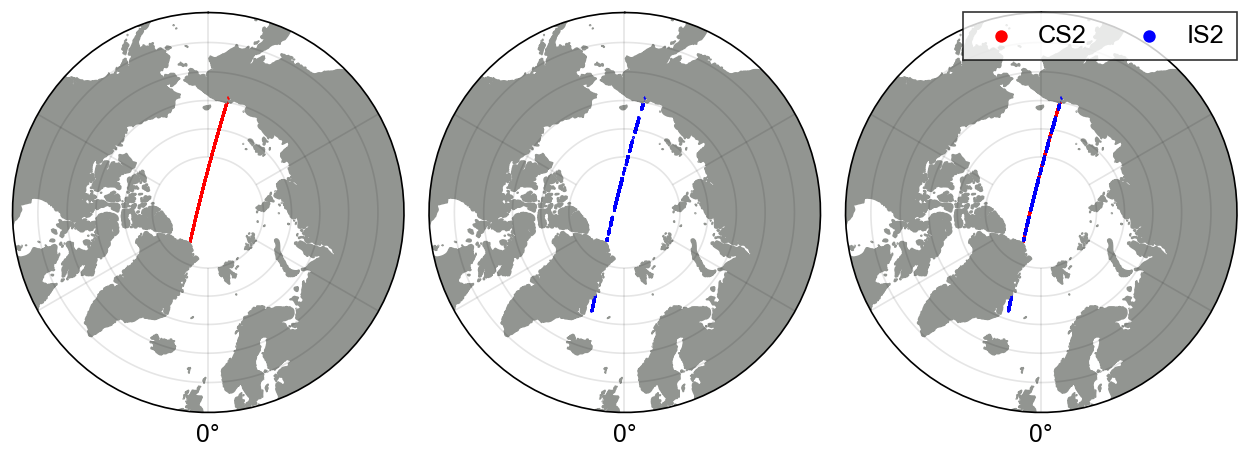

In [160]:
fig, axs = pplt.subplots([[1,2,3]], share=0, axwidth=2, axheight=2, proj='npstere')
fig.patch.set_facecolor('white')
resol='110m'
land = cartopy.feature.NaturalEarthFeature('physical', 'land', \
    scale=resol, edgecolor='k', facecolor=cfeature.COLORS['land'])
    
ax = axs[0]
ax.add_feature(cfeature.LAND, facecolor='grey')
#axs.coastlines(resolution=resol, color='k')

x=ax.scatter(lon_CS2, lat_CS2, c='r', s=0.05,zorder=-1, label = 'CS2')

ax = axs[1]
ax.add_feature(cfeature.LAND, facecolor='grey')
#axs.coastlines(resolution=resol, color='k')

x=ax.scatter(lon_IS2, lat_IS2, c='b', s=0.01,zorder=-1, label = 'IS2')

ax = axs[2]
ax.add_feature(cfeature.LAND, facecolor='grey')
#axs.coastlines(resolution=resol, color='k')

x=ax.scatter(lon_CS2, lat_CS2, c='r', s=0.1,zorder=-1, label = 'CS2')
x=ax.scatter(lon_IS2, lat_IS2, c='b', s=0.01,zorder=-1, label = 'IS2')


ax.legend(markersize=15)

fig.format(labels=True,boundinglat=55)
#fig.format( labels=True, abc='A.', abcloc="ul")

# Initialisation: methods and functions

In [4]:
# Prepare colors to use in the study

from matplotlib.colors import LinearSegmentedColormap,rgb2hex
from scipy.stats import linregress

cmap = plt.cm.get_cmap('Blues')
cmap_qual2 = [cmap(1/6), cmap(2/6), cmap(3/6), cmap(4/6), cmap(5/6), cmap(6/6)]

cmap_qual_green = LinearSegmentedColormap.from_list('list', ['green', 'gray'], N = 2)

'''cmap_qual = ['#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00', '#CC79A7', 'darkorange']
cmap_qual = LinearSegmentedColormap.from_list('list', cmap_qual, N = len(cmap_qual))'''
cmap_check = plt.cm.get_cmap('BuRd_r')
cmap_qual = [rgb2hex(cmap_check((0/8))),rgb2hex(cmap_check((1/8))),rgb2hex(cmap_check((2/8))), rgb2hex(cmap_check((3/8))),
            rgb2hex(cmap_check((5/8))), rgb2hex(cmap_check(6/8)), rgb2hex(cmap_check(7/8)), rgb2hex(cmap_check(8/8)), cmap_qual_green(1)]

cmap_qual = LinearSegmentedColormap.from_list('list', cmap_qual, N = len(cmap_qual))

### Load and prep observations

In [5]:

def get_valid_freeboard_flag(flag): # function to use the bitwise quality flag of CS2 L2 data 
    """
    flag_masks = 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576, 2097152, 4194304, 8388608, 16777216, 33554432, 67108864, 134217728, 268435456; // int 
    
    removed flags in dict_error: 
    #        'sarin_bad_velocity'       : 2,
    #        'sarin_out_of_range'       : 4,
    #        'sarin_bad_baseline'       : 8,
    #        'delta_time_error'         :32,
    #        'mispointing_error'        :64,
    #        'sarin_height_ambiguous'   :2048,
    
    """
    # flags to look for
    dict_error= {
        'calibration_warning'      : 1,
        'sarin_bad_velocity'       : 2,
        'sarin_out_of_range'       : 4,
        'sarin_bad_baseline'       : 8,
        'delta_time_error'         :32,
        'mispointing_error'        :64,
        'sarin_side_redundant'     :256,
        'sarin_rx_2_error'         :512,
        'sarin_rx_1_error'         :1024,
        'sarin_height_ambiguous'   :2048,
        'surf_type_class_ocean'    :32768,
        'freeboard_error'          :65536,
        'peakiness_error'          :131072,
        'ssha_interp_error'        :262144,
        'orbit_discontinuity'      :33554432,
        'orbit_error'              :67108864,
        'height_sea_ice_error'     :268435456,
        }
    # all flags provided in data product
    all_flag= {
        'calibration_warning'      : 1,
        'sarin_bad_velocity'       : 2,
        'sarin_out_of_range'       : 4,
        'sarin_bad_baseline'       : 8,
        'lrm_slope_model_invalid'  :16,
        'delta_time_error'         :32,
        'mispointing_error'        :64,
        'surface_model_unavailable':128,
        'sarin_side_redundant'     :256,
        'sarin_rx_2_error'         :512,
        'sarin_rx_1_error'         :1024,
        'sarin_height_ambiguous'   :2048,
        'surf_type_class_undefined':4096,
        'surf_type_class_sea_ice'  :8192,
        'surf_type_class_lead'     :16384,
        'surf_type_class_ocean'    :32768,
        'freeboard_error'          :65536,
        'peakiness_error'          :131072,
        'ssha_interp_error'        :262144,
        'sig0_3_error'             :524288,
        'sig0_2_error'             :1048576,
        'sig0_1_error'             :2097152,
        'height_3_error'           :4194304,
        'height_2_error'           :8388608,
        'height_1_error'           :16777216,
        'orbit_discontinuity'      :33554432,
        'orbit_error'              :67108864,
        'block_degraded'           :134217728,
        'height_sea_ice_error'     :268435456,
        }

    # sea ice class flag
    flag_seaice = np.bitwise_and(flag, all_flag['surf_type_class_sea_ice'])/all_flag['surf_type_class_sea_ice']

    # errors identified
    flag_error = np.zeros(flag.size)
    for key in dict_error.keys():
        flag0_error = np.bitwise_and(flag,dict_error[key])/dict_error[key]
        flag_error = np.logical_or(flag0_error,flag_error)

    flag_valid_fb = flag_seaice - flag_error
    # observations where the flags were not active
    flag_valid_fb[flag_valid_fb<0] =0


    return flag_valid_fb

def fit2(lat, lat2,  h, degree): # regression fit function
    p_fit = np.polyfit(lat, h, degree)
    p_val = np.polyval(p_fit, lat2)
    return p_val

def NN_search(df_CS2_new, df_IS2): # nearest neighbour search (used for extracting IS2 mean sea surface point)
    from sklearn.neighbors import BallTree
    import numpy as np
    import pandas as pd
    
    # latitude/longitude to be used as baseline (CS2 for this study)
    query_lats = df_CS2_new[['lat']].to_numpy()
    query_lons = df_CS2_new[['lon']].to_numpy()
    
    # search tree structure for IS2 points using haversine formula, leaf_size = 15 (can be changed)
    tree = BallTree(np.deg2rad(df_IS2[['lat', 'lon']].values), leaf_size =15, metric='haversine')

    distances, indices = tree.query(np.deg2rad(np.c_[query_lats, query_lons]), k=1) # only nearest neighbour (k=1). output are distance to points and index in df_IS2 array
    
    # extract of mean sea surface (MSS) in IS2 array
    mss_interp = [],
    for i in indices:
        mss_interp = np.append(mss_interp, df_IS2['mss'][int(i)])

    return mss_interp

def load_data(fp1,fp2): # load CS2 observations
    from scipy.interpolate import interp1d, UnivariateSpline
    import datetime # Python standard library datetime module
    from netCDF4 import Dataset,num2date # http://unidata.github.io/netcdf4-python/

    ds = netCDF4.Dataset(fp1, 'r')
    # extract freeboard, latitude, longitude,time, flag, mean sea suface, lat/lon for mean sea surface (1 Hz sampling)
    sea_ice_freeboard = ds.variables['freeboard_20_ku'][:]
    lat = ds.variables['lat_poca_20_ku'][:]
    lon = ds.variables['lon_poca_20_ku'][:]
    time = ds.variables['time_20_ku'][:]
    flag = ds.variables[ 'flag_prod_status_20_ku'][:]
    flag_valid = get_valid_freeboard_flag(flag)
    mss = ds.variables['mean_sea_surf_sea_ice_01'][:]
    lat_01 = ds.variables['lat_01'][:]
    lon_01 = ds.variables['lon_01'][:]
    
    df_1hz = pd.DataFrame({'lat':lat_01, 'lon':lon_01, 'mss':mss})
    df_20hz = pd.DataFrame({'lat':lat, 'lon':lon})
    mss_interp = NN_search(df_20hz, df_1hz) # identify nearest MSS point at 20 Hz sampling
    sif_no_mss = sea_ice_freeboard-mss_interp # sea ice freeboard without MSS
    
    # extract time as string with exact date/time (CS2 given in TAI)
    tname = "time_20_ku"
    nctime = ds.variables[tname][:] # get values
    t_unit = ds.variables[tname].units # get unit  "days since 1950-01-01T00:00:00Z"
    t_cal = ds.variables[tname].calendar
    tvalue = num2date(nctime,units = t_unit,calendar = t_cal)
    str_time = [str(i) for i in tvalue]
    
    # extract waveform parameter (SSD) and waveform from L1B CS2
    ds2 = netCDF4.Dataset(fp2, 'r')
    ssd =  ds2.variables['stack_std_20_ku'][:]
    pwr_waveform = ds2.variables['pwr_waveform_20_ku'][:]
    
    ppk = [] # initialise
    # compute pulse peakiness (PP)
    for i in pwr_waveform:
        calc_pp = []
        noise = np.nanmean(i[10:19])
        i = i[i>noise]

        pp = np.nanmax(i)/np.nanmean(i)
        ppk = np.append(ppk,pp)
    
    # save all data
    df = pd.DataFrame({'sif':sea_ice_freeboard, 'lat':lat, 'lon':lon, 'flag':flag_valid, 'mss':mss_interp, 'ssd':ssd, 'ppk':ppk, 'time':str_time})
    
    # remove non-Arctic data and flagged data
    df = df[df['lat']>60]
    df = df[df['flag']==1]  
    df=df.reset_index(drop=True) # reset index
    
    # extract parameters to return as individual value
    lon_filtered = np.array(df['lon'])
    lat_filtered = np.array(df['lat'])
    fb_filtered = np.array(df['sif'])
    mss_filtered = np.array(df['mss'])
    ssd_filtered = np.array(df['ssd'])
    ppk_filtered = np.array(df['ppk'])
    time_filtered = np.array(df['time'])
    return lon_filtered, lat_filtered, fb_filtered, mss_filtered, ssd_filtered,ppk_filtered, time_filtered


def load_data2(fp1): # load CS2 observations
    from scipy.interpolate import interp1d, UnivariateSpline
    import datetime # Python standard library datetime module
    from netCDF4 import Dataset,num2date # http://unidata.github.io/netcdf4-python/

    ds = netCDF4.Dataset(fp1, 'r')
    # extract freeboard, latitude, longitude,time, flag, mean sea suface, lat/lon for mean sea surface (1 Hz sampling)
    sea_ice_freeboard = ds.variables['radar_freeboard_20_ku'][:]
    lat = ds.variables['lat_poca_20_ku'][:]
    lon = ds.variables['lon_poca_20_ku'][:]
    time = ds.variables['time_20_ku'][:]
    flag = ds.variables[ 'flag_prod_status_20_ku'][:]
    flag_valid = get_valid_freeboard_flag(flag)
    mss = ds.variables['mean_sea_surf_sea_ice_01'][:]
    lat_01 = ds.variables['lat_01'][:]
    lon_01 = ds.variables['lon_01'][:]
    
    df_1hz = pd.DataFrame({'lat':lat_01, 'lon':lon_01, 'mss':mss})
    df_20hz = pd.DataFrame({'lat':lat, 'lon':lon})
    mss_interp = NN_search(df_20hz, df_1hz) # identify nearest MSS point at 20 Hz sampling
    sif_no_mss = sea_ice_freeboard-mss_interp # sea ice freeboard without MSS
    
    # extract time as string with exact date/time (CS2 given in TAI)
    tname = "time_20_ku"
    nctime = ds.variables[tname][:] # get values
    t_unit = ds.variables[tname].units # get unit  "days since 1950-01-01T00:00:00Z"
    t_cal = ds.variables[tname].calendar
    tvalue = num2date(nctime,units = t_unit,calendar = t_cal)
    str_time = [str(i) for i in tvalue]
    

    
    # save all data
    df = pd.DataFrame({'sif':sea_ice_freeboard, 'lat':lat, 'lon':lon, 'flag':flag_valid, 'mss':mss_interp, 'time':str_time})
    
    # remove non-Arctic data and flagged data
    df = df[df['lat']>60]
    df = df[df['flag']==1]  
    df=df.reset_index(drop=True) # reset index
    
    # extract parameters to return as individual value
    lon_filtered = np.array(df['lon'])
    lat_filtered = np.array(df['lat'])
    fb_filtered = np.array(df['sif'])
    mss_filtered = np.array(df['mss'])

    time_filtered = np.array(df['time'])
    return lon_filtered, lat_filtered, fb_filtered, mss_filtered, time_filtered


### Read and prepare ICESat-2 data to seperate granules

Below are help functions provided as part of ICESat-2 Hackathon to open, read and save IS2 h5-files.

In [6]:
import pyproj
from astropy.time import Time 
import h5py
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from netCDF4 import Dataset
#from mpl_toolkits.basemap import Basemap
from itertools import chain
import sys

def list_files_local(path):
    ''' Get file list from local folder. '''
    from glob import glob
    return glob(path)

def gps2dyr(time):
    '''Convert GPS time to decimal years'''
    return Time(time, format='gps').decimalyear

def track_type(time, lat, tmax=1):
    '''
    Separate tracks into ascending and descending. 
    
    Defines tracks as segments with time breaks > tmax , 
    and tests whether lat increases or decreases w/time.
    '''
    tracks = np.zeros(lat.shape) # generates track segment
    tracks[0:np.argmax(np.abs(lat))] = 1 # set values for segment
    i_asc = np.zeros(tracks.shape, dtype=bool) # output index array 
    
    # loop through individual segments
    for track in np.unique(tracks):
        
        i_track, = np.where(track == tracks) # get all pts from seg
        
        if len(i_track) < 2: continue
            
        # Test if lat increase (asc) or descreases (des) with time
        i_min = time[i_track].argmin()
        i_max = time[i_track].argmax()
        lat_diff = lat[i_track][i_max] - lat[i_track][i_min]
        
        # Determine track trype
        if lat_diff > 0: i_asc[i_track] = True
            
    return i_asc, np.invert(i_asc)

def transform_coord(proj1, proj2, x, y):
    '''
    Transform coordinates from proj1 to proj2 (EPSG num). 
    
    Example EPSG projs: 
        Geodetic (lon/lat): 4326
        Polar Stereo AnIS (x/y): 3031
        Polar Stereo GrIS (x/y): 3413
    '''
    # Set full EPSG projection strings 
    proj1 = pyproj.Proj("+init=EPSG:"+str(proj1))
    proj2 = pyproj.Proj("+init=EPSG:"+str(proj2))
    return pyproj.transform(proj1, proj2, x, y)  # convert

def read_h5(fname, vnames=[]):
    '''Simple HDF5 reader'''
    with h5py.File(fname, 'r') as f:
        return [f[v][:] for v in vnames]

### Simple reader

In [7]:
# Adapted from code from ICESat-2 Hackaton.

def read_data(fname, bbox=None):
    '''
    Read ATL03 data file and output 6 reduced files. 
    
    Extract variables of interest and separate the ATL03 file
    into each beam (ground track) and ascending/descending orbits. 
    '''
    
    # Each beam is a group 
    #group = ['/gt1l', '/gt1r', '/gt2l', '/gt2r', '/gt3l', '/gt3r']

    ATL07 = h5py.File(fname, 'r')
    
    #flag_values: 0, 1, 2; flag_meanings : backward forward transition
    orientation_flag=ATL07['orbit_info/sc_orient'][:]
    
    if (orientation_flag==0):
        print('Backward orientation')
        group=['/gt1l', '/gt1r', '/gt2l', '/gt2r', '/gt3l', '/gt3r']
                
    elif (orientation_flag==1):
        print('Forward orientation')
        group=['/gt3r', '/gt3l', '/gt2r', '/gt2l', '/gt1r', '/gt1l']
        
    elif (orientation_flag==2):
        print('Transitioning, do not use for science!')
        group=['/gt1l', '/gt1r', '/gt2l', '/gt2r', '/gt3l', '/gt3r']
    
    # Loop through beams
    for k,g in enumerate(group):
    
        #-----------------------------------#
        # 1) Read in data for a single beam #
        #-----------------------------------#
    
        # Load variables into memory (more can be added!)
        with h5py.File(fname, 'r') as fi:
                
            lat_fb = fi[g+ '/freeboard_beam_segment/beam_freeboard/latitude'][:]
            lon_fb = fi[g+ '/freeboard_beam_segment/beam_freeboard/longitude'][:]
            fb = fi[g+ '/freeboard_beam_segment/beam_freeboard/beam_fb_height'][:]
            gw_fb = fi[g+ '/freeboard_beam_segment/height_segments/height_segment_w_gaussian'][:]
            mss = fi[g+ '/freeboard_beam_segment/geophysical/height_segment_mss'][:]
            mean_tide = fi[g+ '/freeboard_beam_segment/geophysical/height_segment_geoid_free2mean'][:]
            SET_corr = fi[g+ '/freeboard_beam_segment/geophysical/height_segment_earth_free2mean'][:]
            mss_meantide = mss+mean_tide+SET_corr # correct MSS to be in mean-tisde system (check ATBD for ICESat-2 for more information)
        
        #-----------------------#
        # 4) Save selected data #
        #-----------------------#
        
        # Define output file name
        ofile = fname.replace('.h5', '_'+g[1:]+'_no_mss_corr.h5')
                
        # Save variables
        with h5py.File(ofile, 'w') as f:
            #f['orbit'] = orb
            f['lon_fb'] = lon_fb
            f['lat_fb'] = lat_fb
            f['fb'] = fb - mss_meantide
            f['gw'] = gw_fb
            f['fb_with_mss'] = fb
            f['mss']=mss_meantide

            
            print('out ->', ofile)

# Load IS2 ATL10 data and prepare the data with simple reader

In [68]:
#files = !ls E:/DTU/CRYO2ICE/Data/CRYO2ICE_data/IS2/Monthly_data/November/*_02.h5 # load all files for prep, might have to change code if the version nr of file does not end with _02.h5
#files

import glob

directory = r'D:\DTU\CRYO2ICE\Data\CRYO2ICE_data\2021-2022'
files=  glob.glob(directory + r'\IS2\All_months\*.h5')
len(files)


directory = r'D:\DTU\CRYO2ICE\Data\CRYO2ICE_data\2020-2021'
files1=  glob.glob(directory + r'\IS2\Monthly_data\November\*.h5')
files2=  glob.glob(directory + r'\IS2\Monthly_data\December\*.h5')
files3=  glob.glob(directory + r'\IS2\Monthly_data\January\*.h5')
files4=  glob.glob(directory + r'\IS2\Monthly_data\February\*.h5')
files5=  glob.glob(directory + r'\IS2\Monthly_data\March\*.h5')
files6=  glob.glob(directory + r'\IS2\Monthly_data\April\*.h5')
files =  files4 + files5 + files6
len(files)


217

In [69]:
# Read data and extract beam wise IS2 data

files = files3
print(len(files))
njobs=50

# bbox = [lonmin, lonmax, latmin, latmax]
bbox = [0,360, 60, 90]

if njobs == 1:
    print('running in serial ...')
    [read_data(f, bbox) for f in files]

else:
    print('running in parallel (%d jobs) ...' % njobs)
    from joblib import Parallel, delayed
    Parallel(n_jobs=njobs, verbose=5)(delayed(read_data)(f, bbox) for f in files)

65
running in parallel (50 jobs) ...


[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done   8 out of  65 | elapsed:  2.0min remaining: 14.0min
[Parallel(n_jobs=50)]: Done  22 out of  65 | elapsed:  4.8min remaining:  9.3min
[Parallel(n_jobs=50)]: Done  36 out of  65 | elapsed:  5.2min remaining:  4.2min
[Parallel(n_jobs=50)]: Done  50 out of  65 | elapsed:  5.5min remaining:  1.7min
[Parallel(n_jobs=50)]: Done  65 out of  65 | elapsed:  5.9min finished


# Load prepared IS2 data after processed with simple-reader and CS2 data for further processing

In [70]:
# Length of all lists with filenames are printed for qualitative assessment of whether all tracks 
# are included in the list (all list should be of same length)
year_folder = '2020-2021'
directory = r'D:\DTU\CRYO2ICE\Data\CRYO2ICE_data\{}'.format(year_folder)

if year_folder == '2020-2021':
    IS2_folder = 'Monthly_data\All_data_processed'
    CS2_folder = 'Baseline-E'
elif year_folder == '2021-2022':
    IS2_folder = 'All_months_processed'
    CS2_folder = 'All_months'
else:
    print('ERROR! Check year-folder.')

files_check_CS2_L2=  glob.glob(directory + r'\CS2\{}\*.nc'.format(CS2_folder))
print(len(files_check_CS2_L2))

files_check_IS2a=  glob.glob(directory + r'\IS2\{}\*gt1l_no_mss_corr.h5'.format(IS2_folder))
print(len(files_check_IS2a))

files_check_IS2b=  glob.glob(directory + r'\IS2\{}\*gt2l_no_mss_corr.h5'.format(IS2_folder))
print(len(files_check_IS2b))

files_check_IS2c=  glob.glob(directory + r'\IS2\{}\*gt3l_no_mss_corr.h5'.format(IS2_folder))
print(len(files_check_IS2c))

files_check_IS2d=  glob.glob(directory + r'\IS2\{}\*gt1r_no_mss_corr.h5'.format(IS2_folder))
print(len(files_check_IS2d))

files_check_IS2e=  glob.glob(directory + r'\IS2\{}\*gt2r_no_mss_corr.h5'.format(IS2_folder))
print(len(files_check_IS2e))

files_check_IS2f=  glob.glob(directory + r'\IS2\{}\*gt3r_no_mss_corr.h5'.format(IS2_folder))
print(len(files_check_IS2f))


389
389
389
389
389
389
389


# CRYO2ICE tracks: bin data 

In [71]:
def load_all_data(k, files_check_IS2a, files_check_IS2b, files_check_IS2c,files_check_IS2d, files_check_IS2e, files_check_IS2f, files_check_CS2_L2, list_total,dist_req):
    '''
    Load all IS2 and CS2 data using the 6 lists of filenames for IS2 (beam specific) and 2 lists of CS2 files (L1B and L2). 
    The IS2 beams are given an ID number (1-6). 
    All IS2 observations are concatenated into data frame. 
    
    CS2 data is loaded and filtered to inlcude only data from 60 degrees latitude and upwards. 
    Smoothing of CS2 data using defined search radius for IS2 (e.g., 3500 m) is applied. 
    
    
    input: 
    - k: integer value denoting current file being used (start at 0)
    - files_check_IS2a-files_check_ISf: lists of filenames for IS2 files (beam specific)
    - files_check_CS2_L1b/files_check_CS2_L2: lists of filenames for CS2 files (L1B or L2)
    - list_total: array with numbers of files (e.g., from 0 to 388).
    - dist_req: distance requirement (value defined in metres)
    
    output: 
    - df_IS2: dataframe for IS2 observations with variables (lon: longitude, lat: latitude, fb: laser freeboard without mss, gw: gaussian width, fb_with_mss: laser freeboard with mss, mss: mean sea surface)
    - df_CS2: dataframe for CS2 observations with variables (lon: longitude, lat: latitude, fb: radra freeboard with mss, fb_no_mss: radar freeboard without mss, mss: mean sea surface, ssd: stack standar deviation, ppk: pulse peakiness, time: time in TAI)
    '''
    
    
    ### IS2
    lon_gt2l, lat_gt2l,fb_gt2l, gw_gt2l, fb_mss, mss = read_h5(files_check_IS2a[k], ['lon_fb', 'lat_fb', 'fb', 'gw', 'fb_with_mss', 'mss'])
    gw_gt2l[fb_gt2l>5] = np.nan
    fb_gt2l[fb_gt2l>5] = np.nan
    df_IS2a = pd.DataFrame({'lat':lat_gt2l, 'lon':lon_gt2l, 'fb':fb_gt2l, 'gw':gw_gt2l, 'fb_with_mss':fb_mss, 'mss_IS2':mss})
    df_IS2a['beam_ID']=1

    lon_gt2l, lat_gt2l,fb_gt2l, gw_gt2l, fb_mss, mss = read_h5(files_check_IS2b[k], ['lon_fb', 'lat_fb', 'fb', 'gw', 'fb_with_mss', 'mss'])
    gw_gt2l[fb_gt2l>5] = np.nan
    fb_gt2l[fb_gt2l>5] = np.nan
    df_IS2b = pd.DataFrame({'lat':lat_gt2l, 'lon':lon_gt2l, 'fb':fb_gt2l, 'gw':gw_gt2l, 'fb_with_mss':fb_mss, 'mss_IS2':mss})
    df_IS2b['beam_ID']=2

    lon_gt2l, lat_gt2l,fb_gt2l, gw_gt2l, fb_mss, mss = read_h5(files_check_IS2c[k], ['lon_fb', 'lat_fb', 'fb', 'gw', 'fb_with_mss', 'mss'])
    gw_gt2l[fb_gt2l>5] = np.nan
    fb_gt2l[fb_gt2l>5] = np.nan
    df_IS2c = pd.DataFrame({'lat':lat_gt2l, 'lon':lon_gt2l, 'fb':fb_gt2l, 'gw':gw_gt2l, 'fb_with_mss':fb_mss, 'mss_IS2':mss})
    df_IS2c['beam_ID']=3
    
    lon_gt2l, lat_gt2l,fb_gt2l, gw_gt2l, fb_mss, mss = read_h5(files_check_IS2d[k], ['lon_fb', 'lat_fb', 'fb', 'gw', 'fb_with_mss', 'mss'])
    gw_gt2l[fb_gt2l>5] = np.nan
    fb_gt2l[fb_gt2l>5] = np.nan
    df_IS2d = pd.DataFrame({'lat':lat_gt2l, 'lon':lon_gt2l, 'fb':fb_gt2l, 'gw':gw_gt2l, 'fb_with_mss':fb_mss, 'mss_IS2':mss})
    df_IS2d['beam_ID']=4

    lon_gt2l, lat_gt2l,fb_gt2l, gw_gt2l, fb_mss, mss = read_h5(files_check_IS2e[k], ['lon_fb', 'lat_fb', 'fb', 'gw', 'fb_with_mss', 'mss'])
    gw_gt2l[fb_gt2l>5] = np.nan
    fb_gt2l[fb_gt2l>5] = np.nan
    df_IS2e = pd.DataFrame({'lat':lat_gt2l, 'lon':lon_gt2l, 'fb':fb_gt2l, 'gw':gw_gt2l, 'fb_with_mss':fb_mss, 'mss_IS2':mss})
    df_IS2e['beam_ID']=5

    lon_gt2l, lat_gt2l,fb_gt2l, gw_gt2l, fb_mss, mss = read_h5(files_check_IS2f[k], ['lon_fb', 'lat_fb', 'fb', 'gw', 'fb_with_mss', 'mss'])
    gw_gt2l[fb_gt2l>5] = np.nan
    fb_gt2l[fb_gt2l>5] = np.nan
    df_IS2f = pd.DataFrame({'lat':lat_gt2l, 'lon':lon_gt2l, 'fb':fb_gt2l, 'gw':gw_gt2l, 'fb_with_mss':fb_mss, 'mss_IS2':mss})
    df_IS2f['beam_ID']=6
    
    frames = [df_IS2a, df_IS2b, df_IS2c, df_IS2d, df_IS2e, df_IS2f]
    df_IS2 = pd.concat(frames)
    df_IS2 = df_IS2.dropna().reset_index()
    
    ### CS2
    fp1 = files_check_CS2_L2[k]
    
    #fp2 = files_check_CS2_L1b[k]
        
    #lon, lat,fb, mss, ssd, ppk, time = load_data(fp1, fp2)
    #df_CS2 = pd.DataFrame({'lat':lat, 'lon':lon, 'fb':fb, 'mss':mss, 'fb_no_mss':fb-mss, 'ssd':ssd, 'ppk':ppk, 'time':time})
    lon, lat,fb, mss, time = load_data2(fp1)
    df_CS2 = pd.DataFrame({'lat':lat, 'lon':lon, 'fb':fb, 'mss':mss, 'fb_no_mss':fb-mss,'time':time})
    df_CS2 = df_CS2[(df_CS2['lat']>60)].reset_index()
    
    df_CS2_new = CRYO2ICE_smooth_CS2_data(df_CS2,dist_req)
    
    frames = [df_CS2, df_CS2_new]
    df_CS2 = pd.concat(frames, axis=1)
    
    basename_without_ext = os.path.splitext(os.path.basename(fp1))[0]
    
    print('File '+str(k)+'/'+str(len(list_total)-1)+ ': ' + basename_without_ext)
    
    
    return df_IS2, df_CS2, fp1           

def CRYO2ICE_identify_IS2_data2(df_CS2, df_IS2, dist_req):
    '''
    
    '''
    
    from sklearn.neighbors import BallTree
    import numpy as np
    import pandas as pd

    query_lats = df_CS2[['lat']].to_numpy()
    query_lons = df_CS2[['lon']].to_numpy()

    tree = BallTree(np.deg2rad(df_IS2[['lat', 'lon']].values),  metric='haversine')

    dist_in_metres = dist_req
    earth_radius_in_metres = 6371*1000
    radius = dist_in_metres/earth_radius_in_metres

    is_within, distances = tree.query_radius(np.deg2rad(np.c_[query_lats, query_lons]), r=radius, count_only=False, return_distance=True) 
    distances_in_metres = distances*earth_radius_in_metres
    

    mean_fb_IS2, mean_gw_IS2, mss_IS2_mean, w_mean_fb_IS2  =  np.empty(len(query_lats)),np.empty(len(query_lats)),np.empty(len(query_lats)),np.empty(len(query_lats))
    dist_std_all, dist_avg_all, dist_min_all, dist_max_all = np.empty(len(query_lats)), np.empty(len(query_lats)),np.empty(len(query_lats)),np.empty(len(query_lats))
    GT1L, GT2L, GT3L, GT1R, GT2R, GT3R = np.empty(len(query_lats)), np.empty(len(query_lats)), np.empty(len(query_lats)), np.empty(len(query_lats)), np.empty(len(query_lats)), np.empty(len(query_lats))
    k = 0
    
    for i in is_within:
        GT1L_count, GT2L_count, GT3L_count, GT1R_count, GT2R_count, GT3R_count = 0,0,0,0,0,0
        beam_ID_all = df_IS2['beam_ID'].iloc[i]
        if len(i)>10:
            data_fb_mean_IS2 = df_IS2['fb'].iloc[i]
            data_gw_mean_IS2 = df_IS2['gw'].iloc[i]
            data_mss_mean_IS2 = df_IS2['mss_IS2'].iloc[i]
        
            mean_fb_val = np.nanmean(data_fb_mean_IS2)


            w_mean_fb_val = np.ma.average(data_fb_mean_IS2, weights=(1/distances_in_metres[k]))
            mss_IS2_mean_val = np.ma.average(data_mss_mean_IS2, weights=(1/distances_in_metres[k]))
            mean_gw_val = np.ma.average(data_gw_mean_IS2, weights=(1/distances_in_metres[k]))
            
            dist_min = np.nanmin(distances_in_metres[k])
            dist_max = np.nanmax(distances_in_metres[k])
            dist_avg = np.nanmean(distances_in_metres[k])
            dist_std = np.nanstd(distances_in_metres[k])
            
        else:
            mean_fb_val = np.nan
            w_mean_fb_val = np.nan
            mss_IS2_mean_val = np.nan
            mean_gw_val = np.nan
            dist_min = np.nan
            dist_max = np.nan
            dist_avg = np.nan
            dist_std = np.nan
        
        for j in beam_ID_all:
            if j == 1:
                GT1L_count += 1
            elif j == 2:
                GT2L_count += 1
            elif j == 3:
                GT3L_count += 1
            elif j == 4:
                GT1R_count += 1
            elif j == 5:
                GT2R_count += 1
            elif j == 6:
                GT3R_count += 1

        
        mean_fb_IS2[k] = mean_fb_val
        w_mean_fb_IS2[k] = w_mean_fb_val
        mss_IS2_mean[k] = mss_IS2_mean_val
        mean_gw_IS2[k] = mean_gw_val
        dist_avg_all[k] = dist_avg
        dist_min_all[k] = dist_min
        dist_max_all[k] = dist_max
        dist_std_all[k] = dist_std
        
        GT1R[k] = GT1R_count
        GT2R[k] = GT2R_count
        GT3R[k] = GT3R_count
        GT1L[k] = GT1L_count
        GT2L[k] = GT2L_count
        GT3L[k] = GT3L_count
        
        k = k+1
    
    
    df_IS2_new = pd.DataFrame({'IS2_mean_fb':mean_fb_IS2, 'IS2_w_mean_fb':w_mean_fb_IS2,'IS2_mean_gw':mean_gw_IS2, 'IS2_mean_MSS':mss_IS2_mean, 'IS2_dist_min':dist_min_all,
                               'IS2_dist_max':dist_max_all, 'IS2_dist_avg':dist_avg_all, 'IS2_dist_std':dist_std_all, 'GT1L_count':GT1L, 'GT2L_count':GT2L, 'GT3L_count':GT3L, 
                               'GT1R_count':GT1R, 'GT2R_count':GT2R, 'GT3R_count':GT3R})
    
    return df_IS2_new

def numpy_nan_mean(a):
    
    return np.nan if np.all(a!=a) else np.nanmean(a)

def CRYO2ICE_smooth_CS2_data(df_CS2,dist_req):
    from sklearn.neighbors import BallTree
    import numpy as np
    import pandas as pd

    query_lats = df_CS2[['lat']].to_numpy()
    query_lons = df_CS2[['lon']].to_numpy()

    tree = BallTree(np.deg2rad(df_CS2[['lat', 'lon']].values),  metric='haversine')

    dist_in_metres = dist_req
    earth_radius_in_metres = 6371*1000
    radius = dist_in_metres/earth_radius_in_metres

    is_within, distances = tree.query_radius(np.deg2rad(np.c_[query_lats, query_lons]), r=radius, count_only=False, return_distance=True) 
    distances_in_metres = distances*earth_radius_in_metres

    smooth_CS2 = np.empty(len(query_lats))
    k = 0
    for i in is_within:
        data_fb_mean_IS2 = df_CS2['fb'].iloc[i]
        smooth_CS2[k] = numpy_nan_mean(data_fb_mean_IS2)

        k = k+1
    
    df_CS2_new = pd.DataFrame({'CS2_smooth':smooth_CS2})
    
    return df_CS2_new


def CRYO2ICE_identify(df_CS2, df_IS2,dist_req):
    df_IS2_new = CRYO2ICE_identify_IS2_data2(df_CS2, df_IS2,dist_req)
    
    frames = [df_CS2, df_IS2_new]
    data_check = pd.concat(frames, axis=1)
    
    data_check = data_check.dropna()
    
    return data_check

In [72]:
list_total = np.arange(0, len(files_check_CS2_L2))
#list_total = np.arange(0,1)

dist_req = 3500
for k in list_total:
    #df_IS2, df_CS2, fp1 = load_all_data(k, files_check_IS2a, files_check_IS2b, files_check_IS2c, files_check_IS2d, files_check_IS2e, files_check_IS2f,files_check_CS2_L2, files_check_CS2_L1b, list_total,dist_req)
    df_IS2, df_CS2, fp1 = load_all_data(k, files_check_IS2a, files_check_IS2b, files_check_IS2c, files_check_IS2d, files_check_IS2e, files_check_IS2f,files_check_CS2_L2, list_total,dist_req)
    
    try:
        # Identify CRYO2ICE track
        print('Identifying CRYO2ICE track...')
    
        data_check = CRYO2ICE_identify(df_CS2, df_IS2, dist_req)
        print('CRYO2ICE track identified and binned. Calculating parameters...')
        
        # Compute snow depth 
        ds = 0.30
        ns = (1+0.51*ds)**(1.5)
    
        data_check['IS2_w_mean_fb_MSS']=data_check['IS2_w_mean_fb']+data_check['IS2_mean_MSS']
        data_check['snow_depth_original_MSS']=(data_check['IS2_w_mean_fb_MSS']-data_check['fb'])/ns
        data_check['snow_depth_original_MSS_smoothed']=(data_check['IS2_w_mean_fb_MSS']-data_check['CS2_smooth'])/ns
    
    
        #data_check2 = data_check[(data_check['ppk']<9) & (data_check['ssd']>6.29)]
    
        print('All data has been properly run. Saving data...')
    
        path = r'D:\DTU\CRYO2ICE\Data\CRYO2ICE_binned\BaselineE\2020-2021'
        basename_without_ext = os.path.splitext(os.path.basename(fp1))[0]
        basename_without_ext
    
        data_check.to_hdf(path + '/' +'CRYO2ICE_' +basename_without_ext + '_original_MSS_smooth_BaselineE.h5', key='CRYO2ICE', mode='w')
        #data_check2.to_hdf(path + '/' +'CRYO2ICE_' +basename_without_ext + '_ssd_ppk_filt_original_MSS_smooth.h5', key='CRYO2ICE', mode='w')
    
        print('Data has been saved in data/CRYO2ICE_binned/BaselineE/year-folder. Ready for new analysis.')
        
    
    except: 
        print('No CRYO2ICE data available... Ready to run new analysis.')
    
print('Analysis finished.')

File 0/388: CS_LTA__SIR_SAR_2__20201102T123414_20201102T123933_E001
Identifying CRYO2ICE track...
CRYO2ICE track identified and binned. Calculating parameters...
All data has been properly run. Saving data...
Data has been saved in data/CRYO2ICE_binned/BaselineE/year-folder. Ready for new analysis.
File 1/388: CS_LTA__SIR_SAR_2__20201105T032414_20201105T033327_E001
Identifying CRYO2ICE track...
CRYO2ICE track identified and binned. Calculating parameters...
All data has been properly run. Saving data...
Data has been saved in data/CRYO2ICE_binned/BaselineE/year-folder. Ready for new analysis.
File 2/388: CS_LTA__SIR_SAR_2__20201105T050433_20201105T051225_E001
Identifying CRYO2ICE track...
CRYO2ICE track identified and binned. Calculating parameters...
All data has been properly run. Saving data...
Data has been saved in data/CRYO2ICE_binned/BaselineE/year-folder. Ready for new analysis.
File 3/388: CS_LTA__SIR_SAR_2__20201106T091244_20201106T091824_E003
Identifying CRYO2ICE track...
CR

## Variance analysis 

In [ ]:
def CRYO2ICE_identify_IS2_data2_semivariogram(df_CS2, df_IS2, dist):
    from sklearn.neighbors import BallTree
    import numpy as np
    import pandas as pd

    query_lats = df_CS2[['lat']].to_numpy()
    query_lons = df_CS2[['lon']].to_numpy()

    tree = BallTree(np.deg2rad(df_IS2[['lat', 'lon']].values), leaf_size =15, metric='haversine')

    #dist_in_metres = 1500
    dist_in_metres = dist
    earth_radius_in_metres = 6371*1000
    radius = dist_in_metres/earth_radius_in_metres

    is_within, distances = tree.query_radius(np.deg2rad(np.c_[query_lats, query_lons]), r=radius, count_only=False, return_distance=True) 
    distances_in_metres = distances*earth_radius_in_metres
    

    mean_fb_IS2, mean_gw_IS2, mss_IS2_mean, w_mean_fb_IS2  = [], [], [], []
    k = 0
    for i in is_within:
        data_fb_mean_IS2, data_gw_mean_IS2, data_mss_mean_IS2 = [], [],[],
        if len(i)>10:
            for j in i: 
                data_fb_mean_IS2 = np.append(data_fb_mean_IS2, df_IS2['fb'][j])
                data_gw_mean_IS2 = np.append(data_gw_mean_IS2, df_IS2['gw'][j])
                data_mss_mean_IS2 = np.append(data_mss_mean_IS2, df_IS2['mss_IS2'][j])
        
            mean_fb_val = np.nanmean(data_fb_mean_IS2)


            masked_data = np.ma.masked_array(data_fb_mean_IS2, np.isnan(data_fb_mean_IS2))
            w_mean_fb_val = np.ma.average(masked_data, weights=(1/(distances_in_metres[k]/dist_in_metres)))
            mss_IS2_mean_val = np.nanmean(data_mss_mean_IS2)
            mean_gw_val = np.nanmean(data_gw_mean_IS2)
        else:
            mean_fb_val = np.nan
            w_mean_fb_val = np.nan
            mss_IS2_mean_val = np.nan
            mean_gw_val = np.nan
        
        mean_fb_IS2 = np.append(mean_fb_IS2, mean_fb_val)
        w_mean_fb_IS2 = np.append(w_mean_fb_IS2, w_mean_fb_val)
        mss_IS2_mean = np.append(mss_IS2_mean,mss_IS2_mean_val)
        mean_gw_IS2 = np.append(mean_gw_IS2, mean_gw_val)
        
        k = k+1
    df_IS2_new = pd.DataFrame({'IS2_mean_fb':mean_fb_IS2, 'IS2_w_mean_fb':w_mean_fb_IS2,'IS2_mean_gw':mean_gw_IS2, 'IS2_mean_MSS':mss_IS2_mean})
    
    return df_IS2_new

def CRYO2ICE_identify_semivariogram(df_CS2, df_IS2, dist):
    df_IS2_new = CRYO2ICE_identify_IS2_data2_semivariogram(df_CS2, df_IS2, dist)
    
    frames = [df_CS2, df_IS2_new]
    data_check = pd.concat(frames, axis=1)
    data_check = data_check.dropna()
    
    return data_check

In [ ]:
import statistics 

list_total = np.arange(0, len(files_check_CS2_L2))

for k in list_total:
    N_total, variance_total, distance_total, IS2_variance_total = [],[],[],[]
    
    for j in np.arange(850, 3550, 50):
        df_IS2, df_CS2, fp1 = load_all_data(k, files_check_IS2a, files_check_IS2b, files_check_IS2c, files_check_IS2d, files_check_IS2e, files_check_IS2f, files_check_CS2_L2, files_check_CS2_L1b, list_total, j)
        try:
                print('Radius: '+str(j)+ 'm')
                # Identify CRYO2ICE track
                print('Identifying CRYO2ICE track...')
                data_check = CRYO2ICE_identify_semivariogram(df_CS2, df_IS2, j)

                print('CRYO2ICE track identified and binned. Computing parameters...')
                data_check['IS2_w_mean_fb_MSS']=data_check['IS2_w_mean_fb']+data_check['IS2_mean_MSS']

                N = len(data_check)
                vari_difference = statistics.variance(data_check['IS2_w_mean_fb_MSS']-data_check['fb'])
                vari_IS2 = statistics.variance(data_check['IS2_w_mean_fb_MSS'])
                vari_CS2 = statistics.variance(data_check['fb'])

                N_total=np.append(N_total, N)
                variance_total = np.append(variance_total, vari_difference)
                distance_total = np.append(distance_total, j)
                IS2_variance_total = np.append(IS2_variance_total, vari_IS2)

        except: 
                N_total=np.append(N_total, np.nan)
                variance_total = np.append(variance_total, np.nan)
                distance_total = np.append(distance_total, j)
                IS2_variance_total = np.append(IS2_variance_total, np.nan)

                #print('No CRYO2ICE data available... Ready to run new analysis.')
    try: 
        print('All variance data has been properly run. Saving data...')
        
        df_variance = pd.DataFrame({'N_total':N_total, 'variance_total':variance_total, 'distance_total':distance_total, 'IS2_variance_total':IS2_variance_total})
        
        path = r'E:\DTU\CRYO2ICE\Data\CRYO2ICE_original_MSS'
        basename_without_ext = os.path.splitext(os.path.basename(fp1))[0]
        basename_without_ext

        df_variance.to_csv(path + '/' +'CRYO2ICE_original_MSS_' +basename_without_ext + '_variance_analysis_semivariogram.csv')
        print('Data has been saved in CRYO2ICE_original_MSS-folder. Ready for new analysis.')
    except: 
        print('No data available for save.')
    
print('Analysis finished.')

In [633]:

directory = r'D:DTU/CRYO2ICE/Data/CRYO2ICE_original_MSS'
files_check_radii=  glob.glob(directory + r'\*semivariogram.csv')
print(len(files_check_radii))
#files_check_radii = !ls E:/DTU/CRYO2ICE/Data/CRYO2ICE_original_MSS/*semivariogram.csv

li = []
k = 0
for filename in files_check_radii:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['ID']=k
    li.append(df)
    k = k+1
    
frame = pd.concat(li, axis=0, ignore_index=True)

76


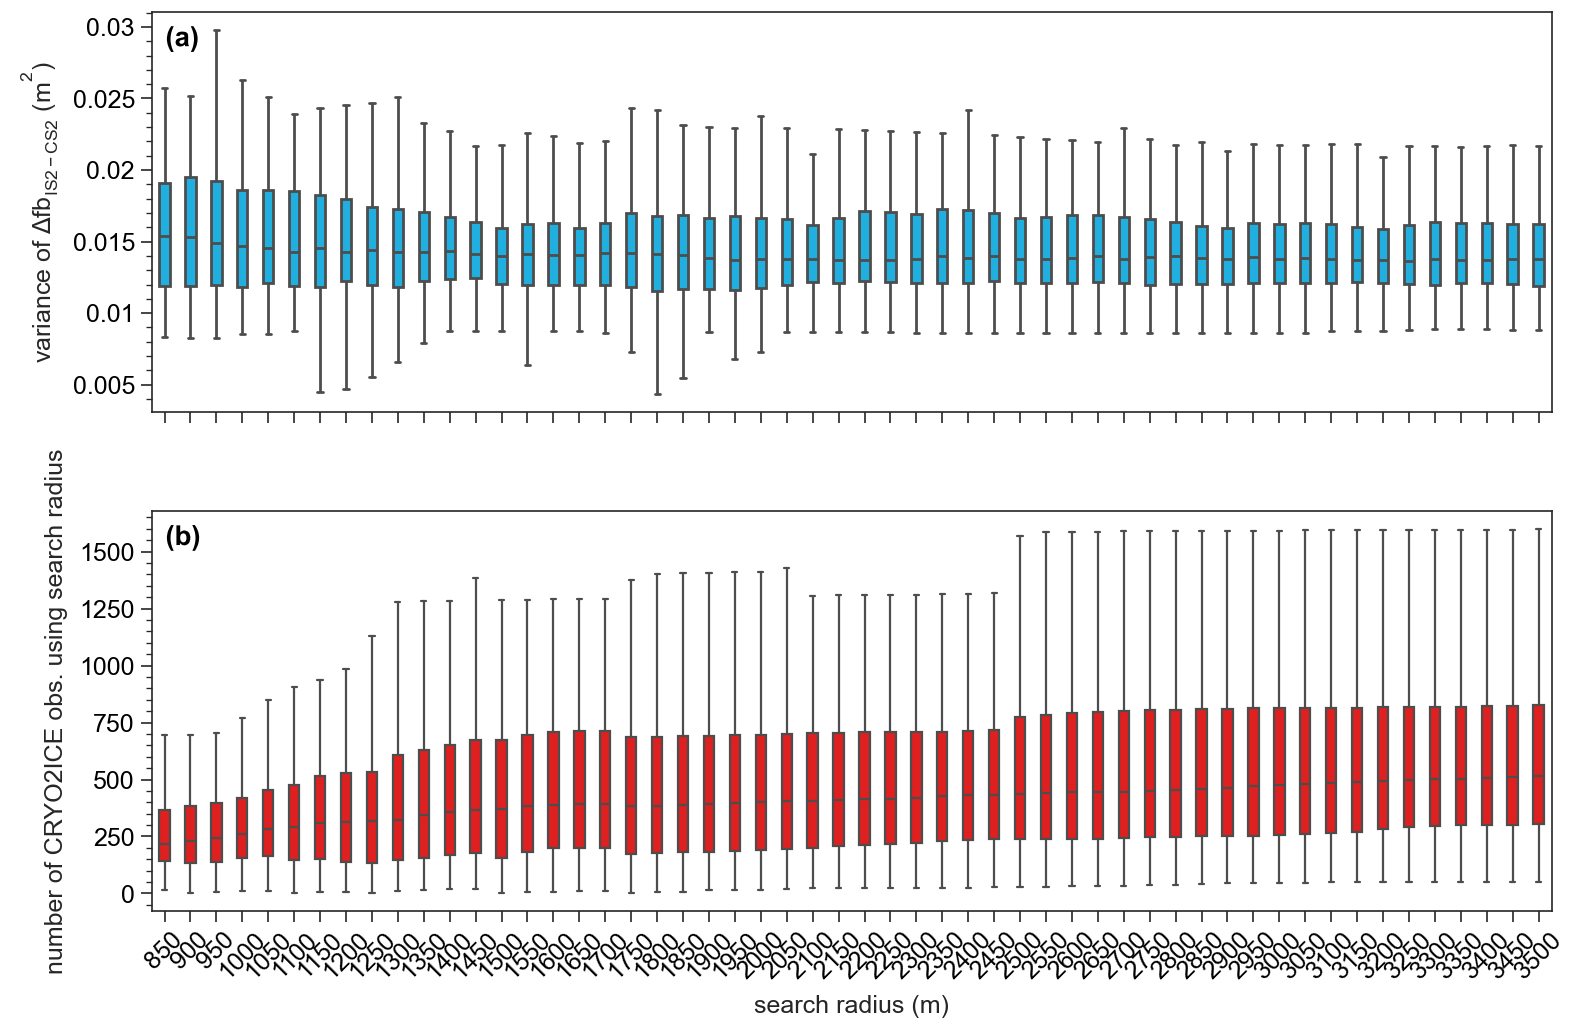

In [650]:
import seaborn as sns

#fig,ax = plt.subplots(nrows=2, figsize=(8,5), constrained_layout=True, sharex=True)
fig,ax = pplt.subplots(refwidth=7, ncols=1,  refheight=2,nrows=2, sharex=True, sharey=False)
g=sns.boxplot(x="distance_total", y="variance_total",
                 data=frame, color='deepskyblue', ax = ax[0], width=0.4, linewidth=1, showfliers=False)
ax[0].set_xticklabels('')
ax[0].set_xlabel('')

g=sns.boxplot(x="distance_total", y="N_total",
                 data=frame, color='red', ax=ax[1], width=0.4, linewidth=0.8, showfliers=False)
#g.set_xticklabels(ax.get_xticklabels(),rotation=90)
g.set_xticklabels(np.arange(850, 3550, 50),rotation=45)

ax[0].set_ylabel(r'variance of $\Delta{fb}_{IS2-CS2}$ (m$^2$)')
ax[1].set_ylabel(r'number of CRYO2ICE obs. using search radius')
ax[1].set_xlabel('search radius (m)')

ax[0].tick_params(axis='x', which='minor', bottom=False)
ax[1].tick_params(axis='x', which='minor', bottom=False)
#ax[0].set_ylim([0, 0.05])

#ax[0].text(0.02, 0.90,'(a)',transform = ax[0].transAxes)
#ax[1].text(0.02, 0.90,'(b)',transform = ax[1].transAxes)
fig.format(abc='(a)', abcloc='ul')
plt.savefig('{}:variance_image.png'.format(drive), dpi=300)
plt.show()


# Along-track examples 
These along-track examples requires the L2 product of CS, to include the lines where leads are identified.

In [543]:
################################### MANUAL SELECTION

### November
#fp1 = r'D:\DTU\CRYO2ICE\Data\CRYO2ICE_original_MSS\BaselineE\2020-2021\CRYO2ICE_CRYO2ICE_CS_LTA__SIR_SAR_2__20201110T090903_20201110T091432_E001_original_MSS_smooth_BaselineE_LARM_AMSR2_SMLG_MERRA5_mW99_smooth_BaselineE.csv'
#df_jan = pd.read_csv(fp1, index_col=None, header=0)
#filename_icetype = 'ice_type_nh_polstere-100_multi_202011101200.nc'
#fname_AMSR2 = r'D:\DTU\CRYO2ICE\AMSR2\AMSR_U2_L3_SeaIce12km_B04_20201110.he5'
#fp1_lead = r'D:\DTU\CRYO2ICE\Data\CS_OFFL_SIR_SAR_2__20201110T090903_20201110T091432_D001.nc'
#name_along_track = 'D:\demo_CRYO2ICE_roughness_including_leads_nov_r3500_original_MSS_v2_final.png'
#name_along_track_lowess = 'D:\demo_CRYO2ICE_roughness_including_leads_nov_r3500_original_MSS_v2_final_lowess_filter.png'
#name_along_track_lowess_filter = 'D:\demo_CRYO2ICE_roughness_including_leads_nov_r3500_original_MSS_v2_final_lowess_snow_depth.png'
#name_map = 'D:\demo_CRYO2ICE_roughness_location_nov2020_original_MSS.png'
#n1, n2 = 500, 1400
#xlabel_set = ''
#label_a, label_b = '(a)', '(b)'
#label_month = 'November'
#legend_check = True


## January
#fp1 = r'D:\DTU\CRYO2ICE\Data\CRYO2ICE_original_MSS\CRYO2ICE_w99_smooth\January\CRYO2ICE_CRYO2ICE_CS_OFFL_SIR_SAR_2__20210130T133202_20210130T134203_D001_original_MSS_smooth_LARM_AMSR2_SMLG_MERRA5_W99_smooth_test.csv'
#df_jan = pd.read_csv(fp1, index_col=None, header=0)
#filename_icetype = 'ice_type_nh_polstere-100_multi_202101301200.nc'
#fname_AMSR2 = r'D:\DTU\CRYO2ICE\AMSR2\AMSR_U2_L3_SeaIce12km_B04_20210130.he5'
#fp1_lead = r'D:\DTU\CRYO2ICE\Data\CS_OFFL_SIR_SAR_2__20210130T133202_20210130T134203_D001.nc'
#name_along_track = 'D:\demo_CRYO2ICE_roughness_including_leads_jan_r3500_original_MSS_v2_final.png'
#name_along_track_lowess = 'D:\demo_CRYO2ICE_roughness_including_leads_jan_r3500_original_MSS_v2_final_lowess_filter.png'
#name_along_track_lowess_filter = 'D:\demo_CRYO2ICE_roughness_including_leads_jan_r3500_original_MSS_v2_final_lowess_snow_depth.png'
#name_map = 'D:\demo_CRYO2ICE_roughness_location_jan2021_original_MSS.png'
#n1, n2 = 500, 1000
#xlabel_set = ''
#label_a, label_b = '(c)', '(d)'
#label_month = 'January'
#legend_check = False

## March 
fp1 = r'D:\DTU\CRYO2ICE\Data\CRYO2ICE_original_MSS\CRYO2ICE_w99_smooth\March\CRYO2ICE_CRYO2ICE_CS_OFFL_SIR_SAR_2__20210317T093327_20210317T094059_D001_original_MSS_smooth_LARM_AMSR2_SMLG_MERRA5_W99_smooth_test.csv'
filename_icetype = 'ice_type_nh_polstere-100_multi_202103171200.nc'
fname_AMSR2 = r'D:\DTU\CRYO2ICE\AMSR2\AMSR_U2_L3_SeaIce12km_B04_20210317.he5'
fp1_lead = r'D:\DTU\CRYO2ICE\Data\CS_OFFL_SIR_SAR_2__20210317T093327_20210317T094059_D001.nc'
name_along_track = 'D:\demo_CRYO2ICE_roughness_including_leads_mar_r3500_original_MSS_v2_final.png'
name_along_track_lowess = 'D:\demo_CRYO2ICE_roughness_including_leads_mar_r3500_original_MSS_v2_final_lowess_filter.png'
name_along_track_lowess_filter = 'D:\demo_CRYO2ICE_roughness_including_leads_mar_r3500_original_MSS_v2_final_lowess_snow_depth.png'
name_map = 'D:\demo_CRYO2ICE_roughness_location_mar2021_original_MSS.png'
df_jan = pd.read_csv(fp1, index_col=None, header=0)
n1, n2 = 500, 1350
xlabel_set = 'along-track distance (km)'
label_a, label_b = '(e)', '(f)'
label_month = 'March'
legend_check = False

#######
df_jan = df_jan.drop(columns=['Unnamed: 0', 'level_0'])
df_jan.loc[df_jan['AMSR2_snow_depth']<-1000, 'AMSR2_snow_depth'] = np.nan

################################### AUTOMATIC

### compute along-track using CRYO2ICE as baseline
basename_without_ext = os.path.splitext(os.path.basename(fp1))[0]
txt1 = basename_without_ext.split('_')[9]
ID_CS2=np.int(txt1.split('T')[1])

from datetime import datetime
# miles/s to m/s (multipy with 1609)
speed_CS2_m_pr_s = 4.35*1609
speed_CS2_m_pr_s

df_test = df_jan.reset_index()
diff_t_total = []
for i in df_test['time']:
    diff_t = datetime.strptime(df_test['time'][0],"%Y-%m-%d %H:%M:%S.%f")-datetime.strptime(i,"%Y-%m-%d %H:%M:%S.%f")
    diff_t_total = np.append(diff_t_total, diff_t.total_seconds())
along_track_dist =  np.abs(diff_t_total)*speed_CS2_m_pr_s

df_jan = df_test
df_jan['along_track_dist_in_metres'] = along_track_dist
df_jan['along_track_dist_in_km'] = along_track_dist/1e3

from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess
frac_comb = 1/50
x,y = df_jan['along_track_dist_in_metres'], df_jan['fb']
sm_x, sm_y = sm_lowess(y, x,  frac=frac_comb).T
df_jan['lowess_along_track_dist_metres']=sm_x
df_jan['lowess_along_track_dist_km']=sm_x/1000
df_jan['lowess_fb']=np.nan
df_jan['lowess_fb'][df_jan['fb'].notnull()]=sm_y
x,y = df_jan['along_track_dist_in_metres'], df_jan['LARM_rfb']
sm_x, sm_y = sm_lowess(y, x,  frac=frac_comb).T
df_jan['lowess_LARM_rfb']=np.nan
df_jan['lowess_LARM_rfb'][df_jan['LARM_rfb'].notnull()]=sm_y
x,y = df_jan['along_track_dist_in_metres'], df_jan['CCI_rfb']
sm_x, sm_y = sm_lowess(y, x,  frac=frac_comb).T
df_jan['lowess_CCI_rfb']=np.nan
df_jan['lowess_CCI_rfb'][df_jan['CCI_rfb'].notnull()]=sm_y


ds=0.3
ns = (1+0.51*ds)**1.5
df_jan['snow_depth_original_MSS'] = (df_jan['IS2_w_mean_fb_MSS']-df_jan['fb'])*(1/ns)
df_jan['snow_depth_original_MSS_CCI'] = (df_jan['IS2_w_mean_fb_MSS']-df_jan['CCI_rfb'])*(1/ns)
df_jan['snow_depth_original_MSS_LARM'] = (df_jan['IS2_w_mean_fb_MSS']-df_jan['LARM_rfb'])*(1/ns)

df_jan['lowess_snow_depth_original_MSS'] = (df_jan['IS2_w_mean_fb_MSS']-df_jan['lowess_fb'])*(1/ns)
df_jan['lowess_snow_depth_original_MSS_CCI'] = (df_jan['IS2_w_mean_fb_MSS']-df_jan['lowess_CCI_rfb'])*(1/ns)
df_jan['lowess_snow_depth_original_MSS_LARM'] = (df_jan['IS2_w_mean_fb_MSS']-df_jan['lowess_LARM_rfb'])*(1/ns)

df_jan_short = df_jan[n1:n2]



### download L2 data for lead observations and compute along-track distance
ds = netCDF4.Dataset(fp1_lead, 'r')
CS2_lead = ds.variables['height_sea_ice_lead_20_ku'][:]
lat_lead = ds.variables['lat_poca_20_ku'][:]
lon_lead = ds.variables['lon_poca_20_ku'][:]

tname = "time_20_ku"
nctime = ds.variables[tname][:] # get values
t_unit = ds.variables[tname].units # get unit  "days since 1950-01-01T00:00:00Z"
t_cal = ds.variables[tname].calendar
tvalue = num2date(nctime,units = t_unit,calendar = t_cal)
#str_time = [i.strftime("%Y-%m-%d %H:%M:%S") for i in tvalue] # to display dates as string
str_time = [str(i) for i in tvalue]

df_CS2_lead_jan = pd.DataFrame({'lead_CS2':CS2_lead, 'lat':lat_lead, 'lon':lon_lead, 'time':str_time})

from datetime import datetime
# miles/s to m/s (multipy with 1609)
speed_CS2_m_pr_s = 4.35*1609
speed_CS2_m_pr_s

df_test = df_CS2_lead_jan.reset_index()
diff_t_total = []
for i in df_CS2_lead_jan['time']:
    diff_t = datetime.strptime(df_jan['time'][0],"%Y-%m-%d %H:%M:%S.%f")-datetime.strptime(i,"%Y-%m-%d %H:%M:%S.%f")
    diff_t_total = np.append(diff_t_total, diff_t.total_seconds())
along_track_dist =  np.abs(diff_t_total)*speed_CS2_m_pr_s

df_CS2_lead_jan = df_test
df_CS2_lead_jan['along_track_dist_in_metres'] = along_track_dist
df_CS2_lead_jan['along_track_dist_in_km'] = along_track_dist/1e3

df_CS2_lead_jan = df_CS2_lead_jan[(df_CS2_lead_jan['lat']>df_jan_short['lat'].min()) & (df_CS2_lead_jan['lat']<df_jan_short['lat'].max()) & (df_CS2_lead_jan['lon']>df_jan_short['lon'].min()) & (df_CS2_lead_jan['lon']<df_jan_short['lon'].max())]
df_CS2_lead_jan_check = df_CS2_lead_jan[(df_CS2_lead_jan['along_track_dist_in_metres']>=df_jan_short['along_track_dist_in_metres'].min()) & (df_CS2_lead_jan['along_track_dist_in_metres']<=df_jan_short['along_track_dist_in_metres'].max())]


## Compute 25 km segments
j=25e3 # in metres
idx_multiplic = int(np.floor(np.max(df_jan['along_track_dist_in_metres'])/j))
new_idx = np.arange(0+j/2, idx_multiplic*j, j)

lat_new, lon_new, C2I_new, C2I_LARM_new, C2I_CCI_new, AMSR2_new, SMLGv1_new, SMLGv2_new = np.empty(len(new_idx)), np.empty(len(new_idx)), np.empty(len(new_idx)), np.empty(len(new_idx)), np.empty(len(new_idx)), np.empty(len(new_idx)), np.empty(len(new_idx)), np.empty(len(new_idx))
for i in np.arange(0, len(new_idx)):
    bol=df_jan['along_track_dist_in_metres']-new_idx[i]
    idx = np.where(abs(bol)<=j/2)
    if len(idx) >=1:
        lat_new[i] = np.nanmean(df_jan['lat'].iloc[idx])
        lon_new[i] = np.nanmean(df_jan['lon'].iloc[idx])
        C2I_new[i] = np.nanmean(df_jan['snow_depth_original_MSS_smoothed'].iloc[idx])
        C2I_LARM_new[i] = np.nanmean(df_jan['snow_depth_original_MSS_LARM_smoothed'].iloc[idx])
        C2I_CCI_new[i] = np.nanmean(df_jan['snow_depth_original_MSS_CCI_smoothed'].iloc[idx])
        AMSR2_new[i] = np.nanmean(df_jan['AMSR2_snow_depth'].iloc[idx])/100
        SMLGv1_new[i] = np.nanmean(df_jan['SMLG_snow_depth'].iloc[idx])
        SMLGv2_new[i] = np.nanmean(df_jan['SMLG_snow_depth_v2'].iloc[idx])
    else:
        lat_new[i] = np.nan
        lon_new[i] = np.nan
        C2I_new[i] = np.nan
        C2I_LARM_new[i] = np.nan
        C2I_CCI_new[i] = np.nan
        AMSR2_new[i] = np.nan
        SMLGv1_new[i] = np.nan
        SMLGv2_new[i] = np.nan

df_new = pd.DataFrame({'lat':lat_new, 'lon':lon_new,'along_track_dist_in_metres':new_idx, 'C2I_snow_depth':C2I_new, 'C2I_LARM_snow_depth':C2I_LARM_new,
         'C2I_CCI_snow_depth':C2I_CCI_new, 'AMSR2_snow_depth':AMSR2_new, 'SMLG_snow_depth':SMLGv1_new, 
         'SMLG_snow_depth':SMLGv2_new})
df_new_short = df_new[df_new['along_track_dist_in_metres']<np.max(df_jan_short['along_track_dist_in_metres'])]
df_new_short = df_new_short[df_new_short['along_track_dist_in_metres']>np.min(df_jan_short['along_track_dist_in_metres'])]



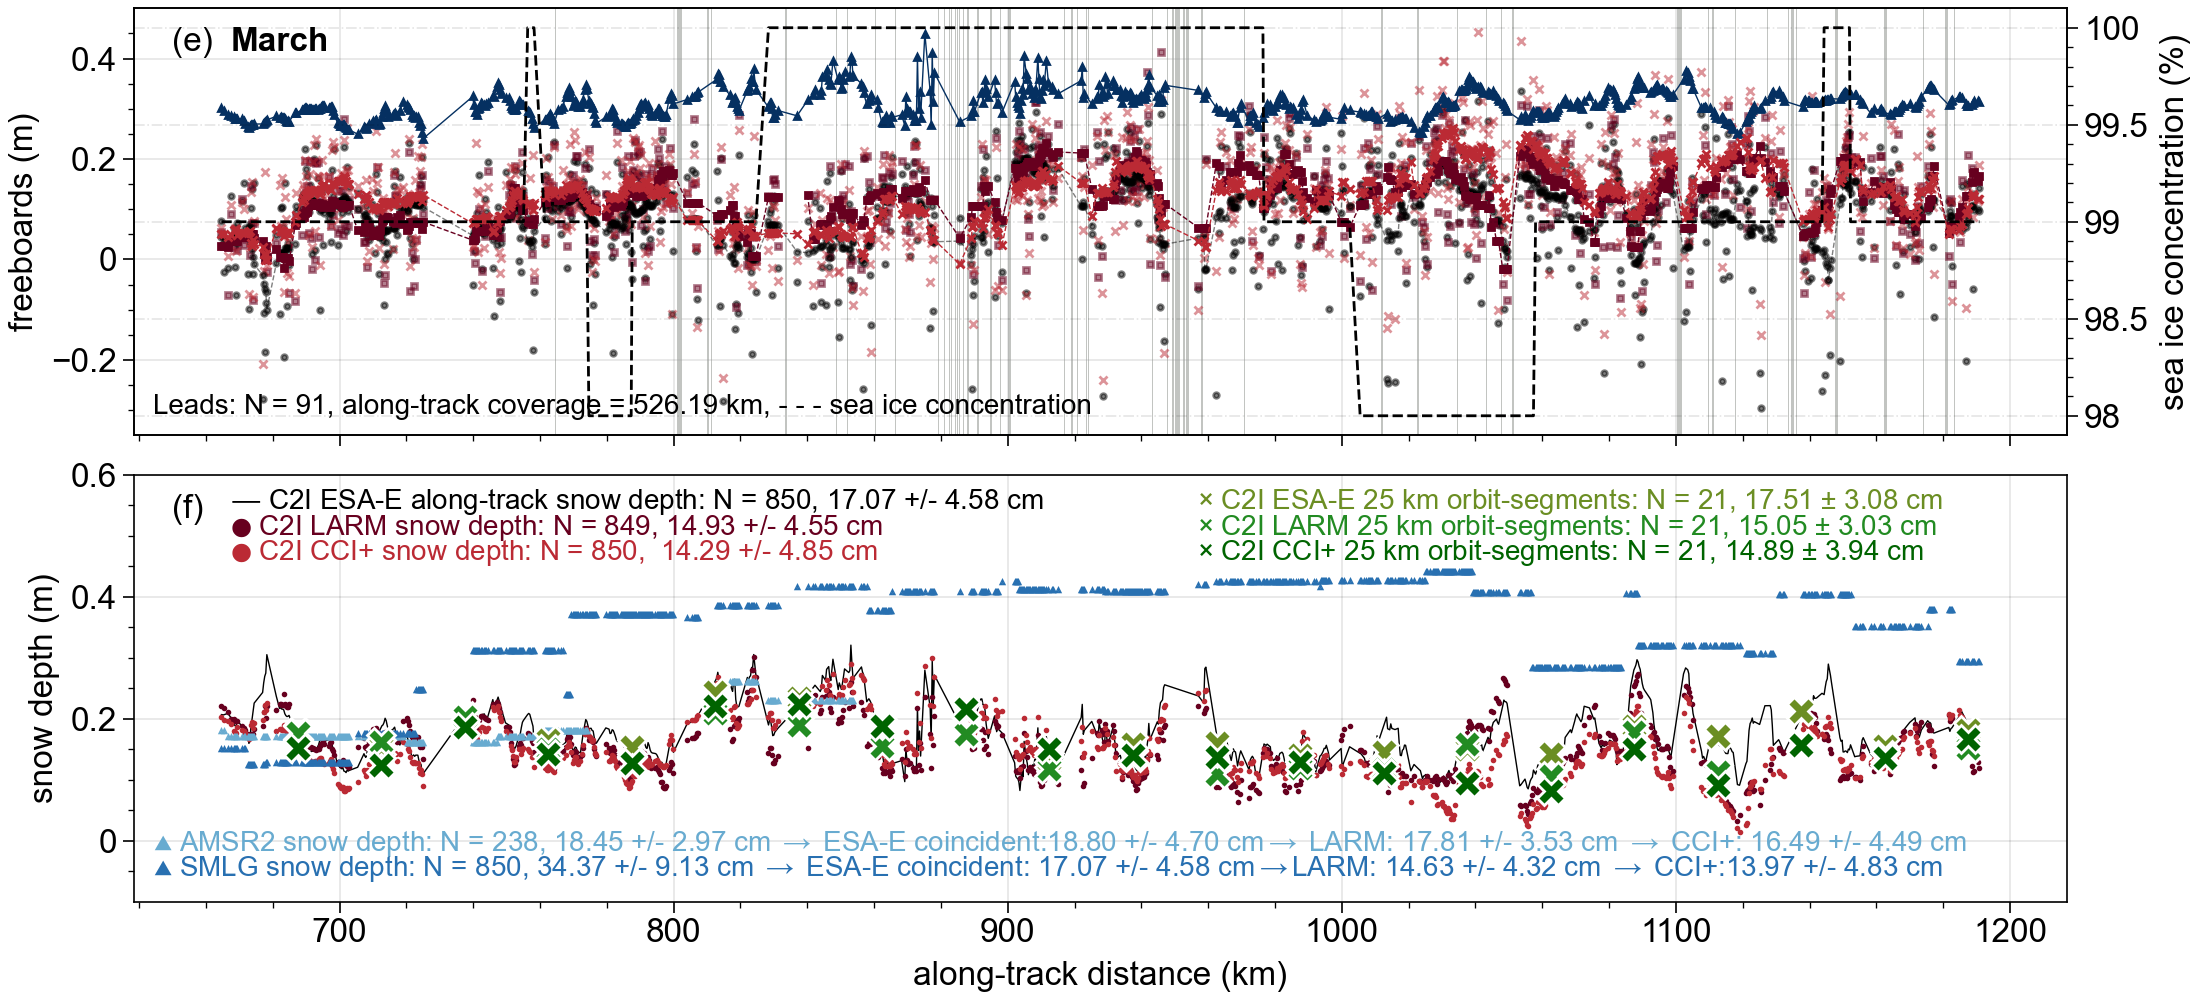

In [216]:
import proplot as pplot
from matplotlib import gridspec
from matplotlib.colors import LinearSegmentedColormap,rgb2hex
fig, axs = plt.subplots(2, figsize=(11,5), constrained_layout=True)

#fig = plt.figure(figsize=(16,6))
#gs = gridspec.GridSpec(2, 2, height_ratios=(1,1), width_ratios=(6,1))
#axs = [plt.subplot(gs[0, 0]), plt.subplot(gs[1, 0]), plt.subplot(gs[1, 1])]
#axs[0].plot(df_IS2_new['lat'], df_IS2_new['fb'], c='grey', ls='', marker='.', markersize=0.8)

#cmap_qual = plt.get_cmap('538')
cmap_check = plt.cm.get_cmap('BuRd_r')
cmap_qual = ['#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00', '#CC79A7', 'darkorange']
cmap_qual = [rgb2hex(cmap_check((0/8))),rgb2hex(cmap_check((1/8))),rgb2hex(cmap_check((2/8))),
            rgb2hex(cmap_check((5/8))), rgb2hex(cmap_check(6/8)), rgb2hex(cmap_check(7/8)), rgb2hex(cmap_check(8/8))]
cmap_qual = LinearSegmentedColormap.from_list('list', cmap_qual, N = len(cmap_qual))

ax2 = axs[0].twinx()
axs[0].plot(df_jan_short['along_track_dist_in_km'], df_jan_short['fb'] ,'o', c='k', markersize=2, ls='', lw=0.5, alpha=0.5)
axs[0].plot(df_jan_short['along_track_dist_in_km'],df_jan_short['LARM_rfb'], 's',c=cmap_qual(0), markersize=2, ls='', lw=0.5, alpha=0.5)
axs[0].plot(df_jan_short['along_track_dist_in_km'],df_jan_short['CCI_rfb'], 'x',c=cmap_qual(1), markersize=3, ls='', lw=0.5, alpha=0.5)
axs[0].plot(df_jan_short['along_track_dist_in_km'],df_jan_short['IS2_w_mean_fb_MSS'], '^',c=cmap_qual(7), markersize=2, ls='-', lw=0.5)
axs[0].plot(df_jan_short['along_track_dist_in_km'], df_jan_short['CS2_smooth'] ,'o', c='k', markersize=2, ls='--', lw=0.5, alpha=0.5)
axs[0].plot(df_jan_short['along_track_dist_in_km'],df_jan_short['LARM_rfb_smooth'], 's',c=cmap_qual(0), markersize=2, ls='--', lw=0.5)
axs[0].plot(df_jan_short['along_track_dist_in_km'],df_jan_short['CCI_rfb_smooth'], 'x',c=cmap_qual(1), markersize=3, ls='--', lw=0.5)


axs[0].vlines(df_CS2_lead_jan_check[df_CS2_lead_jan_check['lead_CS2']>0]['along_track_dist_in_km'], -0.5, 1,ls='-', color='grey', linewidth=0.2, label='_nolegend_')
ax2.plot(df_jan_short['along_track_dist_in_km'],df_jan_short['AMSR2_SIC'], c='k', ls='--', lw=1)
ax2.set_ylabel('sea ice concentration (%)', color='k', fontsize=12)
ax2.grid(ls='-.')

axs[1].plot(df_jan_short['along_track_dist_in_km'],df_jan_short['snow_depth_original_MSS_smoothed'] , c='k',ls='-', linewidth=0.5, label='_nolegend_')
axs[1].plot(df_jan_short['along_track_dist_in_km'],df_jan_short['snow_depth_original_MSS_LARM_smoothed'] , 'o', c=cmap_qual(0), markersize=1, label='_nolegend_')
axs[1].plot(df_jan_short['along_track_dist_in_km'],df_jan_short['snow_depth_original_MSS_CCI_smoothed'] , 'o', c=cmap_qual(1), markersize=1, label='_nolegend_')
axs[1].plot(df_jan_short['along_track_dist_in_km'],(df_jan_short['AMSR2_snow_depth'])/100 ,'^', c=cmap_qual(4),markersize=1, label='_nolegend_')
axs[1].plot(df_jan_short['along_track_dist_in_km'],(df_jan_short['SMLG_snow_depth']) ,'^', c=cmap_qual(5),markersize=1, label='_nolegend_')
#axs[1].plot(df_jan_short['along_track_dist_in_km'],(df_jan_short['SMLG_snow_depth_v2']) ,'^', c=cmap_qual(6),markersize=1, label='_nolegend_')


#df_jan_short_restrict = df_jan_short[(df_jan_short['ppk']<9) & (df_jan_short['ssd']>6.29)]
axs[0].set_ylim(-0.35, 0.5)
axs[1].set_ylim(-0.1, 0.4)


df_jan_AMSR2_points = df_jan_short[df_jan_short['AMSR2_snow_depth'].notna()]
df_jan_SMLG_points = df_jan_short[df_jan_short['SMLG_snow_depth'].notna()]
df_jan_LARM_points = df_jan_SMLG_points[df_jan_SMLG_points['LARM_rfb'].notna()]
df_jan_CCI_points = df_jan_LARM_points[df_jan_LARM_points['LARM_rfb'].notna()]


txt_CRYO2ICE =u"$\u23e4$ "+r'C2I ESA-E along-track snow depth: N = {}, {:.2f} +/- {:.2f} cm'.format(len(df_jan_short['snow_depth_original_MSS_smoothed']), np.nanmean(df_jan_short['snow_depth_original_MSS_smoothed'])*100, np.nanstd(df_jan_short['snow_depth_original_MSS_smoothed'])*100)
txt_CRYO2ICE_LARM =u"$\u26ab$ "+r'C2I LARM snow depth: N = {}, {:.2f} +/- {:.2f} cm'.format(len(df_jan_short[df_jan_short['snow_depth_original_MSS_LARM_smoothed'].notna()]), np.nanmean(df_jan_short['snow_depth_original_MSS_LARM_smoothed'])*100, np.nanstd(df_jan_short['snow_depth_original_MSS_LARM_smoothed'])*100)
txt_CRYO2ICE_CCI =u"$\u26ab$ "+r'C2I CCI+ snow depth: N = {},  {:.2f} +/- {:.2f} cm'.format(len(df_jan_short[df_jan_short['snow_depth_original_MSS_CCI_smoothed'].notna()]), np.nanmean(df_jan_short['snow_depth_original_MSS_CCI_smoothed'])*100, np.nanstd(df_jan_short['snow_depth_original_MSS_CCI_smoothed'])*100)
txt_AMSR2 = r'$\blacktriangle$ AMSR2 snow depth: N = {}, {:.2f} +/- {:.2f} cm $\rightarrow$ ESA-E coincident:{:.2f} +/- {:.2f} cm'.format(len(df_jan_AMSR2_points['AMSR2_snow_depth']), np.nanmean(df_jan_AMSR2_points['AMSR2_snow_depth']), np.nanstd(df_jan_AMSR2_points['AMSR2_snow_depth']), np.nanmean(df_jan_AMSR2_points['snow_depth_original_MSS_smoothed'])*100, np.nanstd(df_jan_AMSR2_points['snow_depth_original_MSS_smoothed'])*100)
txt_SMLG = r'$\blacktriangle$ SMLG snow depth: N = {}, {:.2f} +/- {:.2f} cm $\rightarrow$ ESA-E coincident: {:.2f} +/- {:.2f} cm'.format(len(df_jan_SMLG_points['SMLG_snow_depth']), np.nanmean(df_jan_SMLG_points['SMLG_snow_depth']*100), np.nanstd(df_jan_SMLG_points['SMLG_snow_depth']*100), np.nanmean(df_jan_SMLG_points['snow_depth_original_MSS_smoothed'])*100, np.nanstd(df_jan_SMLG_points['snow_depth_original_MSS_smoothed'])*100)
txt_AMSR2_LARM_CCI = r'$\rightarrow$ LARM: {:.2f} +/- {:.2f} cm $\rightarrow$ CCI+: {:.2f} +/- {:.2f} cm'.format(np.nanmean(df_jan_AMSR2_points['snow_depth_original_MSS_LARM_smoothed'])*100, np.nanstd(df_jan_AMSR2_points['snow_depth_original_MSS_LARM_smoothed'])*100, np.nanmean(df_jan_AMSR2_points['snow_depth_original_MSS_CCI_smoothed'])*100, np.nanstd(df_jan_AMSR2_points['snow_depth_original_MSS_CCI_smoothed'])*100)
txt_SMLG_LARM_CCI = r'$\rightarrow$LARM: {:.2f} +/- {:.2f} cm $\rightarrow$ CCI+:{:.2f} +/- {:.2f} cm'.format( np.nanmean(df_jan_LARM_points['snow_depth_original_MSS_LARM_smoothed']*100), np.nanstd(df_jan_LARM_points['snow_depth_original_MSS_LARM_smoothed']*100), np.nanmean(df_jan_CCI_points['snow_depth_original_MSS_CCI_smoothed']*100), np.nanstd(df_jan_CCI_points['snow_depth_original_MSS_CCI_smoothed']*100))

txt_SMLG_v2 = r'$\blacktriangle$ SMLG-HS snow depth: N = {}, {:.2f} +/- {:.2f} cm $\rightarrow$ ESA-E coincident: {:.2f} +/- {:.2f} cm'.format(len(df_jan_SMLG_points['SMLG_snow_depth']), np.nanmean(df_jan_SMLG_points['SMLG_snow_depth_v2']*100), np.nanstd(df_jan_SMLG_points['SMLG_snow_depth_v2']*100), np.nanmean(df_jan_SMLG_points['snow_depth_original_MSS_smoothed'])*100, np.nanstd(df_jan_SMLG_points['snow_depth_original_MSS_smoothed'])*100)
txt_SMLG_LARM_CCI_v2 = r'$\rightarrow$ LARM: {:.2f}+/- {:.2f} cm $\rightarrow$ CCI+ coincident: {:.2f} +/- {:.2f} cm'.format( np.nanmean(df_jan_LARM_points['snow_depth_original_MSS_LARM_smoothed']*100), np.nanstd(df_jan_LARM_points['snow_depth_original_MSS_LARM_smoothed']*100), np.nanmean(df_jan_CCI_points['snow_depth_original_MSS_CCI_smoothed']*100), np.nanstd(df_jan_CCI_points['snow_depth_original_MSS_CCI_smoothed']*100))



font_size_snow = 10
axs[1].text(0.05, 0.92, txt_CRYO2ICE, transform = axs[1].transAxes, fontsize=font_size_snow, color='k')
axs[1].text(0.05, 0.86, txt_CRYO2ICE_LARM, transform = axs[1].transAxes, fontsize=font_size_snow, color=cmap_qual(0))
axs[1].text(0.05, 0.80, txt_CRYO2ICE_CCI, transform = axs[1].transAxes, fontsize=font_size_snow, color=cmap_qual(1))

axs[1].text(0.01, 0.12, txt_AMSR2+txt_AMSR2_LARM_CCI, transform = axs[1].transAxes, fontsize=font_size_snow, color=cmap_qual(4))
axs[1].text(0.01, 0.06, txt_SMLG+txt_SMLG_LARM_CCI, transform = axs[1].transAxes, fontsize=font_size_snow, color=cmap_qual(5))
#axs[1].text(0.01, 0.06, txt_SMLG_v2+txt_SMLG_LARM_CCI_v2, transform = axs[1].transAxes, fontsize=font_size_snow, color=cmap_qual(6))


axs[0].set_ylabel('freeboards (m)', fontsize=12)
axs[1].set_ylabel('snow depth (m)', fontsize=12)
axs[1].set_xlabel(xlabel_set,  fontsize=12)

axs[0].text(0.02, 0.9, label_a, transform = axs[0].transAxes, fontsize=12)
axs[1].text(0.02, 0.9, label_b, transform = axs[1].transAxes, fontsize=12)

along_track_dist = np.abs(np.max(df_jan_short['along_track_dist_in_km'])-np.min(df_jan_short['along_track_dist_in_km']))
axs[0].text(0.05, 0.9, label_month, transform = axs[0].transAxes, fontsize=12,weight='bold')
axs[0].text(0.01, 0.05, 'Leads: N = {}, along-track coverage = {:.2f} km'.format(len(df_CS2_lead_jan_check[df_CS2_lead_jan_check['lead_CS2']>0]),along_track_dist)+ ", - - - sea ice concentration", transform = axs[0].transAxes, fontsize=font_size_snow)

axs[1].plot(df_new_short['along_track_dist_in_metres']/1e3, df_new_short['C2I_snow_depth'], 'X', c='olivedrab', markeredgecolor='w',markersize=10, label='CRYO2ICE 25 km')
axs[1].plot(df_new_short['along_track_dist_in_metres']/1e3, df_new_short['C2I_LARM_snow_depth'], 'X', c='forestgreen', markeredgecolor='w',markersize=10, label='CRYO2ICE LARM 25 km')
axs[1].plot(df_new_short['along_track_dist_in_metres']/1e3, df_new_short['C2I_CCI_snow_depth'], 'X', c='darkgreen', markeredgecolor='w',markersize=10, label='CRYO2ICE CCI 25 km')

axs[0].tick_params(labelsize=12)
axs[1].tick_params(labelsize=12)
ax2.tick_params(labelsize=12)
#ax3.tick_params(labelsize=10)

txt_CRYO2ICE =r"$\times$ "+r'C2I ESA-E 25 km orbit-segments: N = {}, {:.2f} $\pm$ {:.2f} cm'.format(len(df_new_short['C2I_snow_depth']), np.nanmean(df_new_short['C2I_snow_depth'])*100, np.nanstd(df_new_short['C2I_snow_depth'])*100)
txt_CRYO2ICE_LARM =r"$\times$ "+r'C2I LARM 25 km orbit-segments: N = {}, {:.2f} $\pm$ {:.2f} cm'.format(len(df_new_short['C2I_LARM_snow_depth']), np.nanmean(df_new_short['C2I_LARM_snow_depth'])*100, np.nanstd(df_new_short['C2I_LARM_snow_depth'])*100)
txt_CRYO2ICE_CCI =r"$\times$ "+r'C2I CCI+ 25 km orbit-segments: N = {}, {:.2f} $\pm$ {:.2f} cm'.format(len(df_new_short['C2I_CCI_snow_depth']), np.nanmean(df_new_short['C2I_CCI_snow_depth'])*100, np.nanstd(df_new_short['C2I_CCI_snow_depth'])*100)

axs[1].text(0.55, 0.92, txt_CRYO2ICE, c='olivedrab', transform=axs[1].transAxes,fontsize=10)
axs[1].text(0.55, 0.86, txt_CRYO2ICE_LARM, c='forestgreen', transform=axs[1].transAxes,fontsize=10)
axs[1].text(0.55, 0.80, txt_CRYO2ICE_CCI, c='darkgreen', transform=axs[1].transAxes,fontsize=10)

if legend_check is True:
    legend=axs[0].legend(['CS2 ESA-E freeboard', 'CS2 LARM freeboard', 'CS2 CCI+ freeboard','IS2 weighted freeboard', 'CS2 ESA-E smoothed', 'CS2 LARM smoothed', 'CS2 CCI+ smoothed'], loc='lower right', scatterpoints=3,fontsize=10, ncol=2)
    legend.legendHandles[0]._legmarker.set_markersize(5)
    legend.legendHandles[1]._legmarker.set_markersize(5)
    legend.legendHandles[2]._legmarker.set_markersize(5)
    legend.legendHandles[3]._legmarker.set_markersize(5)
    legend.legendHandles[4]._legmarker.set_markersize(5)
    legend.legendHandles[5]._legmarker.set_markersize(5)
    legend.legendHandles[6]._legmarker.set_markersize(5)


axs[0].grid(axis='y',ls='-')
axs[1].grid(ls='-')


plt.setp(axs[0].get_xticklabels(), visible=False)
plt.savefig(name_along_track, transparent=True)     

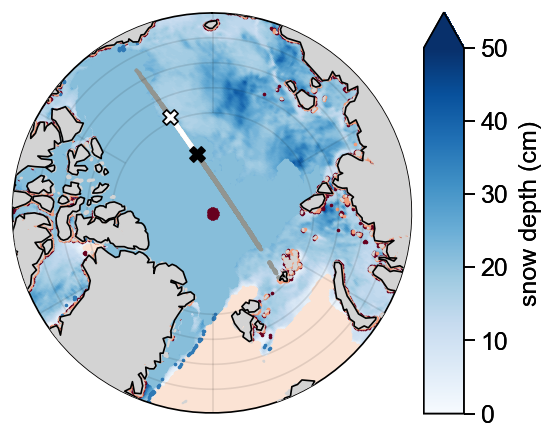

In [215]:
fname = fname_AMSR2
file = h5py.File(fname, 'r')
file.keys()
lon = np.array(file['HDFEOS/GRIDS/NpPolarGrid12km/lon'])
lat = np.array(file['HDFEOS/GRIDS/NpPolarGrid12km/lat'])
snow_depth = np.array(file['HDFEOS/GRIDS/NpPolarGrid12km/Data Fields/SI_12km_NH_SNOWDEPTH_5DAY'])
sea_ice_concentration= np.array(file['HDFEOS/GRIDS/NpPolarGrid12km/Data Fields/SI_12km_NH_ICECON_DAY'])
file.close()

df_AMSR2 = pd.DataFrame({'lat':lat.flatten(), 'lon':lon.flatten(), 'snow_depth':snow_depth.flatten()})

import proplot as pplt
import matplotlib.pyplot as plt
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
resol='110m'
fig,ax = pplt.subplots(refwidth=2, ncols=1, nrows=1, sharex=False, proj='nplaea')
fig.patch.set_facecolor('white')


axs = ax[0]

#im = axs.scatter(lon.flatten(), lat.flatten(), c=snow_depth_only.flatten(),cmap='blues', vmin=0, vmax=50, s=0.5, extend='max')
#im = axs.scatter(df_XO_total_nonna['lon_A'], df_XO_total_nonna['lat_B'], c=df_XO_total_nonna['time_delta'], cmap='inferno', s=0.5, vmin=0, vmax=delta_t)
df = df_AMSR2[df_AMSR2['snow_depth']<100]
im = axs.scatter(df['lon'], df['lat'], c = df['snow_depth'], cmap='blues', vmin=0, vmax=50, s=0.5, extend='max')

cb = axs.colorbar(im, label='snow depth (cm)', loc='r')

df = df_AMSR2[df_AMSR2['snow_depth']==110]
im = axs.scatter(df['lon'], df['lat'], c=cmap_check((1/7)*0), s=0.5, label='missing snow')

df = df_AMSR2[df_AMSR2['snow_depth']==120]
im = axs.scatter(df['lon'], df['lat'], c=cmap_check((1/7)*2), s=0.5, label='land snow')

df = df_AMSR2[df_AMSR2['snow_depth']==130]
im = axs.scatter(df['lon'], df['lat'], c=cmap_check((1/7)*3), s=0.5, label='open water snow')

df = df_AMSR2[df_AMSR2['snow_depth']==140]
im = axs.scatter(df['lon'], df['lat'], c=cmap_check((1/7)*5), s=0.5, label='multi-year snow')

df = df_AMSR2[df_AMSR2['snow_depth']==150]
im = axs.scatter(df['lon'], df['lat'], c=cmap_check((1/7)*6), s=0.5, label='variability snow')

df = df_AMSR2[df_AMSR2['snow_depth']==160]
im = axs.scatter(df['lon'], df['lat'], c=cmap_check((1/7)*7), s=0.5, label='melt snow')

cmap_check = plt.cm.get_cmap('RdBu')
#axs.contourf(lon, lat, snow_depth,levels=[100, 110, 120, 130, 140, 150, 160], colors=[cmap_check((1/7)*0), cmap_check((1/7)*2), cmap_check((1/7)*3), cmap_check((1/7)*5), cmap_check((1/7)*6), cmap_check((1/7)*7), cmap_check((1/7)*8)], linewidths=0.5, zorder=1)

im = axs.scatter(df_jan['lon'], df_jan['lat'], c='grey', s=0.5)
im = axs.scatter(df_jan['lon'][n1:n2], df_jan['lat'][n1:n2], c='white', s=0.5)
im = axs.scatter(df_jan['lon'][n1], df_jan['lat'][n1], c='w', s=30, marker='X', edgecolor='k')
im = axs.scatter(df_jan['lon'][n2], df_jan['lat'][n2], c='k', s=30, marker='X', edgecolor='k')

#axs.contour(lon, lat, snow_depth,levels=[100], colors='k', linewidths=0.5)

axs.add_feature(cfeature.LAND, facecolor='lightgrey', zorder=10)
axs.coastlines(resolution=resol, color='k', zorder=10)
axs.format(boundinglat=70)
plt.savefig(name_map, dpi=300, transparent=True)

# Compute monthly comparison with LARM, SMLG and AMSR2 snow depths

In [73]:
def CRYO2ICE_AMSR2_NN(df3_short,df_AMSR2):
    from sklearn.neighbors import BallTree
    import numpy as np
    import pandas as pd

    ## Only data within 825 m of CryoSat-2 footprint (find approximate area of coincident data)
    query_lats = df3_short[['lat']].to_numpy()
    query_lons = df3_short[['lon']].to_numpy()

    tree = BallTree(np.deg2rad(df_AMSR2[['lat', 'lon']].values), leaf_size =15, metric='haversine')

    distances, indices = tree.query(np.deg2rad(np.c_[query_lats, query_lons]), k=1)
    
    data_check = df3_short
    NN_SIC, NN_SD= [], []
    for i in indices:
        NN_SIC = np.append(NN_SIC, df_AMSR2['sea_ice_concentration'][int(i)])
        NN_SD = np.append(NN_SD, df_AMSR2['snow_depth'][int(i)])

    data_check['AMSR2_SIC'] = NN_SIC
    data_check['AMSR2_snow_depth'] = NN_SD
    
    return data_check

def proj_polarstereo_to_latlon(X, Y):
    import pyproj
    # Output coordinates are in WGS 84 longitude and latitude
    projOut= pyproj.Proj(init='epsg:4326')

    # Input coordinates are in meters on the Polar Stereographic 
    # projection given in the netCDF file
    #projIn = pyproj.Proj('+proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +k=1 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs ',preserve_units=True)
    projIn = pyproj.Proj(init='epsg:3408')
    
    lon, lat = pyproj.transform(projIn, projOut, X, Y)
    
    return lon, lat

def CRYO2ICE_SMLG_NN(df3_short,df_AMSR2):
    from sklearn.neighbors import BallTree
    import numpy as np
    import pandas as pd

    ## Only data within 825 m of CryoSat-2 footprint (find approximate area of coincident data)
    query_lats = df3_short[['lat']].to_numpy()
    query_lons = df3_short[['lon']].to_numpy()

    tree = BallTree(np.deg2rad(df_AMSR2[['lat', 'lon']].values), leaf_size =15, metric='haversine')

    distances, indices = tree.query(np.deg2rad(np.c_[query_lats, query_lons]), k=1)
    
    data_check = df3_short
    NN_SD= []
    for i in indices:
        NN_SD = np.append(NN_SD, df_AMSR2['snow_depth'][int(i)])

    data_check['SMLG_snow_depth'] = NN_SD
    
    return data_check

def CRYO2ICE_SMLG_NN_v2(df3_short,df_AMSR2):
    from sklearn.neighbors import BallTree
    import numpy as np
    import pandas as pd

    ## Only data within 825 m of CryoSat-2 footprint (find approximate area of coincident data)
    query_lats = df3_short[['lat']].to_numpy()
    query_lons = df3_short[['lon']].to_numpy()

    tree = BallTree(np.deg2rad(df_AMSR2[['lat', 'lon']].values), leaf_size =15, metric='haversine')

    distances, indices = tree.query(np.deg2rad(np.c_[query_lats, query_lons]), k=1)
    
    data_check = df3_short
    NN_SD= []
    for i in indices:
        NN_SD = np.append(NN_SD, df_AMSR2['snow_depth'][int(i)])

    data_check['SMLG_snow_depth_v2'] = NN_SD
    
    return data_check

def CRYO2ICE_ERA5_NN(df3_short,df_AMSR2):
    from sklearn.neighbors import BallTree
    import numpy as np
    import pandas as pd

    ## Only data within 825 m of CryoSat-2 footprint (find approximate area of coincident data)
    query_lats = df3_short[['lat']].to_numpy()
    query_lons = df3_short[['lon']].to_numpy()

    tree = BallTree(np.deg2rad(df_AMSR2[['lat', 'lon']].values), leaf_size =15, metric='haversine')

    distances, indices = tree.query(np.deg2rad(np.c_[query_lats, query_lons]), k=1)
    
    data_check = df3_short
    NN_t2m, NN_msl= [], []
    for i in indices:
        NN_t2m = np.append(NN_t2m, df_AMSR2['t2m'][int(i)])
        NN_msl = np.append(NN_msl, df_AMSR2['msl'][int(i)])

    data_check['ERA5_t2m'] = NN_t2m
    data_check['ERA5_msl'] = NN_msl
    
    return data_check

def numpy_nan_mean(a):
    
    return np.nan if np.all(a!=a) else np.nanmean(a)

def CRYO2ICE_smooth_CS2_data_other_fb(df_CS2, var, name):
    from sklearn.neighbors import BallTree
    import numpy as np
    import pandas as pd

    query_lats = df_CS2[['lat']].to_numpy()
    query_lons = df_CS2[['lon']].to_numpy()

    tree = BallTree(np.deg2rad(df_CS2[['lat', 'lon']].values),  metric='haversine')

    dist_in_metres = 3500
    earth_radius_in_metres = 6371*1000
    radius = dist_in_metres/earth_radius_in_metres

    is_within, distances = tree.query_radius(np.deg2rad(np.c_[query_lats, query_lons]), r=radius, count_only=False, return_distance=True) 
    distances_in_metres = distances*earth_radius_in_metres

    w_mean_fb_IS2 = np.empty(len(query_lats))
    k = 0
    for i in is_within:
        data_fb_mean_IS2 = df_CS2[var].iloc[i]
        w_mean_fb_IS2[k] = numpy_nan_mean(data_fb_mean_IS2)


        k = k+1
    
    df_CS2_new = pd.DataFrame({name:w_mean_fb_IS2})
    
    return df_CS2_new

Here, SMLG-HS is also included (a version of SMGL that aims to take into account snow-ice formation). The study (Fredensborg Hansen et al., 2024) currently only shows SMLG observations. 

In [75]:
print('Loading datetime format for SnowModel-LG V1...')
import datetime # Python standard library datetime module
from netCDF4 import Dataset,num2date # http://unidata.github.io/netcdf4-python/
fp1 = r'D:\DTU\CRYO2ICE\snod.nc'
file_in = Dataset(fp1,"r",format="NETCDF4")
tname = "time"
nctime = file_in.variables[tname][:] # get values
t_unit = file_in.variables[tname].units # get unit  "days since 1950-01-01T00:00:00Z"
t_cal = file_in.variables[tname].calendar
tvalue = num2date(nctime,units = t_unit,calendar = t_cal)
str_time = [i.strftime("%Y-%m-%d %H:%M") for i in tvalue] # to display dates as string


print('Loading datetime format for SnowModel-LG HS...')
import datetime # Python standard library datetime module
from netCDF4 import Dataset,num2date # http://unidata.github.io/netcdf4-python/
fp1 = r'D:\DTU\CRYO2ICE\snod_hs.nc'
file_in = Dataset(fp1,"r",format="NETCDF4")
tname = "time"
nctime = file_in.variables[tname][:] # get values
t_unit = file_in.variables[tname].units # get unit  "days since 1950-01-01T00:00:00Z"
t_cal = file_in.variables[tname].calendar
tvalue = num2date(nctime,units = t_unit,calendar = t_cal)
str_time_v2 = [i.strftime("%Y-%m-%d %H:%M") for i in tvalue] # to display dates as string


Loading datetime format for SnowModel-LG V1...
Loading datetime format for SnowModel-LG HS...


In [77]:
#files_check_CS2_L2 = !ls E:/DTU/CRYO2ICE/Data/CRYO2ICE_binned/*D001_original_MSS_smooth.h5
directory = r"D:\DTU\CRYO2ICE\Data\CRYO2ICE_binned\BaselineE"
files_check_CS2_L2=  glob.glob(directory + r'\2020-2021\*.h5')
month_folder = 'All'
year_folder = '2020-2021'
mallet_flag = False

#try:
if year_folder == '2020-2021':
    print('Analysis of winter 2020-2021 initiated')
    folder_LARM = '2020_2021_CS2_L2_BaselineE_files'
elif year_folder == '2021-2022':
    print('Analysis of winter 2021-2022 initiated')
    folder_LARM = '2021_2022_CS2_L2_files'



def NN_search_W99(df_CS2_new, df_IS2, variable):
    from sklearn.neighbors import BallTree
    import numpy as np
    import pandas as pd

    query_lats = df_CS2_new[['lat']].to_numpy()
    query_lons = df_CS2_new[['lon']].to_numpy()

    tree = BallTree(np.deg2rad(df_IS2[['lat', 'lon']].values), leaf_size =15, metric='haversine')

    distances, indices = tree.query(np.deg2rad(np.c_[query_lats, query_lons]), k=1)
    
    mss_interp = [], [], [],[]
    for i in indices:
        mss_interp = np.append(mss_interp, df_IS2[variable][int(i)])

    return mss_interp


if mallet_flag is True:
    if month_folder == 'October':
        time_month = 0
    elif month_folder == 'November':
        time_month = 1
    elif month_folder == 'December':
        time_month = 2
    elif month_folder == 'January':
        time_month = 3
    elif month_folder == 'February':
        time_month = 4
    elif month_folder == 'March':
        time_month = 5
    elif month_folder == 'April':
        time_month = 6
    else: 
        time_month = np.nan
else: 
    time_month = np.nan

print('Datetime loaded. Analysis beginning...')

list_total = np.arange(0, len(files_check_CS2_L2))
for k in list_total:
    fp1 = files_check_CS2_L2[k]
    basename_without_ext = os.path.splitext(os.path.basename(files_check_CS2_L2[k]))[0]
    print('File '+str(k)+'/'+str(len(list_total))+ ': ' + basename_without_ext)
    txt1 = basename_without_ext.split('_')
    if year_folder == '2020-2021':
        fn = txt1[1]+'_'+txt1[2]+'_'+txt1[3]+'_'+txt1[4]+'_'+txt1[5]+'_'+txt1[6]+'__'+txt1[8]+'_'+txt1[9]+'_'+txt1[10]+'.nc'
    elif year_folder == '2021-2022':
        fn = txt1[1]+'_'+txt1[2]+'_'+txt1[3]+'_'+txt1[4]+'_'+txt1[5]+'_'+txt1[6]+'_'+txt1[7]+'_'+txt1[8]+'_'+txt1[9]+'.nc'

    txt1 = basename_without_ext.split('_')[8]
    date_CS2=int(txt1.split('T')[0])
    fp_AMSR2 = r'D:\DTU\CRYO2ICE\AMSR2'+'/'
    fname_AMSR2 = fp_AMSR2 + '/' + str('AMSR_U2_L3_SeaIce12km_B04_')+str(date_CS2)+'.he5'
    fp2 = r'D:\DTU\CRYO2ICE\snod.nc'
    fp3 = r'D:\DTU\CRYO2ICE\snod_hs.nc'

    YY = str(date_CS2)[0:4]
    MM = str(date_CS2)[4:6]
    DD = str(date_CS2)[6:8]
    str_comp = YY+'-'+MM+'-'+DD+' 00:00'
    str_comp2 = YY+'-'+MM+'-'+DD
    #fp_LARM = r'E:\DTU\CRYO2ICE\LARM\UiT_LARM_Cryo2Ice_L2_' + YY +'_'+ MM + '.txt' 
    import glob
    directory = r'D:\DTU\CRYO2ICE\LARM'
    fp_LARM_complete=  glob.glob(directory + '/{}/*.txt'.format(folder_LARM))
    fp_LARM = fp_LARM_complete[k]
    try:
        fp_CCI = r'D:\DTU\CRYO2ICE\CCI'+'/'+'ESACCI-SEAICE-L2P-SITHICK-SIRAL_CRYOSAT2-NH-'+str(date_CS2)+'-v3p0-rc1.nc'
        file_in = Dataset(fp_CCI,"r",format="NETCDF4")
    except:
        fp_CCI = ""

    # Load CRYO2ICE data 
    df_jan = pd.read_hdf(fp1, index_col=None, header=0)
    
    # Extract W99
    #fp = r'E:\DTU\CRYO2ICE\Data\CRYO2ICE_data\CS2\L2'+'/'+fn

    if year_folder == '2020-2021':
        fp = r'D:\DTU\CRYO2ICE\Data\CRYO2ICE_data'+ '/'+year_folder+'/'+'CS2/Baseline-E'+'/'+fn
    elif year_folder == '2021-2022':
        fp = r'D:\DTU\CRYO2ICE\Data\CRYO2ICE_data'+ '/'+year_folder+'/'+'CS2/All_months'+'/'+fn
    file_in = Dataset(fp,"r",format="NETCDF4")

    W99_01 = file_in.variables['snow_depth_01'][:]
    lat_01 = file_in.variables['lat_01'][:]
    lon_01 = file_in.variables['lon_01'][:]
    lat_20 = file_in.variables['lat_poca_20_ku'][:]
    lon_20 = file_in.variables['lon_poca_20_ku'][:]

    df_1hz = pd.DataFrame({'lat':lat_01, 'lon':lon_01, 'W99':W99_01})
    df_20hz = pd.DataFrame({'lat':lat_20, 'lon':lon_20})
    W99_20 = NN_search_W99(df_20hz, df_1hz, 'W99')

    df_W99 = pd.DataFrame({'lat':lat_20, 'lon':lon_20, 'W99':W99_20})

    df_jan=pd.merge(df_jan, df_W99, on=['lat', 'lon'], how="left")
    
    if df_jan.empty == False:
        basename_without_ext = os.path.splitext(os.path.basename(fp1))[0]
        txt1 = basename_without_ext.split('_')[8]
        ID_CS2=int(txt1.split('T')[1])

        #### LARM data
        df_LARM = pd.read_csv(fp_LARM, delimiter=',', header=0)
        df_LARM_restrict=df_LARM[(df_LARM[' Sea_Ice_Class']==1)]
        df_LARM_new = pd.DataFrame({'lon':df_LARM_restrict[' Longitude'], 'lat':df_LARM_restrict[' Latitude'], 'LARM_rfb':df_LARM_restrict[' Radar_Freeboard'], 'LARM_roughness':df_LARM_restrict[' Sea_Ice_Roughness']})

        df_jan['lat']=round(df_jan['lat'],5)
        df_jan['lon']=round(df_jan['lon'],5)
        df_LARM_new['lat']=round(df_LARM_new['lat'],5)
        df_LARM_new['lon']=round(df_LARM_new['lon'],5)
        df_jan=pd.merge(df_jan, df_LARM_new, on=["lon", "lat"], how="left")
        df_CS2_smooth = CRYO2ICE_smooth_CS2_data_other_fb(df_jan, 'LARM_rfb', 'LARM_rfb_smooth')
        df_CS2_smooth_roughness = CRYO2ICE_smooth_CS2_data_other_fb(df_jan, 'LARM_roughness', 'LARM_roughness_smooth')
        df_jan['LARM_rfb_smooth']=df_CS2_smooth['LARM_rfb_smooth']
        df_jan['LARM_roughness_smooth']=df_CS2_smooth_roughness['LARM_roughness_smooth']
        
        ### CCI data
        if fp_CCI == "":
            df_jan['time_CCI_UTC'] = np.nan
            df_jan['CCI_rfb'] = np.nan
            df_jan['CCI_rfb_smooth'] = np.nan
        else:
            from datetime import timedelta
            file_in = Dataset(fp_CCI,"r",format="NETCDF4")
            tname = "time"
            nctime = file_in.variables[tname][:] # get values
            t_unit = file_in.variables[tname].units # get unit  "days since 1950-01-01T00:00:00Z"
            t_cal = 'standard'
            tvalue = num2date(nctime,units = t_unit,calendar = t_cal)
            #str_time_CS2 = [i.strftime("%Y-%m-%d %H:%M:%S.%f") for i in tvalue] # to display dates as string
            str_time_CS2= [str(i) for i in tvalue]
            t_value2 = tvalue+ timedelta(seconds = 37) # Add 37 deviation between TAI and UTC/GPS time 
            str_time_CS2_v2= [str(i) for i in t_value2]
            
            df_CCI = pd.DataFrame({'lat':file_in.variables['lat'][:],'lon':file_in.variables['lon'][:], 'CCI_rfb':file_in.variables['radar_freeboard'][:], 'time_CCI_UTC':str_time_CS2,'time':str_time_CS2_v2})
            df_jan['lat']=round(df_jan['lat'],5)
            df_jan['lon']=round(df_jan['lon'],5)
            df_CCI['lat']=round(df_CCI['lat'],5)
            df_CCI['lon']=round(df_CCI['lon'],5)
            df_jan=pd.merge(df_jan, df_CCI, on=['lat', 'lon', 'time'], how="left")
            df_CS2_smooth = CRYO2ICE_smooth_CS2_data_other_fb(df_jan, 'CCI_rfb', 'CCI_rfb_smooth')
            df_jan['CCI_rfb_smooth']=df_CS2_smooth['CCI_rfb_smooth']
        
        ### prepare and include AMSR2 data
        file = h5py.File(fname_AMSR2, 'r')
        file.keys()
        lon = np.array(file['HDFEOS/GRIDS/NpPolarGrid12km/lon'])
        lat = np.array(file['HDFEOS/GRIDS/NpPolarGrid12km/lat'])
        snow_depth = np.array(file['HDFEOS/GRIDS/NpPolarGrid12km/Data Fields/SI_12km_NH_SNOWDEPTH_5DAY'])
        sea_ice_concentration= np.array(file['HDFEOS/GRIDS/NpPolarGrid12km/Data Fields/SI_12km_NH_ICECON_DAY'])
        file.close()

        missing_snow_depth  = np.where(snow_depth != 110, np.nan, snow_depth)
        land_snow_depth  = np.where(snow_depth != 120, np.nan, snow_depth)
        OW_snow_depth  = np.where(snow_depth != 130, np.nan, snow_depth)
        MYI_snow_depth  = np.where(snow_depth != 140, np.nan, snow_depth)
        variability_snow_depth  = np.where(snow_depth != 150, np.nan, snow_depth)
        melt_snow_depth  = np.where(snow_depth != 160, np.nan, snow_depth)
        snow_depth_only  = np.where((snow_depth > 100) & (snow_depth!=140), np.nan, snow_depth)
        snow_depth_only  = np.where(snow_depth_only==140, -9999, snow_depth_only)
        sea_ice_concentration_only = np.where(sea_ice_concentration > 100, np.nan, sea_ice_concentration)

        df_AMSR2 = pd.DataFrame({'lat':lat.flatten(), 'lon':lon.flatten(), 'snow_depth':snow_depth_only.flatten(), 'sea_ice_concentration':sea_ice_concentration_only.flatten()})
        df_jan = CRYO2ICE_AMSR2_NN(df_jan,df_AMSR2) # update df with AMSR2 data

        ### include SMLG data
        ds = netCDF4.Dataset(fp2, 'r')
        snow_SMLG = ds.variables['snod'][str_time.index(str_comp)][:][:]
        X_coord_SMLG = ds.variables['x'][:]
        Y_coord_SMLG = ds.variables['y'][:]

        x, y = np.meshgrid(X_coord_SMLG, Y_coord_SMLG)
        lon_SMLG, lat_SMLG = proj_polarstereo_to_latlon(x, y)

        df_SMLG= pd.DataFrame({'lat':lat_SMLG.flatten(), 'lon':lon_SMLG.flatten(), 'snow_depth':snow_SMLG.flatten()})
        df_jan = CRYO2ICE_SMLG_NN(df_jan,df_SMLG) # update df with SMLG data
        
        ### include SMLG v3 data
        ds = netCDF4.Dataset(fp3, 'r')
        snow_SMLG = ds.variables['snod'][str_time_v2.index(str_comp)][:][:]
        X_coord_SMLG = ds.variables['x'][:]
        Y_coord_SMLG = ds.variables['y'][:]

        x, y = np.meshgrid(X_coord_SMLG, Y_coord_SMLG)
        lon_SMLG, lat_SMLG = proj_polarstereo_to_latlon(x, y)

        df_SMLG= pd.DataFrame({'lat':lat_SMLG.flatten(), 'lon':lon_SMLG.flatten(), 'snow_depth':snow_SMLG.flatten()})
        df_jan = CRYO2ICE_SMLG_NN_v2(df_jan,df_SMLG) # update df with SMLG data
        
        # ERA5 snowfall
        '''
        df_time = pd.DataFrame({'time':str_time_ERA5})
        df_time['datetime']=pd.to_datetime(df_time["time"])
        df_time['datetime_day']=df_time['datetime'].dt.date
        str_time_ERA52 = [str(i) for i in df_time['datetime_day']]
        idx = str_time_ERA52.index(str_comp2)

        mean_snowfall_ERA5 = np.nanmean(snowfall_ERA5[idx:idx+24][:][:], axis=0)
        mean_snowdepth_ERA5 = np.nanmean(snowdepth_ERA5[idx:idx+24][:][:], axis=0)
        longitude_ERA5_mesh, latitude_ERA5_mesh = np.meshgrid(longitude_ERA5, latitude_ERA5)

        df_ERA5_comb = pd.DataFrame({'lat':latitude_ERA5_mesh.flatten(), 'lon':longitude_ERA5_mesh.flatten(), 't2m':mean_snowfall_ERA5.flatten(), 'msl':mean_snowdepth_ERA5.flatten()})
        df_ERA5_comb['time']=str_comp2
        df_ERA5_comb['datetime'] =pd.to_datetime(df_ERA5_comb["time"])
        df_ERA5_comb['datetime_day']=df_ERA5_comb['datetime'].dt.date

        df_jan = CRYO2ICE_ERA5_NN(df_jan,df_ERA5_comb) # update df with ERA5 data
        '''
        
        #### Compute final parameters
        C=0.714 # Reference CS2 baseline-D MSS to WGS84 instead of Topex/Poseidon ellipsoid
        ds = (6.50*time_month+274.51)/1000
        if np.isnan(time_month):
            ds = 0.30 # Old value from literature, 300 kg/m3 
        
        # compute along-track kilometers
        from datetime import datetime
        # miles/s to m/s (multipy with 1609)
        speed_CS2_m_pr_s = 4.35*1609
        speed_CS2_m_pr_s

        df_test = df_jan.reset_index()
        diff_t_total = []
        for i in df_test['time']:
            diff_t = datetime.strptime(df_test['time'][0],"%Y-%m-%d %H:%M:%S.%f")-datetime.strptime(i,"%Y-%m-%d %H:%M:%S.%f")
            diff_t_total = np.append(diff_t_total, diff_t.total_seconds())
        along_track_dist =  np.abs(diff_t_total)*speed_CS2_m_pr_s

        df_jan = df_test
        df_jan['along_track_dist_in_metres'] = along_track_dist
        df_jan['along_track_dist_in_km'] = along_track_dist/1e3
        
        
        from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess
        frac_comb = 1/50
        x,y = df_jan['along_track_dist_in_metres'], df_jan['fb']
        sm_x, sm_y = sm_lowess(y, x,  frac=frac_comb).T
        df_jan['lowess_along_track_dist_metres']=sm_x
        df_jan['lowess_along_track_dist_km']=sm_x/1000
        df_jan['lowess_fb']=np.nan
        df_jan['lowess_fb'][df_jan['fb'].notnull()]=sm_y
        x,y = df_jan['along_track_dist_in_metres'], df_jan['LARM_rfb']
        sm_x, sm_y = sm_lowess(y, x,  frac=frac_comb).T
        df_jan['lowess_LARM_rfb']=np.nan
        df_jan['lowess_LARM_rfb'][df_jan['LARM_rfb'].notnull()]=sm_y
        x,y = df_jan['along_track_dist_in_metres'], df_jan['CCI_rfb']
        sm_x, sm_y = sm_lowess(y, x,  frac=frac_comb).T
        df_jan['lowess_CCI_rfb']=np.nan
        df_jan['lowess_CCI_rfb'][df_jan['CCI_rfb'].notnull()]=sm_y


        ns = (1+0.51*ds)**1.5
        df_jan['snow_depth_original_MSS'] = (df_jan['IS2_w_mean_fb_MSS']-df_jan['fb'])*(1/ns)
        df_jan['snow_depth_original_MSS_CCI'] = (df_jan['IS2_w_mean_fb_MSS']-df_jan['CCI_rfb'])*(1/ns)
        df_jan['snow_depth_original_MSS_LARM'] = (df_jan['IS2_w_mean_fb_MSS']-df_jan['LARM_rfb'])*(1/ns)
        
        df_jan['snow_depth_original_MSS_smoothed'] = (df_jan['IS2_w_mean_fb_MSS']-df_jan['CS2_smooth'])*(1/ns)
        df_jan['snow_depth_original_MSS_CCI_smoothed'] = (df_jan['IS2_w_mean_fb_MSS']-df_jan['CCI_rfb_smooth'])*(1/ns)
        df_jan['snow_depth_original_MSS_LARM_smoothed'] = (df_jan['IS2_w_mean_fb_MSS']-df_jan['LARM_rfb_smooth'])*(1/ns)

        #df_jan['lowess_snow_depth_original_MSS'] = (df_jan['IS2_w_mean_fb_MSS']-df_jan['lowess_fb'])*(1/ns)
        #df_jan['lowess_snow_depth_original_MSS_CCI'] = (df_jan['IS2_w_mean_fb_MSS']-df_jan['lowess_CCI_rfb'])*(1/ns)
        #df_jan['lowess_snow_depth_original_MSS_LARM'] = (df_jan['IS2_w_mean_fb_MSS']-df_jan['lowess_LARM_rfb'])*(1/ns)

        path = r'D:\DTU\CRYO2ICE\Data\CRYO2ICE_original_MSS\BaselineE\2020-2021'
        basename_without_ext = os.path.splitext(os.path.basename(fp1))[0]
        basename_without_ext

        df_jan.to_csv(path + '/' +'CRYO2ICE_' +basename_without_ext + '_LARM_AMSR2_SMLG_MERRA5_mW99_smooth_BaselineE.csv')
        print('Analysis finished. Data available in CRYO2ICE_original_MSS-folder.')
    else: 
        print('CRYO2ICE data is empty. Next CRYO2ICE track will be computed.  ')

print('Analysis finalized. All data processed whenever possible.')

#except:
#    print('Something went wrong. Check LARM year folder and try again.')


Analysis of winter 2020-2021 initiated
Datetime loaded. Analysis beginning...
File 0/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201102T123414_20201102T123933_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 1/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201105T032414_20201105T033327_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 2/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201105T050433_20201105T051225_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 3/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201106T091244_20201106T091824_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 4/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201106T105159_20201106T105849_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 5/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201108T204331_20201108T204757_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 6/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201108T222250_20201108T222813_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 7/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201109T014249_20201109T014743_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 8/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201110T041026_20201110T041815_E001_original_MSS_smooth_BaselineE
CRYO2ICE data is empty. Next CRYO2ICE track will be computed.  
File 9/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201110T054959_20201110T055949_E001_original_MSS_smooth_BaselineE
CRYO2ICE data is empty. Next CRYO2ICE track will be computed.  
File 10/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201110T090903_20201110T091432_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 11/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201110T104807_20201110T105500_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 12/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201111T163106_20201111T163742_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 13/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201114T054622_20201114T055548_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 14/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201114T072608_20201114T073322_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 15/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201114T090517_20201114T091039_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 16/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201115T095355_20201115T100043_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 17/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201115T131051_20201115T132026_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 18/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201115T144751_20201115T145530_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 19/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201116T221610_20201116T221813_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 20/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201118T054028_20201118T054205_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 21/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201118T072218_20201118T072944_E003_original_MSS_smooth_BaselineE
CRYO2ICE data is empty. Next CRYO2ICE track will be computed.  
File 22/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201119T081049_20201119T081632_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 23/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201119T130655_20201119T131651_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 24/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201119T144407_20201119T145141_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 25/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201119T162311_20201119T163002_E003_original_MSS_smooth_BaselineE
CRYO2ICE data is empty. Next CRYO2ICE track will be computed.  
File 26/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201120T203023_20201120T203621_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 27/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201122T021825_20201122T022642_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 28/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201123T080658_20201123T081239_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 29/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201123T094613_20201123T095254_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 30/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201123T130259_20201123T131302_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 31/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201123T144036_20201123T144800_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 32/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201126T003707_20201126T004136_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 33/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201126T021436_20201126T022344_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 34/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201126T035501_20201126T040248_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 35/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201127T125903_20201127T130859_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 36/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201127T143638_20201127T144415_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 37/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201129T225136_20201129T225750_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 38/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201130T003314_20201130T003801_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 39/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201130T021046_20201130T022000_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 40/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201202T120510_20201202T120904_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 41/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201202T134204_20201202T134942_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 42/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201202T152134_20201202T152803_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 43/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201202T184118_20201202T184601_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 44/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201203T211042_20201203T211444_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 45/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201203T224742_20201203T225401_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 46/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201204T002920_20201204T003416_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 47/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201204T020656_20201204T021616_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 48/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201205T011333_20201205T012328_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 49/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201205T025658_20201205T030446_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 50/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201205T075535_20201205T080103_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 51/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201205T093439_20201205T094132_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 52/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201206T084417_20201206T084937_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 53/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201206T120116_20201206T121034_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 54/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201206T133809_20201206T134551_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 55/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201206T151737_20201206T152413_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 56/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201206T165559_20201206T170313_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 57/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201207T192433_20201207T193035_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 58/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201207T210622_20201207T210748_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 59/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201207T224437_20201207T225012_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 60/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201208T002527_20201208T003031_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 61/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201208T020258_20201208T021233_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 62/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201209T010938_20201209T011949_E001_original_MSS_smooth_BaselineE
CRYO2ICE data is empty. Next CRYO2ICE track will be computed.  
File 63/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201209T025307_20201209T030055_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 64/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201209T043255_20201209T044319_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 65/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201209T075149_20201209T075711_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 66/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201209T093048_20201209T093742_E001_original_MSS_smooth_BaselineE
CRYO2ICE data is empty. Next CRYO2ICE track will be computed.  
File 67/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201210T101858_20201210T102419_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 68/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201210T115722_20201210T120700_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 69/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201210T133423_20201210T134201_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 70/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201211T174111_20201211T174754_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 71/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201211T192043_20201211T192643_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 72/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201212T233115_20201212T233527_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 73/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201213T024915_20201213T025703_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 74/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201213T042915_20201213T043923_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 75/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201213T060850_20201213T061617_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 76/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201214T083636_20201214T083944_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 77/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201214T101504_20201214T102025_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 78/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201214T115327_20201214T120328_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 79/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201214T133040_20201214T133815_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 80/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201215T173726_20201215T174404_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 81/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201215T192251_20201215T192402_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 82/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201215T210038_20201215T210325_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 83/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201216T232729_20201216T233148_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 84/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201217T010445_20201217T011327_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 85/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201217T024524_20201217T025312_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 86/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201218T065330_20201218T065912_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 87/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201218T083245_20201218T083506_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 88/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201218T101110_20201218T101631_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 89/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201218T114931_20201218T115935_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 90/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201219T123622_20201219T124405_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 91/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201219T141556_20201219T142215_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 92/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201219T160115_20201219T160251_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 93/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201219T173340_20201219T174013_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 94/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201219T205636_20201219T205938_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 95/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201220T182422_20201220T182841_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 96/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201220T200653_20201220T200853_E003_original_MSS_smooth_BaselineE
CRYO2ICE data is empty. Next CRYO2ICE track will be computed.  
File 97/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201220T214201_20201220T214813_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 98/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201220T232339_20201220T232810_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 99/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201221T010057_20201221T011019_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 100/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201221T024134_20201221T024921_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 101/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201223T123230_20201223T124009_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 102/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201223T141203_20201223T141825_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 103/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201224T213808_20201224T214424_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 104/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201226T064548_20201226T065129_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 105/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201227T122836_20201227T123615_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 106/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20201227T140806_20201227T141435_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 107/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210102T222137_20210102T222544_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 108/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210102T235610_20210103T000624_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 109/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210103T013940_20210103T014728_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 110/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210104T090532_20210104T091053_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 111/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210104T104355_20210104T105243_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 112/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210105T131004_20210105T131629_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 113/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210105T144527_20210105T145529_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 114/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210105T162743_20210105T163428_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 115/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210105T180714_20210105T181305_E003_original_MSS_smooth_BaselineE
CRYO2ICE data is empty. Next CRYO2ICE track will be computed.  
File 116/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210106T203620_20210106T204228_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 117/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210106T221750_20210106T222202_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 118/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210106T235509_20210107T000246_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 119/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210107T013549_20210107T014337_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 120/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210107T045524_20210107T050255_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 121/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210108T040454_20210108T041151_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 122/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210108T054355_20210108T054938_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 123/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210108T072310_20210108T072638_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 124/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210108T090137_20210108T090659_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 125/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210108T104000_20210108T104938_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 126/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210110T221403_20210110T221823_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 127/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210110T235113_20210111T000014_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 128/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210113T094603_20210113T095434_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 129/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210113T112256_20210113T113039_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 130/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210113T130230_20210113T130849_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 131/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210114T171056_20210114T171514_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 132/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210114T184852_20210114T185336_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 133/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210114T202829_20210114T203448_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 134/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210114T221013_20210114T221446_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 135/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210114T234716_20210114T235653_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 136/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210116T035857_20210116T040434_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 137/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210117T062505_20210117T063152_E001_original_MSS_smooth_BaselineE
CRYO2ICE data is empty. Next CRYO2ICE track will be computed.  
File 138/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210117T111903_20210117T112642_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 139/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210117T125836_20210117T130459_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 140/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210117T161811_20210117T162257_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 141/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210118T152541_20210118T153231_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 142/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210118T170707_20210118T171124_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 143/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210118T184502_20210118T184819_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 144/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210120T021039_20210120T022443_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 145/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210121T093817_20210121T094712_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 146/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210122T170301_20210122T170707_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 147/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210123T224632_20210123T225638_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 148/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210124T003005_20210124T003754_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 149/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210124T020943_20210124T021812_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 150/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210124T052844_20210124T053410_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 151/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210125T075559_20210125T080123_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 152/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210125T093422_20210125T094333_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 153/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210125T111116_20210125T111859_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 154/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210126T120023_20210126T120756_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 155/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210126T151751_20210126T152452_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 156/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210126T170343_20210126T170452_E001_original_MSS_smooth_BaselineE
CRYO2ICE data is empty. Next CRYO2ICE track will be computed.  
File 157/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210126T184048_20210126T184406_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 158/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210127T192831_20210127T193253_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 159/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210127T210810_20210127T211218_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 160/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210127T224237_20210127T225258_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 161/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210128T002614_20210128T003402_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 162/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210128T020605_20210128T021643_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 163/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210128T034547_20210128T035243_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 164/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210129T043418_20210129T043723_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 165/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210129T075205_20210129T075725_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 166/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210129T093028_20210129T093955_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 167/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210130T115637_20210130T120608_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 168/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210130T133202_20210130T134203_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 169/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210130T151418_20210130T152102_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 170/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210130T165843_20210130T170101_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 171/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210130T183747_20210130T184019_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 172/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210202T011028_20210202T011911_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 173/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210202T025127_20210202T025820_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 174/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210202T043028_20210202T043610_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 175/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210202T060943_20210202T061256_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 176/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210203T083629_20210203T084150_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 177/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210203T115251_20210203T115734_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 178/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210203T151042_20210203T151712_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 179/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210203T165422_20210203T165709_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 180/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210204T160118_20210204T160541_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 181/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210204T174255_20210204T174548_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 182/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210204T191858_20210204T192511_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 183/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210204T210037_20210204T210457_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 184/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210204T223444_20210204T224701_E001_original_MSS_smooth_BaselineE
CRYO2ICE data is empty. Next CRYO2ICE track will be computed.  
File 185/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210205T232807_20210205T233604_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 186/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210206T010628_20210206T011534_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 187/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210206T024738_20210206T025452_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 188/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210206T042637_20210206T043218_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 189/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210207T083236_20210207T084107_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 190/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210207T100929_20210207T101711_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 191/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210207T114904_20210207T115835_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 192/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210208T155729_20210208T160150_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 193/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210208T173525_20210208T173828_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 194/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210209T214508_20210209T215034_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 195/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210209T232417_20210209T233210_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 196/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210210T010227_20210210T011158_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 197/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210210T042245_20210210T042826_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 198/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210210T060200_20210210T060849_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 199/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210211T051136_20210211T051822_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 200/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210211T082842_20210211T083725_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 201/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210211T100535_20210211T101313_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 202/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210211T114508_20210211T115133_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 203/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210212T123032_20210212T124005_E001_original_MSS_smooth_BaselineE
CRYO2ICE data is empty. Next CRYO2ICE track will be computed.  
File 204/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210212T155340_20210212T155759_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 205/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210212T173408_20210212T173812_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 206/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210213T214109_20210213T214651_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 207/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210213T232028_20210213T232817_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 208/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210214T005721_20210214T011126_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 209/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210214T023958_20210214T024708_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 210/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210215T064625_20210215T065237_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 211/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210215T082448_20210215T083344_E001_original_MSS_smooth_BaselineE
CRYO2ICE data is empty. Next CRYO2ICE track will be computed.  
File 212/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210215T100141_20210215T100920_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 213/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210216T140832_20210216T141514_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 214/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210216T154930_20210216T155329_E001_original_MSS_smooth_BaselineE
CRYO2ICE data is empty. Next CRYO2ICE track will be computed.  
File 215/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210217T195456_20210217T200234_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 216/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210217T213304_20210217T214310_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 217/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210217T231637_20210217T232424_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 218/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210219T014537_20210219T015320_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 219/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210219T045959_20210219T050139_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 220/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210219T064230_20210219T064753_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 221/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210219T082222_20210219T083005_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 222/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210223T032049_20210223T032633_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 223/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210224T072652_20210224T073158_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 224/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210224T090345_20210224T091236_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 225/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210224T104309_20210224T105248_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 226/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210225T162936_20210225T163410_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 227/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210225T180923_20210225T181531_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 228/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210225T195055_20210225T195508_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 229/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210225T212512_20210225T213551_E001_original_MSS_smooth_BaselineE
CRYO2ICE data is empty. Next CRYO2ICE track will be computed.  
File 230/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210226T235658_20210227T000543_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 231/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210227T045614_20210227T045824_E001_original_MSS_smooth_BaselineE
CRYO2ICE data is empty. Next CRYO2ICE track will be computed.  
File 232/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210302T221437_20210302T222234_E001_original_MSS_smooth_BaselineE
CRYO2ICE data is empty. Next CRYO2ICE track will be computed.  
File 233/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210302T235257_20210303T000205_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 234/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210304T040158_20210304T040916_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 235/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210304T054043_20210304T054314_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 236/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210304T071906_20210304T072737_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 237/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210304T085559_20210304T090340_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 238/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210304T103534_20210304T104154_E001_original_MSS_smooth_BaselineE
CRYO2ICE data is empty. Next CRYO2ICE track will be computed.  
File 239/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210305T094522_20210305T095220_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 240/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210305T112237_20210305T113048_E001_original_MSS_smooth_BaselineE
CRYO2ICE data is empty. Next CRYO2ICE track will be computed.  
File 241/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210305T130212_20210305T130939_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 242/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210305T144400_20210305T144821_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 243/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210305T162453_20210305T162831_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 244/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210306T184942_20210306T185637_E001_original_MSS_smooth_BaselineE
CRYO2ICE data is empty. Next CRYO2ICE track will be computed.  
File 245/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210306T203139_20210306T203705_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 246/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210306T221048_20210306T221841_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 247/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210306T234747_20210306T235830_E001_original_MSS_smooth_BaselineE
CRYO2ICE data is empty. Next CRYO2ICE track will be computed.  
File 248/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210307T030916_20210307T031456_E001_original_MSS_smooth_BaselineE
CRYO2ICE data is empty. Next CRYO2ICE track will be computed.  
File 249/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210308T035807_20210308T040504_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 250/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210308T053649_20210308T054409_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 251/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210308T071512_20210308T072427_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 252/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210308T085206_20210308T085943_E001_original_MSS_smooth_BaselineE
CRYO2ICE data is empty. Next CRYO2ICE track will be computed.  
File 253/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210308T103138_20210308T103803_E001_original_MSS_smooth_BaselineE
CRYO2ICE data is empty. Next CRYO2ICE track will be computed.  
File 254/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210309T094058_20210309T094831_E001_original_MSS_smooth_BaselineE
CRYO2ICE data is empty. Next CRYO2ICE track will be computed.  
File 255/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210309T111605_20210309T112636_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 256/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210309T125821_20210309T130536_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 257/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210309T144010_20210309T144429_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 258/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210309T161805_20210309T162443_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 259/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210310T184533_20210310T185251_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 260/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210310T202521_20210310T203323_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 261/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210310T220658_20210310T221448_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 262/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210311T012629_20210311T013420_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 263/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210311T225430_20210311T230312_E003_original_MSS_smooth_BaselineE
CRYO2ICE data is empty. Next CRYO2ICE track will be computed.  
File 264/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210312T003555_20210312T004341_E001_original_MSS_smooth_BaselineE
CRYO2ICE data is empty. Next CRYO2ICE track will be computed.  
File 265/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210312T035417_20210312T040057_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 266/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210312T053255_20210312T053908_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 267/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210312T071119_20210312T072045_E001_original_MSS_smooth_BaselineE
CRYO2ICE data is empty. Next CRYO2ICE track will be computed.  
File 268/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210312T084812_20210312T085551_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 269/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210313T075845_20210313T080636_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 270/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210313T093713_20210313T094442_E003_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 271/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210313T125457_20210313T130145_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 272/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210314T152345_20210314T152854_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 273/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210314T170530_20210314T170948_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 274/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210314T184125_20210314T184906_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 275/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210314T201925_20210314T202942_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 276/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210314T220307_20210314T221055_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 277/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210315T211052_20210315T212036_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 278/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210315T225057_20210315T225932_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 279/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210316T003208_20210316T003921_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 280/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210316T021111_20210316T021825_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 281/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210316T035027_20210316T035714_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 282/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210317T061716_20210317T062222_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 283/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210317T075430_20210317T080248_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 284/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210317T093327_20210317T094059_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 285/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210317T110833_20210317T111855_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 286/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210320T020721_20210320T021305_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 287/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210321T061323_20210321T061831_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 288/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210321T075928_20210321T080215_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 289/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210321T092940_20210321T093513_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 290/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210322T133808_20210322T134232_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 291/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210322T151607_20210322T152103_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 292/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210322T183727_20210322T184141_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 293/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210322T201135_20210322T202225_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 294/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210323T210456_20210323T211300_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 295/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210323T224339_20210323T225216_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 296/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210324T020330_20210324T020913_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 297/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210325T025218_20210325T025738_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 298/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210325T043149_20210325T043817_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 299/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210325T060931_20210325T061458_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 300/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210325T092554_20210325T093215_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 301/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210326T083500_20210326T084149_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 302/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210326T101348_20210326T102047_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 303/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210326T115233_20210326T115946_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 304/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210326T133421_20210326T133842_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 305/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210326T151217_20210326T151707_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 306/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210326T165159_20210326T165813_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 307/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210326T183339_20210326T183802_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 308/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210327T160403_20210327T160742_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 309/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210327T192203_20210327T192722_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 310/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210327T210109_20210327T210906_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 311/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210327T223940_20210327T224839_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 312/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210328T002040_20210328T002719_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 313/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210329T024830_20210329T025534_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 314/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210329T042715_20210329T043318_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 315/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210329T060538_20210329T061431_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 316/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210329T092206_20210329T092825_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 317/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210330T083452_20210330T083853_E001_original_MSS_smooth_BaselineE
CRYO2ICE data is empty. Next CRYO2ICE track will be computed.  
File 318/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210330T100908_20210330T101657_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 319/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210330T133032_20210330T133450_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 320/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210402T024440_20210402T025138_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 321/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210402T042321_20210402T042927_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 322/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210402T060144_20210402T061103_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 323/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210402T073838_20210402T074615_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 324/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210403T064926_20210403T065957_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 325/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210403T082730_20210403T083504_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 326/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210403T100237_20210403T101307_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 327/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210403T132643_20210403T133059_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 328/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210403T150842_20210403T151116_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 329/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210404T141404_20210404T141917_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 330/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210404T155635_20210404T160011_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 331/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210404T173201_20210404T173925_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 332/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210404T190950_20210404T191957_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 333/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210404T205331_20210404T210121_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 334/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210405T214101_20210405T214947_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 335/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210405T232229_20210405T232940_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 336/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210406T024050_20210406T024728_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 337/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210406T041928_20210406T042544_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 338/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210406T055751_20210406T060652_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 339/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210407T032917_20210407T033612_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 340/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210407T050740_20210407T051251_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 341/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210407T064516_20210407T065310_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 342/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210407T082346_20210407T083117_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 343/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210407T114121_20210407T114816_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 344/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210408T123211_20210408T123647_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 345/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210408T141018_20210408T141523_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 346/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210408T155202_20210408T155621_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 347/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210408T190606_20210408T191617_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 348/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210408T204940_20210408T205729_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 349/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210409T195656_20210409T200711_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 350/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210409T213757_20210409T214607_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 351/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210410T023659_20210410T024347_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 352/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210411T032526_20210411T033225_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 353/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210411T050348_20210411T050855_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 354/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210411T064100_20210411T064923_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 355/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210411T082111_20210411T082734_E001_original_MSS_smooth_BaselineE
CRYO2ICE data is empty. Next CRYO2ICE track will be computed.  
File 356/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210412T122826_20210412T123256_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 357/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210412T140629_20210412T141129_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 358/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210412T154800_20210412T155220_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 359/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210412T172748_20210412T173156_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 360/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210412T190211_20210412T191238_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 361/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210413T181618_20210413T182125_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 362/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210413T195516_20210413T200328_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 363/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210413T213403_20210413T214229_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 364/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210414T023310_20210414T023708_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 365/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210415T045957_20210415T050507_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 366/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210415T063650_20210415T064544_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 367/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210416T090420_20210416T091111_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 368/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210416T104256_20210416T105011_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 369/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210416T122442_20210416T122906_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 370/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210416T140240_20210416T140735_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 371/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210417T181229_20210417T181740_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 372/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210419T032056_20210419T032453_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 373/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210420T103907_20210420T104621_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 374/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210421T180837_20210421T181357_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 375/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210421T212612_20210421T213516_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 376/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210423T012900_20210423T013205_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 377/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210423T045212_20210423T050047_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 378/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210424T085541_20210424T090331_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 379/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210425T144711_20210425T145031_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 380/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210425T162240_20210425T162945_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 381/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210425T180445_20210425T181014_E001_original_MSS_smooth_BaselineE
CRYO2ICE data is empty. Next CRYO2ICE track will be computed.  
File 382/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210428T053559_20210428T054554_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 383/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210428T071406_20210428T072138_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 384/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210428T084918_20210428T085942_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 385/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210429T130551_20210429T130711_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 386/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210429T144308_20210429T144646_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 387/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210429T175634_20210429T180632_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
File 388/389: CRYO2ICE_CS_LTA__SIR_SAR_2__20210429T194005_20210429T194755_E001_original_MSS_smooth_BaselineE


C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\2788919487.py:35: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypro

Analysis finished. Data available in CRYO2ICE_original_MSS-folder.
Analysis finalized. All data processed whenever possible.


# Comparison monthly 

In [9]:
from scipy import signal 
def load_CRYO2ICE_month(files_check_CS2_data):
    
    def smooth(y, box_pts):
        box = np.ones(box_pts)/box_pts
        y_smooth = np.convolve(y, box, mode='same')
        return y_smooth


    li = []
    k = 0
    for filename in files_check_CS2_data:
        df = pd.read_csv(filename, index_col=None, header=0)
        df['ID']=k

        li.append(df)
        k = k+1
        li.append(df)

    frame2 = pd.concat(li, axis=0, ignore_index=True)
    
    return frame2

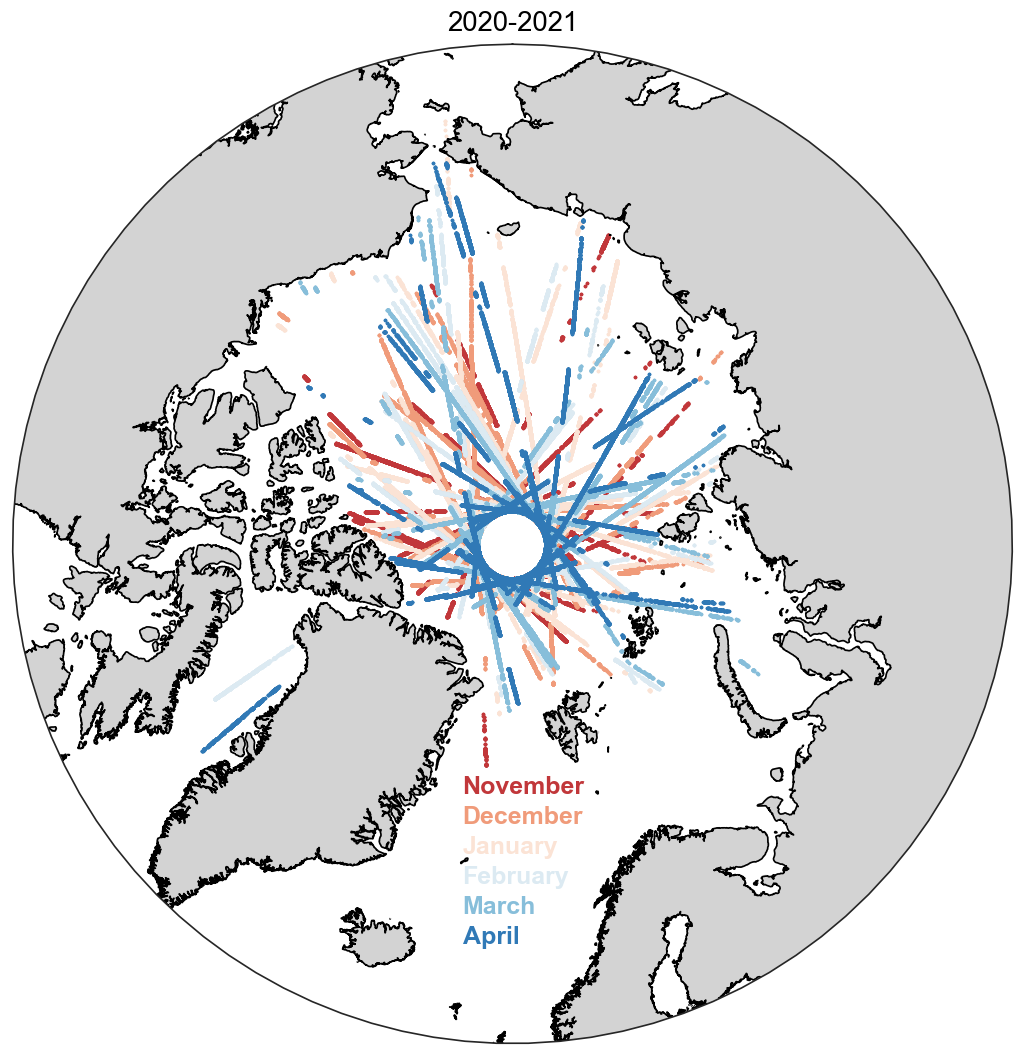

In [628]:
season_folder = '2020-2021'
directory = r'D:\DTU\CRYO2ICE\Data\CRYO2ICE_original_MSS\BaselineE'
files_C2I =  glob.glob(directory + '/{}/'.format(season_folder)+'*')

files_nov, files_dec, files_jan, files_feb, files_mar, files_apr = [], [], [], [], [], []

if season_folder == '2020-2021':
    ID_split = 10
elif season_folder == '2021-2022':
    ID_split = 8
    
for i_fn in files_C2I:
    basename_without_ext = os.path.splitext(os.path.basename(i_fn))[0]
    date = basename_without_ext.split('_')[ID_split][4:6]
    if date == '11':
        files_nov.append(i_fn)
    elif date == '12': 
        files_dec.append(i_fn)
    elif date == '01':
        files_jan.append(i_fn)
    elif date == '02':
        files_feb.append(i_fn)
    elif date == '03':
        files_mar.append(i_fn)
    elif date == '04':
        files_apr.append(i_fn)

# E:/DTU/CRYO2ICE/Data/CRYO2ICE_original_MSS/*_v2_LARM_AMSR2_SMLG_ERA5_final_v2_W99.csv
CRYO2ICE_nov = load_CRYO2ICE_month(files_nov)
CRYO2ICE_dec = load_CRYO2ICE_month(files_dec)
CRYO2ICE_jan = load_CRYO2ICE_month(files_jan)
CRYO2ICE_feb = load_CRYO2ICE_month(files_feb)
CRYO2ICE_mar = load_CRYO2ICE_month(files_mar)
CRYO2ICE_apr = load_CRYO2ICE_month(files_apr)


CRYO2ICE_nov['month']='November'
CRYO2ICE_dec['month']='December'
CRYO2ICE_jan['month']='January'
CRYO2ICE_feb['month']='February'
CRYO2ICE_mar['month']='March'
CRYO2ICE_apr['month']='April'

frames = [CRYO2ICE_nov, CRYO2ICE_dec, CRYO2ICE_jan, CRYO2ICE_feb, CRYO2ICE_mar, CRYO2ICE_apr]

CRYO2ICE_comb_all = pd.concat(frames)
CRYO2ICE_comb_all['AMSR2_snow_depth_unit_m']=CRYO2ICE_comb_all['AMSR2_snow_depth']/100

#from matplotlib.lines import Line2D
#fig, ax = plt.subplots(figsize=(5,5), constrained_layout=True)
#title = ''

resol='10m'
fig,ax = pplt.subplots(refwidth=5, ncols=1, nrows=1, sharex=False, proj='nplaea')
fig.patch.set_facecolor('white')

#cmap_qual = plt.get_cmap('colorblind10') 
cmap_qual3 =  plt.cm.get_cmap('RdBu', 8)
im = ax.scatter(np.array(CRYO2ICE_nov['lon']), np.array(CRYO2ICE_nov['lat']), c=cmap_qual3(1), s=0.5)
im = ax.scatter(np.array(CRYO2ICE_dec['lon']), np.array(CRYO2ICE_dec['lat']), c=cmap_qual3(2), s=0.5)
im = ax.scatter(np.array(CRYO2ICE_jan['lon']), np.array(CRYO2ICE_jan['lat']), c=cmap_qual3(3), s=0.5)
im = ax.scatter(np.array(CRYO2ICE_feb['lon']), np.array(CRYO2ICE_feb['lat']), c=cmap_qual3(4), s=0.5)
im = ax.scatter(np.array(CRYO2ICE_mar['lon']), np.array(CRYO2ICE_mar['lat']), c=cmap_qual3(5), s=0.5)
im = ax.scatter(np.array(CRYO2ICE_apr['lon']), np.array(CRYO2ICE_apr['lat']), c=cmap_qual3(6), s=0.5)

ax.add_feature(cfeature.LAND, facecolor='lightgrey')
ax.coastlines(resolution=resol, color='k')
ax.format(boundinglat=60)

ax.text(0.45, 0.25, 'November', color=cmap_qual3(1), transform= ax.transAxes,weight="bold")
ax.text(0.45, 0.22, 'December', color=cmap_qual3(2), transform= ax.transAxes,weight="bold")
ax.text(0.45, 0.19, 'January', color=cmap_qual3(3), transform= ax.transAxes,weight="bold")
ax.text(0.45, 0.16, 'February', color=cmap_qual3(4), transform= ax.transAxes,weight="bold")
ax.text(0.45, 0.13, 'March', color=cmap_qual3(5), transform= ax.transAxes,weight="bold")
ax.text(0.45, 0.10, 'April', color=cmap_qual3(6), transform= ax.transAxes,weight="bold")

#plt.savefig('E:\demo_CRYO2ICE_coverage_months_combined.png', transparent=True)

### contour lines

cmap_qual2 =  plt.cm.get_cmap('greys', 7)  
#cmap_qual2 = [rgb2hex(cmap(1/7)), rgb2hex(cmap(2/7)), rgb2hex(cmap(3/7)), rgb2hex(cmap(4/7)), 
#              rgb2hex(cmap(5/7)), rgb2hex(cmap(6/7)), rgb2hex(cmap(7/7))]


#fname = 'D:/DTU/CRYO2ICE/AMSR2/AMSR_U2_L3_SeaIce12km_B04_20201115.he5'
#file = h5py.File(fname, 'r')
#file.keys()
#lon = np.array(file['HDFEOS/GRIDS/NpPolarGrid12km/lon'])
#lat = np.array(file['HDFEOS/GRIDS/NpPolarGrid12km/lat'])
#snow_depth = np.array(file['HDFEOS/GRIDS/NpPolarGrid12km/Data Fields/SI_12km_NH_SNOWDEPTH_5DAY'])
#ax.contour(lon, lat, snow_depth, levels=[130], colors='k', linewidths=0.5, zorder=4)

'''
fname = 'D:/DTU/CRYO2ICE/AMSR2/AMSR_U2_L3_SeaIce12km_B04_20201215.he5'
file = h5py.File(fname, 'r')
file.keys()
snow_depth = np.array(file['HDFEOS/GRIDS/NpPolarGrid12km/Data Fields/SI_12km_NH_SNOWDEPTH_5DAY'])
ax.contour(lon, lat, snow_depth,levels=[130], colors=rgb2hex(cmap_qual2(2)), linewidths=0.5, zorder=4)
fname = 'D:/DTU/CRYO2ICE/AMSR2/AMSR_U2_L3_SeaIce12km_B04_20210116.he5'
file = h5py.File(fname, 'r')
file.keys()
snow_depth = np.array(file['HDFEOS/GRIDS/NpPolarGrid12km/Data Fields/SI_12km_NH_SNOWDEPTH_5DAY'])
snow_depth[snow_depth!=130] = np.nan
ax.contour(lon, lat, snow_depth,levels=[130], colors=rgb2hex(cmap_qual2(3)), linewidths=0.5, zorder=4)

fname = 'D:/DTU/CRYO2ICE/AMSR2/AMSR_U2_L3_SeaIce12km_B04_20210215.he5'
file = h5py.File(fname, 'r')
file.keys()
snow_depth = np.array(file['HDFEOS/GRIDS/NpPolarGrid12km/Data Fields/SI_12km_NH_SNOWDEPTH_5DAY'])
ax.contour(lon, lat, snow_depth,levels=[130], colors=rgb2hex(cmap_qual2(4)), linewidths=0.5, zorder=4)

fname = 'D:/DTU/CRYO2ICE/AMSR2/AMSR_U2_L3_SeaIce12km_B04_20210315.he5'
file = h5py.File(fname, 'r')
file.keys()
snow_depth = np.array(file['HDFEOS/GRIDS/NpPolarGrid12km/Data Fields/SI_12km_NH_SNOWDEPTH_5DAY'])
ax.contour(lon, lat, snow_depth,levels=[130], colors=rgb2hex(cmap_qual2(5)), linewidths=0.5, zorder=4)

fname = 'D:/DTU/CRYO2ICE/AMSR2/AMSR_U2_L3_SeaIce12km_B04_20210415.he5'
file = h5py.File(fname, 'r')
file.keys()
snow_depth = np.array(file['HDFEOS/GRIDS/NpPolarGrid12km/Data Fields/SI_12km_NH_SNOWDEPTH_5DAY'])
ax.contour(lon, lat, snow_depth,levels=[130], colors=rgb2hex(cmap_qual2(6)), linewidths=0.5, zorder=4)

'''
ax.format(title=season_folder)
plt.savefig('D:\DTU\CRYO2ICE\coverage_{}.png'.format(season_folder), dpi=300, transparent=True)


In [217]:
import glob
directory = r'D:\DTU\CRYO2ICE\Data\CRYO2ICE_original_MSS\BaselineE'
files_check_CS2_2020_2021 =  glob.glob(directory + '/2020-2021/'+'*')
df_2020_2021 = load_CRYO2ICE_month(files_check_CS2_2020_2021)

files_check_CS2_2021_2022 =  glob.glob(directory + '/2021-2022/'+'*')
df_2021_2022 = load_CRYO2ICE_month(files_check_CS2_2021_2022)

C:\Users\rmfha\Anaconda3\envs\dev_test\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


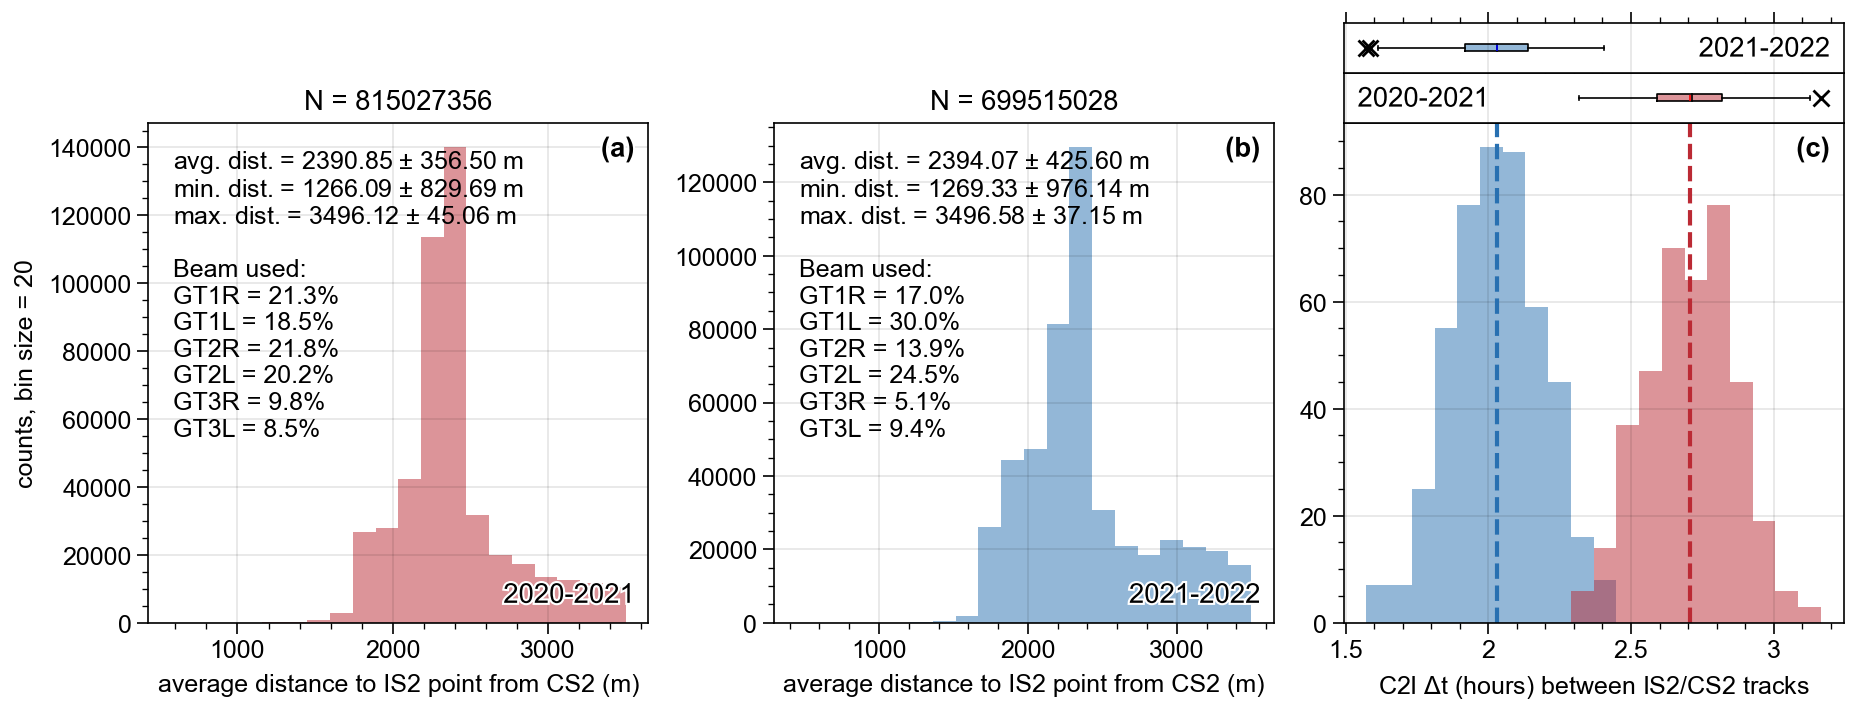

In [79]:
import proplot as pplt 
fig, ax = pplt.subplots(nrows=1, ncols=3, sharey=False, sharex=False, refwidth=2.5)

df = df_2020_2021
sum_GT1R = sum(df['GT1R_count'])
sum_GT1L = sum(df['GT1L_count'])
sum_GT2R = sum(df['GT2R_count'])
sum_GT2L = sum(df['GT2L_count'])
sum_GT3R = sum(df['GT3R_count'])
sum_GT3L = sum(df['GT3L_count'])
sum_total = sum_GT1R + sum_GT2L + sum_GT3L + sum_GT1L + sum_GT2R + sum_GT3R

text_avg = 'avg. dist. = {:.2f} $\pm$ {:.2f} m'.format(np.nanmean(df['IS2_dist_avg']), np.nanstd(df['IS2_dist_avg']))
text_min = 'min. dist. = {:.2f} $\pm$ {:.2f} m'.format(np.nanmean(df['IS2_dist_min']), np.nanstd(df['IS2_dist_min']))
text_max = 'max. dist. = {:.2f} $\pm$ {:.2f} m'.format(np.nanmean(df['IS2_dist_max']), np.nanstd(df['IS2_dist_max']))

text_GT1R = 'GT1R = {:.1%}'.format(sum_GT1R/sum_total)
text_GT1L = 'GT1L = {:.1%}'.format(sum_GT1L/sum_total)
text_GT2R = 'GT2R = {:.1%}'.format(sum_GT2R/sum_total)
text_GT2L = 'GT2L = {:.1%}'.format(sum_GT2L/sum_total)
text_GT3R = 'GT3R = {:.1%}'.format(sum_GT3R/sum_total)
text_GT3L = 'GT3L = {:.1%}'.format(sum_GT3L/sum_total)

text_all = text_avg+'\n'+text_min+'\n'+text_max+'\n\nBeam used:\n'+text_GT1R+'\n'+text_GT1L+'\n'+text_GT2R+'\n'+text_GT2L+'\n'+text_GT3R+'\n'+text_GT3L
ax[0].hist(df['IS2_dist_avg'], c=cmap_qual(1), alpha=0.5, bins=20)
ax[0].format(xlabel='average distance to IS2 point from CS2 (m)', title='N = '+str(int(sum_total)), lrtitle='2020-2021', ylabel='counts, bin size = 20')
ax[0].text(0.05, 0.95, text_all, transform=ax[0].transAxes,ha='left', va='top')

df = df_2021_2022
sum_GT1R = sum(df['GT1R_count'])
sum_GT1L = sum(df['GT1L_count'])
sum_GT2R = sum(df['GT2R_count'])
sum_GT2L = sum(df['GT2L_count'])
sum_GT3R = sum(df['GT3R_count'])
sum_GT3L = sum(df['GT3L_count'])
sum_total = sum_GT1R + sum_GT2L + sum_GT3L + sum_GT1L + sum_GT2R + sum_GT3R

text_avg = 'avg. dist. = {:.2f} $\pm$ {:.2f} m'.format(np.nanmean(df['IS2_dist_avg']), np.nanstd(df['IS2_dist_avg']))
text_min = 'min. dist. = {:.2f} $\pm$ {:.2f} m'.format(np.nanmean(df['IS2_dist_min']), np.nanstd(df['IS2_dist_min']))
text_max = 'max. dist. = {:.2f} $\pm$ {:.2f} m'.format(np.nanmean(df['IS2_dist_max']), np.nanstd(df['IS2_dist_max']))

text_GT1R = 'GT1R = {:.1%}'.format(sum_GT1R/sum_total)
text_GT1L = 'GT1L = {:.1%}'.format(sum_GT1L/sum_total)
text_GT2R = 'GT2R = {:.1%}'.format(sum_GT2R/sum_total)
text_GT2L = 'GT2L = {:.1%}'.format(sum_GT2L/sum_total)
text_GT3R = 'GT3R = {:.1%}'.format(sum_GT3R/sum_total)
text_GT3L = 'GT3L = {:.1%}'.format(sum_GT3L/sum_total)

text_all = text_avg+'\n'+text_min+'\n'+text_max+'\n\nBeam used:\n'+text_GT1R+'\n'+text_GT1L+'\n'+text_GT2R+'\n'+text_GT2L+'\n'+text_GT3R+'\n'+text_GT3L
ax[1].hist(df['IS2_dist_avg'], c=cmap_qual(6), alpha=0.5, bins=20)
ax[1].format(xlabel='average distance to IS2 point from CS2 (m)', title='N = '+str(int(sum_total)), lrtitle='2021-2022')
ax[1].text(0.05, 0.95, text_all, transform=ax[1].transAxes,ha='left', va='top')

fig.format(abc='(a)', abcloc='ur')


cryo2ice_2020_2021 = pd.read_csv('D:\DTU\CRYO2ICE\cryo2ice_tracks_v2.csv')
cryo2ice_2021_2022 = pd.read_csv('D:\DTU\CRYO2ICE\cryo2ice_tracks_2021_2022.csv')

ax[2].hist([cryo2ice_2020_2021['time_delta'], cryo2ice_2021_2022['time_delta']], c=[cmap_qual(1), cmap_qual(6)],alpha=0.5, histtype='stepfilled', bins=20, label=['2020-2021', '2021-2022'])
ax[2].axvline(np.nanmean(cryo2ice_2020_2021['time_delta']), c=cmap_qual(1), linestyle='--')
ax[2].axvline(np.nanmean(cryo2ice_2021_2022['time_delta']),c=cmap_qual(6), linestyle='--')
ax[2].format(xlabel='C2I $\Delta$t (hours) between IS2/CS2 tracks', ylabel='')
#ax[0].legend(loc='b')

pxs = ax[2].panel('t', width='2em', space='0')
pxs.boxh(cryo2ice_2020_2021['time_delta'],means=True, marker='x', meancolor='r', fillcolor=cmap_qual(1), alpha=0.5)
pxs.format(ylocator='null', ultitle='2020-2021')

pxs = ax[2].panel('t', width='2em', space='0')
pxs.boxh(cryo2ice_2021_2022['time_delta'],means=True, marker='x', meancolor='b', fillcolor=cmap_qual(6), alpha=0.5)
pxs.format(ylocator='null', urtitle='2021-2022')

plt.savefig(r'D:\DTU\CRYO2ICE\time_diff_CRYO2ICE_tracks.png',dpi=300)

In [22]:
cryo2ice_2020_2021 = pd.read_csv('D:\DTU\CRYO2ICE\cryo2ice_tracks_v2.csv')
cryo2ice_2021_2022 = pd.read_csv('D:\DTU\CRYO2ICE\cryo2ice_tracks_2021_2022.csv')


In [24]:
cryo2ice_comb = pd.concat([cryo2ice_2020_2021, cryo2ice_2021_2022])
print(np.min(cryo2ice_comb['time_delta']))
print(np.max(cryo2ice_comb['time_delta']))
print(np.mean(cryo2ice_comb['time_delta']))

print(np.mean(cryo2ice_2020_2021['time_delta']))
print(np.mean(cryo2ice_2021_2022['time_delta']))

1.5726920966666669
3.1654722844444443
2.3345895377476262
2.707017180926164
2.0308697197257164


In [19]:
# Computation on impact of negative snow depth (bias estimation)

df_negative_snow = CRYO2ICE_comb_all[CRYO2ICE_comb_all['snow_depth_original_MSS']<0]
df_no_negative_snow = CRYO2ICE_comb_all[CRYO2ICE_comb_all['snow_depth_original_MSS']>0]
df_negative_snow['snow_depth_original_MSS']
print(str(round((len(df_negative_snow)/len(CRYO2ICE_comb_all))*100,2))+"%")

2.22%


In [244]:
print(np.nanmean(df_no_negative_snow['snow_depth_original_MSS'])*100)
print(np.nanmean(CRYO2ICE_comb_all['snow_depth_original_MSS'])*100)
print((np.nanmean(df_no_negative_snow['snow_depth_original_MSS'])-np.nanmean(CRYO2ICE_comb_all['snow_depth_original_MSS']))*100)

df_CA = df_no_negative_snow[(df_no_negative_snow['lon']<-30) & (df_no_negative_snow['lon']>-150)]
df_PA = df_no_negative_snow[~((df_no_negative_snow['lon']<90) & (df_no_negative_snow['lon']>-150))]
df_AT = df_no_negative_snow[(df_no_negative_snow['lon']<90) & (df_no_negative_snow['lon']>-30)]

df_CA_v2 = CRYO2ICE_comb_all[(CRYO2ICE_comb_all['lon']<-30) & (CRYO2ICE_comb_all['lon']>-150)]
df_PA_v2 = CRYO2ICE_comb_all[~((CRYO2ICE_comb_all['lon']<90) & (CRYO2ICE_comb_all['lon']>-150))]
df_AT_v2 = CRYO2ICE_comb_all[(CRYO2ICE_comb_all['lon']<90) & (CRYO2ICE_comb_all['lon']>-30)]


print((len(df_CA)/len(df_no_negative_snow))*100)
print((len(df_PA)/len(df_no_negative_snow))*100)
print((len(df_AT)/len(df_no_negative_snow))*100)

print((np.nanmean(df_CA['snow_depth_original_MSS'])-np.nanmean(df_CA_v2['snow_depth_original_MSS']))*100)
print((np.nanmean(df_PA['snow_depth_original_MSS'])-np.nanmean(df_PA_v2['snow_depth_original_MSS']))*100)
print((np.nanmean(df_AT['snow_depth_original_MSS'])-np.nanmean(df_AT_v2['snow_depth_original_MSS']))*100)

19.58129187948433
19.073512286627604
0.5077795928567275
33.277914194120456
34.561080417434006
32.16100538844554
0.2749580540060831
0.6197235823096225
0.5726998642678838


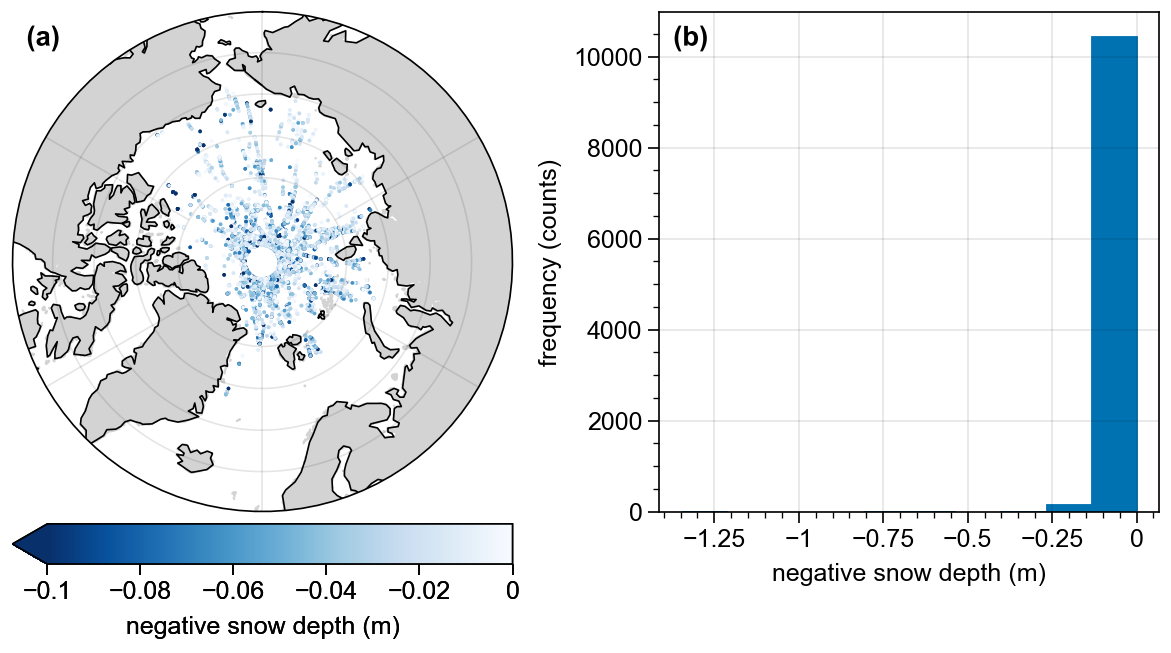

In [249]:
import proplot as pplt
import matplotlib.pyplot as plt
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
resol='110m'
fig,ax = pplt.subplots(refwidth=2.5, ncols=2, nrows=1, sharex=False, proj={1:'nplaea'})
fig.patch.set_facecolor('white')

axs = ax[0]
cmap_qual3 =  plt.cm.get_cmap('blues_r', 8)  
im = axs.scatter(np.array(df_negative_snow['lon']), np.array(df_negative_snow['lat']), c=np.array(df_negative_snow['snow_depth_original_MSS']), cmap=cmap_qual3, s=0.5, vmin=-0.1, vmax=0, extend='min')
cb = axs.colorbar(im, label='negative snow depth (m)', loc='b')
axs.add_feature(cfeature.LAND, facecolor='lightgrey')
axs.coastlines(resolution=resol, color='k')
axs.format(boundinglat=60)

ax[1].hist(df_negative_snow['snow_depth_original_MSS'])
ax[1].set_xlabel('negative snow depth (m)')
ax[1].set_ylabel('frequency (counts)')
fig.format(abc='(a)', abcloc='ul')

# ASSIST - make data comparable

In [ ]:
path_ASSIST = r'E:\DTU\CRYO2ICE\ASSIST'
filename_ASSIST = 'observations-108.csv'
df_ASSIST_v1 = pd.read_csv(path_ASSIST+ '/'+filename_ASSIST)
df_ASSIST_v1['snow_depth (m)']=np.nanmean([df_ASSIST_v1['PSH'],df_ASSIST_v1['SSH'],df_ASSIST_v1['TSH']], axis=0)/100

filename_ASSIST = 'observations-109.csv'
df_ASSIST_v2 = pd.read_csv(path_ASSIST+ '/'+filename_ASSIST)
df_ASSIST_v2['snow_depth (m)']=np.nanmean([df_ASSIST_v2['PSH'],df_ASSIST_v2['SSH'],df_ASSIST_v2['TSH']], axis=0)/100

filename_ASSIST = 'observations-110.csv'
df_ASSIST_v3 = pd.read_csv(path_ASSIST+ '/'+filename_ASSIST)
df_ASSIST_v3['snow_depth (m)']=np.nanmean([df_ASSIST_v3['PSH'],df_ASSIST_v3['SSH'],df_ASSIST_v3['TSH']], axis=0)/100

frames = [df_ASSIST_v1, df_ASSIST_v2, df_ASSIST_v3]

df_ASSIST = pd.concat(frames)
df_ASSIST = df_ASSIST.sort_values(by='Date')
df_ASSIST = df_ASSIST[['Date', 'LAT', 'LON', 'PSH', 'SSH', 'TSH']]
df_ASSIST['snow_depth (m)']=np.nanmean([df_ASSIST['PSH'],df_ASSIST['SSH'],df_ASSIST['TSH']], axis=0)/100
df_ASSIST_notna = df_ASSIST[df_ASSIST['snow_depth (m)'].notna()]

In [ ]:
def plot_panArctic8(lon, lat, sit, min_set, max_set, cmap_set, label, extend_info, ax, fig):
    #fig = plt.figure(figsize=(6,5))
    fig.patch.set_facecolor('white')
    #ax = plt.gca()
    #m = Basemap(projection='ortho',lat_0=90,lon_0=0,resolution='l', ax=ax);
    x1 = -180
    x2 = 180
    y1 = 0
    y2 = 90
    cmap1 = plt.get_cmap('greys', 4)

    m = Basemap(projection='npstere', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,boundinglat=70,lon_0=0, resolution='i',ax=ax, round=True)
    m.drawmeridians(np.arange(0,360,30),labels=[0,0,0,0],linewidth=0.5, fontsize=10, dashes=[1,5])
    m.drawparallels(np.arange(-90,90,15),linewidth=0.5, fontsize=10, dashes=[1,5],labels=[0,0,0,0])
    m.drawcoastlines(linewidth=0.5)
    m.fillcontinents(color='lightgray')
    #m.fillcontinents(color='darkgray')
    #m.drawmapboundary(fill_color='dimgray')
    #cbar = m.etopo()
    x=m.scatter(lon, lat, latlon=True, c=sit, s=10,vmin = min_set, vmax=max_set, cmap=cmap_set, zorder=1,edgecolors ='k',linewidth=0.3)
     #cbar = plt.colorbar(x, extend =extend_info, orientation="horizontal",ax=ax)
    #cbar.set_label(label)

    ax.set_title(title, y=1.08,fontsize=18)
    return x

In [ ]:
import proplot as pplt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import linregress
pplt.rc.update(grid=False)
fig, ax = pplt.subplots([[1, 2]],refwidth=3, refheight=3,share=False)

from matplotlib.lines import Line2D


cmap = plt.cm.get_cmap('Blues')
cmap_qual2 = [cmap(1/6), cmap(2/6), cmap(3/6), cmap(4/6), cmap(5/6), cmap(6/6)]

cmap_qual = ['#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00', '#CC79A7', 'darkorange']
cmap_qual = LinearSegmentedColormap.from_list('list', cmap_qual, N = len(cmap_qual))
colours = [cmap_qual(0)[0:3],cmap_qual(1)[0:3],cmap_qual(2)[0:3],cmap_qual(3)[0:3],cmap_qual(4)[0:3],cmap_qual(5)[0:3]]

cmap_qual_green = LinearSegmentedColormap.from_list('list', ['green', 'gray'], N = 2)

###
title=''
#cmap_qual = plt.get_cmap('colorblind10') 
im = plot_panArctic5(np.array(CRYO2ICE_nov['lon']), np.array(CRYO2ICE_nov['lat']), cmap_qual2[0], 0, 0.4, 'viridis', 'radar freeboard (m)','max', ax[0],fig)
im = plot_panArctic5(np.array(CRYO2ICE_dec['lon']), np.array(CRYO2ICE_dec['lat']), cmap_qual2[1], 0, 0.4, 'viridis', 'radar freeboard (m)','max', ax[0],fig)
im = plot_panArctic5(np.array(CRYO2ICE_jan['lon']), np.array(CRYO2ICE_jan['lat']), cmap_qual2[2], 0, 0.4, 'viridis', 'radar freeboard (m)','max', ax[0],fig)
im = plot_panArctic5(np.array(CRYO2ICE_feb['lon']), np.array(CRYO2ICE_feb['lat']), cmap_qual2[3], 0, 0.4, 'viridis', 'radar freeboard (m)','max', ax[0],fig)
im = plot_panArctic5(np.array(CRYO2ICE_mar['lon']), np.array(CRYO2ICE_mar['lat']), cmap_qual2[4], 0, 0.4, 'viridis', 'radar freeboard (m)','max', ax[0],fig)
im = plot_panArctic5(np.array(CRYO2ICE_apr['lon']), np.array(CRYO2ICE_apr['lat']), cmap_qual2[5], 0, 0.4, 'viridis', 'radar freeboard (m)','max', ax[0],fig)

im = plot_panArctic8(np.array(df_ASSIST_v1['LON']), np.array(df_ASSIST_v1['LAT']), cmap_qual(0), 0, 0.4, 'viridis', 'radar freeboard (m)','max', ax[0],fig)
im = plot_panArctic8(np.array(df_ASSIST_v2['LON']), np.array(df_ASSIST_v2['LAT']), cmap_qual(6), 0, 0.4, 'viridis', 'radar freeboard (m)','max', ax[0],fig)
im = plot_panArctic8(np.array(df_ASSIST_v3['LON']), np.array(df_ASSIST_v3['LAT']), cmap_qual(2), 0, 0.4, 'viridis', 'radar freeboard (m)','max', ax[0],fig)



ax[0].text(0.65, 0.28, r'CRYO2ICE', color='k', transform= ax[0].transAxes,weight="bold")
ax[0].text(0.65, 0.25, 'November', color=cmap_qual2[0], transform= ax[0].transAxes,weight="bold")
ax[0].text(0.65, 0.22, 'December', color=cmap_qual2[1], transform= ax[0].transAxes,weight="bold")
ax[0].text(0.65, 0.19, 'January', color=cmap_qual2[2], transform= ax[0].transAxes,weight="bold")
ax[0].text(0.65, 0.16, 'February', color=cmap_qual2[3], transform= ax[0].transAxes,weight="bold")
ax[0].text(0.65, 0.13, 'March', color=cmap_qual2[4], transform= ax[0].transAxes,weight="bold")
ax[0].text(0.65, 0.10, 'April', color=cmap_qual2[5], transform= ax[0].transAxes,weight="bold")

ax[0].text(0.50, 0.12, 'ASSIST#1', color=cmap_qual(0), transform= ax[0].transAxes,weight="bold")
ax[0].text(0.50, 0.09, 'ASSIST#2', color=cmap_qual(6), transform= ax[0].transAxes,weight="bold")
ax[0].text(0.50, 0.06, 'ASSIST#3', color=cmap_qual(2), transform= ax[0].transAxes,weight="bold")



im = plot_panArctic5(np.array(CRYO2ICE_nov['lon']), np.array(CRYO2ICE_nov['lat']), cmap_qual2[0], 0, 0.4, 'viridis', 'radar freeboard (m)','max', ax[1],fig)
im = plot_panArctic5(np.array(CRYO2ICE_dec['lon']), np.array(CRYO2ICE_dec['lat']), cmap_qual2[1], 0, 0.4, 'viridis', 'radar freeboard (m)','max', ax[1],fig)
im = plot_panArctic5(np.array(CRYO2ICE_jan['lon']), np.array(CRYO2ICE_jan['lat']), cmap_qual2[2], 0, 0.4, 'viridis', 'radar freeboard (m)','max', ax[1],fig)
im = plot_panArctic5(np.array(CRYO2ICE_feb['lon']), np.array(CRYO2ICE_feb['lat']), cmap_qual2[3], 0, 0.4, 'viridis', 'radar freeboard (m)','max', ax[1],fig)
im = plot_panArctic5(np.array(CRYO2ICE_mar['lon']), np.array(CRYO2ICE_mar['lat']), cmap_qual2[4], 0, 0.4, 'viridis', 'radar freeboard (m)','max', ax[1],fig)
im = plot_panArctic5(np.array(CRYO2ICE_apr['lon']), np.array(CRYO2ICE_apr['lat']), cmap_qual2[5], 0, 0.4, 'viridis', 'radar freeboard (m)','max', ax[1],fig)

im = plot_panArctic8(np.array(df_ASSIST_v1[df_ASSIST_v1['snow_depth (m)'].notna()]['LON']), np.array(df_ASSIST_v1[df_ASSIST_v1['snow_depth (m)'].notna()]['LAT']), cmap_qual(0), 0, 0.4, 'viridis', 'radar freeboard (m)','max', ax[1],fig)
im = plot_panArctic8(np.array(df_ASSIST_v2[df_ASSIST_v2['snow_depth (m)'].notna()]['LON']), np.array(df_ASSIST_v2[df_ASSIST_v2['snow_depth (m)'].notna()]['LAT']), cmap_qual(6), 0, 0.4, 'viridis', 'radar freeboard (m)','max', ax[1],fig)
im = plot_panArctic8(np.array(df_ASSIST_v3[df_ASSIST_v3['snow_depth (m)'].notna()]['LON']), np.array(df_ASSIST_v3[df_ASSIST_v3['snow_depth (m)'].notna()]['LAT']), cmap_qual(2), 0, 0.4, 'viridis', 'radar freeboard (m)','max', ax[1],fig)




ax.format(
    abc='(a)', abcloc='ul')
plt.savefig('E:\demo_CRYO2ICE_coverage_months_combined_ASSIST_coverage.png', transparent=True)

# AWI - compute daily comparable data

In [ ]:
path_AWI = r'E:\DTU\CRYO2ICE\AWI_buoy'
#'''
folder_AWI = '2020S108'
filename_AWI = '2020S108_300234066081170_proc.csv'
init_sd_1, init_sd_2,init_sd_3,init_sd_4 = 0,0,0,0 # metres
#'''
'''
folder_AWI = '2020S107'
filename_AWI = '2020S107_300234066081140_proc.csv'
init_sd_1, init_sd_2,init_sd_3,init_sd_4 = np.nan, np.nan, np.nan, np.nan # metres
'''
'''
folder_AWI = '2020S106'
filename_AWI = '2020S106_300234066083120_proc.csv'
init_sd_1, init_sd_2,init_sd_3,init_sd_4 = 0,0,0,0 # metres
'''
'''
folder_AWI = '2020S105'
filename_AWI = '2020S105_300234066080130_proc.csv'
init_sd_1, init_sd_2,init_sd_3,init_sd_4 = 0.03,np.nan,0.02,0.04 # metres
'''
'''
folder_AWI = '2020S98'
filename_AWI = '2020S98_300234066087160_proc.csv'
init_sd_1, init_sd_2,init_sd_3,init_sd_4 = 0, 0, 0, 0 # metres
'''
df_AWI_buoy = pd.read_csv(path_AWI+'/' + folder_AWI + '/'+filename_AWI)
df_AWI_buoy["datetime"] = pd.to_datetime(df_AWI_buoy["time"])
if init_sd_1 == np.nan:
    df_AWI_buoy['distance_to_initial_snow_ice_interface_1 (m)']=np.nan
else:
    df_AWI_buoy['distance_to_initial_snow_ice_interface_1 (m)']= init_sd_1+df_AWI_buoy['distance_to_initial_snow_ice_interface_1 (m)']

if init_sd_2 == np.nan:
    df_AWI_buoy['distance_to_initial_snow_ice_interface_2 (m)']= np.nan
else:
    df_AWI_buoy['distance_to_initial_snow_ice_interface_2 (m)']=init_sd_2+df_AWI_buoy['distance_to_initial_snow_ice_interface_2 (m)']

if init_sd_3 == np.nan:
    df_AWI_buoy['distance_to_initial_snow_ice_interface_3 (m)']= np.nan
else:
    df_AWI_buoy['distance_to_initial_snow_ice_interface_3 (m)']=init_sd_3+df_AWI_buoy['distance_to_initial_snow_ice_interface_3 (m)']

if init_sd_3 == np.nan:
    df_AWI_buoy['distance_to_initial_snow_ice_interface_4 (m)']=np.nan
else:
    df_AWI_buoy['distance_to_initial_snow_ice_interface_4 (m)']=init_sd_4+df_AWI_buoy['distance_to_initial_snow_ice_interface_4 (m)']

df_daily = df_AWI_buoy.groupby(by=pd.Grouper(freq='D', key='datetime')).agg(np.nanmean)
snow_depth = np.array([df_daily['distance_to_initial_snow_ice_interface_1 (m)'],df_daily['distance_to_initial_snow_ice_interface_2 (m)'],df_daily['distance_to_initial_snow_ice_interface_3 (m)'],df_daily['distance_to_initial_snow_ice_interface_4 (m)']])
df_daily['daily_snow_depth (m)'] = np.nanmean(snow_depth, axis=0)
df_daily['daily_snow_depth (m)']=df_daily['daily_snow_depth (m)'].rolling(5).mean()
df_daily[df_daily['daily_snow_depth (m)']<0] = np.nan

df_daily.to_csv(path_AWI+'/' + folder_AWI +'_daily.csv')


# SIMBA buoy : compute daily comparable data

In [ ]:
# Define filepath
path_SIMBA = r'E:\DTU\CRYO2ICE\SIMBA_buoy'

filename_SIMBA = 'Snow_depth_MOSAiC_2020-2021.xlsx'

df_PRIC0906_original = pd.read_excel(path_SIMBA+'/'+filename_SIMBA, sheet_name='PRIC0906')
df_FMI0607_original = pd.read_excel(path_SIMBA+'/'+filename_SIMBA, sheet_name='FMI0607')

# Preview
df_PRIC0906 = df_PRIC0906_original[['GPSDateTime', 'GPSLat', 'GPSLng']]
df_PRIC0906["datetime"] = pd.to_datetime(df_PRIC0906["GPSDateTime"])
df_daily_PRIC0906_GPS = df_PRIC0906.groupby(by=pd.Grouper(freq='D', key='datetime')).agg(np.nanmean)
df_daily_PRIC0906_GPS['datetime']=df_daily_PRIC0906_GPS.index
df_daily_PRIC0906_GPS.index.names = ['index']

df_PRIC0906 = df_PRIC0906_original[['snow depth/cm', 'ProcessingDateTime']]
df_PRIC0906["datetime"] = pd.to_datetime(df_PRIC0906["ProcessingDateTime"],format="%Y/%m/%d").dt.normalize()
df_daily_PRIC0906 = df_PRIC0906.groupby(by=pd.Grouper(freq='D', key='datetime')).agg(np.nanmean)
df_daily_PRIC0906['datetime']=df_daily_PRIC0906.index
df_daily_PRIC0906.index.names = ['index']
df_daily_PRIC0906=pd.merge(df_daily_PRIC0906,df_daily_PRIC0906_GPS,on=["datetime"], how="left")

df_daily_PRIC0906.to_csv(path_SIMBA+'/' + 'PRIC0906' +'_daily.csv')

df_FMI0607 = df_FMI0607_original[['GPSDateTime', 'GPSLat', 'GPSLng']]
df_FMI0607["datetime"] = pd.to_datetime(df_FMI0607["GPSDateTime"])
df_daily_FMI0607 = df_FMI0607.groupby(by=pd.Grouper(freq='D', key='datetime')).agg(np.nanmean)
#df_daily_FMI0607[df_daily_FMI0607['snow depth/cm']<0] = np.nan

df_FMI0607  = df_FMI0607_original[['snow depth/cm', 'SendTime']]
df_FMI0607["datetime"] = pd.to_datetime(df_FMI0607["SendTime"],format="%Y/%m/%d").dt.normalize()
df_FMI0607 = df_FMI0607.dropna()
df_daily_FMI0607['datetime']=df_daily_FMI0607.index
df_daily_FMI0607.index.names = ['index']
df_daily_FMI0607=pd.merge(df_FMI0607, df_daily_FMI0607, on=["datetime"], how="left")

df_daily_FMI0607.to_csv(path_SIMBA+'/' + 'FMI0607' +'_daily.csv')

df_comb = pd.merge(df_daily_PRIC0906, df_daily_FMI0607, on=['datetime'], how='left')
df_comb['GPSLat']=(df_comb['GPSLat_x']+df_comb['GPSLat_y'])/2
df_comb['GPSLng']=(df_comb['GPSLng_x']+df_comb['GPSLng_y'])/2
df_comb['snow depth/cm']=(df_comb['snow depth/cm_x']+df_comb['snow depth/cm_y'])/2
df_comb = df_comb.dropna()
df_comb.to_csv(path_SIMBA+'/'+'COMB_daily.csv')

# AWI - make data comparable

In [35]:
drive = 'D'
path_AWI = r'{}:\DTU\CRYO2ICE\AWI_buoy'.format(drive)
filename_AWI = '2020S108_daily.csv'
df_AWI_buoy_4 = pd.read_csv(path_AWI+'/'+filename_AWI)
df_AWI_buoy_4['ID']='2020S108'

filename_AWI = '2020S107_daily.csv'
df_AWI_buoy_3 = pd.read_csv(path_AWI+'/'+filename_AWI)
df_AWI_buoy_3['ID']='2020S107'

filename_AWI = '2020S106_daily.csv'
df_AWI_buoy_2 = pd.read_csv(path_AWI+'/'+filename_AWI)
df_AWI_buoy_2['ID']='2020S106'

filename_AWI = '2020S105_daily.csv'
df_AWI_buoy_1 = pd.read_csv(path_AWI+'/'+filename_AWI)
df_AWI_buoy_1['ID']='2020S105'

filename_AWI = '2020S98_daily.csv'
df_AWI_buoy_5 = pd.read_csv(path_AWI+'/'+filename_AWI)
df_AWI_buoy_5['ID']='2020S98'

frames = [df_AWI_buoy_4, df_AWI_buoy_3, df_AWI_buoy_2, df_AWI_buoy_1,df_AWI_buoy_5]

df_AWI_buoy_comb = pd.concat(frames)

In [37]:
import glob
season_folder = '2020-2021'
directory = r'D:\DTU\CRYO2ICE\Data\CRYO2ICE_original_MSS\BaselineE'
files_C2I =  glob.glob(directory + '/{}/'.format(season_folder)+'*')

files_nov, files_dec, files_jan, files_feb, files_mar, files_apr = [], [], [], [], [], []

if season_folder == '2020-2021':
    ID_split = 10
elif season_folder == '2021-2022':
    ID_split = 8
    
for i_fn in files_C2I:
    basename_without_ext = os.path.splitext(os.path.basename(i_fn))[0]
    date = basename_without_ext.split('_')[ID_split][4:6]
    if date == '11':
        files_nov.append(i_fn)
    elif date == '12': 
        files_dec.append(i_fn)
    elif date == '01':
        files_jan.append(i_fn)
    elif date == '02':
        files_feb.append(i_fn)
    elif date == '03':
        files_mar.append(i_fn)
    elif date == '04':
        files_apr.append(i_fn)

# E:/DTU/CRYO2ICE/Data/CRYO2ICE_original_MSS/*_v2_LARM_AMSR2_SMLG_ERA5_final_v2_W99.csv

from scipy import signal 
def load_CRYO2ICE_month(files_check_CS2_data):
    

    li = []
    k = 0
    for filename in files_check_CS2_data:
        df = pd.read_csv(filename, index_col=None, header=0)
        df['ID']=k

        li.append(df)
        k = k+1
        li.append(df)

    frame2 = pd.concat(li, axis=0, ignore_index=True)
    
    return frame2


CRYO2ICE_nov = load_CRYO2ICE_month(files_nov)
CRYO2ICE_dec = load_CRYO2ICE_month(files_dec)
CRYO2ICE_jan = load_CRYO2ICE_month(files_jan)
CRYO2ICE_feb = load_CRYO2ICE_month(files_feb)
CRYO2ICE_mar = load_CRYO2ICE_month(files_mar)
CRYO2ICE_apr = load_CRYO2ICE_month(files_apr)


CRYO2ICE_nov['month']='November'
CRYO2ICE_dec['month']='December'
CRYO2ICE_jan['month']='January'
CRYO2ICE_feb['month']='February'
CRYO2ICE_mar['month']='March'
CRYO2ICE_apr['month']='April'

frames = [CRYO2ICE_nov, CRYO2ICE_dec, CRYO2ICE_jan, CRYO2ICE_feb, CRYO2ICE_mar, CRYO2ICE_apr]

CRYO2ICE_comb_all = pd.concat(frames)
CRYO2ICE_comb_all['AMSR2_snow_depth_unit_m']=CRYO2ICE_comb_all['AMSR2_snow_depth']/100


from datetime import datetime

# prep CRYO2ICE data in datetime formart
print('Prep CRYO2ICE in datetime format...')
t_total_CRYO2ICE = []
for i in CRYO2ICE_comb_all['time']:
    t = datetime.strptime(i,"%Y-%m-%d %H:%M:%S.%f")
    t_total_CRYO2ICE = np.append(t_total_CRYO2ICE, t)
print('CRYO2ICE formatted to datetime...')

Prep CRYO2ICE in datetime format...
CRYO2ICE formatted to datetime...


In [57]:
from datetime import datetime
# INPUT PARAMTERS
ref_distance = 50 # kilometers
temporal_latency = 2 # days
version='final_BaselineE'
selected_buoy = df_AWI_buoy_5
type_comp = 'W99_smooth_'
# AUTOMATIC
ID_buoy_save = selected_buoy['ID'][0]

# prep AWI buoy in datetime format
print('Prep AWI in datetime format... for buoy ID: '+str(ID_buoy_save))
t_total_AWI = []
for i in selected_buoy['datetime']:
    t = datetime.strptime(i,"%Y-%m-%d")
    t_total_AWI = np.append(t_total_AWI, t)
print('AWI formatted to datetime...')

selected_buoy['snow_depth_CRYO2ICE']=np.nan
selected_buoy['snow_depth_CRYO2ICE_LARM']=np.nan
selected_buoy['snow_depth_CRYO2ICE_CCI']=np.nan
selected_buoy['SMLG_snow_depth']=np.nan
selected_buoy['SMLG_snow_depth_v2']=np.nan
selected_buoy['AMSR2_snow_depth_v2']=np.nan
selected_buoy['W99_snow_depth']=np.nan
              
for i in np.arange(0,len(selected_buoy)):
    print('Processing following: '+str(i) +'/'+str((len(selected_buoy)-1))+' observations...')
    # for one buoy point, compute temporal latency
    delta_t = (t_total_AWI[i]-t_total_CRYO2ICE[:])

    # identify CRYO2ICE points within +/- 2 day days
    idx_bool, vec_idx = 0, []
    for j in delta_t:
        bool_test = np.abs(j).days<temporal_latency
        if bool_test is True:
            vec_idx=np.append(vec_idx, int(idx_bool))
        idx_bool = idx_bool+1 #update idx 
    
    # retrieve the identified CRYo2ICE data 
    if len(vec_idx)<=5:
        selected_buoy['snow_depth_CRYO2ICE'][i]=np.nan
        selected_buoy['snow_depth_CRYO2ICE_LARM'][i]=np.nan
        selected_buoy['snow_depth_CRYO2ICE_CCI'][i]=np.nan
        selected_buoy['SMLG_snow_depth'][i]=np.nan
        selected_buoy['SMLG_snow_depth_v2'][i]=np.nan
        selected_buoy['AMSR2_snow_depth_v2'][i]=np.nan
        selected_buoy['W99_snow_depth'][i]=np.nan
    else:
        df_CRYO2ICE_new = CRYO2ICE_comb_all.iloc[vec_idx]
        df_CRYO2ICE_AWI_new = CRYO2ICE_AWI_snow_depth_buoy_NN(selected_buoy.iloc[[i]], df_CRYO2ICE_new, ref_distance)
        if len(df_CRYO2ICE_AWI_new)<=5:
            selected_buoy['snow_depth_CRYO2ICE'][i]=np.nan
            selected_buoy['snow_depth_CRYO2ICE_LARM'][i]=np.nan
            selected_buoy['snow_depth_CRYO2ICE_CCI'][i]=np.nan
            selected_buoy['SMLG_snow_depth'][i]=np.nan
            selected_buoy['SMLG_snow_depth_v2'][i]=np.nan
            selected_buoy['AMSR2_snow_depth_v2'][i]=np.nan
            selected_buoy['W99_snow_depth'][i]=np.nan
        else:
            df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)
            selected_buoy['snow_depth_CRYO2ICE'][i]=df_CRYO2ICE_AWI_new_comp['snow_depth_original_MSS_smoothed']
            selected_buoy['snow_depth_CRYO2ICE_LARM'][i]=df_CRYO2ICE_AWI_new_comp['snow_depth_original_MSS_LARM_smoothed']
            selected_buoy['snow_depth_CRYO2ICE_CCI'][i]=df_CRYO2ICE_AWI_new_comp['snow_depth_original_MSS_CCI_smoothed']
            selected_buoy['SMLG_snow_depth'][i]=df_CRYO2ICE_AWI_new_comp['SMLG_snow_depth']
            selected_buoy['SMLG_snow_depth_v2'][i]=df_CRYO2ICE_AWI_new_comp['SMLG_snow_depth_v2']
            selected_buoy['AMSR2_snow_depth_v2'][i]=df_CRYO2ICE_AWI_new_comp['AMSR2_snow_depth_unit_m']
            selected_buoy['W99_snow_depth'][i]=df_CRYO2ICE_AWI_new_comp['W99']
        

selected_buoy.to_csv(path_AWI+'/' +ID_buoy_save+'_daily_CRYO2ICE_coincident_'+type_comp+version+'.csv')

Prep AWI in datetime format... for buoy ID: 2020S98
AWI formatted to datetime...
Processing following: 0/287 observations...
Processing following: 1/287 observations...
Processing following: 2/287 observations...
Processing following: 3/287 observations...
Processing following: 4/287 observations...
Processing following: 5/287 observations...
Processing following: 6/287 observations...
Processing following: 7/287 observations...
Processing following: 8/287 observations...
Processing following: 9/287 observations...
Processing following: 10/287 observations...
Processing following: 11/287 observations...
Processing following: 12/287 observations...
Processing following: 13/287 observations...
Processing following: 14/287 observations...
Processing following: 15/287 observations...
Processing following: 16/287 observations...
Processing following: 17/287 observations...
Processing following: 18/287 observations...
Processing following: 19/287 observations...
Processing following: 20/287 

C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\1919545941.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 64/287 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\1919545941.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 65/287 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\1919545941.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 66/287 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\1919545941.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 67/287 observations...
Processing following: 68/287 observations...
Processing following: 69/287 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\1919545941.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 70/287 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\1919545941.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 71/287 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\1919545941.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 72/287 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\1919545941.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 73/287 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\1919545941.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 74/287 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\1919545941.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 75/287 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\1919545941.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 76/287 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\1919545941.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 77/287 observations...
Processing following: 78/287 observations...
Processing following: 79/287 observations...
Processing following: 80/287 observations...
Processing following: 81/287 observations...
Processing following: 82/287 observations...
Processing following: 83/287 observations...
Processing following: 84/287 observations...
Processing following: 85/287 observations...
Processing following: 86/287 observations...
Processing following: 87/287 observations...
Processing following: 88/287 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\1919545941.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 89/287 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\1919545941.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 90/287 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\1919545941.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 91/287 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\1919545941.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 92/287 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\1919545941.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 93/287 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\1919545941.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 94/287 observations...
Processing following: 95/287 observations...
Processing following: 96/287 observations...
Processing following: 97/287 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\1919545941.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 98/287 observations...
Processing following: 99/287 observations...
Processing following: 100/287 observations...
Processing following: 101/287 observations...
Processing following: 102/287 observations...
Processing following: 103/287 observations...
Processing following: 104/287 observations...
Processing following: 105/287 observations...
Processing following: 106/287 observations...
Processing following: 107/287 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\1919545941.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 108/287 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\1919545941.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 109/287 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\1919545941.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 110/287 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\1919545941.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 111/287 observations...
Processing following: 112/287 observations...
Processing following: 113/287 observations...
Processing following: 114/287 observations...
Processing following: 115/287 observations...
Processing following: 116/287 observations...
Processing following: 117/287 observations...
Processing following: 118/287 observations...
Processing following: 119/287 observations...
Processing following: 120/287 observations...
Processing following: 121/287 observations...
Processing following: 122/287 observations...
Processing following: 123/287 observations...
Processing following: 124/287 observations...
Processing following: 125/287 observations...
Processing following: 126/287 observations...
Processing following: 127/287 observations...
Processing following: 128/287 observations...
Processing following: 129/287 observations...
Processing following: 130/287 observations...
Processing following: 131/287 observations...
Processing following: 132/287 obse

C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\1919545941.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 142/287 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\1919545941.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 143/287 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\1919545941.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 144/287 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\1919545941.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 145/287 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\1919545941.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 146/287 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\1919545941.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 147/287 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\1919545941.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 148/287 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\1919545941.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 149/287 observations...
Processing following: 150/287 observations...
Processing following: 151/287 observations...
Processing following: 152/287 observations...
Processing following: 153/287 observations...
Processing following: 154/287 observations...
Processing following: 155/287 observations...
Processing following: 156/287 observations...
Processing following: 157/287 observations...
Processing following: 158/287 observations...
Processing following: 159/287 observations...
Processing following: 160/287 observations...
Processing following: 161/287 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\1919545941.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 162/287 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\1919545941.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 163/287 observations...
Processing following: 164/287 observations...
Processing following: 165/287 observations...
Processing following: 166/287 observations...
Processing following: 167/287 observations...
Processing following: 168/287 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\1919545941.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 169/287 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\1919545941.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 170/287 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\1919545941.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 171/287 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\1919545941.py:61: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 172/287 observations...
Processing following: 173/287 observations...
Processing following: 174/287 observations...
Processing following: 175/287 observations...
Processing following: 176/287 observations...
Processing following: 177/287 observations...
Processing following: 178/287 observations...
Processing following: 179/287 observations...
Processing following: 180/287 observations...
Processing following: 181/287 observations...
Processing following: 182/287 observations...
Processing following: 183/287 observations...
Processing following: 184/287 observations...
Processing following: 185/287 observations...
Processing following: 186/287 observations...
Processing following: 187/287 observations...
Processing following: 188/287 observations...
Processing following: 189/287 observations...
Processing following: 190/287 observations...
Processing following: 191/287 observations...
Processing following: 192/287 observations...
Processing following: 193/287 obse

# ASSIST - data comparable

In [ ]:
# INPUT PARAMTERS
ref_distance = 100 # kilometers
temporal_latency = 15 # days
version='v6'
selected_buoy = df_ASSIST_notna
# AUTOMATIC

# prep AWI buoy in datetime format
print('Prep in datetime format... for ASSIST. ')
t_total_ASSIST = []
for i in selected_buoy['Date']:
    t = datetime.strptime(i,"      %Y-%m-%d %H:%M:%S %Z")
    t_total_ASSIST = np.append(t_total_ASSIST, t)
print('ASSIST formatted to datetime...')

selected_buoy['snow_depth_CRYO2ICE']=np.nan
selected_buoy['snow_depth_CRYO2ICE_LARM']=np.nan
selected_buoy['snow_depth_CRYO2ICE_CCI']=np.nan
selected_buoy['SMLG_snow_depth']=np.nan
selected_buoy['SMLG_snow_depth_v2']=np.nan
selected_buoy['AMSR2_snow_depth_v2']=np.nan
              
for i in np.arange(0,len(selected_buoy)):
    print('Processing following: '+str(i) +'/'+str((len(selected_buoy)-1))+' observations...')
    # for one buoy point, compute temporal latency
    delta_t = (t_total_ASSIST[i]-t_total_CRYO2ICE[:])

    # identify CRYO2ICE points within +/- 2 day days
    idx_bool, vec_idx = 0, []
    for j in delta_t:
        bool_test = np.abs(j).days<temporal_latency
        if bool_test is True:
            vec_idx=np.append(vec_idx, int(idx_bool))
        idx_bool = idx_bool+1 #update idx 
    
    # retrieve the identified CRYo2ICE data 
    if len(vec_idx)<=5:
        selected_buoy['snow_depth_CRYO2ICE'][i]=np.nan
        selected_buoy['snow_depth_CRYO2ICE_LARM'][i]=np.nan
        selected_buoy['snow_depth_CRYO2ICE_CCI'][i]=np.nan
        selected_buoy['SMLG_snow_depth'][i]=np.nan
        selected_buoy['SMLG_snow_depth_v2'][i]=np.nan
        selected_buoy['AMSR2_snow_depth_v2'][i]=np.nan
    else:
        df_CRYO2ICE_new = CRYO2ICE_comb_all.iloc[vec_idx]
        df_CRYO2ICE_AWI_new = CRYO2ICE_ASSIST_NN(selected_buoy.iloc[[i]], df_CRYO2ICE_new, ref_distance)
        if len(df_CRYO2ICE_AWI_new)<=5:
            selected_buoy['snow_depth_CRYO2ICE'][i]=np.nan
            selected_buoy['snow_depth_CRYO2ICE_LARM'][i]=np.nan
            selected_buoy['snow_depth_CRYO2ICE_CCI'][i]=np.nan
            selected_buoy['SMLG_snow_depth'][i]=np.nan
            selected_buoy['SMLG_snow_depth_v2'][i]=np.nan
            selected_buoy['AMSR2_snow_depth_v2'][i]=np.nan
        else:
            df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)
            selected_buoy['snow_depth_CRYO2ICE'][i]=df_CRYO2ICE_AWI_new_comp['lowess_snow_depth_original_MSS']
            selected_buoy['snow_depth_CRYO2ICE_LARM'][i]=df_CRYO2ICE_AWI_new_comp['lowess_snow_depth_original_MSS_LARM']
            selected_buoy['snow_depth_CRYO2ICE_CCI'][i]=df_CRYO2ICE_AWI_new_comp['lowess_snow_depth_original_MSS_CCI']
            selected_buoy['SMLG_snow_depth'][i]=df_CRYO2ICE_AWI_new_comp['SMLG_snow_depth']
            selected_buoy['SMLG_snow_depth_v2'][i]=df_CRYO2ICE_AWI_new_comp['SMLG_snow_depth_v2']
            selected_buoy['AMSR2_snow_depth_v2'][i]=df_CRYO2ICE_AWI_new_comp['AMSR2_snow_depth_unit_m']
        

selected_buoy.to_csv(path_ASSIST+'/ASSIST_daily_CRYO2ICE_coincident_'+version+'.csv')

# SIMBA data comparable

In [59]:
path_SIMBA = r'{}:\DTU\CRYO2ICE\SIMBA_buoy'.format(drive)
filename_SIMBA = 'FMI0607_daily.csv'
df_FMI0607 = pd.read_csv(path_SIMBA+'/'+filename_SIMBA)
df_FMI0607['ID']='FMI0607'

filename_SIMBA = 'PRIC0906_daily.csv'
df_PRIC0906 = pd.read_csv(path_SIMBA+'/'+filename_SIMBA)
df_PRIC0906['ID']='PRIC0906'

filename_SIMBA = 'COMB_daily.csv'
df_COMB = pd.read_csv(path_SIMBA+'/'+filename_SIMBA)
df_COMB['ID']='COMBINED'


frames = [df_FMI0607, df_PRIC0906,df_COMB]

df_SIMBA_buoy_comb = pd.concat(frames)

In [62]:
from datetime import datetime
# INPUT PARAMTERS
ref_distance = 50 # kilometers
temporal_latency = 2 # days
version='final_BaselineE'
#selected_buoy = df_FMI0607
buoy_names = [df_FMI0607, df_PRIC0906, df_COMB]
for selected_buoy in buoy_names:
    #selected_buoy = df_PRIC0906
    #selected_buoy = df_COMB
    type_comp = 'W99_smooth_'
    # AUTOMATIC
    ID_buoy_save = selected_buoy['ID'][0]
    
    # prep SIMBA buoy in datetime format
    print('Prep SIMBA in datetime format... for buoy ID: '+str(ID_buoy_save))
    t_total_AWI = []
    for i in selected_buoy['datetime']:
        if ID_buoy_save == 'PRIC0906':
            t = datetime.strptime(i,"%Y-%m-%d") # use when df_PRIC0906 only 
        else:
            t = datetime.strptime(i,"%Y-%m-%d %H:%M:%S.%f")
        t_total_AWI = np.append(t_total_AWI, t) 
    print('SIMBA formatted to datetime...')
    
    selected_buoy['snow_depth_CRYO2ICE']=np.nan
    selected_buoy['snow_depth_CRYO2ICE_LARM']=np.nan
    selected_buoy['snow_depth_CRYO2ICE_CCI']=np.nan
    selected_buoy['SMLG_snow_depth']=np.nan
    selected_buoy['SMLG_snow_depth_v2']=np.nan
    selected_buoy['AMSR2_snow_depth_v2']=np.nan
    selected_buoy['W99_snow_depth']=np.nan
                  
    for i in np.arange(0,len(selected_buoy)):
        print('Processing following: '+str(i) +'/'+str((len(selected_buoy)-1))+' observations...')
        # for one buoy point, compute temporal latency
        delta_t = (t_total_AWI[i]-t_total_CRYO2ICE[:])
    
        # identify CRYO2ICE points within +/- 2 day days
        idx_bool, vec_idx = 0, []
        for j in delta_t:
            bool_test = np.abs(j).days<temporal_latency
            if bool_test is True:
                vec_idx=np.append(vec_idx, int(idx_bool))
            idx_bool = idx_bool+1 #update idx 
        
        # retrieve the identified CRYo2ICE data 
        if len(vec_idx)<=5:
            selected_buoy['snow_depth_CRYO2ICE'][i]=np.nan
            selected_buoy['snow_depth_CRYO2ICE_LARM'][i]=np.nan
            selected_buoy['snow_depth_CRYO2ICE_CCI'][i]=np.nan
            selected_buoy['SMLG_snow_depth'][i]=np.nan
            selected_buoy['SMLG_snow_depth_v2'][i]=np.nan
            selected_buoy['AMSR2_snow_depth_v2'][i]=np.nan
            selected_buoy['W99_snow_depth'][i]= np.nan
        else:
            df_CRYO2ICE_new = CRYO2ICE_comb_all.iloc[vec_idx]
            df_CRYO2ICE_AWI_new = CRYO2ICE_SIMBA_snow_depth_buoy_NN(selected_buoy.iloc[[i]], df_CRYO2ICE_new, ref_distance)
            if len(df_CRYO2ICE_AWI_new)<=5:
                selected_buoy['snow_depth_CRYO2ICE'][i]=np.nan
                selected_buoy['snow_depth_CRYO2ICE_LARM'][i]=np.nan
                selected_buoy['snow_depth_CRYO2ICE_CCI'][i]=np.nan
                selected_buoy['SMLG_snow_depth'][i]=np.nan
                selected_buoy['SMLG_snow_depth_v2'][i]=np.nan
                selected_buoy['AMSR2_snow_depth_v2'][i]=np.nan
                selected_buoy['W99_snow_depth'][i]=  np.nan
            else:
                df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)
                selected_buoy['snow_depth_CRYO2ICE'][i]=df_CRYO2ICE_AWI_new_comp['snow_depth_original_MSS_smoothed']
                selected_buoy['snow_depth_CRYO2ICE_LARM'][i]=df_CRYO2ICE_AWI_new_comp['snow_depth_original_MSS_LARM_smoothed']
                selected_buoy['snow_depth_CRYO2ICE_CCI'][i]=df_CRYO2ICE_AWI_new_comp['snow_depth_original_MSS_CCI_smoothed']
                selected_buoy['SMLG_snow_depth'][i]=df_CRYO2ICE_AWI_new_comp['SMLG_snow_depth']
                selected_buoy['SMLG_snow_depth_v2'][i]=df_CRYO2ICE_AWI_new_comp['SMLG_snow_depth_v2']
                selected_buoy['AMSR2_snow_depth_v2'][i]=df_CRYO2ICE_AWI_new_comp['AMSR2_snow_depth_unit_m']
                selected_buoy['W99_snow_depth'][i]=df_CRYO2ICE_AWI_new_comp['W99']
            
    
    selected_buoy.to_csv(path_SIMBA+'/' +ID_buoy_save+'_daily_CRYO2ICE_coincident_'+type_comp+version+'.csv')

Prep SIMBA in datetime format... for buoy ID: PRIC0906
SIMBA formatted to datetime...
Processing following: 0/281 observations...
Processing following: 1/281 observations...
Processing following: 2/281 observations...
Processing following: 3/281 observations...
Processing following: 4/281 observations...
Processing following: 5/281 observations...
Processing following: 6/281 observations...
Processing following: 7/281 observations...
Processing following: 8/281 observations...
Processing following: 9/281 observations...
Processing following: 10/281 observations...
Processing following: 11/281 observations...
Processing following: 12/281 observations...
Processing following: 13/281 observations...
Processing following: 14/281 observations...
Processing following: 15/281 observations...
Processing following: 16/281 observations...
Processing following: 17/281 observations...
Processing following: 18/281 observations...
Processing following: 19/281 observations...
Processing following: 20

C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 62/281 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 63/281 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 64/281 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 65/281 observations...
Processing following: 66/281 observations...
Processing following: 67/281 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 68/281 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 69/281 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 70/281 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 71/281 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 72/281 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 73/281 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 74/281 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 75/281 observations...
Processing following: 76/281 observations...
Processing following: 77/281 observations...
Processing following: 78/281 observations...
Processing following: 79/281 observations...
Processing following: 80/281 observations...
Processing following: 81/281 observations...
Processing following: 82/281 observations...
Processing following: 83/281 observations...
Processing following: 84/281 observations...
Processing following: 85/281 observations...
Processing following: 86/281 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 87/281 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 88/281 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 89/281 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 90/281 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 91/281 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 92/281 observations...
Processing following: 93/281 observations...
Processing following: 94/281 observations...
Processing following: 95/281 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 96/281 observations...
Processing following: 97/281 observations...
Processing following: 98/281 observations...
Processing following: 99/281 observations...
Processing following: 100/281 observations...
Processing following: 101/281 observations...
Processing following: 102/281 observations...
Processing following: 103/281 observations...
Processing following: 104/281 observations...
Processing following: 105/281 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 106/281 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 107/281 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 108/281 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 109/281 observations...
Processing following: 110/281 observations...
Processing following: 111/281 observations...
Processing following: 112/281 observations...
Processing following: 113/281 observations...
Processing following: 114/281 observations...
Processing following: 115/281 observations...
Processing following: 116/281 observations...
Processing following: 117/281 observations...
Processing following: 118/281 observations...
Processing following: 119/281 observations...
Processing following: 120/281 observations...
Processing following: 121/281 observations...
Processing following: 122/281 observations...
Processing following: 123/281 observations...
Processing following: 124/281 observations...
Processing following: 125/281 observations...
Processing following: 126/281 observations...
Processing following: 127/281 observations...
Processing following: 128/281 observations...
Processing following: 129/281 observations...
Processing following: 130/281 obse

C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 140/281 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 141/281 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 142/281 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 143/281 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 144/281 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 145/281 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 146/281 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 147/281 observations...
Processing following: 148/281 observations...
Processing following: 149/281 observations...
Processing following: 150/281 observations...
Processing following: 151/281 observations...
Processing following: 152/281 observations...
Processing following: 153/281 observations...
Processing following: 154/281 observations...
Processing following: 155/281 observations...
Processing following: 156/281 observations...
Processing following: 157/281 observations...
Processing following: 158/281 observations...
Processing following: 159/281 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 160/281 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 161/281 observations...
Processing following: 162/281 observations...
Processing following: 163/281 observations...
Processing following: 164/281 observations...
Processing following: 165/281 observations...
Processing following: 166/281 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 167/281 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 168/281 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 169/281 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 170/281 observations...
Processing following: 171/281 observations...
Processing following: 172/281 observations...
Processing following: 173/281 observations...
Processing following: 174/281 observations...
Processing following: 175/281 observations...
Processing following: 176/281 observations...
Processing following: 177/281 observations...
Processing following: 178/281 observations...
Processing following: 179/281 observations...
Processing following: 180/281 observations...
Processing following: 181/281 observations...
Processing following: 182/281 observations...
Processing following: 183/281 observations...
Processing following: 184/281 observations...
Processing following: 185/281 observations...
Processing following: 186/281 observations...
Processing following: 187/281 observations...
Processing following: 188/281 observations...
Processing following: 189/281 observations...
Processing following: 190/281 observations...
Processing following: 191/281 obse

C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 62/249 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 63/249 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 64/249 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 65/249 observations...
Processing following: 66/249 observations...
Processing following: 67/249 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 68/249 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 69/249 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 70/249 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 71/249 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 72/249 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 73/249 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 74/249 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 75/249 observations...
Processing following: 76/249 observations...
Processing following: 77/249 observations...
Processing following: 78/249 observations...
Processing following: 79/249 observations...
Processing following: 80/249 observations...
Processing following: 81/249 observations...
Processing following: 82/249 observations...
Processing following: 83/249 observations...
Processing following: 84/249 observations...
Processing following: 85/249 observations...
Processing following: 86/249 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 87/249 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 88/249 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 89/249 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 90/249 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 91/249 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 92/249 observations...
Processing following: 93/249 observations...
Processing following: 94/249 observations...
Processing following: 95/249 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 96/249 observations...
Processing following: 97/249 observations...
Processing following: 98/249 observations...
Processing following: 99/249 observations...
Processing following: 100/249 observations...
Processing following: 101/249 observations...
Processing following: 102/249 observations...
Processing following: 103/249 observations...
Processing following: 104/249 observations...
Processing following: 105/249 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 106/249 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 107/249 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 108/249 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 109/249 observations...
Processing following: 110/249 observations...
Processing following: 111/249 observations...
Processing following: 112/249 observations...
Processing following: 113/249 observations...
Processing following: 114/249 observations...
Processing following: 115/249 observations...
Processing following: 116/249 observations...
Processing following: 117/249 observations...
Processing following: 118/249 observations...
Processing following: 119/249 observations...
Processing following: 120/249 observations...
Processing following: 121/249 observations...
Processing following: 122/249 observations...
Processing following: 123/249 observations...
Processing following: 124/249 observations...
Processing following: 125/249 observations...
Processing following: 126/249 observations...
Processing following: 127/249 observations...
Processing following: 128/249 observations...
Processing following: 129/249 observations...
Processing following: 130/249 obse

C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 140/249 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 141/249 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 142/249 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 143/249 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 144/249 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 145/249 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 146/249 observations...
Processing following: 147/249 observations...
Processing following: 148/249 observations...
Processing following: 149/249 observations...
Processing following: 150/249 observations...
Processing following: 151/249 observations...
Processing following: 152/249 observations...
Processing following: 153/249 observations...
Processing following: 154/249 observations...
Processing following: 155/249 observations...
Processing following: 156/249 observations...
Processing following: 157/249 observations...
Processing following: 158/249 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 159/249 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 160/249 observations...
Processing following: 161/249 observations...
Processing following: 162/249 observations...
Processing following: 163/249 observations...
Processing following: 164/249 observations...
Processing following: 165/249 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 166/249 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 167/249 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 168/249 observations...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_4452\221212732.py:68: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_CRYO2ICE_AWI_new_comp = df_CRYO2ICE_AWI_new.median(skipna=True)


Processing following: 169/249 observations...
Processing following: 170/249 observations...
Processing following: 171/249 observations...
Processing following: 172/249 observations...
Processing following: 173/249 observations...
Processing following: 174/249 observations...
Processing following: 175/249 observations...
Processing following: 176/249 observations...
Processing following: 177/249 observations...
Processing following: 178/249 observations...
Processing following: 179/249 observations...
Processing following: 180/249 observations...
Processing following: 181/249 observations...
Processing following: 182/249 observations...
Processing following: 183/249 observations...
Processing following: 184/249 observations...
Processing following: 185/249 observations...
Processing following: 186/249 observations...
Processing following: 187/249 observations...
Processing following: 188/249 observations...
Processing following: 189/249 observations...
Processing following: 190/249 obse

In [681]:
path_SIMBA = r'D:\DTU\CRYO2ICE\SIMBA_buoy'
filename_SIMBA = 'COMBINED_daily_CRYO2ICE_coincident_W99_smooth_final_BaselineE.csv'
df_SIMBA_buoy_3 = pd.read_csv(path_SIMBA+'/'+filename_SIMBA)
df_SIMBA_buoy_3['ID']='COMB'
df_SIMBA_buoy_3['sensor']='buoy'
df_SIMBA_buoy_3['snow depth/cm'] = df_SIMBA_buoy_3['snow depth/cm']/100

print('Statistics for: '+ str(df_SIMBA_buoy_3['ID'][0]))
coincident_data = df_SIMBA_buoy_3[(df_SIMBA_buoy_3['snow_depth_CRYO2ICE'].notna()) & (df_SIMBA_buoy_3['snow_depth_CRYO2ICE_LARM'].notna()) & (df_SIMBA_buoy_3['snow_depth_CRYO2ICE_CCI'].notna())]
coincident_data=coincident_data.drop(columns=['Unnamed: 0', 'GPSLat', 'GPSLng', 'AMSR2_snow_depth_v2'])

from sklearn.metrics import mean_squared_error
a = coincident_data['snow depth/cm']
b = coincident_data['snow_depth_CRYO2ICE']
fit = linregress(b,a)
print('C2I - Slope: '+ str(fit[0]) + ', intercept: ' + str(fit[1]))
print('RMSE: '+str(mean_squared_error(a,b,squared=False)))

a = coincident_data['snow depth/cm']
b = coincident_data['snow_depth_CRYO2ICE_LARM']
fit = linregress(b,a)
print('C2I LARM - Slope: '+ str(fit[0]) + ', intercept: ' + str(fit[1]))
print('RMSE: '+str(mean_squared_error(a,b,squared=False)))

a = coincident_data['snow depth/cm']
b = coincident_data['snow_depth_CRYO2ICE_CCI']
fit = linregress(b,a)
print('C2I CCI - Slope: '+ str(fit[0]) + ', intercept: ' + str(fit[1]))
print('RMSE: '+str(mean_squared_error(a,b,squared=False)))

a = coincident_data['snow depth/cm']
b = coincident_data['SMLG_snow_depth']
fit = linregress(b,a)
print('SMLG - Slope: '+ str(fit[0]) + ', intercept: ' + str(fit[1]))
print('RMSE: '+str(mean_squared_error(a,b,squared=False)))

a = coincident_data['snow depth/cm']
b = coincident_data['SMLG_snow_depth_v2']
fit = linregress(b,a)
print('SMLG v2 - Slope: '+ str(fit[0]) + ', intercept: ' + str(fit[1]))
print('RMSE: '+str(mean_squared_error(a,b,squared=False)))

a = coincident_data['snow depth/cm']
b = coincident_data['W99_snow_depth']
fit = linregress(b,a)
print('W99 - Slope: '+ str(fit[0]) + ', intercept: ' + str(fit[1]))
print('RMSE: '+str(mean_squared_error(a,b,squared=False)))




Statistics for: COMB
C2I - Slope: 0.277339125712443, intercept: 0.11057095553419387
RMSE: 0.039425370213485605
C2I LARM - Slope: 0.21654678218721, intercept: 0.11919948430687338
RMSE: 0.051057374131812605
C2I CCI - Slope: 0.24247003166328668, intercept: 0.13148737633081933
RMSE: 0.062251453981604594
SMLG - Slope: -0.021875381850905703, intercept: 0.1642423256816085
RMSE: 0.11284938976415596
SMLG v2 - Slope: 0.01698816183833481, intercept: 0.15531414012550848
RMSE: 0.05235965640393818
W99 - Slope: -0.07056303314103102, intercept: 0.17708567487252144
RMSE: 0.11411459426821795


In [ ]:
fig = plt.figure(1, figsize=(3.5,3.5), constrained_layout=True)
ax = fig.add_subplot(111)


t_total_AWI=[]
for i in coincident_data['datetime']:
    t = datetime.datetime.strptime(i,"%Y-%m-%d %H:%M:%S.%f")
    t_total_AWI = np.append(t_total_AWI, t)
ax.plot(t_total_AWI,coincident_data['snow depth/cm'], label='SIMBA', c=cmap_qual(0))
ax.plot(t_total_AWI,coincident_data['snow_depth_CRYO2ICE'], label='C2I ESA-E', c=cmap_qual(4))
ax.plot(t_total_AWI,coincident_data['snow_depth_CRYO2ICE_LARM'], label='C2I LARM', c=cmap_qual(5))
ax.plot(t_total_AWI,coincident_data['snow_depth_CRYO2ICE_CCI'], label='C2I CCI+', c=cmap_qual(6))
ax.plot(t_total_AWI,coincident_data['SMLG_snow_depth'], label='SMLG', c=cmap_qual_green(0))
#ax.plot(t_total_AWI,coincident_data['SMLG_snow_depth_v2'], label='SMLG-HS', c='grey')

ax.set_ylabel('snow depth (cm)')
for label in ax.get_xticklabels():
    label.set_rotation(45)
    
ax.legend(handlelength=0, labelcolor='linecolor', frameon=False)
plt.minorticks_off()

plt.savefig(r'D:\SIMBA_comb_comparison.png', transparent=True)


In [520]:
coincident_data

Unnamed: 0.1  snow depth/cm_x                 datetime   GPSLat_x  \
71             71             13.5  2020-11-29 00:00:00.000  87.963074   
72             72             12.0  2020-11-30 00:00:00.000  87.838905   
73             73             12.5  2020-12-01 00:00:00.000  87.729572   
74             74             13.5  2020-12-02 00:00:00.000  87.634636   
86             86             11.5  2020-12-14 00:00:00.000  87.064767   
87             87              8.5  2020-12-15 00:00:00.000  87.029835   
88             88              8.0  2020-12-16 00:00:00.000  86.951501   
89             89             12.5  2020-12-17 00:00:00.000  86.928723   
95             95             11.0  2020-12-23 00:00:00.000  87.048062   
105           105              8.5  2021-01-02 00:00:00.000  87.443005   
106           106             11.5  2021-01-03 00:00:00.000  87.431922   
107           107             12.5  2021-01-04 00:00:00.000  87.310803   
108           108             14.0  2021-01-05 00:00:00.000  87.085575   
139           139             12.0  2021-02-05 00:00:00.000  86.553269   
140           140             14.0  2021-02-06 00:00:00.000  86.557146   
141           141             10.0  2021-02-07 00:00:00.000  86.556932   

      GPSLng_x  snow depth/cm_y                 SendTime   GPSLat_y  \
71    9.729487             22.0  2020-11-29 10:02:34.996  87.962837   
72    8.129752             22.0  2020-11-30 10:01:47.001  87.838938   
73    8.257219             20.0  2020-12-01 10:01:48.996  87.728693   
74    7.634528             20.0  2020-12-02 10:02:29.000  87.634150   
86    3.876230             24.0  2020-12-14 10:02:34.002  87.063092   
87    3.273744             22.0  2020-12-15 10:02:50.004  87.029457   
88    3.956495             22.0  2020-12-16 10:02:18.001  86.951519   
89    3.715450             24.0  2020-12-17 10:02:15.003  86.926543   
95   -1.943385             22.0  2020-12-23 10:03:43.001  87.038934   
105  -0.830597             16.0  2021-01-02 10:02:22.001  87.439750   
106   0.985393             14.0  2021-01-03 10:02:00.997  87.431150   
107  -1.007371             14.0  2021-01-04 10:02:07.996  87.316250   
108  -3.119596             14.0  2021-01-05 10:01:49.999  87.092482   
139 -26.300231             22.0  2021-02-05 10:02:54.004  86.551812   
140 -26.288686             22.0  2021-02-06 10:02:23.997  86.554422   
141 -26.611734             22.0  2021-02-07 10:01:48.996  86.555075   

      GPSLng_y  snow depth/cm    ID  snow_depth_CRYO2ICE  \
71    9.813054         0.1775  COMB             0.212923   
72    8.130888         0.1700  COMB             0.211909   
73    8.277365         0.1625  COMB             0.212840   
74    7.652220         0.1675  COMB             0.203350   
86    3.914963         0.1775  COMB             0.220423   
87    3.285816         0.1525  COMB             0.220423   
88    3.936893         0.1500  COMB             0.216952   
89    3.750257         0.1825  COMB             0.215261   
95   -1.880000         0.1650  COMB             0.117719   
105  -0.975979         0.1225  COMB             0.094109   
106   1.024178         0.1275  COMB             0.095935   
107  -0.874426         0.1325  COMB             0.094109   
108  -3.050759         0.1400  COMB             0.153788   
139 -26.311172         0.1700  COMB             0.165499   
140 -26.234710         0.1800  COMB             0.165499   
141 -26.577313         0.1600  COMB             0.169748   

     snow_depth_CRYO2ICE_LARM  snow_depth_CRYO2ICE_CCI  SMLG_snow_depth  \
71                   0.220182                 0.119081         0.194898   
72                   0.218016                 0.115613         0.194898   
73                   0.221852                 0.115524         0.214258   
74                   0.225941                 0.113791         0.195726   
86                   0.249607                 0.173910         0.252300   
87                   0.249607                 0.173910         0.25

# Plot AWI and SIMBA data for comparison

In [430]:
path_AWI = r'D:\DTU\CRYO2ICE\AWI_buoy'
filename_AWI = '2020S108_daily_CRYO2ICE_coincident_W99_smooth_final_BaselineE.csv'
df_AWI_buoy_4 = pd.read_csv(path_AWI+'/'+filename_AWI)
df_AWI_buoy_4['ID']='2020S108'
df_AWI_buoy_4['sensor']='buoy'

filename_AWI = '2020S106_daily_CRYO2ICE_coincident_W99_smooth_final_BaselineE.csv'
df_AWI_buoy_2 = pd.read_csv(path_AWI+'/'+filename_AWI)
df_AWI_buoy_2['ID']='2020S106'
df_AWI_buoy_2['sensor']='buoy'

filename_AWI = '2020S105_daily_CRYO2ICE_coincident_W99_smooth_final_BaselineE.csv'
df_AWI_buoy_1 = pd.read_csv(path_AWI+'/'+filename_AWI)
df_AWI_buoy_1['ID']='2020S105'
df_AWI_buoy_1['sensor']='buoy'

filename_AWI = '2020S98_daily_CRYO2ICE_coincident_W99_smooth_final_BaselineE.csv'
df_AWI_buoy_5 = pd.read_csv(path_AWI+'/'+filename_AWI)
df_AWI_buoy_5['ID']='2020S98'
df_AWI_buoy_5['sensor']='buoy'

frames = [df_AWI_buoy_4, df_AWI_buoy_2, df_AWI_buoy_1,df_AWI_buoy_5]

df_AWI_buoy_comb = pd.concat(frames)

In [697]:
path_SIMBA = r'D:\DTU\CRYO2ICE\SIMBA_buoy'
filename_SIMBA = 'FMI0607_daily_CRYO2ICE_coincident_W99_smooth_final_BaselineE.csv'
df_SIMBA_buoy_1 = pd.read_csv(path_SIMBA+'/'+filename_SIMBA)
df_SIMBA_buoy_1['ID']='FMI0607'
df_SIMBA_buoy_1['sensor']='buoy'
df_SIMBA_buoy_1['snow depth/cm'] = df_SIMBA_buoy_1['snow depth/cm']/100

filename_SIMBA = 'PRIC0906_daily_CRYO2ICE_coincident_W99_smooth_final_BaselineE.csv'
df_SIMBA_buoy_2= pd.read_csv(path_SIMBA+'/'+filename_SIMBA)
df_SIMBA_buoy_2['ID']='PRIC0906'
df_SIMBA_buoy_2['sensor']='buoy'
df_SIMBA_buoy_2['snow depth/cm'] = df_SIMBA_buoy_2['snow depth/cm']/100

filename_SIMBA = 'COMBINED_daily_CRYO2ICE_coincident_W99_smooth_final_BaselineE.csv'
df_SIMBA_buoy_3= pd.read_csv(path_SIMBA+'/'+filename_SIMBA)
df_SIMBA_buoy_3['ID']='COMBINED'
df_SIMBA_buoy_3['sensor']='buoy'
df_SIMBA_buoy_3['snow depth/cm'] = df_SIMBA_buoy_3['snow depth/cm']/100


frames = [df_SIMBA_buoy_1, df_SIMBA_buoy_2]

df_SIMBA_buoy_comb = pd.concat(frames)

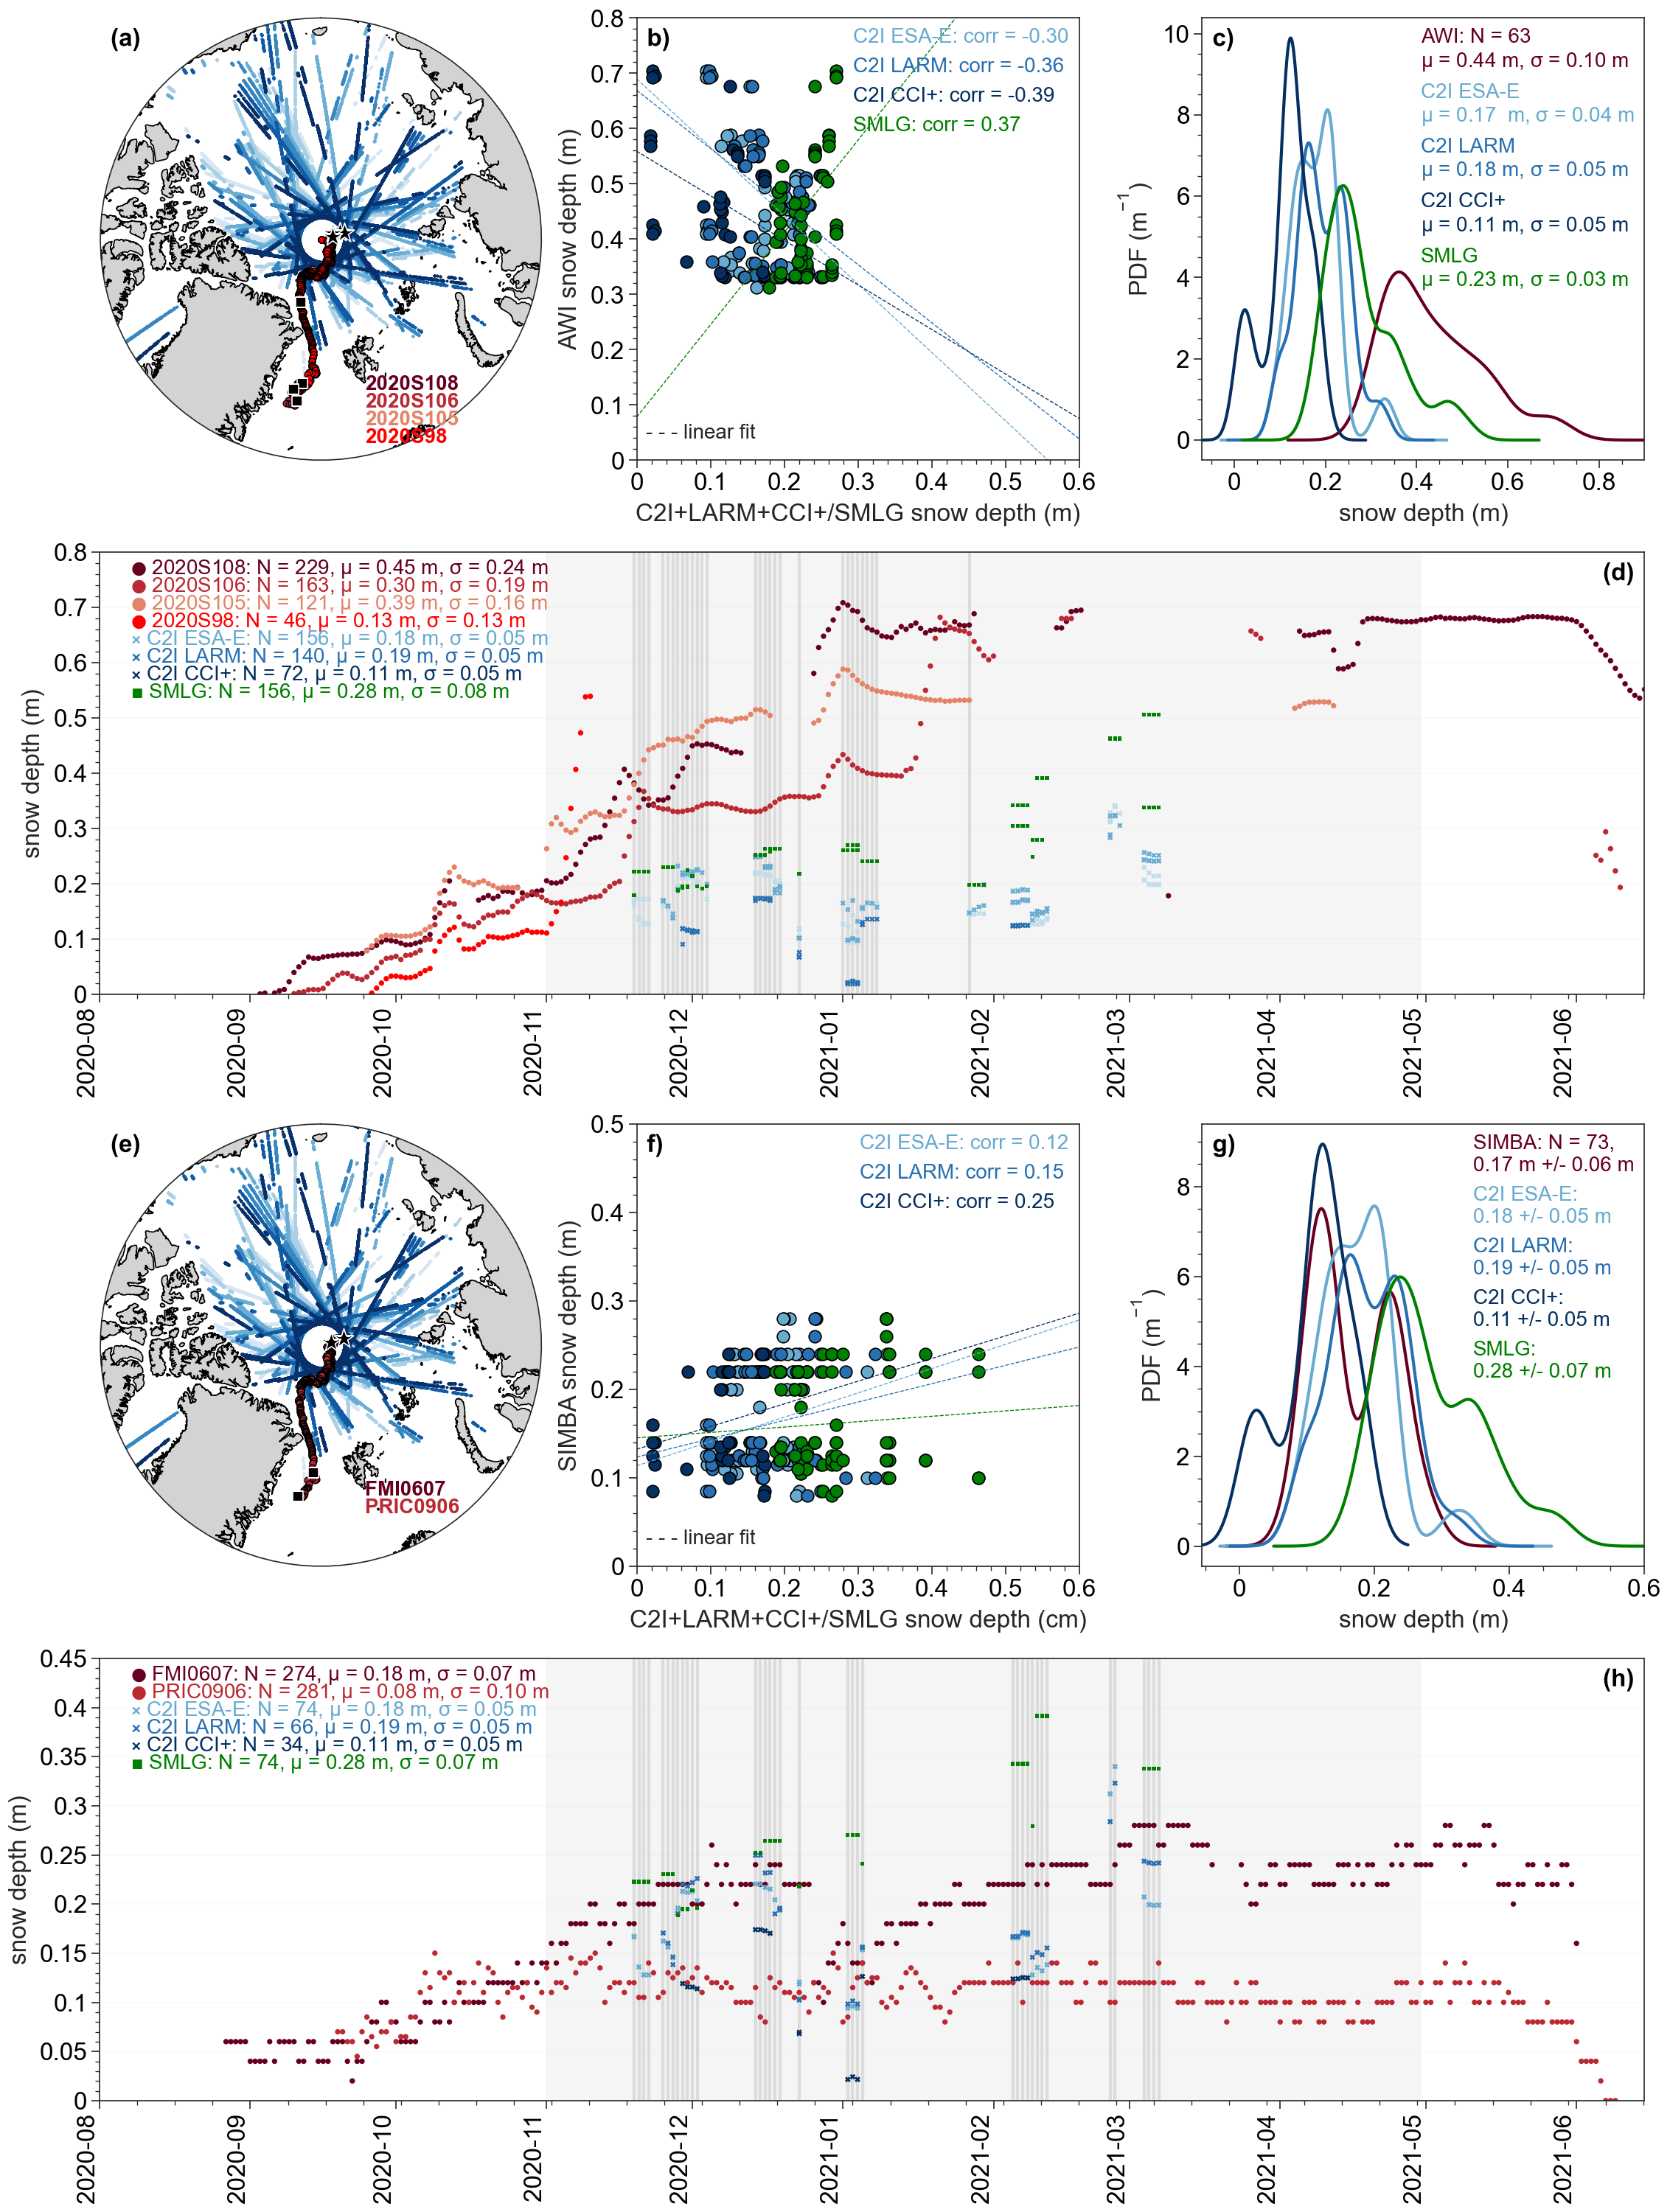

In [513]:
import proplot as pplt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap,rgb2hex
from scipy.stats import linregress
pplt.rc.update(grid=False)
fig, axs = pplt.subplots([[1,2,3],[1,2,3],[4,4,4],[4,4,4],[5,6,7],[5,6,7],[8,8,8],[8,8,8]],refwidth=3, refheight=3,share=False, proj={1:'nplaea', 5:'nplaea'})

sns.set_style(style="ticks")
cmap = plt.cm.get_cmap('Blues')
cmap_qual2 = [cmap(1/6), cmap(2/6), cmap(3/6), cmap(4/6), cmap(5/6), cmap(6/6)]

cmap_qual_green = LinearSegmentedColormap.from_list('list', ['green', 'gray', 'red'], N = 3)

'''cmap_qual = ['#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00', '#CC79A7', 'darkorange']
cmap_qual = LinearSegmentedColormap.from_list('list', cmap_qual, N = len(cmap_qual))'''

cmap_qual = [rgb2hex(cmap_check((0/8))),rgb2hex(cmap_check((1/8))),rgb2hex(cmap_check((2/8))), rgb2hex(cmap_check((3/8))),
            rgb2hex(cmap_check((5/8))), rgb2hex(cmap_check(6/8)), rgb2hex(cmap_check(7/8)), rgb2hex(cmap_check(8/8)), cmap_qual_green(1)]

    
#cmap_qual = [rgb2hex(cmap_check((0/8))),rgb2hex(cmap_check((1/8))),rgb2hex(cmap_check((2/8))), rgb2hex(cmap_check((3/8))),
#             cmap(1/6), cmap(2/6), cmap(3/6), cmap(4/6), cmap(5/6), cmap(6/6)]
cmap_qual = LinearSegmentedColormap.from_list('list', cmap_qual, N = len(cmap_qual))

colours = [cmap_qual(0)[0:3],cmap_qual(1)[0:3],cmap_qual(2)[0:3],cmap_qual(3)[0:3],cmap_qual(4)[0:3],cmap_qual(5)[0:3]]


#### A) plot
ax = axs[0]
ax.add_feature(cfeature.LAND, facecolor='lightgrey')
ax.coastlines(resolution=resol, color='k')
ax.format(boundinglat=70)


x=ax.scatter(np.array(CRYO2ICE_nov['lon']), np.array(CRYO2ICE_nov['lat']), c=cmap_qual2[0], s=0.5, marker = "o")
x=ax.scatter(np.array(CRYO2ICE_dec['lon']), np.array(CRYO2ICE_dec['lat']), c=cmap_qual2[1], s=0.5, marker = "o")
x=ax.scatter(np.array(CRYO2ICE_jan['lon']), np.array(CRYO2ICE_jan['lat']), c=cmap_qual2[2], s=0.5, marker = "o")
x=ax.scatter(np.array(CRYO2ICE_feb['lon']), np.array(CRYO2ICE_feb['lat']),  c=cmap_qual2[3], s=0.5, marker = "o")
x=ax.scatter(np.array(CRYO2ICE_mar['lon']), np.array(CRYO2ICE_mar['lat']), c=cmap_qual2[4], s=0.5, marker = "o")
x=ax.scatter(np.array(CRYO2ICE_apr['lon']), np.array(CRYO2ICE_apr['lat']),  c=cmap_qual2[5], s=0.5, marker = "o")

x=ax.scatter(np.array(df_AWI_buoy_4['longitude (deg)']), np.array(df_AWI_buoy_4['latitude (deg)']),  c=cmap_qual(0), s=10, marker = "o", label='2020S108',edgecolors='k',linewidth =.5)
x=ax.scatter(np.array(df_AWI_buoy_2['longitude (deg)']), np.array(df_AWI_buoy_2['latitude (deg)']),  c=cmap_qual(1), s=10, marker = "o", label='2020S106',edgecolors='k',linewidth =.5)
x=ax.scatter(np.array(df_AWI_buoy_1['longitude (deg)']), np.array(df_AWI_buoy_1['latitude (deg)']),  c=cmap_qual(2), s=10, marker = "o", label='2020S105',edgecolors='k',linewidth =.5)
x=ax.scatter(np.array(df_AWI_buoy_5['longitude (deg)']), np.array(df_AWI_buoy_5['latitude (deg)']),  c=cmap_qual_green(2), s=10, marker = "o", label='2020S98',edgecolors='k',linewidth =.5)

x=ax.scatter(np.array(df_AWI_buoy_4['longitude (deg)'][0]), np.array(df_AWI_buoy_4['latitude (deg)'][0]), c='k', s=100, marker = "*", label='',edgecolors='white')
x=ax.scatter(np.array(df_AWI_buoy_2['longitude (deg)'][0]), np.array(df_AWI_buoy_2['latitude (deg)'][0]),  c='k', s=100, marker = "*", label='',edgecolors='white')
x=ax.scatter(np.array(df_AWI_buoy_1['longitude (deg)'][0]), np.array(df_AWI_buoy_1['latitude (deg)'][0]),  c='k', s=100, marker = "*", label='',edgecolors='white')
x=ax.scatter(np.array(df_AWI_buoy_5['longitude (deg)'][0]), np.array(df_AWI_buoy_5['latitude (deg)'][0]),  c='k', s=100, marker = "*", label='',edgecolors='white')


x=ax.scatter(np.array(df_AWI_buoy_4['longitude (deg)'][len(df_AWI_buoy_4)-1]), np.array(df_AWI_buoy_4['latitude (deg)'][len(df_AWI_buoy_4)-1]),  c='k', s=25, marker = "s", label='',edgecolors='white')
x=ax.scatter(np.array(df_AWI_buoy_2['longitude (deg)'][len(df_AWI_buoy_2)-1]), np.array(df_AWI_buoy_2['latitude (deg)'][len(df_AWI_buoy_2)-1]),  c='k', s=25, marker = "s", label='',edgecolors='white')
x=ax.scatter(np.array(df_AWI_buoy_1['longitude (deg)'][len(df_AWI_buoy_1)-1]), np.array(df_AWI_buoy_1['latitude (deg)'][len(df_AWI_buoy_1)-1]),  c='k', s=25, marker = "s", label='',edgecolors='white')
x=ax.scatter(np.array(df_AWI_buoy_5['longitude (deg)'][len(df_AWI_buoy_5)-1]), np.array(df_AWI_buoy_5['latitude (deg)'][len(df_AWI_buoy_5)-1]),  c='k', s=25, marker = "s", label='',edgecolors='white')

#axs[0].text(0.60, 0.16, r'Buoy', color='k', transform= axs[0].transAxes,weight="bold")

axs[0].text(0.60, 0.16, '2020S108', color=cmap_qual(0), transform= axs[0].transAxes,weight="bold",fontsize=10)
axs[0].text(0.60, 0.12, '2020S106', color=cmap_qual(1), transform= axs[0].transAxes,weight="bold",fontsize=10)
axs[0].text(0.60, 0.08, '2020S105', color=cmap_qual(2), transform= axs[0].transAxes,weight="bold",fontsize=10)
axs[0].text(0.60, 0.04, '2020S98', color=cmap_qual_green(2), transform= axs[0].transAxes,weight="bold",fontsize=10)
axs[0].format(abc='(a)', abcloc='ul')

### B) plot
df_AWI_buoy_comb_notna = df_AWI_buoy_comb[df_AWI_buoy_comb['snow_depth_CRYO2ICE'].notna()]
df_AWI_buoy_comb_notna_extra = df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['daily_snow_depth (m)'].notna()]


axs[1].scatter(df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE'], df_AWI_buoy_comb_notna_extra['daily_snow_depth (m)'],c=cmap_qual(5),edgecolors='k')
axs[1].scatter(df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_LARM'], df_AWI_buoy_comb_notna_extra['daily_snow_depth (m)'],c=cmap_qual(6),edgecolors='k')
axs[1].scatter(df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'], df_AWI_buoy_comb_notna_extra['daily_snow_depth (m)'],c=cmap_qual(7),edgecolors='k')
axs[1].scatter(df_AWI_buoy_comb_notna_extra['SMLG_snow_depth'], df_AWI_buoy_comb_notna_extra['daily_snow_depth (m)'],c=cmap_qual_green(0),edgecolors='k')
#axs[1].scatter(df_AWI_buoy_comb_notna_extra['SMLG_snow_depth_v2'], df_AWI_buoy_comb_notna_extra['daily_snow_depth (m)'],c=cmap_qual(8),edgecolors='k')

axs[1].format(abc='a)', abcloc='ul',xlabel='C2I+LARM+CCI+/SMLG snow depth (m)', ylabel='AWI snow depth (m)', xgrid=False, ygrid=False, xlim=[0,0.6], ylim=[0,0.8])

from sklearn.metrics import mean_squared_error

rms_C2I = mean_squared_error(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['daily_snow_depth (m)'], df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['snow_depth_CRYO2ICE'], squared=False)
rms_LARM = mean_squared_error(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['daily_snow_depth (m)'], df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['snow_depth_CRYO2ICE_LARM'], squared=False)
rms_CCI = mean_squared_error(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['daily_snow_depth (m)'], df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['snow_depth_CRYO2ICE_CCI'], squared=False)
rms_SMLG = mean_squared_error(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['daily_snow_depth (m)'], df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['SMLG_snow_depth'], squared=False)
#rms_SMLG_v2 = mean_squared_error(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['daily_snow_depth (m)'], df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['SMLG_snow_depth_v2'], squared=False)

a = df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['daily_snow_depth (m)']
b = df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['snow_depth_CRYO2ICE']
fit = linregress(b,a)
x = np.arange(0, 1, 0.1)
axs[1].plot(x, fit[0]*x+fit[1], linestyle='--', color=cmap_qual(5), linewidth=0.5)

text_corr1 = 'C2I ESA-E: corr = {:.2f}'.format(np.corrcoef(df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE'], df_AWI_buoy_comb_notna_extra['daily_snow_depth (m)'])[0,1],rms_C2I, fit[0], fit[1])

a = df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['daily_snow_depth (m)']
b = df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['snow_depth_CRYO2ICE_LARM']
fit = linregress(b,a)
x = np.arange(0, 1, 0.1)
axs[1].plot(x, fit[0]*x+fit[1], linestyle='--', color=cmap_qual(6), linewidth=0.5)

text_corr2 = 'C2I LARM: corr = {:.2f}'.format(df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_LARM'].corr(df_AWI_buoy_comb_notna_extra['daily_snow_depth (m)']),rms_LARM, fit[0], fit[1])

a = df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['daily_snow_depth (m)']
b = df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['snow_depth_CRYO2ICE_CCI']
fit = linregress(b,a)
x = np.arange(0, 1, 0.1)
axs[1].plot(x, fit[0]*x+fit[1], linestyle='--', color=cmap_qual(7), linewidth=0.5)


text_corr3 = 'C2I CCI+: corr = {:.2f}'.format(df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].corr(df_AWI_buoy_comb_notna_extra['daily_snow_depth (m)']), rms_CCI, fit[0], fit[1])

a = df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['daily_snow_depth (m)']
b = df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['SMLG_snow_depth']
fit = linregress(b,a)
x = np.arange(0, 1, 0.1)
axs[1].plot(x, fit[0]*x+fit[1], linestyle='--', color=cmap_qual_green(0), linewidth=0.5)


text_corr4 = 'SMLG: corr = {:.2f}'.format(np.corrcoef(df_AWI_buoy_comb_notna_extra['SMLG_snow_depth'], df_AWI_buoy_comb_notna_extra['daily_snow_depth (m)'])[0,1], rms_SMLG, fit[0], fit[1])

#a = df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['daily_snow_depth (m)']
#b = df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['SMLG_snow_depth_v2']
#fit = linregress(b,a)
#x = np.arange(0, 1, 0.1)
#axs[1].plot(x, fit[0]*x+fit[1], linestyle='--', color=cmap_qual(8), linewidth=0.5)


#text_corr5 = 'SMLG-HS: corr = {:.2f}'.format(np.corrcoef(df_AWI_buoy_comb_notna_extra['SMLG_snow_depth_v2'], df_AWI_buoy_comb_notna_extra['daily_snow_depth (m)'])[0,1], rms_SMLG_v2, fit[0], fit[1])

leg = axs[1].legend(labels=[text_corr1, text_corr2, text_corr3, text_corr4], loc='upper right',ncols=1,markerscale=0, frame=False,prop={'size': 10})
for h, t in zip(leg.legendHandles, leg.get_texts()):
    t.set_color(h.get_facecolor()[0])

axs[1].text(0.02, 0.05, "- - - linear fit", transform = axs[1].transAxes, fontsize=10)




### C) plot


a#xs[2].hist(df_AWI_buoy_comb_notna['daily_snow_depth (m)'],density=True, bins=10, color='k',hatch='/', edgecolor='k',fill=True)
#axs[2].hist(df_AWI_buoy_comb_notna['snow_depth_CRYO2ICE'], color=colours[0],density=True, bins=10, edgecolor=colours[0],fill=False,hatch='/',)
df_AWI_buoy_comb_notna['daily_snow_depth (m)'].plot.kde(ax=axs[2], color=cmap_qual(0))
df_AWI_buoy_comb_notna['snow_depth_CRYO2ICE'].plot.kde(ax=axs[2], color=cmap_qual(5))
df_AWI_buoy_comb_notna['snow_depth_CRYO2ICE_LARM'].plot.kde(ax=axs[2], color=cmap_qual(6))
df_AWI_buoy_comb_notna['snow_depth_CRYO2ICE_CCI'].plot.kde(ax=axs[2], color=cmap_qual(7))
df_AWI_buoy_comb_notna['SMLG_snow_depth'].plot.kde(ax=axs[2], color=cmap_qual_green(0))
#df_AWI_buoy_comb_notna['SMLG_snow_depth_v2'].plot.kde(ax=axs[2], color=cmap_qual(8))

#axs[2].hist(df_AWI_buoy_comb_notna['snow_depth_CRYO2ICE_LARM'], color=colours[1],density=True, bins=10,  edgecolor=colours[1],fill=False,hatch='/',)
#axs[2].hist(df_AWI_buoy_comb_notna['snow_depth_CRYO2ICE_CCI'], color=colours[2],density=True, bins=10,  edgecolor=colours[2],fill=False,hatch='/',)
#axs[2].hist(df_AWI_buoy_comb_notna['SMLG_snow_depth'], color=colours[3],density=True, bins=10,  edgecolor=colours[3],fill=False,hatch='/',)
#axs[2].hist(df_AWI_buoy_comb_notna['SMLG_snow_depth_v2'],color=colours[4], density=True, bins=10, edgecolor=colours[4],fill=False,hatch='/')
axs[2].format(abc='a)', abcloc='ul',xlabel='snow depth (m)', ylabel='PDF (m$^{-1}$)', xgrid=False, ygrid=False)


N = len(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['daily_snow_depth (m)'].notna()])
mu = np.nanmean(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['daily_snow_depth (m)'].notna()]['daily_snow_depth (m)'])
std = np.nanstd(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['daily_snow_depth (m)'].notna()]['daily_snow_depth (m)'])
#axs[2].text(1.02, 0.92, 'AWI buoys\nN = {}, $\mu$ = {:.2f} m, $\sigma$ = {:.2f} m'.format(N, mu, std),transform= axs[2].transAxes, color='k', fontsize=8)
text1 = 'AWI: N = {}\n$\mu$ = {:.2f} m, $\sigma$ = {:.2f} m'.format(N, mu, std)

N = len(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['snow_depth_CRYO2ICE'].notna()])
mu = np.nanmean(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['snow_depth_CRYO2ICE'].notna()]['snow_depth_CRYO2ICE'])
std = np.nanstd(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['snow_depth_CRYO2ICE'].notna()]['snow_depth_CRYO2ICE'])
N2 = len(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE'].notna()])
mu2 = np.nanmean(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE'].notna()]['snow_depth_CRYO2ICE'])
std2 = np.nanstd(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE'].notna()]['snow_depth_CRYO2ICE'])
#axs[2].text(1.02, 0.82, 'CRYO2ICE: N = {} ({})\n$\mu$ = {:.2f} ({:.2f}) m, $\sigma$ = {:.2f} ({:.2f}) m'.format(N, N2, mu, mu2, std, std2),transform= axs[2].transAxes, color=colours[0], fontsize=8)
text2 = 'C2I ESA-E\n$\mu$ = {:.2f}  m, $\sigma$ = {:.2f} m'.format(mu2, std2)
text2a = u"$\u2A2F$ "+r'C2I ESA-E: N = {}, $\mu$ = {:.2f} m, $\sigma$ = {:.2f} m'.format(N, mu, std)

N = len(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['snow_depth_CRYO2ICE_LARM'].notna()])
mu = np.nanmean(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['snow_depth_CRYO2ICE_LARM'].notna()]['snow_depth_CRYO2ICE_LARM'])
std = np.nanstd(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['snow_depth_CRYO2ICE_LARM'].notna()]['snow_depth_CRYO2ICE_LARM'])
N2 = len(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_LARM'].notna()])
mu2 = np.nanmean(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_LARM'].notna()]['snow_depth_CRYO2ICE_LARM'])
std2 = np.nanstd(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_LARM'].notna()]['snow_depth_CRYO2ICE_LARM'])
#axs[2].text(1.02, 0.72, 'CRYO2ICE LARM: N = {} ({})\n$\mu$ = {:.2f} ({:.2f}) m, $\sigma$ = {:.2f} ({:.2f}) m'.format(N, N2, mu, mu2, std, std2),transform= axs[2].transAxes, color=colours[1], fontsize=8)
text3 = 'C2I LARM\n$\mu$ = {:.2f} m, $\sigma$ = {:.2f} m'.format(mu2,  std2, )
text3a = u"$\u2A2F$ "+r'C2I LARM: N = {}, $\mu$ = {:.2f} m, $\sigma$ = {:.2f} m'.format(N, mu, std)


N = len(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['snow_depth_CRYO2ICE_CCI'].notna()])
mu = np.nanmean(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['snow_depth_CRYO2ICE_CCI'].notna()]['snow_depth_CRYO2ICE_CCI'])
std = np.nanstd(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['snow_depth_CRYO2ICE_CCI'].notna()]['snow_depth_CRYO2ICE_CCI'])
N2 = len(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()])
mu2 = np.nanmean(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['snow_depth_CRYO2ICE_CCI'])
std2 = np.nanstd(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['snow_depth_CRYO2ICE_CCI'])
#axs[2].text(1.02, 0.62, 'CRYO2ICE CCI: N = {} ({})\n$\mu$ = {:.2f} ({:.2f}) m, $\sigma$ = {:.2f} ({:.2f}) m'.format(N, N2, mu, mu2, std, std2),transform= axs[2].transAxes, color=colours[2], fontsize=8)
text4 = 'C2I CCI+\n$\mu$ = {:.2f} m, $\sigma$ = {:.2f} m'.format(mu2, std2, )
text4a = u"$\u2A2F$ "+r'C2I CCI+: N = {}, $\mu$ = {:.2f} m, $\sigma$ = {:.2f} m'.format(N, mu, std)


N = len(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['SMLG_snow_depth'].notna()])
mu = np.nanmean(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['SMLG_snow_depth'].notna()]['SMLG_snow_depth'])
std = np.nanstd(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['SMLG_snow_depth'].notna()]['SMLG_snow_depth'])
N2 = len(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['SMLG_snow_depth'].notna()])
mu2 = np.nanmean(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['SMLG_snow_depth'].notna()]['SMLG_snow_depth'])
std2 = np.nanstd(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['SMLG_snow_depth'].notna()]['SMLG_snow_depth'])
#axs[2].text(1.02, 0.52, 'SMLG: N = {} ({})\n$\mu$ = {:.2f} ({:.2f}) m, $\sigma$ = {:.2f} ({:.2f}) m'.format(N, N2, mu, mu2, std, std2),transform= axs[2].transAxes, color=colours[3], fontsize=8)
text5 = 'SMLG\n$\mu$ = {:.2f} m, $\sigma$ = {:.2f} m'.format(mu2, std2)
text5a = r'$\blacksquare$ SMLG: N = {}, $\mu$ = {:.2f} m, $\sigma$ = {:.2f} m'.format(N, mu, std)


#N = len(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['SMLG_snow_depth_v2'].notna()])
#mu = np.nanmean(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['SMLG_snow_depth_v2'].notna()]['SMLG_snow_depth_v2'])
#std = np.nanstd(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['SMLG_snow_depth_v2'].notna()]['SMLG_snow_depth_v2'])
#N2 = len(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['SMLG_snow_depth_v2'].notna()])
#mu2 = np.nanmean(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['SMLG_snow_depth_v2'].notna()]['SMLG_snow_depth_v2'])
#std2 = np.nanstd(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['SMLG_snow_depth_v2'].notna()]['SMLG_snow_depth_v2'])
##axs[2].text(1.02, 0.42, 'SMLG v2: N = {} ({})\n$\mu$ = {:.2f} ({:.2f}) m, $\sigma$ = {:.2f} ({:.2f}) m'.format(N, N2, mu, mu2, std, std2),transform= axs[2].transAxes, color=colours[4], fontsize=8)
#text6 = 'SMLG-HS\n$\mu$ = {:.2f}  m, $\sigma$ = {:.2f} m'.format(mu2, std2)
#text6a = r'$\blacksquare$ SMLG-HS: N = {}, $\mu$ = {:.2f} m, $\sigma$ = {:.2f} m'.format(N, mu, std)

#rc['legend.fontsize']=7.0
leg = axs[2].legend([text1, text2, text3, text4, text5], loc='upper right',ncols=1, frame=False,prop={'size': 10}, handlelength=0, labelcolor='linecolor')
#for h, t in zip(leg.legendHandles, leg.get_texts()):
#    t.set_color(h.get_edgecolor())
#    h.set_linewidth(0)
    #h.hatches(False)
#    h.set_facecolor(None)
#    h.set_alpha(0)

###### D) plot
df_AWI_buoy_comb_test = df_AWI_buoy_comb
test = df_AWI_buoy_comb[['datetime', 'snow_depth_CRYO2ICE']]
test = test[test['snow_depth_CRYO2ICE'].notna()]
test['ID']='C2I ESA-E'
test['sensor']='satellite'
test = test.rename(columns={"snow_depth_CRYO2ICE": "daily_snow_depth (m)"})
df_AWI_buoy_comb_test = pd.concat([df_AWI_buoy_comb_test, test])

test = df_AWI_buoy_comb[['datetime', 'snow_depth_CRYO2ICE_LARM']]
test = test[test['snow_depth_CRYO2ICE_LARM'].notna()]
test['ID']='C2I LARM'
test['sensor']='satellite'
test = test.rename(columns={"snow_depth_CRYO2ICE_LARM": "daily_snow_depth (m)"})
df_AWI_buoy_comb_test = pd.concat([df_AWI_buoy_comb_test, test])

test = df_AWI_buoy_comb[['datetime', 'snow_depth_CRYO2ICE_CCI']]
test = test[test['snow_depth_CRYO2ICE_CCI'].notna()]
test['ID']='C2I CCI+'
test['sensor']='satellite'
test = test.rename(columns={"snow_depth_CRYO2ICE_CCI": "daily_snow_depth (m)"})
df_AWI_buoy_comb_test = pd.concat([df_AWI_buoy_comb_test, test])

test = df_AWI_buoy_comb[['datetime', 'SMLG_snow_depth']]
test = test[test['SMLG_snow_depth'].notna()]
test['ID']='SMLG'
test['sensor']='model'
test = test.rename(columns={"SMLG_snow_depth": "daily_snow_depth (m)"})
df_AWI_buoy_comb_test = pd.concat([df_AWI_buoy_comb_test, test])

#test = df_AWI_buoy_comb[['datetime', 'SMLG_snow_depth_v2']]
#test = test[test['SMLG_snow_depth_v2'].notna()]
#test['ID']='SMLG-HS'
#test['sensor']='model'
#test = test.rename(columns={"SMLG_snow_depth_v2": "daily_snow_depth (m)"})
#df_AWI_buoy_comb_test = pd.concat([df_AWI_buoy_comb_test, test])

df_AWI_buoy_comb_test = df_AWI_buoy_comb_test.reset_index(drop=True)

#df_AWI_buoy_comb_test_sort= df_AWI_buoy_comb_test.sort_values(by='datetime')
#df_AWI_buoy_comb_test_sort.reset_index()

palette_custom ={'2020S108': cmap_qual(0),
                 "2020S106": cmap_qual(1), 
                 "2020S105": cmap_qual(2), 
                 "2020S98": cmap_qual_green(2), 
                 "C2I ESA-E":cmap_qual(4), 
                 "C2I LARM":cmap_qual(5), 
                 "C2I CCI+":cmap_qual(6), 
                 "SMLG":cmap_qual_green(0), 
                 "SMLG-HS":cmap_qual(8)}

palette_v2 = [cmap_qual(5), cmap_qual(6), cmap_qual(7), cmap_qual_green(0), cmap_qual(0), cmap_qual(1), cmap_qual(2), cmap_qual(3), cmap_qual(4)]

labels_text = []

df_AWI_buoy_comb_test['datetime']=pd.to_datetime(df_AWI_buoy_comb_test['datetime'])

plot_=sns.scatterplot(data=df_AWI_buoy_comb_test,x='datetime', y='daily_snow_depth (m)', hue='ID', style='sensor', palette = palette_custom, legend="full",linewidth=0, s=7,ax=axs[3])

for ind, label in enumerate(plot_.get_xticklabels()):
    #if ind % 50 == 0:  # every 10th label is kept
    label.set_visible(True)
    label.set_ha("right")
    label.set_rotation(45)
    #else:
    #    label.set_visible(False)

plot_.set(xlabel=None, ylabel = 'snow depth (m)')
axs[3].legend().set_visible(False)
axs[3].format(abc='(a)', abcloc='ur',xgrid=False , ygrid=True,ylim=[0, 0.8])



N = len(df_AWI_buoy_4[df_AWI_buoy_4['daily_snow_depth (m)'].notna()])
mu = np.nanmean(df_AWI_buoy_4[df_AWI_buoy_4['daily_snow_depth (m)'].notna()]['daily_snow_depth (m)'])
std = np.nanstd(df_AWI_buoy_4[df_AWI_buoy_4['daily_snow_depth (m)'].notna()]['daily_snow_depth (m)'])
#axs[3].text(0.02, 0.78, 'N = {}, $\mu$ = {:.2f} m, $\sigma$ = {:.2f} m'.format(N, mu, std),transform= axs[3].transAxes, color=cmap_qual(5))
text2_a = u"$\u26ab$ "+r'2020S108: N = {}, $\mu$ = {:.2f} m, $\sigma$ = {:.2f} m'.format(N, mu, std)


N = len(df_AWI_buoy_2[df_AWI_buoy_2['daily_snow_depth (m)'].notna()])
mu = np.nanmean(df_AWI_buoy_2[df_AWI_buoy_2['daily_snow_depth (m)'].notna()]['daily_snow_depth (m)'])
std = np.nanstd(df_AWI_buoy_2[df_AWI_buoy_2['daily_snow_depth (m)'].notna()]['daily_snow_depth (m)'])
#axs[3].text(0.02, 0.70, 'N = {}, $\mu$ = {:.2f} m, $\sigma$ = {:.2f} m'.format(N, mu, std),transform= axs[3].transAxes, color=cmap_qual(6))
text2_b = u"$\u26ab$ "+r'2020S106: N = {}, $\mu$ = {:.2f} m, $\sigma$ = {:.2f} m'.format(N, mu, std)

N = len(df_AWI_buoy_1[df_AWI_buoy_1['daily_snow_depth (m)'].notna()])
mu = np.nanmean(df_AWI_buoy_1[df_AWI_buoy_1['daily_snow_depth (m)'].notna()]['daily_snow_depth (m)'])
std = np.nanstd(df_AWI_buoy_1[df_AWI_buoy_1['daily_snow_depth (m)'].notna()]['daily_snow_depth (m)'])
#axs[3].text(0.02, 0.62, 'N = {}, $\mu$ = {:.2f} m, $\sigma$ = {:.2f} m'.format(N, mu, std),transform= axs[3].transAxes, color=cmap_qual(7))
text2_c =u"$\u26ab$ "+r'2020S105: N = {}, $\mu$ = {:.2f} m, $\sigma$ = {:.2f} m'.format(N, mu, std)

N = len(df_AWI_buoy_5[df_AWI_buoy_5['daily_snow_depth (m)'].notna()])
mu = np.nanmean(df_AWI_buoy_5[df_AWI_buoy_5['daily_snow_depth (m)'].notna()]['daily_snow_depth (m)'])
std = np.nanstd(df_AWI_buoy_5[df_AWI_buoy_5['daily_snow_depth (m)'].notna()]['daily_snow_depth (m)'])
#axs[3].text(0.02, 0.54, 'N = {}, $\mu$ = {:.2f} m, $\sigma$ = {:.2f} m'.format(N, mu, std),transform= axs[3].transAxes, color='green')
text2_d = u"$\u26ab$ "+r'2020S98: N = {}, $\mu$ = {:.2f} m, $\sigma$ = {:.2f} m'.format(N, mu, std)

#axs[3].legend(loc='upper left',ncols=1, frame=False,prop={'size': 7})
#labels=[text2_b, text2_a, text2_d, text2_c, text2a, text6a, text4a, text3a, text5a]

axs[3].text(0.02, 0.95, text2_a,transform= axs[3].transAxes, color=cmap_qual(0), fontsize=10)
axs[3].text(0.02, 0.91, text2_b,transform= axs[3].transAxes, color=cmap_qual(1), fontsize=10)
axs[3].text(0.02, 0.87, text2_c,transform= axs[3].transAxes, color=cmap_qual(2), fontsize=10)
axs[3].text(0.02, 0.83, text2_d,transform= axs[3].transAxes, color=cmap_qual_green(2), fontsize=10)
axs[3].text(0.02, 0.79, text2a,transform= axs[3].transAxes, color=cmap_qual(5), fontsize=10)
axs[3].text(0.02, 0.75, text3a,transform= axs[3].transAxes, color=cmap_qual(6), fontsize=10)
axs[3].text(0.02, 0.71, text4a,transform= axs[3].transAxes, color=cmap_qual(7), fontsize=10)
axs[3].text(0.02, 0.67, text5a,transform= axs[3].transAxes, color=cmap_qual_green(0), fontsize=10)
#axs[3].text(0.02, 0.63, text6a,transform= axs[3].transAxes, color=cmap_qual(8), fontsize=10)

df_AWI_buoy_comb_test_notna = df_AWI_buoy_comb_test[df_AWI_buoy_comb_test['daily_snow_depth (m)'].notna()]
#axs[3].axvline(x=np.array(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['SMLG_snow_depth'].notna()]['datetime']), color='grey')
[axs[3].axvline(x=i, color='gainsboro', zorder=-1) for i in df_AWI_buoy_comb_test_notna[df_AWI_buoy_comb_test_notna['SMLG_snow_depth'].notna()]['datetime']]
import datetime
axs[3].axvspan(xmin=datetime.date(2020,11,1), xmax=datetime.date(2021, 4, 30), ymin=0, ymax=1, color='whitesmoke',zorder=-2)
axs[3].format(xlim=[datetime.date(2020,8,1), datetime.date(2021, 6,15)])             
               
#


#### SIMBA Buoys #### 

#df_SIMBA_buoy_1
#df_SIMBA_buoy_2
#df_SIMBA_buoy_comb 

ax = axs[4]
ax.add_feature(cfeature.LAND, facecolor='lightgrey')
ax.coastlines(resolution=resol, color='k')
ax.format(boundinglat=70)

x=ax.scatter(np.array(CRYO2ICE_nov['lon']), np.array(CRYO2ICE_nov['lat']), c=cmap_qual2[0], s=0.5, marker = "o")
x=ax.scatter(np.array(CRYO2ICE_dec['lon']), np.array(CRYO2ICE_dec['lat']), c=cmap_qual2[1], s=0.5, marker = "o")
x=ax.scatter(np.array(CRYO2ICE_jan['lon']), np.array(CRYO2ICE_jan['lat']), c=cmap_qual2[2], s=0.5, marker = "o")
x=ax.scatter(np.array(CRYO2ICE_feb['lon']), np.array(CRYO2ICE_feb['lat']), c=cmap_qual2[3], s=0.5, marker = "o")
x=ax.scatter(np.array(CRYO2ICE_mar['lon']), np.array(CRYO2ICE_mar['lat']), c=cmap_qual2[4], s=0.5, marker = "o")
x=ax.scatter(np.array(CRYO2ICE_apr['lon']), np.array(CRYO2ICE_apr['lat']), c=cmap_qual2[5], s=0.5, marker = "o")

x=ax.scatter(np.array(df_SIMBA_buoy_1['GPSLng']), np.array(df_SIMBA_buoy_1['GPSLat']), c=cmap_qual(0), s=10, marker = "o", label='2020S108',edgecolors='k',linewidth =.5)
x=ax.scatter(np.array(df_SIMBA_buoy_2['GPSLng']), np.array(df_SIMBA_buoy_2['GPSLat']), c=cmap_qual(1), s=10, marker = "o", label='2020S106',edgecolors='k',linewidth =.5)

x=ax.scatter(np.array(df_SIMBA_buoy_1['GPSLng'][0]), np.array(df_SIMBA_buoy_1['GPSLat'][0]), c='k', s=100, marker = "*", label='',edgecolors='white')
x=ax.scatter(np.array(df_SIMBA_buoy_2['GPSLng'][0]), np.array(df_SIMBA_buoy_2['GPSLat'][0]), c='k', s=100, marker = "*", label='',edgecolors='white')


x=ax.scatter(np.array(df_SIMBA_buoy_1['GPSLng'][len(df_SIMBA_buoy_1)-1]), np.array(df_SIMBA_buoy_1['GPSLat'][len(df_SIMBA_buoy_1)-1]), c='k', s=25, marker = "s", label='',edgecolors='white')
x=ax.scatter(np.array(df_SIMBA_buoy_2['GPSLng'][len(df_SIMBA_buoy_2)-1]), np.array(df_SIMBA_buoy_2['GPSLat'][len(df_SIMBA_buoy_2)-1]), c='k', s=25, marker = "s", label='',edgecolors='white')

#axs[0].text(0.60, 0.16, r'Buoy', color='k', transform= axs[0].transAxes,weight="bold")

axs[4].text(0.60, 0.16, df_SIMBA_buoy_1['ID'][0], color=cmap_qual(0), transform= axs[4].transAxes,weight="bold",fontsize=10)
axs[4].text(0.60, 0.12, df_SIMBA_buoy_2['ID'][0], color=cmap_qual(1), transform= axs[4].transAxes,weight="bold",fontsize=10)

axs[4].format(abc='(a)', abcloc='ul')

### B) plot
df_AWI_buoy_comb_notna = df_SIMBA_buoy_comb[df_SIMBA_buoy_comb['snow_depth_CRYO2ICE'].notna()]
df_AWI_buoy_comb_notna_extra = df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['snow depth/cm'].notna()]


axs[5].scatter(df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE'], df_AWI_buoy_comb_notna_extra['snow depth/cm'],c=cmap_qual(5),edgecolors='k')
axs[5].scatter(df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_LARM'], df_AWI_buoy_comb_notna_extra['snow depth/cm'],c=cmap_qual(6),edgecolors='k')
axs[5].scatter(df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'], df_AWI_buoy_comb_notna_extra['snow depth/cm'],c=cmap_qual(7),edgecolors='k')
axs[5].scatter(df_AWI_buoy_comb_notna_extra['SMLG_snow_depth'], df_AWI_buoy_comb_notna_extra['snow depth/cm'],c=cmap_qual_green(0),edgecolors='k')
#axs[5].scatter(df_AWI_buoy_comb_notna_extra['SMLG_snow_depth_v2'], df_AWI_buoy_comb_notna_extra['snow depth/cm'],c=cmap_qual(8),edgecolors='k')

axs[5].format(abc='a)', abcloc='ul',xlabel='C2I+LARM+CCI+/SMLG snow depth (cm)', ylabel='SIMBA snow depth (m)', xgrid=False, ygrid=False, xlim=[0,0.6], ylim=[0,0.5])

from sklearn.metrics import mean_squared_error

rms_C2I = mean_squared_error(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['snow depth/cm'], df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['snow_depth_CRYO2ICE'], squared=False)
rms_LARM = mean_squared_error(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['snow depth/cm'], df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['snow_depth_CRYO2ICE_LARM'], squared=False)
rms_CCI = mean_squared_error(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['snow depth/cm'], df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['snow_depth_CRYO2ICE_CCI'], squared=False)
rms_SMLG = mean_squared_error(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['snow depth/cm'], df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['SMLG_snow_depth'], squared=False)
#rms_SMLG_v2 = mean_squared_error(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['snow depth/cm'], df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['SMLG_snow_depth_v2'], squared=False)

a = df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['snow depth/cm']
b = df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['snow_depth_CRYO2ICE']
fit = linregress(b,a)
x = np.arange(0, 1, 0.1)
axs[5].plot(x, fit[0]*x+fit[1], linestyle='--', color=cmap_qual(5), linewidth=0.5)

text_corr1 = 'C2I ESA-E: corr = {:.2f}\nRMSD = {:.2f}, slope = {:.2f}\nintercept = {:.2f}'.format(np.corrcoef(df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE'], df_AWI_buoy_comb_notna_extra['snow depth/cm'])[0,1],rms_C2I, fit[0], fit[1])
text_corr1 = 'C2I ESA-E: corr = {:.2f}'.format(np.corrcoef(df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE'], df_AWI_buoy_comb_notna_extra['snow depth/cm'])[0,1],rms_C2I, fit[0], fit[1])

a = df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['snow depth/cm']
b = df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['snow_depth_CRYO2ICE_LARM']
fit = linregress(b,a)
x = np.arange(0, 1, 0.1)
axs[5].plot(x, fit[0]*x+fit[1], linestyle='--', color=cmap_qual(6), linewidth=0.5)

text_corr2 = 'C2I LARM: corr = {:.2f}\nRMSD = {:.2f}, slope = {:.2f}\nintercept = {:.2f}'.format(df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_LARM'].corr(df_AWI_buoy_comb_notna_extra['snow depth/cm']),rms_LARM, fit[0], fit[1])
text_corr2 = 'C2I LARM: corr = {:.2f}'.format(df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_LARM'].corr(df_AWI_buoy_comb_notna_extra['snow depth/cm']),rms_LARM, fit[0], fit[1])

a = df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['snow depth/cm']
b = df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['snow_depth_CRYO2ICE_CCI']
fit = linregress(b,a)
x = np.arange(0, 1, 0.1)
axs[5].plot(x, fit[0]*x+fit[1], linestyle='--', color=cmap_qual(7), linewidth=0.5)


text_corr3 = 'C2I CCI+: corr = {:.2f}\nRMSD = {:.2f}, slope = {:.2f}\nintercept = {:.2f}'.format(df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].corr(df_AWI_buoy_comb_notna_extra['snow depth/cm']), rms_CCI, fit[0], fit[1])
text_corr3 = 'C2I CCI+: corr = {:.2f}'.format(df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].corr(df_AWI_buoy_comb_notna_extra['snow depth/cm']), rms_CCI, fit[0], fit[1])

a = df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['snow depth/cm']
b = df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['SMLG_snow_depth']
fit = linregress(b,a)
x = np.arange(0, 1, 0.1)
axs[5].plot(x, fit[0]*x+fit[1], linestyle='--', color=cmap_qual_green(0), linewidth=0.5)


text_corr4 = 'SMLG: corr = {:.2f}\nRMSD = {:.2f}, slope = {:.2f}\nintercept = {:.2f}'.format(np.corrcoef(df_AWI_buoy_comb_notna_extra['SMLG_snow_depth'], df_AWI_buoy_comb_notna_extra['snow depth/cm'])[0,1], rms_SMLG, fit[0], fit[1])
text_corr4 = 'SMLG: corr = {:.2f}'.format(np.corrcoef(df_AWI_buoy_comb_notna_extra['SMLG_snow_depth'], df_AWI_buoy_comb_notna_extra['snow depth/cm'])[0,1], rms_SMLG, fit[0], fit[1])

#a = df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['snow depth/cm']
#b = df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['SMLG_snow_depth_v2']
#fit = linregress(b,a)
#x = np.arange(0, 1, 0.1)
#axs[5].plot(x, fit[0]*x+fit[1], linestyle='--', color=cmap_qual(8), linewidth=0.5)


#text_corr5 = 'SMLG-HS: corr = {:.2f}\nRMSD = {:.2f}, slope = {:.2f}\nintercept = {:.2f}'.format(np.corrcoef(df_AWI_buoy_comb_notna_extra['SMLG_snow_depth_v2'], df_AWI_buoy_comb_notna_extra['snow depth/cm'])[0,1], rms_SMLG_v2, fit[0], fit[1])
#text_corr5 = 'SMLG-HS: corr = {:.2f}'.format(np.corrcoef(df_AWI_buoy_comb_notna_extra['SMLG_snow_depth_v2'], df_AWI_buoy_comb_notna_extra['snow depth/cm'])[0,1], rms_SMLG_v2, fit[0], fit[1])

leg = axs[5].legend(labels=[text_corr1, text_corr2, text_corr3], loc='upper right',ncols=1,markerscale=0, frame=False,prop={'size': 10})
for h, t in zip(leg.legendHandles, leg.get_texts()):
    t.set_color(h.get_facecolor()[0])

axs[5].text(0.02, 0.05, "- - - linear fit", transform = axs[5].transAxes, fontsize=10)




### C) plot


#axs[2].hist(df_AWI_buoy_comb_notna['daily_snow_depth (m)'],density=True, bins=10, color='k',hatch='/', edgecolor='k',fill=True)
#axs[2].hist(df_AWI_buoy_comb_notna['snow_depth_CRYO2ICE'], color=colours[0],density=True, bins=10, edgecolor=colours[0],fill=False,hatch='/',)
df_AWI_buoy_comb_notna['snow depth/cm'].plot.kde(ax=axs[6], color=cmap_qual(0))
df_AWI_buoy_comb_notna['snow_depth_CRYO2ICE'].plot.kde(ax=axs[6], color=cmap_qual(5))
df_AWI_buoy_comb_notna['snow_depth_CRYO2ICE_LARM'].plot.kde(ax=axs[6], color=cmap_qual(6))
df_AWI_buoy_comb_notna['snow_depth_CRYO2ICE_CCI'].plot.kde(ax=axs[6], color=cmap_qual(7))
df_AWI_buoy_comb_notna['SMLG_snow_depth'].plot.kde(ax=axs[6], color=cmap_qual_green(0))
#df_AWI_buoy_comb_notna['SMLG_snow_depth_v2'].plot.kde(ax=axs[6], color=cmap_qual_green(1))

#axs[2].hist(df_AWI_buoy_comb_notna['snow_depth_CRYO2ICE_LARM'], color=colours[1],density=True, bins=10,  edgecolor=colours[1],fill=False,hatch='/',)
#axs[2].hist(df_AWI_buoy_comb_notna['snow_depth_CRYO2ICE_CCI'], color=colours[2],density=True, bins=10,  edgecolor=colours[2],fill=False,hatch='/',)
#axs[2].hist(df_AWI_buoy_comb_notna['SMLG_snow_depth'], color=colours[3],density=True, bins=10,  edgecolor=colours[3],fill=False,hatch='/',)
#axs[2].hist(df_AWI_buoy_comb_notna['SMLG_snow_depth_v2'],color=colours[4], density=True, bins=10, edgecolor=colours[4],fill=False,hatch='/')
axs[6].format(abc='a)', abcloc='ul',xlabel='snow depth (m)', ylabel='PDF (m$^{-1}$)', xgrid=False, ygrid=False)


N = len(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['snow depth/cm'].notna()])
mu = np.nanmean(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['snow depth/cm'].notna()]['snow depth/cm'])
std = np.nanstd(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['snow depth/cm'].notna()]['snow depth/cm'])
#axs[2].text(1.02, 0.92, 'AWI buoys\nN = {}, $\mu$ = {:.2f} m, $\sigma$ = {:.2f} m'.format(N, mu, std),transform= axs[2].transAxes, color='k', fontsize=8)
text1 = 'SIMBA: N = {},\n{:.2f} m +/- {:.2f} m'.format(N, mu, std)

N = len(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['snow_depth_CRYO2ICE'].notna()])
mu = np.nanmean(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['snow_depth_CRYO2ICE'].notna()]['snow_depth_CRYO2ICE'])
std = np.nanstd(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['snow_depth_CRYO2ICE'].notna()]['snow_depth_CRYO2ICE'])
N2 = len(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE'].notna()])
mu2 = np.nanmean(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE'].notna()]['snow_depth_CRYO2ICE'])
std2 = np.nanstd(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE'].notna()]['snow_depth_CRYO2ICE'])
#axs[2].text(1.02, 0.82, 'CRYO2ICE: N = {} ({})\n$\mu$ = {:.2f} ({:.2f}) m, $\sigma$ = {:.2f} ({:.2f}) m'.format(N, N2, mu, mu2, std, std2),transform= axs[2].transAxes, color=colours[0], fontsize=8)
text2 = 'C2I ESA-E:\n{:.2f} +/- {:.2f} m'.format(mu2, std2)
text2a = u"$\u2A2F$ "+r'C2I ESA-E: N = {}, $\mu$ = {:.2f} m, $\sigma$ = {:.2f} m'.format(N, mu, std)

N = len(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['snow_depth_CRYO2ICE_LARM'].notna()])
mu = np.nanmean(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['snow_depth_CRYO2ICE_LARM'].notna()]['snow_depth_CRYO2ICE_LARM'])
std = np.nanstd(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['snow_depth_CRYO2ICE_LARM'].notna()]['snow_depth_CRYO2ICE_LARM'])
N2 = len(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_LARM'].notna()])
mu2 = np.nanmean(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_LARM'].notna()]['snow_depth_CRYO2ICE_LARM'])
std2 = np.nanstd(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_LARM'].notna()]['snow_depth_CRYO2ICE_LARM'])
#axs[2].text(1.02, 0.72, 'CRYO2ICE LARM: N = {} ({})\n$\mu$ = {:.2f} ({:.2f}) m, $\sigma$ = {:.2f} ({:.2f}) m'.format(N, N2, mu, mu2, std, std2),transform= axs[2].transAxes, color=colours[1], fontsize=8)
text3 = 'C2I LARM:\n{:.2f} +/- {:.2f} m'.format(mu2,  std2, )
text3a = u"$\u2A2F$ "+r'C2I LARM: N = {}, $\mu$ = {:.2f} m, $\sigma$ = {:.2f} m'.format(N, mu, std)


N = len(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['snow_depth_CRYO2ICE_CCI'].notna()])
mu = np.nanmean(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['snow_depth_CRYO2ICE_CCI'].notna()]['snow_depth_CRYO2ICE_CCI'])
std = np.nanstd(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['snow_depth_CRYO2ICE_CCI'].notna()]['snow_depth_CRYO2ICE_CCI'])
N2 = len(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()])
mu2 = np.nanmean(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['snow_depth_CRYO2ICE_CCI'])
std2 = np.nanstd(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['snow_depth_CRYO2ICE_CCI'].notna()]['snow_depth_CRYO2ICE_CCI'])
#axs[2].text(1.02, 0.62, 'CRYO2ICE CCI: N = {} ({})\n$\mu$ = {:.2f} ({:.2f}) m, $\sigma$ = {:.2f} ({:.2f}) m'.format(N, N2, mu, mu2, std, std2),transform= axs[2].transAxes, color=colours[2], fontsize=8)
text4 = 'C2I CCI+:\n{:.2f} +/- {:.2f} m'.format(mu2, std2, )
text4a = u"$\u2A2F$ "+r'C2I CCI+: N = {}, $\mu$ = {:.2f} m, $\sigma$ = {:.2f} m'.format(N, mu, std)


N = len(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['SMLG_snow_depth'].notna()])
mu = np.nanmean(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['SMLG_snow_depth'].notna()]['SMLG_snow_depth'])
std = np.nanstd(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['SMLG_snow_depth'].notna()]['SMLG_snow_depth'])
N2 = len(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['SMLG_snow_depth'].notna()])
mu2 = np.nanmean(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['SMLG_snow_depth'].notna()]['SMLG_snow_depth'])
std2 = np.nanstd(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['SMLG_snow_depth'].notna()]['SMLG_snow_depth'])
#axs[2].text(1.02, 0.52, 'SMLG: N = {} ({})\n$\mu$ = {:.2f} ({:.2f}) m, $\sigma$ = {:.2f} ({:.2f}) m'.format(N, N2, mu, mu2, std, std2),transform= axs[2].transAxes, color=colours[3], fontsize=8)
text5 = 'SMLG:\n{:.2f} +/- {:.2f} m'.format(mu2, std2)
text5a = r'$\blacksquare$ SMLG: N = {}, $\mu$ = {:.2f} m, $\sigma$ = {:.2f} m'.format(N, mu, std)


#N = len(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['SMLG_snow_depth_v2'].notna()])
#mu = np.nanmean(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['SMLG_snow_depth_v2'].notna()]['SMLG_snow_depth_v2'])
#std = np.nanstd(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['SMLG_snow_depth_v2'].notna()]['SMLG_snow_depth_v2'])
#N2 = len(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['SMLG_snow_depth_v2'].notna()])
#mu2 = np.nanmean(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['SMLG_snow_depth_v2'].notna()]['SMLG_snow_depth_v2'])
#std2 = np.nanstd(df_AWI_buoy_comb_notna_extra[df_AWI_buoy_comb_notna_extra['SMLG_snow_depth_v2'].notna()]['SMLG_snow_depth_v2'])
#axs[2].text(1.02, 0.42, 'SMLG v2: N = {} ({})\n$\mu$ = {:.2f} ({:.2f}) m, $\sigma$ = {:.2f} ({:.2f}) m'.format(N, N2, mu, mu2, std, std2),transform= axs[2].transAxes, color=colours[4], fontsize=8)
#text6 = 'SMLG-HS:\n{:.2f} +/- {:.2f} m'.format(mu2, std2)
#text6a = r'$\blacksquare$ SMLG-HS: N = {}, {:.2f} +/- {:.2f} m'.format(N, mu, std)

#rc['legend.fontsize']=7.0
leg = axs[6].legend([text1, text2, text3, text4, text5], loc='upper right',ncols=1, frame=False,prop={'size': 10}, handlelength=0, labelcolor='linecolor')
#for h, t in zip(leg.legendHandles, leg.get_texts()):
#    t.set_color(h.get_edgecolor())
#    h.set_linewidth(0)
    #h.hatches(False)
#    h.set_facecolor(None)
#    h.set_alpha(0)

###### D) plot
df_AWI_buoy_comb_test = df_SIMBA_buoy_comb
test = df_SIMBA_buoy_comb[['datetime', 'snow_depth_CRYO2ICE']]
test = test[test['snow_depth_CRYO2ICE'].notna()]
test['ID']='C2I ESA-E'
test['sensor']='satellite'
test = test.rename(columns={"snow_depth_CRYO2ICE": "snow depth/cm"})
df_AWI_buoy_comb_test = pd.concat([df_AWI_buoy_comb_test, test])

test = df_SIMBA_buoy_comb[['datetime', 'snow_depth_CRYO2ICE_LARM']]
test = test[test['snow_depth_CRYO2ICE_LARM'].notna()]
test['ID']='C2I LARM'
test['sensor']='satellite'
test = test.rename(columns={"snow_depth_CRYO2ICE_LARM": "snow depth/cm"})
df_AWI_buoy_comb_test = pd.concat([df_AWI_buoy_comb_test, test])

test = df_SIMBA_buoy_comb[['datetime', 'snow_depth_CRYO2ICE_CCI']]
test = test[test['snow_depth_CRYO2ICE_CCI'].notna()]
test['ID']='C2I CCI+'
test['sensor']='satellite'
test = test.rename(columns={"snow_depth_CRYO2ICE_CCI": "snow depth/cm"})
df_AWI_buoy_comb_test = pd.concat([df_AWI_buoy_comb_test, test])

test = df_SIMBA_buoy_comb[['datetime', 'SMLG_snow_depth']]
test = test[test['SMLG_snow_depth'].notna()]
test['ID']='SMLG'
test['sensor']='model'
test = test.rename(columns={"SMLG_snow_depth": "snow depth/cm"})
df_AWI_buoy_comb_test = pd.concat([df_AWI_buoy_comb_test, test])

#test = df_SIMBA_buoy_comb[['datetime', 'SMLG_snow_depth_v2']]
#test = test[test['SMLG_snow_depth_v2'].notna()]
#test['ID']='SMLG-HS'
#test['sensor']='model'
#test = test.rename(columns={"SMLG_snow_depth_v2": "snow depth/cm"})
#df_AWI_buoy_comb_test = pd.concat([df_AWI_buoy_comb_test, test])

df_AWI_buoy_comb_test = df_AWI_buoy_comb_test.reset_index(drop=True)

#df_AWI_buoy_comb_test_sort= df_AWI_buoy_comb_test.sort_values(by='datetime')
#df_AWI_buoy_comb_test_sort.reset_index()

palette_custom ={df_SIMBA_buoy_1['ID'][0]: cmap_qual(0),
                 df_SIMBA_buoy_2['ID'][0]: cmap_qual(1),  
                 "C2I ESA-E":cmap_qual(5), 
                 "C2I LARM":cmap_qual(6), 
                 "C2I CCI+":cmap_qual(7), 
                 "SMLG":cmap_qual_green(0), 
                 "SMLG-HS":cmap_qual_green(1)}

palette_v2 = [cmap_qual(5), cmap_qual(6), cmap_qual(7), cmap_qual_green(0), cmap_qual(0), cmap_qual(1), cmap_qual(2), cmap_qual(3), cmap_qual(4)]

labels_text = []

df_AWI_buoy_comb_test['datetime']=pd.to_datetime(df_AWI_buoy_comb_test['datetime'])

plot_=sns.scatterplot(data=df_AWI_buoy_comb_test,x='datetime', y='snow depth/cm', hue='ID', style='sensor', palette = palette_custom, legend="full",linewidth=0, s=7,ax=axs[7])

for ind, label in enumerate(plot_.get_xticklabels()):
    #if ind % 50 == 0:  # every 10th label is kept
    label.set_visible(True)
    label.set_ha("right")
    label.set_rotation(30)
    #else:
    #    label.set_visible(False)

plot_.set(xlabel=None, ylabel = 'snow depth (m)')
axs[7].legend().set_visible(False)
axs[7].format(abc='(a)', abcloc='ur',xgrid=False , ygrid=True,ylim=[0, 0.45])



N = len(df_SIMBA_buoy_1[df_SIMBA_buoy_1['snow depth/cm'].notna()])
mu = np.nanmean(df_SIMBA_buoy_1[df_SIMBA_buoy_1['snow depth/cm'].notna()]['snow depth/cm'])
std = np.nanstd(df_SIMBA_buoy_1[df_SIMBA_buoy_1['snow depth/cm'].notna()]['snow depth/cm'])
#axs[3].text(0.02, 0.78, 'N = {}, $\mu$ = {:.2f} m, $\sigma$ = {:.2f} m'.format(N, mu, std),transform= axs[3].transAxes, color=cmap_qual(5))
text2_a = u"$\u26ab$ "+r'{}: N = {}, $\mu$ = {:.2f} m, $\sigma$ = {:.2f} m'.format(df_SIMBA_buoy_1['ID'][0],N, mu, std)


N = len(df_SIMBA_buoy_2[df_SIMBA_buoy_2['snow depth/cm'].notna()])
mu = np.nanmean(df_SIMBA_buoy_2[df_SIMBA_buoy_2['snow depth/cm'].notna()]['snow depth/cm'])
std = np.nanstd(df_SIMBA_buoy_2[df_SIMBA_buoy_2['snow depth/cm'].notna()]['snow depth/cm'])
#axs[3].text(0.02, 0.70, 'N = {}, $\mu$ = {:.2f} m, $\sigma$ = {:.2f} m'.format(N, mu, std),transform= axs[3].transAxes, color=cmap_qual(6))
text2_b = u"$\u26ab$ "+r'{}: N = {}, $\mu$ = {:.2f} m, $\sigma$ = {:.2f} m'.format(df_SIMBA_buoy_2['ID'][0],N, mu, std)


#axs[3].legend(loc='upper left',ncols=1, frame=False,prop={'size': 7})
#labels=[text2_b, text2_a, text2_d, text2_c, text2a, text6a, text4a, text3a, text5a]

axs[7].text(0.02, 0.95, text2_a,transform= axs[7].transAxes, color=cmap_qual(0), fontsize=10)
axs[7].text(0.02, 0.91, text2_b,transform= axs[7].transAxes, color=cmap_qual(1), fontsize=10)
axs[7].text(0.02, 0.87, text2a,transform= axs[7].transAxes, color=cmap_qual(5), fontsize=10)
axs[7].text(0.02, 0.83, text3a,transform= axs[7].transAxes, color=cmap_qual(6), fontsize=10)
axs[7].text(0.02, 0.79, text4a,transform= axs[7].transAxes, color=cmap_qual(7), fontsize=10)
axs[7].text(0.02, 0.75, text5a,transform= axs[7].transAxes, color=cmap_qual_green(0), fontsize=10)
#axs[7].text(0.02, 0.71, text6a,transform= axs[7].transAxes, color=cmap_qual_green(1), fontsize=10)

df_AWI_buoy_comb_test_notna = df_AWI_buoy_comb_test[df_AWI_buoy_comb_test['snow depth/cm'].notna()]
#axs[3].axvline(x=np.array(df_AWI_buoy_comb_notna[df_AWI_buoy_comb_notna['SMLG_snow_depth'].notna()]['datetime']), color='grey')
[axs[7].axvline(x=i, color='gainsboro', zorder=-1) for i in df_AWI_buoy_comb_test_notna[df_AWI_buoy_comb_test_notna['SMLG_snow_depth'].notna()]['datetime']]
import datetime
axs[7].axvspan(xmin=datetime.date(2020,11,1), xmax=datetime.date(2021, 4, 30), ymin=0, ymax=1, color='whitesmoke',zorder=-2)
axs[7].format(xlim=[datetime.date(2020,8,1), datetime.date(2021, 6,15)]) 
plt.savefig(r'D:\buoy_comparison_overall.png', transparent=True)

fig.format(ticklabelsize =12,labelsize =12,rc_kw={'abc.size':12})

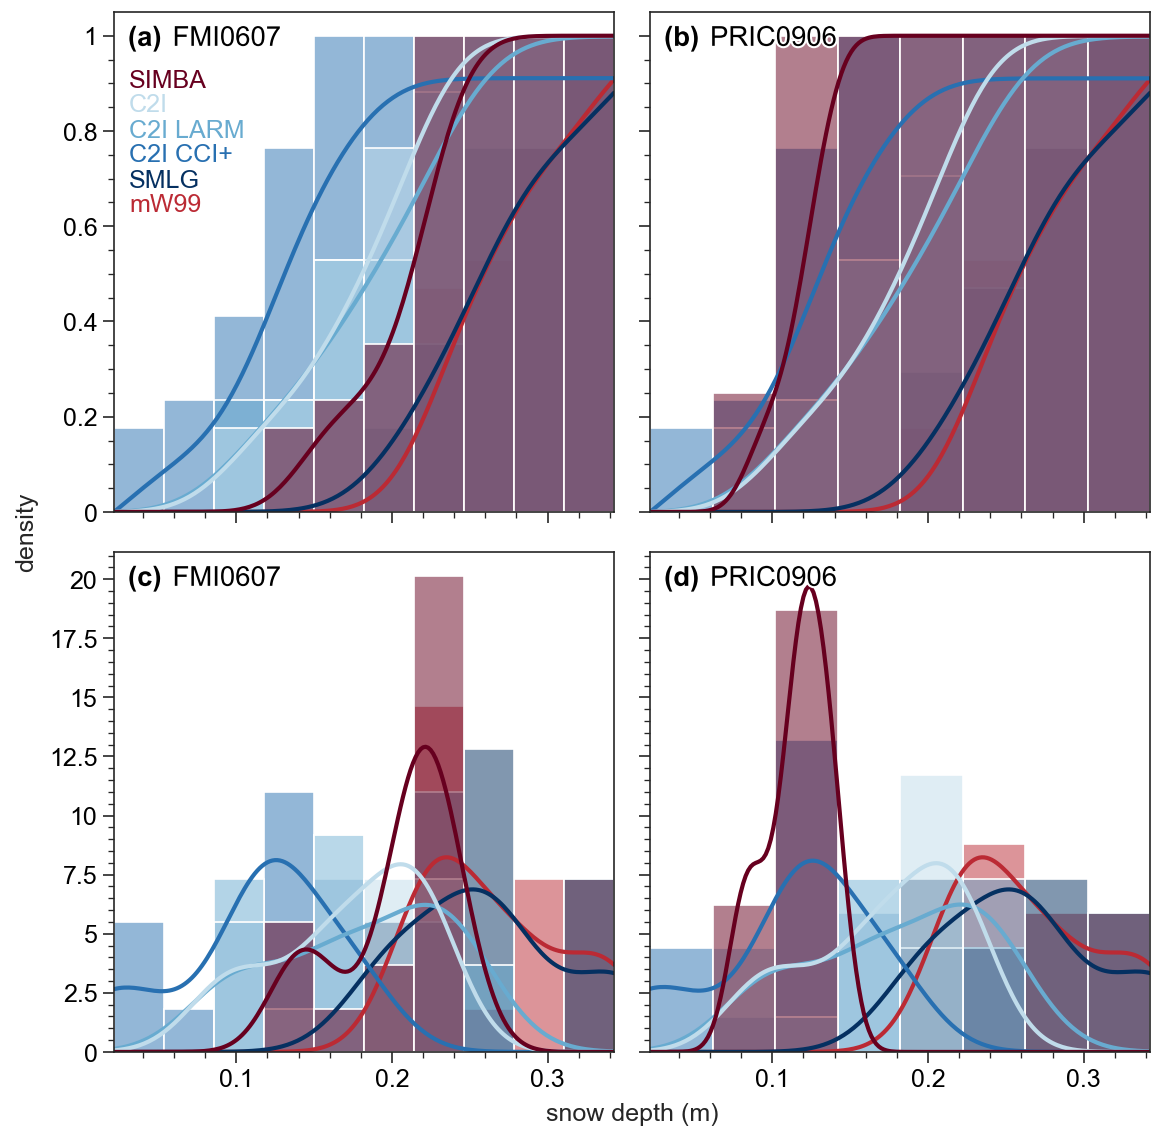

In [698]:
palette_custom ={'snow depth/cm': cmap_qual(0),
          'W99_snow_depth': cmap_qual(1),  
          "snow_depth_CRYO2ICE":cmap_qual(4), 
          "snow_depth_CRYO2ICE_LARM":cmap_qual(5), 
          "snow_depth_CRYO2ICE_CCI":cmap_qual(6), 
          "SMLG_snow_depth":cmap_qual(7), 
          "SMLG_snow_depth_v2":cmap_qual(8)}

fig, axs = pplt.subplots(nrows=2, ncols=2)

coincident_data = df_SIMBA_buoy_1[(df_SIMBA_buoy_1['snow_depth_CRYO2ICE'].notna()) & (df_SIMBA_buoy_1['snow_depth_CRYO2ICE_LARM'].notna()) & (df_SIMBA_buoy_1['snow_depth_CRYO2ICE_CCI'].notna())]
coincident_data=coincident_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'GPSLat', 'GPSLng', 'AMSR2_snow_depth_v2','SMLG_snow_depth_v2'])
sns.histplot(data = coincident_data, cumulative=True,common_norm=False,kde=True, palette=palette_custom, stat='density',ax=axs[0])
axs[0].legend().set_visible(False)
#axs[0].legend(['SIMBA', 'CRYO2ICE (C2I)', 'C2I LARM', 'C2I CCI', 'SMLG v1', 'SMLG v2', 'W99'])
axs[0].text(0.03, 0.85, 'SIMBA', transform=axs[0].transAxes,c=cmap_qual(0))
axs[0].text(0.03, 0.80, 'C2I', transform=axs[0].transAxes,c=cmap_qual(4))
axs[0].text(0.03, 0.75, 'C2I LARM', transform=axs[0].transAxes,c=cmap_qual(5))
axs[0].text(0.03, 0.70, 'C2I CCI+', transform=axs[0].transAxes,c=cmap_qual(6))
axs[0].text(0.03, 0.65, 'SMLG', transform=axs[0].transAxes,c=cmap_qual(7))
#axs[0].text(0.03, 0.60, 'SMLG-HS', transform=axs[0].transAxes,c=cmap_qual(8))
axs[0].text(0.03, 0.60, 'mW99', transform=axs[0].transAxes,c=cmap_qual(1))
axs[0].format(ultitle=df_SIMBA_buoy_1['ID'][0])

coincident_data = df_SIMBA_buoy_2[(df_SIMBA_buoy_2['snow_depth_CRYO2ICE'].notna()) & (df_SIMBA_buoy_2['snow_depth_CRYO2ICE_LARM'].notna()) & (df_SIMBA_buoy_2['snow_depth_CRYO2ICE_CCI'].notna())]
coincident_data=coincident_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'GPSLat', 'GPSLng', 'AMSR2_snow_depth_v2','SMLG_snow_depth_v2'])
sns.histplot(data = coincident_data, cumulative=True,common_norm=False,kde=True, palette=palette_custom, stat='density',ax=axs[1])
axs[1].legend().set_visible(False)
fig.format(xlabel='snow depth (m)', ylabel='density', abc='(a)', abcloc='ul')
axs[1].format(ultitle=df_SIMBA_buoy_2['ID'][0])

palette_custom ={'snow depth/cm': cmap_qual(0),
          'W99_snow_depth': cmap_qual(1),  
          "snow_depth_CRYO2ICE":cmap_qual(4), 
          "snow_depth_CRYO2ICE_LARM":cmap_qual(5), 
          "snow_depth_CRYO2ICE_CCI":cmap_qual(6), 
          "SMLG_snow_depth":cmap_qual(7), 
          "SMLG_snow_depth_v2":cmap_qual(8)}


coincident_data = df_SIMBA_buoy_1[(df_SIMBA_buoy_1['snow_depth_CRYO2ICE'].notna()) & (df_SIMBA_buoy_1['snow_depth_CRYO2ICE_LARM'].notna()) & (df_SIMBA_buoy_1['snow_depth_CRYO2ICE_CCI'].notna())]
coincident_data=coincident_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'GPSLat', 'GPSLng', 'AMSR2_snow_depth_v2','SMLG_snow_depth_v2'])
sns.histplot(data = coincident_data,common_norm=False,kde=True, palette=palette_custom, stat='density',ax=axs[2])
axs[2].legend().set_visible(False)
#axs[0].legend(['SIMBA', 'CRYO2ICE (C2I)', 'C2I LARM', 'C2I CCI', 'SMLG v1', 'SMLG v2', 'W99'])
axs[2].format(ultitle=df_SIMBA_buoy_1['ID'][0])

coincident_data = df_SIMBA_buoy_2[(df_SIMBA_buoy_2['snow_depth_CRYO2ICE'].notna()) & (df_SIMBA_buoy_2['snow_depth_CRYO2ICE_LARM'].notna()) & (df_SIMBA_buoy_2['snow_depth_CRYO2ICE_CCI'].notna())]
coincident_data=coincident_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'GPSLat', 'GPSLng', 'AMSR2_snow_depth_v2','SMLG_snow_depth_v2'])
sns.histplot(data = coincident_data, common_norm=False,kde=True, palette=palette_custom, stat='density',ax=axs[3])
axs[3].legend().set_visible(False)
fig.format(xlabel='snow depth (m)', ylabel='density', abc='(a)', abcloc='ul')
axs[3].format(ultitle=df_SIMBA_buoy_2['ID'][0])
plt.savefig(r'D:\SIMBA_cummulative_comparison.png', transparent=True)

In [700]:
print('Statistics for: '+ str(df_SIMBA_buoy_1['ID'][0]))
coincident_data = df_SIMBA_buoy_1[(df_SIMBA_buoy_1['snow_depth_CRYO2ICE'].notna()) & (df_SIMBA_buoy_1['snow_depth_CRYO2ICE_LARM'].notna()) & (df_SIMBA_buoy_1['snow_depth_CRYO2ICE_CCI'].notna())]
coincident_data=coincident_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'GPSLat', 'GPSLng', 'AMSR2_snow_depth_v2','SMLG_snow_depth_v2'])

print(np.mean(coincident_data['snow depth/cm']-coincident_data['snow_depth_CRYO2ICE']))
print(np.mean(coincident_data['snow depth/cm']-coincident_data['snow_depth_CRYO2ICE_LARM']))
print(np.mean(coincident_data['snow depth/cm']-coincident_data['snow_depth_CRYO2ICE_CCI']))
print(np.mean(coincident_data['snow depth/cm']-coincident_data['SMLG_snow_depth']))
#print(np.mean(coincident_data['snow depth/cm']-coincident_data['SMLG_snow_depth_v2']))
print(np.mean(coincident_data['snow depth/cm']-coincident_data['W99_snow_depth']))

from sklearn.metrics import mean_squared_error
a = coincident_data['snow depth/cm']
b = coincident_data['snow_depth_CRYO2ICE']
fit = linregress(b,a)
print('C2I - Slope: '+ str(fit[0]) + ', intercept: ' + str(fit[1]))
print('RMSE: '+str(mean_squared_error(a,b,squared=False)))

a = coincident_data['snow depth/cm']
b = coincident_data['snow_depth_CRYO2ICE_LARM']
fit = linregress(b,a)
print('C2I LARM - Slope: '+ str(fit[0]) + ', intercept: ' + str(fit[1]))
print('RMSE: '+str(mean_squared_error(a,b,squared=False)))

a = coincident_data['snow depth/cm']
b = coincident_data['snow_depth_CRYO2ICE_CCI']
fit = linregress(b,a)
print('C2I CCI - Slope: '+ str(fit[0]) + ', intercept: ' + str(fit[1]))
print('RMSE: '+str(mean_squared_error(a,b,squared=False)))

a = coincident_data['snow depth/cm']
b = coincident_data['SMLG_snow_depth']
fit = linregress(b,a)
print('SMLG - Slope: '+ str(fit[0]) + ', intercept: ' + str(fit[1]))
print('RMSE: '+str(mean_squared_error(a,b,squared=False)))

#a = coincident_data['snow depth/cm']
#b = coincident_data['SMLG_snow_depth_v2']
#fit = linregress(b,a)
#print('SMLG v2 - Slope: '+ str(fit[0]) + ', intercept: ' + str(fit[1]))
#print('RMSE: '+str(mean_squared_error(a,b,squared=False)))

a = coincident_data['snow depth/cm']
b = coincident_data['W99_snow_depth']
fit = linregress(b,a)
print('W99 - Slope: '+ str(fit[0]) + ', intercept: ' + str(fit[1]))
print('RMSE: '+str(mean_squared_error(a,b,squared=False)))



coincident_data.corr()
#coincident_data.mean()
#coincident_data.std()

Statistics for: FMI0607
0.030536127756108172
0.022326681526122903
0.09087839300760515
-0.05965604287736553
-0.06282352941176471
C2I - Slope: 0.5378946560459555, intercept: 0.1104772487646409
RMSE: 0.044292475981090984
C2I LARM - Slope: 0.4227199606413664, intercept: 0.12693140077014392
RMSE: 0.046118104929313286
C2I CCI - Slope: 0.5132565153594949, intercept: 0.14571054242573928
RMSE: 0.09685914016049241
SMLG - Slope: 0.08718839128471291, intercept: 0.18058269536492788
RMSE: 0.08310630064423885
W99 - Slope: -0.09199887480796001, intercept: 0.22803358265473192
RMSE: 0.08606017046913439


snow depth/cm  snow_depth_CRYO2ICE  \
snow depth/cm                  1.000000             0.713079   
snow_depth_CRYO2ICE            0.713079             1.000000   
snow_depth_CRYO2ICE_LARM       0.655130             0.986707   
snow_depth_CRYO2ICE_CCI        0.735938             0.894116   
SMLG_snow_depth                0.129419            -0.279487   
W99_snow_depth                -0.116947            -0.501563   

                          snow_depth_CRYO2ICE_LARM  snow_depth_CRYO2ICE_CCI  \
snow depth/cm                             0.655130                 0.735938   
snow_depth_CRYO2ICE                       0.986707                 0.894116   
snow_depth_CRYO2ICE_LARM                  1.000000                 0.879607   
snow_depth_CRYO2ICE_CCI                   0.879607                 1.000000   
SMLG_snow_depth                          -0.285780                 0.030311   
W99_snow_depth                           -0.547963                -0.291220   

                          SMLG_snow_depth  W99_snow_depth  
snow depth/cm                    0.129419       -0.116947  
snow_depth_CRYO2ICE             -0.279487       -0.501563  
snow_depth_CRYO2ICE_LARM        -0.285780       -0.547963  
snow_depth_CRYO2ICE_CCI          0.030311       -0.291220  
SMLG_snow_depth                  1.000000        0.837336  
W99_snow_depth                   0.837336        1.000000

In [701]:
print('Statistics for: '+ str(df_SIMBA_buoy_2['ID'][0]))
coincident_data = df_SIMBA_buoy_2[(df_SIMBA_buoy_2['snow depth/cm'].notna())&(df_SIMBA_buoy_2['snow_depth_CRYO2ICE'].notna()) & (df_SIMBA_buoy_2['snow_depth_CRYO2ICE_LARM'].notna()) & (df_SIMBA_buoy_2['snow_depth_CRYO2ICE_CCI'].notna())]
coincident_data=coincident_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'GPSLat', 'GPSLng', 'AMSR2_snow_depth_v2','SMLG_snow_depth_v2'])

print(np.mean(coincident_data['snow depth/cm']-coincident_data['snow_depth_CRYO2ICE']))
print(np.mean(coincident_data['snow depth/cm']-coincident_data['snow_depth_CRYO2ICE_LARM']))
print(np.mean(coincident_data['snow depth/cm']-coincident_data['snow_depth_CRYO2ICE_CCI']))
print(np.mean(coincident_data['snow depth/cm']-coincident_data['SMLG_snow_depth']))
#print(np.mean(coincident_data['snow depth/cm']-coincident_data['SMLG_snow_depth_v2']))
print(np.mean(coincident_data['snow depth/cm']-coincident_data['W99_snow_depth']))

from sklearn.metrics import mean_squared_error
a = coincident_data['snow depth/cm']
b = coincident_data['snow_depth_CRYO2ICE']
fit = linregress(b,a)
print('C2I - Slope: '+ str(fit[0]) + ', intercept: ' + str(fit[1]))
print('RMSE: '+str(mean_squared_error(a,b,squared=False)))

a = coincident_data['snow depth/cm']
b = coincident_data['snow_depth_CRYO2ICE_LARM']
fit = linregress(b,a)
print('C2I LARM - Slope: '+ str(fit[0]) + ', intercept: ' + str(fit[1]))
print('RMSE: '+str(mean_squared_error(a,b,squared=False)))

a = coincident_data['snow depth/cm']
b = coincident_data['snow_depth_CRYO2ICE_CCI']
fit = linregress(b,a)
print('C2I CCI - Slope: '+ str(fit[0]) + ', intercept: ' + str(fit[1]))
print('RMSE: '+str(mean_squared_error(a,b,squared=False)))

a = coincident_data['snow depth/cm']
b = coincident_data['SMLG_snow_depth']
fit = linregress(b,a)
print('SMLG - Slope: '+ str(fit[0]) + ', intercept: ' + str(fit[1]))
print('RMSE: '+str(mean_squared_error(a,b,squared=False)))

#a = coincident_data['snow depth/cm']
#b = coincident_data['SMLG_snow_depth_v2']
#fit = linregress(b,a)
#print('SMLG v2 - Slope: '+ str(fit[0]) + ', intercept: ' + str(fit[1]))
#print('RMSE: '+str(mean_squared_error(a,b,squared=False)))

a = coincident_data['snow depth/cm']
b = coincident_data['W99_snow_depth']
fit = linregress(b,a)
print('W99 - Slope: '+ str(fit[0]) + ', intercept: ' + str(fit[1]))
print('RMSE: '+str(mean_squared_error(a,b,squared=False)))

coincident_data.corr()
#coincident_data.mean()
#coincident_data.std()

Statistics for: PRIC0906
-0.05738262673390422
-0.06595773756212146
0.004098365625206112
-0.1422785951569676
-0.146125
C2I - Slope: 0.01954520282254041, intercept: 0.11254992296975744
RMSE: 0.07608528647081524
C2I LARM - Slope: 0.0021434755411346967, intercept: 0.1155476120072367
RMSE: 0.0878767159399751
C2I CCI - Slope: -0.014824797651871112, intercept: 0.11759549253666673
RMSE: 0.05516018630560359
SMLG - Slope: -0.0648615119553866, intercept: 0.1326857863430969
RMSE: 0.1525235935740273
W99 - Slope: 0.06388073483780289, intercept: 0.09919675492656828
RMSE: 0.15235402849941318


snow depth/cm  snow_depth_CRYO2ICE  \
snow depth/cm                  1.000000             0.049064   
snow_depth_CRYO2ICE            0.049064             1.000000   
snow_depth_CRYO2ICE_LARM       0.006274             0.987297   
snow_depth_CRYO2ICE_CCI       -0.040150             0.898888   
SMLG_snow_depth               -0.167526            -0.284394   
W99_snow_depth                 0.141090            -0.526520   

                          snow_depth_CRYO2ICE_LARM  snow_depth_CRYO2ICE_CCI  \
snow depth/cm                             0.006274                -0.040150   
snow_depth_CRYO2ICE                       0.987297                 0.898888   
snow_depth_CRYO2ICE_LARM                  1.000000                 0.886754   
snow_depth_CRYO2ICE_CCI                   0.886754                 1.000000   
SMLG_snow_depth                          -0.286692                 0.009602   
W99_snow_depth                           -0.571843                -0.340698   

                          SMLG_snow_depth  W99_snow_depth  
snow depth/cm                   -0.167526        0.141090  
snow_depth_CRYO2ICE             -0.284394       -0.526520  
snow_depth_CRYO2ICE_LARM        -0.286692       -0.571843  
snow_depth_CRYO2ICE_CCI          0.009602       -0.340698  
SMLG_snow_depth                  1.000000        0.808131  
W99_snow_depth                   0.808131        1.000000

In [702]:
print('Statistics for: '+ str(df_SIMBA_buoy_3['ID'][0]))
#coincident_data = df_SIMBA_buoy_3[(df_SIMBA_buoy_3['snow depth/cm'].notna())&(df_SIMBA_buoy_3['snow_depth_CRYO2ICE'].notna()) & (df_SIMBA_buoy_2['snow_depth_CRYO2ICE_LARM'].notna()) & (df_SIMBA_buoy_2['snow_depth_CRYO2ICE_CCI'].notna())]
coincident_data = df_SIMBA_buoy_3.dropna()
coincident_data=coincident_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'GPSLat', 'GPSLng', 'AMSR2_snow_depth_v2','SMLG_snow_depth_v2'])


print(np.mean(coincident_data['snow depth/cm']-coincident_data['snow_depth_CRYO2ICE']))
print(np.mean(coincident_data['snow depth/cm']-coincident_data['snow_depth_CRYO2ICE_LARM']))
print(np.mean(coincident_data['snow depth/cm']-coincident_data['snow_depth_CRYO2ICE_CCI']))
print(np.mean(coincident_data['snow depth/cm']-coincident_data['SMLG_snow_depth']))
#print(np.mean(coincident_data['snow depth/cm']-coincident_data['SMLG_snow_depth_v2']))
print(np.mean(coincident_data['snow depth/cm']-coincident_data['W99_snow_depth']))

from sklearn.metrics import mean_squared_error
a = coincident_data['snow depth/cm']
b = coincident_data['snow_depth_CRYO2ICE']
fit = linregress(b,a)
print('C2I - Slope: '+ str(fit[0]) + ', intercept: ' + str(fit[1]))
print('RMSE: '+str(mean_squared_error(a,b,squared=False)))

a = coincident_data['snow depth/cm']
b = coincident_data['snow_depth_CRYO2ICE_LARM']
fit = linregress(b,a)
print('C2I LARM - Slope: '+ str(fit[0]) + ', intercept: ' + str(fit[1]))
print('RMSE: '+str(mean_squared_error(a,b,squared=False)))

a = coincident_data['snow depth/cm']
b = coincident_data['snow_depth_CRYO2ICE_CCI']
fit = linregress(b,a)
print('C2I CCI - Slope: '+ str(fit[0]) + ', intercept: ' + str(fit[1]))
print('RMSE: '+str(mean_squared_error(a,b,squared=False)))

a = coincident_data['snow depth/cm']
b = coincident_data['SMLG_snow_depth']
fit = linregress(b,a)
print('SMLG - Slope: '+ str(fit[0]) + ', intercept: ' + str(fit[1]))
print('RMSE: '+str(mean_squared_error(a,b,squared=False)))

#a = coincident_data['snow depth/cm']
#b = coincident_data['SMLG_snow_depth_v2']
#fit = linregress(b,a)
#print('SMLG v2 - Slope: '+ str(fit[0]) + ', intercept: ' + str(fit[1]))
#print('RMSE: '+str(mean_squared_error(a,b,squared=False)))

a = coincident_data['snow depth/cm']
b = coincident_data['W99_snow_depth']
fit = linregress(b,a)
print('W99 - Slope: '+ str(fit[0]) + ', intercept: ' + str(fit[1]))
print('RMSE: '+str(mean_squared_error(a,b,squared=False)))

coincident_data.corr()
#coincident_data.mean()
#coincident_data.std()

Statistics for: COMBINED
-0.01456174813767786
-0.023326596703971365
0.046801074083568595
-0.0996223451569676
-0.10346875
C2I - Slope: 0.277339125712443, intercept: 0.11057095553419387
RMSE: 0.039425370213485605
C2I LARM - Slope: 0.21654678218721, intercept: 0.11919948430687338
RMSE: 0.051057374131812605
C2I CCI - Slope: 0.24247003166328668, intercept: 0.13148737633081933
RMSE: 0.062251453981604594
SMLG - Slope: -0.021875381850905703, intercept: 0.1642423256816085
RMSE: 0.11284938976415596
W99 - Slope: -0.07056303314103102, intercept: 0.17708567487252144
RMSE: 0.11411459426821795


snow depth/cm_x  GPSLat_x  GPSLng_x  \
snow depth/cm_x                  1.000000  0.195330 -0.037637   
GPSLat_x                         0.195330  1.000000  0.808453   
GPSLng_x                        -0.037637  0.808453  1.000000   
snow depth/cm_y                 -0.108517 -0.257542 -0.082523   
GPSLat_y                         0.197347  0.999971  0.808453   
GPSLng_y                        -0.034801  0.808382  0.999989   
snow depth/cm                    0.405191 -0.138212 -0.094900   
snow_depth_CRYO2ICE              0.046055  0.088831  0.288994   
snow_depth_CRYO2ICE_LARM         0.006055  0.101217  0.334589   
snow_depth_CRYO2ICE_CCI         -0.040213 -0.310365  0.018123   
SMLG_snow_depth                 -0.167526 -0.850320 -0.903160   
W99_snow_depth                   0.141090 -0.557352 -0.913269   

                          snow depth/cm_y  GPSLat_y  GPSLng_y  snow depth/cm  \
snow depth/cm_x                 -0.108517  0.197347 -0.034801       0.405191   
GPSLat_x                        -0.257542  0.999971  0.808382      -0.138212   
GPSLng_x                        -0.082523  0.808453  0.999989      -0.094900   
snow depth/cm_y                  1.000000 -0.261437 -0.082800       0.864863   
GPSLat_y                        -0.261437  1.000000  0.808394      -0.140775   
GPSLng_y                        -0.082800  0.808394  1.000000      -0.093722   
snow depth/cm                    0.864863 -0.140775 -0.093722       1.000000   
snow_depth_CRYO2ICE              0.740285  0.088864  0.289038       0.704070   
snow_depth_CRYO2ICE_LARM         0.692242  0.101591  0.334509       0.639687   
snow_depth_CRYO2ICE_CCI          0.743630 -0.309823  0.018287       0.663582   
SMLG_snow_depth                  0.029940 -0.849633 -0.903627      -0.057064   
W99_snow_depth                  -0.248628 -0.556427 -0.913188      -0.157405   

                          snow_depth_CRYO2ICE  snow_depth_CRYO2ICE_LARM  \
snow depth/cm_x                      0.046055                  0.006055   
GPSLat_x                             0.088831                  0.101217   
GPSLng_x                             0.288994                  0.334589   
snow depth/cm_y                      0.740285                  0.692242   
GPSLat_y                             0.088864                  0.101591   
GPSLng_y                             0.289038                  0.334509   
snow depth/cm                        0.704070                  0.639687   
snow_depth_CRYO2ICE                  1.000000                  0.988015   
snow_depth_CRYO2ICE_LARM             0.988015                  1.000000   
snow_depth_CRYO2ICE_CCI              0.898237                  0.887512   
SMLG_snow_depth                     -0.287500                 -0.287403   
W99_snow_depth                      -0.529844                 -0.572500   

                          snow_depth_CRYO2ICE_CCI  SMLG_snow_depth  \
snow depth/cm_x                         -0.040213        -0.167526   
GPSLat_x                                -0.310365        -0.850320   
GPSLng_x                                 0.018123        -0.903160   
snow depth/cm_y                          0.743630         0.029940   
GPSLat_y                                -0.309823        -0.849633   
GPSLng_y                                 0.018287        -0.903627   
snow depth/cm                            0.663582        -0.057064   
snow_depth_CRYO2ICE                      0.898237        -0.287500   
snow_depth_CRYO2ICE_LARM                 0.887512        -0.287403   
snow_depth_CRYO2ICE_CCI                  1.000000         0.009750   
SMLG_snow_depth                          0.009750         1.000000   
W99_snow_depth                          -0.340714         0.808131   

                          W99_snow_depth  
snow depth/cm_x                 0.141090  
GPSLat_x                       -0.557352  
GPSLng_x                       -0.913269  
snow depth/cm_y                -0.248628  
GPSLat_y                       -0.556

In [693]:
coincident_data

snow depth/cm_x                 datetime   GPSLat_x   GPSLng_x  \
71              13.5  2020-11-29 00:00:00.000  87.963074   9.729487   
72              12.0  2020-11-30 00:00:00.000  87.838905   8.129752   
73              12.5  2020-12-01 00:00:00.000  87.729572   8.257219   
74              13.5  2020-12-02 00:00:00.000  87.634636   7.634528   
86              11.5  2020-12-14 00:00:00.000  87.064767   3.876230   
87               8.5  2020-12-15 00:00:00.000  87.029835   3.273744   
88               8.0  2020-12-16 00:00:00.000  86.951501   3.956495   
89              12.5  2020-12-17 00:00:00.000  86.928723   3.715450   
95              11.0  2020-12-23 00:00:00.000  87.048062  -1.943385   
105              8.5  2021-01-02 00:00:00.000  87.443005  -0.830597   
106             11.5  2021-01-03 00:00:00.000  87.431922   0.985393   
107             12.5  2021-01-04 00:00:00.000  87.310803  -1.007371   
108             14.0  2021-01-05 00:00:00.000  87.085575  -3.119596   
139             12.0  2021-02-05 00:00:00.000  86.553269 -26.300231   
140             14.0  2021-02-06 00:00:00.000  86.557146 -26.288686   
141             10.0  2021-02-07 00:00:00.000  86.556932 -26.611734   

     snow depth/cm_y                 SendTime   GPSLat_y   GPSLng_y  \
71              22.0  2020-11-29 10:02:34.996  87.962837   9.813054   
72              22.0  2020-11-30 10:01:47.001  87.838938   8.130888   
73              20.0  2020-12-01 10:01:48.996  87.728693   8.277365   
74              20.0  2020-12-02 10:02:29.000  87.634150   7.652220   
86              24.0  2020-12-14 10:02:34.002  87.063092   3.914963   
87              22.0  2020-12-15 10:02:50.004  87.029457   3.285816   
88              22.0  2020-12-16 10:02:18.001  86.951519   3.936893   
89              24.0  2020-12-17 10:02:15.003  86.926543   3.750257   
95              22.0  2020-12-23 10:03:43.001  87.038934  -1.880000   
105             16.0  2021-01-02 10:02:22.001  87.439750  -0.975979   
106             14.0  2021-01-03 10:02:00.997  87.431150   1.024178   
107             14.0  2021-01-04 10:02:07.996  87.316250  -0.874426   
108             14.0  2021-01-05 10:01:49.999  87.092482  -3.050759   
139             22.0  2021-02-05 10:02:54.004  86.551812 -26.311172   
140             22.0  2021-02-06 10:02:23.997  86.554422 -26.234710   
141             22.0  2021-02-07 10:01:48.996  86.555075 -26.577313   

     snow depth/cm    ID  snow_depth_CRYO2ICE  snow_depth_CRYO2ICE_LARM  \
71          0.1775  COMB             0.212923                  0.220182   
72          0.1700  COMB             0.211909                  0.218016   
73          0.1625  COMB             0.212840                  0.221852   
74          0.1675  COMB             0.203350                  0.225941   
86          0.1775  COMB             0.220423                  0.249607   
87          0.1525  COMB             0.220423                  0.249607   
88          0.1500  COMB             0.216952                  0.231602   
89          0.1825  COMB             0.215261                  0.231998   
95          0.1650  COMB             0.117719                  0.102627   
105         0.1225  COMB             0.094109                  0.098285   
106         0.1275  COMB             0.095935                  0.101323   
107         0.1325  COMB             0.094109                  0.098285   
108         0.1400  COMB             0.153788                  0.156413   
139         0.1700  COMB             0.165499                  0.166927   
140         0.1800  COMB             0.165499                  0.166927   
141         0.1600  COMB             0.169748                  0.171133   

     snow_depth_CRYO2ICE_CCI  SMLG_snow_depth  W99_snow_depth sensor  
71                  0.119081         0.194898           0.238   buoy  
72                  0.115613         0.194898           0.238   buoy  
73                  0.115524         0.214258           0.238   buoy  
74                  0.113791 

# Snow density uncertainty simulation 

"\naxs[3].plot(sden_change,(t_change_sw-t_change_const_sw)*100, c=cmap_qual(0), label='$\\Delta$fb = 0.1 m, fb = 0.1 m')\naxs[3].plot(sden_change,(t_change_sw-t_change2_const_sw)*100, c=cmap_qual(1), label='$\\Delta$fb = 0.2 m, fb = 0.2 m')\naxs[3].plot(sden_change,(t_change_sw-t_change3_const_sw)*100, c=cmap_qual(2), label='$\\Delta$fb = 0.3 m, fb = 0.3 m')\naxs[3].plot(sden_change,(t_change_sw-t_change4_const_sw)*100, c='red', label='$\\Delta$fb = 0.4 m, fb = 0.4 m')\nfig.format(xlabel='snow density (kg/m$^{3}$)', abc='(a)', abcloc='ul' )\naxs[2].format(ylabel='$\\Delta$sea ice thickness (cm): variable-const.' )\naxs[3].format(ylabel='')\n"

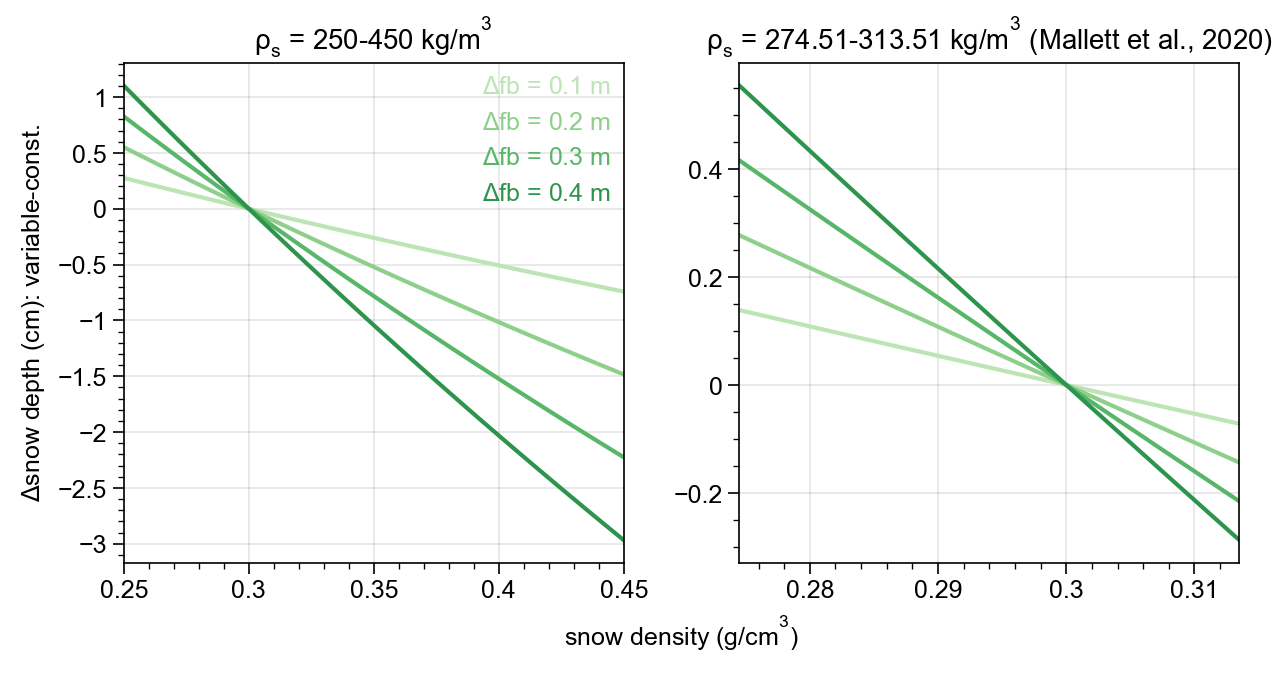

In [14]:
fig, axs = pplt.subplots(nrows=1, ncols=2, sharey=False)

rfb_change = np.full(100, 0.10)
rfb_change2 = np.full(100, 0.20)
rfb_change3 = np.full(100, 0.30)
rfb_change4 = np.full(100, 0.40)

sden_change = np.linspace(0.25, 0.45,100)
sden_change_const = np.full(100, 0.3)
ns = (1+0.51*sden_change)**(1.5)
ns_const = (1+0.51*sden_change_const)**(1.5)
snow_depth = (rfb_change/ns)
snow_depth2 = (rfb_change2/ns)
snow_depth3 = (rfb_change3/ns)
snow_depth4 = (rfb_change4/ns)
snow_depth_const = (rfb_change/ns_const)
snow_depth2_const = (rfb_change2/ns_const)
snow_depth3_const = (rfb_change3/ns_const)
snow_depth4_const = (rfb_change4/ns_const)

ns = (1+0.51*sden_change)**(-1.5)
ns_const = (1+0.51*sden_change_const)**(-1.5)
c = 3e+6
cs = c*ns
rfb_change_sw = rfb_change+((c/cs)-1)*snow_depth
rfb_change2_sw = rfb_change+((c/cs)-1)*snow_depth2
rfb_change3_sw = rfb_change+((c/cs)-1)*snow_depth3
rfb_change4_sw = rfb_change+((c/cs)-1)*snow_depth4
rho_w, rho_i = 1024, 900
t_change_sw = (rho_w/(rho_w-rho_i))*rfb_change_sw+(sden_change/(rho_w-rho_i))*snow_depth
t_change2_sw = (rho_w/(rho_w-rho_i))*rfb_change2_sw+(sden_change/(rho_w-rho_i))*snow_depth2
t_change3_sw = (rho_w/(rho_w-rho_i))*rfb_change3_sw+(sden_change/(rho_w-rho_i))*snow_depth3
t_change4_sw = (rho_w/(rho_w-rho_i))*rfb_change4_sw+(sden_change/(rho_w-rho_i))*snow_depth4
cs = c*ns_const
rfb_change_const_sw = rfb_change+((c/cs)-1)*snow_depth_const
rfb_change2_const_sw = rfb_change+((c/cs)-1)*snow_depth2_const
rfb_change3_const_sw = rfb_change+((c/cs)-1)*snow_depth3_const
rfb_change4_const_sw = rfb_change+((c/cs)-1)*snow_depth4_const
rho_w, rho_i = 1024, 900
t_change_const_sw = (rho_w/(rho_w-rho_i))*rfb_change_const_sw+(sden_change/(rho_w-rho_i))*snow_depth_const
t_change2_const_sw = (rho_w/(rho_w-rho_i))*rfb_change2_const_sw+(sden_change/(rho_w-rho_i))*snow_depth2_const
t_change3_const_sw = (rho_w/(rho_w-rho_i))*rfb_change3_const_sw+(sden_change/(rho_w-rho_i))*snow_depth3_const
t_change4_const_sw = (rho_w/(rho_w-rho_i))*rfb_change4_const_sw+(sden_change/(rho_w-rho_i))*snow_depth4_const



axs[0].plot(sden_change,(snow_depth-snow_depth_const)*100, c=cmap_qual3(2), label='$\Delta$fb = 0.1 m')
axs[0].plot(sden_change,(snow_depth2-snow_depth2_const)*100, c=cmap_qual3(3), label='$\Delta$fb = 0.2 m')
axs[0].plot(sden_change,(snow_depth3-snow_depth3_const)*100, c=cmap_qual3(4), label='$\Delta$fb = 0.3 m')
axs[0].plot(sden_change,(snow_depth4-snow_depth4_const)*100, c=cmap_qual3(5), label='$\Delta$fb = 0.4 m')
axs[0].legend(ncol=1, handlelength=0, labelcolor='linecolor', frame=False)
fig.format(xlabel='snow density (g/cm$^{3}$)', ylabel='$\Delta$snow depth (cm): variable-const.' )

'''
axs[2].plot(sden_change,(t_change_sw-t_change_const_sw)*100, c=cmap_qual(0), label='$\Delta$fb = 0.1 m, fb = 0.1 m')
axs[2].plot(sden_change,(t_change_sw-t_change2_const_sw)*100, c=cmap_qual(1), label='$\Delta$fb = 0.2 m, fb = 0.2 m')
axs[2].plot(sden_change,(t_change_sw-t_change3_const_sw)*100, c=cmap_qual(2), label='$\Delta$fb = 0.3 m, fb = 0.3 m')
axs[2].plot(sden_change,(t_change_sw-t_change4_const_sw)*100, c='red', label='$\Delta$fb = 0.4 m, fb = 0.4 m')
axs[2].legend(ncol=1, handlelength=0, labelcolor='linecolor', frame=False)
fig.format(xlabel='snow density (kg/m$^{3}$)', abc='(a)', abcloc='ul' )
'''
axs[0].format(ylabel='$\Delta$snow depth (cm): variable-const.', title=r'$\rho_s$ = 250-450 kg/m$^3$' )
axs[1].format(ylabel='', title=r'$\rho_s$ = 274.51-313.51 kg/m$^3$ (Mallett et al., 2020)')

sden_change = np.linspace((6.50*0+274.51)/1000, (6.50*6+274.51)/1000,100)
sden_change_const = np.full(100, 0.3)
ns = (1+0.51*sden_change)**(1.5)
ns_const = (1+0.51*sden_change_const)**(1.5)
snow_depth = (rfb_change/ns)
snow_depth2 = (rfb_change2/ns)
snow_depth3 = (rfb_change3/ns)
snow_depth4 = (rfb_change4/ns)
snow_depth_const = (rfb_change/ns_const)
snow_depth2_const = (rfb_change2/ns_const)
snow_depth3_const = (rfb_change3/ns_const)
snow_depth4_const = (rfb_change4/ns_const)

ns = (1+0.51*sden_change)**(-1.5)
ns_const = (1+0.51*sden_change_const)**(-1.5)
c = 3e+6
cs = c*ns
rfb_change_sw = rfb_change+((c/cs)-1)*snow_depth
rfb_change2_sw = rfb_change+((c/cs)-1)*snow_depth2
rfb_change3_sw = rfb_change+((c/cs)-1)*snow_depth3
rfb_change4_sw = rfb_change+((c/cs)-1)*snow_depth4
rho_w, rho_i = 1024, 900
t_change_sw = (rho_w/(rho_w-rho_i))*rfb_change_sw+(sden_change/(rho_w-rho_i))*snow_depth
t_change2_sw = (rho_w/(rho_w-rho_i))*rfb_change2_sw+(sden_change/(rho_w-rho_i))*snow_depth2
t_change3_sw = (rho_w/(rho_w-rho_i))*rfb_change3_sw+(sden_change/(rho_w-rho_i))*snow_depth3
t_change4_sw = (rho_w/(rho_w-rho_i))*rfb_change4_sw+(sden_change/(rho_w-rho_i))*snow_depth4
cs = c*ns_const
rfb_change_const_sw = rfb_change+((c/cs)-1)*snow_depth_const
rfb_change2_const_sw = rfb_change+((c/cs)-1)*snow_depth2_const
rfb_change3_const_sw = rfb_change+((c/cs)-1)*snow_depth3_const
rfb_change4_const_sw = rfb_change+((c/cs)-1)*snow_depth4_const
rho_w, rho_i = 1024, 900
t_change_const_sw = (rho_w/(rho_w-rho_i))*rfb_change_const_sw+(sden_change/(rho_w-rho_i))*snow_depth_const
t_change2_const_sw = (rho_w/(rho_w-rho_i))*rfb_change2_const_sw+(sden_change/(rho_w-rho_i))*snow_depth2_const
t_change3_const_sw = (rho_w/(rho_w-rho_i))*rfb_change3_const_sw+(sden_change/(rho_w-rho_i))*snow_depth3_const
t_change4_const_sw = (rho_w/(rho_w-rho_i))*rfb_change4_const_sw+(sden_change/(rho_w-rho_i))*snow_depth4_const


axs[1].plot(sden_change,(snow_depth-snow_depth_const)*100, c=cmap_qual3(2), label='$\Delta$fb = 0.1 m')
axs[1].plot(sden_change,(snow_depth2-snow_depth2_const)*100, c=cmap_qual3(3), label='$\Delta$fb = 0.2 m')
axs[1].plot(sden_change,(snow_depth3-snow_depth3_const)*100, c=cmap_qual3(4), label='$\Delta$fb = 0.3 m')
axs[1].plot(sden_change,(snow_depth4-snow_depth4_const)*100, c=cmap_qual3(5), label='$\Delta$fb = 0.4 m')
#axs[1].legend(ncol=1, handlelength=0, labelcolor='linecolor', frame=False)


'''
axs[3].plot(sden_change,(t_change_sw-t_change_const_sw)*100, c=cmap_qual(0), label='$\Delta$fb = 0.1 m, fb = 0.1 m')
axs[3].plot(sden_change,(t_change_sw-t_change2_const_sw)*100, c=cmap_qual(1), label='$\Delta$fb = 0.2 m, fb = 0.2 m')
axs[3].plot(sden_change,(t_change_sw-t_change3_const_sw)*100, c=cmap_qual(2), label='$\Delta$fb = 0.3 m, fb = 0.3 m')
axs[3].plot(sden_change,(t_change_sw-t_change4_const_sw)*100, c='red', label='$\Delta$fb = 0.4 m, fb = 0.4 m')
fig.format(xlabel='snow density (kg/m$^{3}$)', abc='(a)', abcloc='ul' )
axs[2].format(ylabel='$\Delta$sea ice thickness (cm): variable-const.' )
axs[3].format(ylabel='')
'''

# AWI raw vs processed data

In [ ]:
path_AWI = r'E:\DTU\CRYO2ICE\AWI_buoy'
#'''
folder_AWI = '2020S108'
filename_AWI = '2020S108_300234066081170_proc.csv'
filename_AWI2 = '2020S108_300234066081170_raw+filterflag.csv'
init_sd_1, init_sd_2,init_sd_3,init_sd_4 = 0,0,0,0 # metres
#'''
'''
folder_AWI = '2020S107'
filename_AWI = '2020S107_300234066081140_proc.csv'
init_sd_1, init_sd_2,init_sd_3,init_sd_4 = np.nan, np.nan, np.nan, np.nan # metres
'''
'''
folder_AWI = '2020S106'
filename_AWI = '2020S106_300234066083120_proc.csv'
init_sd_1, init_sd_2,init_sd_3,init_sd_4 = 0,0,0,0 # metres
'''
'''
folder_AWI = '2020S105'
filename_AWI = '2020S105_300234066080130_proc.csv'
init_sd_1, init_sd_2,init_sd_3,init_sd_4 = 0.03,np.nan,0.02,0.04 # metres
'''
'''
folder_AWI = '2020S98'
filename_AWI = '2020S98_300234066087160_proc.csv'
init_sd_1, init_sd_2,init_sd_3,init_sd_4 = 0, 0, 0, 0 # metres
'''
df_AWI_buoy = pd.read_csv(path_AWI+'/' + folder_AWI + '/'+filename_AWI)
df_AWI_buoy["datetime"] = pd.to_datetime(df_AWI_buoy["time"])

df_AWI_buoy2 = pd.read_csv(path_AWI+'/' + folder_AWI + '/'+filename_AWI2)
df_AWI_buoy2["datetime"] = pd.to_datetime(df_AWI_buoy2["time"])

In [ ]:
import seaborn as sns
import proplot as pplt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import linregress
pplt.rc.update(grid=True,gridminor=False)
pplt.rc['tick.linewidth'] = 1
#sns.set_style(style="ticks")
fig, axs = pplt.subplots([[1],[2], [3], [4], [5]],refwidth=6, refheight=1.5,share=True, span=True)
#fig, ax = plt.subplots(4,1, figsize=(10,10),constrained_layout=True)

### subplot A
path_AWI = r'E:\DTU\CRYO2ICE\AWI_buoy'
#'''
folder_AWI = '2020S108'
filename_AWI = '2020S108_300234066081170_proc.csv'
filename_AWI2 = '2020S108_300234066081170_raw+filterflag.csv'

df_AWI_buoy = pd.read_csv(path_AWI+'/' + folder_AWI + '/'+filename_AWI)
df_AWI_buoy["datetime"] = pd.to_datetime(df_AWI_buoy["time"])

df_AWI_buoy2 = pd.read_csv(path_AWI+'/' + folder_AWI + '/'+filename_AWI2)
df_AWI_buoy2["datetime"] = pd.to_datetime(df_AWI_buoy2["time"])

df_AWI_buoy2['ID']='RAW'
df_AWI_buoy['ID']='FILT'

palette_custom ={'RAW': cmap_qual_green(1),
          "FILT": cmap_qual(5)}

size_plot=1
axes=axs[0]
sns.scatterplot(data=df_AWI_buoy2,x='datetime', y='distance_to_initial_snow_ice_interface_1 (m)',ax=axes, hue="ID",palette = palette_custom,legend="full",linewidth=0, s=size_plot,zorder=-1)
sns.scatterplot(data=df_AWI_buoy,x='datetime', y='distance_to_initial_snow_ice_interface_1 (m)',ax=axes, hue='ID', palette = palette_custom,legend="full",linewidth=0, s=size_plot)

palette_custom ={'RAW': cmap_qual_green(1),
          "FILT": cmap_qual(6)}

sns.scatterplot(data=df_AWI_buoy2,x='datetime', y='distance_to_initial_snow_ice_interface_2 (m)',ax=axes, hue="ID", palette = palette_custom,legend="full",linewidth=0, s=size_plot,zorder=-1)
sns.scatterplot(data=df_AWI_buoy,x='datetime', y='distance_to_initial_snow_ice_interface_2 (m)',ax=axes, hue='ID', palette = palette_custom,legend="full",linewidth=0, s=size_plot)

palette_custom ={'RAW': cmap_qual_green(1),
          "FILT": cmap_qual(7)}

sns.scatterplot(data=df_AWI_buoy2,x='datetime', y='distance_to_initial_snow_ice_interface_3 (m)',ax=axes, hue="ID", palette = palette_custom,legend="full",linewidth=0, s=size_plot,zorder=-1)
sns.scatterplot(data=df_AWI_buoy,x='datetime', y='distance_to_initial_snow_ice_interface_3 (m)',ax=axes, hue='ID', palette = palette_custom,legend="full",linewidth=0, s=size_plot)

palette_custom ={'RAW': cmap_qual_green(1),
          "FILT": cmap_qual(4)}

sns.scatterplot(data=df_AWI_buoy2,x='datetime', y='distance_to_initial_snow_ice_interface_4 (m)',ax=axes, hue="ID", palette = palette_custom,legend="full",linewidth=0, s=size_plot,zorder=-1)
sns.scatterplot(data=df_AWI_buoy,x='datetime', y='distance_to_initial_snow_ice_interface_4 (m)',ax=axes, hue='ID', palette = palette_custom,legend="full",linewidth=0, s=size_plot)
axs[0].format(ultitle=folder_AWI)

### SUBPLOT B) 

path_AWI = r'E:\DTU\CRYO2ICE\AWI_buoy'
#'''
folder_AWI = '2020S107'
filename_AWI = '2020S107_300234066081140_proc.csv'
filename_AWI2 = '2020S107_300234066081140_raw+filterflag.csv'

df_AWI_buoy = pd.read_csv(path_AWI+'/' + folder_AWI + '/'+filename_AWI)
df_AWI_buoy["datetime"] = pd.to_datetime(df_AWI_buoy["time"])

df_AWI_buoy2 = pd.read_csv(path_AWI+'/' + folder_AWI + '/'+filename_AWI2)
df_AWI_buoy2["datetime"] = pd.to_datetime(df_AWI_buoy2["time"])

df_AWI_buoy2['ID']='RAW'
df_AWI_buoy['ID']='FILT'

palette_custom ={'RAW': cmap_qual_green(1),
          "FILT": cmap_qual(4)}

axes=axs[1]
sns.scatterplot(data=df_AWI_buoy2,x='datetime', y='distance_to_initial_snow_ice_interface_1 (m)',ax=axes, hue="ID",palette = palette_custom,legend="full",linewidth=0, s=size_plot,zorder=-1)
sns.scatterplot(data=df_AWI_buoy,x='datetime', y='distance_to_initial_snow_ice_interface_1 (m)',ax=axes, hue='ID', palette = palette_custom,legend="full",linewidth=0, s=size_plot)

palette_custom ={'RAW': cmap_qual_green(1),
          "FILT": cmap_qual(5)}

sns.scatterplot(data=df_AWI_buoy2,x='datetime', y='distance_to_initial_snow_ice_interface_2 (m)',ax=axes, hue="ID", palette = palette_custom,legend="full",linewidth=0, s=size_plot,zorder=-1)
sns.scatterplot(data=df_AWI_buoy,x='datetime', y='distance_to_initial_snow_ice_interface_2 (m)',ax=axes, hue='ID', palette = palette_custom,legend="full",linewidth=0, s=size_plot)

palette_custom ={'RAW': cmap_qual_green(1),
          "FILT": cmap_qual(6)}

sns.scatterplot(data=df_AWI_buoy2,x='datetime', y='distance_to_initial_snow_ice_interface_3 (m)',ax=axes, hue="ID", palette = palette_custom,legend="full",linewidth=0, s=size_plot,zorder=-1)
sns.scatterplot(data=df_AWI_buoy,x='datetime', y='distance_to_initial_snow_ice_interface_3 (m)',ax=axes, hue='ID', palette = palette_custom,legend="full",linewidth=0, s=size_plot)

palette_custom ={'RAW': cmap_qual_green(1),
          "FILT": cmap_qual(7)}

sns.scatterplot(data=df_AWI_buoy2,x='datetime', y='distance_to_initial_snow_ice_interface_4 (m)',ax=axes, hue="ID", palette = palette_custom,legend="full",linewidth=0, s=size_plot,zorder=-1)
sns.scatterplot(data=df_AWI_buoy,x='datetime', y='distance_to_initial_snow_ice_interface_4 (m)',ax=axes, hue='ID', palette = palette_custom,legend="full",linewidth=0, s=size_plot)
axs[1].format(ultitle=folder_AWI)

### SUBPLOT C) 

path_AWI = r'E:\DTU\CRYO2ICE\AWI_buoy'
#'''
folder_AWI = '2020S106'
filename_AWI = '2020S106_300234066083120_proc.csv'
filename_AWI2 = '2020S106_300234066083120_raw+filterflag.csv'

df_AWI_buoy = pd.read_csv(path_AWI+'/' + folder_AWI + '/'+filename_AWI)
df_AWI_buoy["datetime"] = pd.to_datetime(df_AWI_buoy["time"])

df_AWI_buoy2 = pd.read_csv(path_AWI+'/' + folder_AWI + '/'+filename_AWI2)
df_AWI_buoy2["datetime"] = pd.to_datetime(df_AWI_buoy2["time"])

df_AWI_buoy2['ID']='RAW'
df_AWI_buoy['ID']='FILT'

palette_custom ={'RAW': cmap_qual_green(1),
          "FILT": cmap_qual(4)}

axes=axs[2]
sns.scatterplot(data=df_AWI_buoy2,x='datetime', y='distance_to_initial_snow_ice_interface_1 (m)',ax=axes, hue="ID",palette = palette_custom,legend="full",linewidth=0, s=size_plot,zorder=-1)
sns.scatterplot(data=df_AWI_buoy,x='datetime', y='distance_to_initial_snow_ice_interface_1 (m)',ax=axes, hue='ID', palette = palette_custom,legend="full",linewidth=0, s=size_plot)

palette_custom ={'RAW': cmap_qual_green(1),
          "FILT": cmap_qual(5)}

sns.scatterplot(data=df_AWI_buoy2,x='datetime', y='distance_to_initial_snow_ice_interface_2 (m)',ax=axes, hue="ID", palette = palette_custom,legend="full",linewidth=0, s=size_plot,zorder=-1)
sns.scatterplot(data=df_AWI_buoy,x='datetime', y='distance_to_initial_snow_ice_interface_2 (m)',ax=axes, hue='ID', palette = palette_custom,legend="full",linewidth=0, s=size_plot)

palette_custom ={'RAW': cmap_qual_green(1),
          "FILT": cmap_qual(6)}

sns.scatterplot(data=df_AWI_buoy2,x='datetime', y='distance_to_initial_snow_ice_interface_3 (m)',ax=axes, hue="ID", palette = palette_custom,legend="full",linewidth=0, s=size_plot,zorder=-1)
sns.scatterplot(data=df_AWI_buoy,x='datetime', y='distance_to_initial_snow_ice_interface_3 (m)',ax=axes, hue='ID', palette = palette_custom,legend="full",linewidth=0, s=size_plot)

palette_custom ={'RAW': cmap_qual_green(1),
          "FILT": cmap_qual(7)}

sns.scatterplot(data=df_AWI_buoy2,x='datetime', y='distance_to_initial_snow_ice_interface_4 (m)',ax=axes, hue="ID", palette = palette_custom,legend="full",linewidth=0, s=size_plot,zorder=-1)
sns.scatterplot(data=df_AWI_buoy,x='datetime', y='distance_to_initial_snow_ice_interface_4 (m)',ax=axes, hue='ID', palette = palette_custom,legend="full",linewidth=0, s=size_plot)
axs[2].format(ultitle=folder_AWI)

### SUBPLOT D) 

path_AWI = r'E:\DTU\CRYO2ICE\AWI_buoy'
#'''
folder_AWI = '2020S105'
filename_AWI = '2020S105_300234066080130_proc.csv'
filename_AWI2 = '2020S105_300234066080130_raw+filterflag.csv'

df_AWI_buoy = pd.read_csv(path_AWI+'/' + folder_AWI + '/'+filename_AWI)
df_AWI_buoy["datetime"] = pd.to_datetime(df_AWI_buoy["time"])

df_AWI_buoy2 = pd.read_csv(path_AWI+'/' + folder_AWI + '/'+filename_AWI2)
df_AWI_buoy2["datetime"] = pd.to_datetime(df_AWI_buoy2["time"])

df_AWI_buoy2['ID']='RAW'
df_AWI_buoy['ID']='FILT'

palette_custom ={'RAW': cmap_qual_green(1),
          "FILT": cmap_qual(4)}

axes=axs[3]
sns.scatterplot(data=df_AWI_buoy2,x='datetime', y='distance_to_initial_snow_ice_interface_1 (m)',ax=axes, hue="ID",palette = palette_custom,legend="full",linewidth=0, s=size_plot,zorder=-1)
sns.scatterplot(data=df_AWI_buoy,x='datetime', y='distance_to_initial_snow_ice_interface_1 (m)',ax=axes, hue='ID', palette = palette_custom,legend="full",linewidth=0, s=size_plot)

palette_custom ={'RAW': cmap_qual_green(1),
          "FILT": cmap_qual(5)}

sns.scatterplot(data=df_AWI_buoy2,x='datetime', y='distance_to_initial_snow_ice_interface_2 (m)',ax=axes, hue="ID", palette = palette_custom,legend="full",linewidth=0, s=size_plot,zorder=-1)
sns.scatterplot(data=df_AWI_buoy,x='datetime', y='distance_to_initial_snow_ice_interface_2 (m)',ax=axes, hue='ID', palette = palette_custom,legend="full",linewidth=0, s=size_plot)

palette_custom ={'RAW': cmap_qual_green(1),
          "FILT": cmap_qual(6)}

sns.scatterplot(data=df_AWI_buoy2,x='datetime', y='distance_to_initial_snow_ice_interface_3 (m)',ax=axes, hue="ID", palette = palette_custom,legend="full",linewidth=0, s=size_plot,zorder=-1)
sns.scatterplot(data=df_AWI_buoy,x='datetime', y='distance_to_initial_snow_ice_interface_3 (m)',ax=axes, hue='ID', palette = palette_custom,legend="full",linewidth=0, s=size_plot)

palette_custom ={'RAW': cmap_qual_green(1),
          "FILT": cmap_qual(7)}

sns.scatterplot(data=df_AWI_buoy2,x='datetime', y='distance_to_initial_snow_ice_interface_4 (m)',ax=axes, hue="ID", palette = palette_custom,legend="full",linewidth=0, s=size_plot,zorder=-1)
sns.scatterplot(data=df_AWI_buoy,x='datetime', y='distance_to_initial_snow_ice_interface_4 (m)',ax=axes, hue='ID', palette = palette_custom,legend="full",linewidth=0, s=size_plot)
axs[3].format(ultitle=folder_AWI)

### SUBPLOT D) 

path_AWI = r'E:\DTU\CRYO2ICE\AWI_buoy'
#'''
folder_AWI = '2020S98'
filename_AWI = '2020S98_300234066087160_proc.csv'
filename_AWI2 = '2020S98_300234066087160_raw+filterflag.csv'

df_AWI_buoy = pd.read_csv(path_AWI+'/' + folder_AWI + '/'+filename_AWI)
df_AWI_buoy["datetime"] = pd.to_datetime(df_AWI_buoy["time"])

df_AWI_buoy2 = pd.read_csv(path_AWI+'/' + folder_AWI + '/'+filename_AWI2)
df_AWI_buoy2["datetime"] = pd.to_datetime(df_AWI_buoy2["time"])

df_AWI_buoy2['ID']='RAW'
df_AWI_buoy['ID']='FILT'

palette_custom ={'RAW': cmap_qual_green(1),
          "FILT": cmap_qual(4)}

axes=axs[4]
sns.scatterplot(data=df_AWI_buoy2,x='datetime', y='distance_to_initial_snow_ice_interface_1 (m)',ax=axes, hue="ID",palette = palette_custom,legend="full",linewidth=0, s=size_plot,zorder=-1)
sns.scatterplot(data=df_AWI_buoy,x='datetime', y='distance_to_initial_snow_ice_interface_1 (m)',ax=axes, hue='ID', palette = palette_custom,legend="full",linewidth=0, s=size_plot)

palette_custom ={'RAW': cmap_qual_green(1),
          "FILT": cmap_qual(5)}

sns.scatterplot(data=df_AWI_buoy2,x='datetime', y='distance_to_initial_snow_ice_interface_2 (m)',ax=axes, hue="ID", palette = palette_custom,legend="full",linewidth=0, s=size_plot,zorder=-1)
sns.scatterplot(data=df_AWI_buoy,x='datetime', y='distance_to_initial_snow_ice_interface_2 (m)',ax=axes, hue='ID', palette = palette_custom,legend="full",linewidth=0, s=size_plot)

palette_custom ={'RAW': cmap_qual_green(1),
          "FILT": cmap_qual(6)}

sns.scatterplot(data=df_AWI_buoy2,x='datetime', y='distance_to_initial_snow_ice_interface_3 (m)',ax=axes, hue="ID", palette = palette_custom,legend="full",linewidth=0, s=size_plot,zorder=-1)
sns.scatterplot(data=df_AWI_buoy,x='datetime', y='distance_to_initial_snow_ice_interface_3 (m)',ax=axes, hue='ID', palette = palette_custom,legend="full",linewidth=0, s=size_plot)

palette_custom ={'RAW': cmap_qual_green(1),
          "FILT": cmap_qual(7)}

sns.scatterplot(data=df_AWI_buoy2,x='datetime', y='distance_to_initial_snow_ice_interface_4 (m)',ax=axes, hue="ID", palette = palette_custom,legend="full",linewidth=0, s=size_plot,zorder=-1)
sns.scatterplot(data=df_AWI_buoy,x='datetime', y='distance_to_initial_snow_ice_interface_4 (m)',ax=axes, hue='ID', palette = palette_custom,legend="full",linewidth=0, s=size_plot)
axs[4].format(ultitle=folder_AWI)


axs[0].legend().set_visible(False)
axs[1].legend().set_visible(False)
axs[2].legend().set_visible(False)
axs[3].legend().set_visible(False)
axs[4].legend().set_visible(False)

fig.format(abc='(a)',abcloc='ul', ylabel='distance to initial snow-ice interface (m)', xlabel='', ylim=[-0.5, 1.6],ticklabelsize =10,labelsize =10)

axs[0].axvspan(xmin=datetime.date(2020,11,1), xmax=datetime.date(2021, 4, 30), ymin=0, ymax=1, color='whitesmoke',zorder=-2)
axs[1].axvspan(xmin=datetime.date(2020,11,1), xmax=datetime.date(2021, 4, 30), ymin=0, ymax=1, color='whitesmoke',zorder=-2)
axs[2].axvspan(xmin=datetime.date(2020,11,1), xmax=datetime.date(2021, 4, 30), ymin=0, ymax=1, color='whitesmoke',zorder=-2)
axs[3].axvspan(xmin=datetime.date(2020,11,1), xmax=datetime.date(2021, 4, 30), ymin=0, ymax=1, color='whitesmoke',zorder=-2)
axs[4].axvspan(xmin=datetime.date(2020,11,1), xmax=datetime.date(2021, 4, 30), ymin=0, ymax=1, color='whitesmoke',zorder=-2)
 
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', label='RAW',
                          markerfacecolor='grey',color='w', markersize=5),
                   Line2D([0], [0], marker='o', color='w',label='SENSOR 1',
                          markerfacecolor=cmap_qual(4), markersize=5),
                   Line2D([0], [0], marker='o',color='w', label='SENSOR 2',
                          markerfacecolor=cmap_qual(5), markersize=5),
                  Line2D([0], [0], marker='o', color='w',label='SENSOR 3',
                          markerfacecolor=cmap_qual(6), markersize=5),
                  Line2D([0], [0], marker='o', color='w',label='SENSOR 4',
                          markerfacecolor=cmap_qual(7), markersize=5)]

# Create the figure

axs[4].legend(handles=legend_elements, loc='ll', ncols=1, frameon=False, prop={'size': 8})

plt.savefig('E:\demo_CRYO2ICE_AWI_raw_data_filtered_data.png', transparent=True, dpi=300)

# Grid to 25 km orbit segments and compare monthly

In [404]:
#files_check_CS2_L2 = !ls E:/DTU/CRYO2ICE/Data/CRYO2ICE_original_MSS/*MERRA5_W99_smooth_test.csv

directory = r'D:\DTU\CRYO2ICE\Data\CRYO2ICE_original_MSS\BaselineE'
season_folder = '2021-2022'
files_check_CS2_L2 =  glob.glob(directory + '/{}/'.format(season_folder)+'*')

list_total = np.arange(0, len(files_check_CS2_L2))
for k in list_total:
    fp1 = files_check_CS2_L2[k]
    basename_without_ext = os.path.splitext(os.path.basename(files_check_CS2_L2[k]))[0]
    print('File '+str(k)+'/'+str(len(list_total))+ ': ' + basename_without_ext)
    df_jan = pd.read_csv(fp1, index_col=None, header=0)

    
    print('Orbit-segment separation begun...')
    j=25e3 # in metres
    idx_multiplic = int(np.floor(np.max(df_jan['along_track_dist_in_metres'])/j))
    new_idx = np.arange(0+j/2, idx_multiplic*j, j)

    lat_new, lon_new, C2I_new, C2I_LARM_new, C2I_CCI_new, AMSR2_new, SMLGv1_new, SMLGv2_new, IS2_new, W99, CS2_smooth, CS2_LARM_smooth, CS2_CCI_smooth =  np.empty(len(new_idx)),np.empty(len(new_idx)),np.empty(len(new_idx)),np.empty(len(new_idx)),np.empty(len(new_idx)),np.empty(len(new_idx)), np.empty(len(new_idx)), np.empty(len(new_idx)), np.empty(len(new_idx)), np.empty(len(new_idx)), np.empty(len(new_idx)), np.empty(len(new_idx)), np.empty(len(new_idx))
    for i in np.arange(0, len(new_idx)):
        bol=df_jan['along_track_dist_in_metres']-new_idx[i]
        idx = np.where(abs(bol)<=j/2)
        if len(idx) >=1:
            lat_new[i] = np.nanmean(df_jan['lat'].iloc[idx])
            lon_new[i] = np.nanmean(df_jan['lon'].iloc[idx])
            C2I_new[i] = np.nanmean(df_jan['fb'].iloc[idx])
            C2I_LARM_new[i] = np.nanmean(df_jan['LARM_rfb'].iloc[idx])
            C2I_CCI_new[i] = np.nanmean(df_jan['CCI_rfb'].iloc[idx])
            IS2_new[i] = np.nanmean(df_jan['IS2_w_mean_fb_MSS'].iloc[idx])
            SMLGv1_new[i] = np.nanmean(df_jan['SMLG_snow_depth'].iloc[idx])
            SMLGv2_new[i] = np.nanmean(df_jan['SMLG_snow_depth_v2'].iloc[idx])
            W99[i] = np.nanmean(df_jan['W99'].iloc[idx])
            CS2_smooth[i] = np.nanmean(df_jan['CS2_smooth'].iloc[idx])
            CS2_LARM_smooth[i] = np.nanmean(df_jan['LARM_rfb_smooth'].iloc[idx])
            CS2_CCI_smooth[i] = np.nanmean(df_jan['CCI_rfb_smooth'].iloc[idx])
            AMSR2_data = df_jan['AMSR2_snow_depth'].iloc[idx]
            if -9999 in AMSR2_data:
                AMSR2_new[i]=-9999
            else:
                AMSR2_new[i] = np.nanmean(AMSR2_data)
        else:
            lat_new[i] = np.nan
            lon_new[i] = np.nan
            C2I_new[i] = np.nan
            C2I_LARM_new[i] = np.nan
            C2I_CCI_new[i] = np.nan
            IS2_new[i] = np.nan
            AMSR2_new[i] = np.nan
            SMLGv1_new[i] = np.nan
            SMLGv2_new[i] = np.nan
            W99[i] = np.nan
            C2I_smooth[i] = np.nan

    df_grid = pd.DataFrame({'lat':lat_new, 'lon':lon_new,'along_track_dist_in_metres':new_idx, 'fb':C2I_new, 'LARM_rfb':C2I_LARM_new,
             'CCI_rfb':C2I_CCI_new, 'IS2_fb':IS2_new,'AMSR2_snow_depth':AMSR2_new, 'SMLG_snow_depth':SMLGv1_new, 
             'SMLG_snow_depth_v2':SMLGv2_new, 'W99':W99, 'CS2_fb_smooth':CS2_smooth, 'CS2_LARM_fb_smooth':CS2_LARM_smooth, 'CS2_CCI_fb_smooth':CS2_CCI_smooth})
    
    ds=0.3
    ns = (1+0.51*ds)**1.5
    
    
    df_grid['C2I_snow'] = (df_grid['IS2_fb']-df_grid['fb'])/ns
    df_grid['C2I_LARM_snow'] = (df_grid['IS2_fb']-df_grid['LARM_rfb'])/ns
    df_grid['C2I_CCI_snow'] = (df_grid['IS2_fb']-df_grid['CCI_rfb'])/ns
    df_grid['C2I_smooth_snow'] = (df_grid['IS2_fb']-df_grid['CS2_fb_smooth'])/ns
    df_grid['C2I_LARM_smooth_snow'] = (df_grid['IS2_fb']-df_grid['CS2_LARM_fb_smooth'])/ns
    df_grid['C2I_CCI_smooth_snow'] = (df_grid['IS2_fb']-df_grid['CS2_CCI_fb_smooth'])/ns

    print('Saving data...')
    path='D:\DTU\CRYO2ICE\Data\CRYO2ICE_gridded\BaselineE\{}'.format(season_folder)
    resolution_name='_25km_final'
    df_grid.to_csv(path+'/'+basename_without_ext+'_gridded'+resolution_name+'.csv')

    print('Analysis finished. Data available in CRYO2ICE-folder.')
  

print('Analysis finalized. All data processed whenever possible.')



File 0/415: CRYO2ICE_CRYO2ICE_CS_OFFL_SIR_SAR_2__20211101T132438_20211101T133228_E001_original_MSS_smooth_BaselineE_LARM_AMSR2_SMLG_MERRA5_mW99_smooth_BaselineE
Orbit-segment separation begun...


C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\3105673950.py:29: RuntimeWarning: Mean of empty slice
  C2I_CCI_new[i] = np.nanmean(df_jan['CCI_rfb'].iloc[idx])
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\3105673950.py:36: RuntimeWarning: Mean of empty slice
  CS2_CCI_smooth[i] = np.nanmean(df_jan['CCI_rfb_smooth'].iloc[idx])
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\3105673950.py:25: RuntimeWarning: Mean of empty slice
  lat_new[i] = np.nanmean(df_jan['lat'].iloc[idx])
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\3105673950.py:26: RuntimeWarning: Mean of empty slice
  lon_new[i] = np.nanmean(df_jan['lon'].iloc[idx])
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\3105673950.py:27: RuntimeWarning: Mean of empty slice
  C2I_new[i] = np.nanmean(df_jan['fb'].iloc[idx])
C:\Users\rmfha\AppData\Local\Temp\ipykernel_2004\3105673950.py:28: RuntimeWarning: Mean of empty slice
  C2I_LARM_new[i] = np.nanmean(df_jan['LARM_rfb'].iloc[idx])
C:\Users\rmfha\AppData\Local\Temp\ipykern

Saving data...
Analysis finished. Data available in CRYO2ICE-folder.
File 1/415: CRYO2ICE_CRYO2ICE_CS_OFFL_SIR_SAR_2__20211101T150337_20211101T150920_E001_original_MSS_smooth_BaselineE_LARM_AMSR2_SMLG_MERRA5_mW99_smooth_BaselineE
Orbit-segment separation begun...
Saving data...
Analysis finished. Data available in CRYO2ICE-folder.
File 2/415: CRYO2ICE_CRYO2ICE_CS_OFFL_SIR_SAR_2__20211101T164253_20211101T164938_E001_original_MSS_smooth_BaselineE_LARM_AMSR2_SMLG_MERRA5_mW99_smooth_BaselineE
Orbit-segment separation begun...
Saving data...
Analysis finished. Data available in CRYO2ICE-folder.
File 3/415: CRYO2ICE_CRYO2ICE_CS_OFFL_SIR_SAR_2__20211102T155227_20211102T155747_E001_original_MSS_smooth_BaselineE_LARM_AMSR2_SMLG_MERRA5_mW99_smooth_BaselineE
Orbit-segment separation begun...
Saving data...
Analysis finished. Data available in CRYO2ICE-folder.
File 4/415: CRYO2ICE_CRYO2ICE_CS_OFFL_SIR_SAR_2__20211102T173115_20211102T173807_E001_original_MSS_smooth_BaselineE_LARM_AMSR2_SMLG_MERRA5_

Saving data...
Analysis finished. Data available in CRYO2ICE-folder.
File 247/358: CRYO2ICE_CRYO2ICE_CS_OFFL_SIR_SAR_2__20210314T201925_20210314T202942_D001_original_MSS_smooth_LARM_AMSR2_SMLG_MERRA5_W99_smooth_test
Orbit-segment separation begun...
Saving data...
Analysis finished. Data available in CRYO2ICE-folder.
File 248/358: CRYO2ICE_CRYO2ICE_CS_OFFL_SIR_SAR_2__20210314T220307_20210314T221055_D001_original_MSS_smooth_LARM_AMSR2_SMLG_MERRA5_W99_smooth_test
Orbit-segment separation begun...
Saving data...
Analysis finished. Data available in CRYO2ICE-folder.
File 249/358: CRYO2ICE_CRYO2ICE_CS_OFFL_SIR_SAR_2__20210315T211052_20210315T212036_D001_original_MSS_smooth_LARM_AMSR2_SMLG_MERRA5_W99_smooth_test
Orbit-segment separation begun...
Saving data...
Analysis finished. Data available in CRYO2ICE-folder.
File 250/358: CRYO2ICE_CRYO2ICE_CS_OFFL_SIR_SAR_2__20210315T225057_20210315T225932_D001_original_MSS_smooth_LARM_AMSR2_SMLG_MERRA5_W99_smooth_test
Orbit-segment separation begun...


Analysis finished. Data available in CRYO2ICE-folder.
File 282/358: CRYO2ICE_CRYO2ICE_CS_OFFL_SIR_SAR_2__20210327T210109_20210327T210906_D001_original_MSS_smooth_LARM_AMSR2_SMLG_MERRA5_W99_smooth_test
Orbit-segment separation begun...
Saving data...
Analysis finished. Data available in CRYO2ICE-folder.
File 283/358: CRYO2ICE_CRYO2ICE_CS_OFFL_SIR_SAR_2__20210327T223940_20210327T224839_D001_original_MSS_smooth_LARM_AMSR2_SMLG_MERRA5_W99_smooth_test
Orbit-segment separation begun...
Saving data...
Analysis finished. Data available in CRYO2ICE-folder.
File 284/358: CRYO2ICE_CRYO2ICE_CS_OFFL_SIR_SAR_2__20210328T002040_20210328T002719_D001_original_MSS_smooth_LARM_AMSR2_SMLG_MERRA5_W99_smooth_test
Orbit-segment separation begun...
Saving data...
Analysis finished. Data available in CRYO2ICE-folder.
File 285/358: CRYO2ICE_CRYO2ICE_CS_OFFL_SIR_SAR_2__20210329T024830_20210329T025534_D001_original_MSS_smooth_LARM_AMSR2_SMLG_MERRA5_W99_smooth_test
Orbit-segment separation begun...
Saving data...


Saving data...
Analysis finished. Data available in CRYO2ICE-folder.
File 318/358: CRYO2ICE_CRYO2ICE_CS_OFFL_SIR_SAR_2__20210408T190606_20210408T191617_D001_original_MSS_smooth_LARM_AMSR2_SMLG_MERRA5_W99_smooth_test
Orbit-segment separation begun...
Saving data...
Analysis finished. Data available in CRYO2ICE-folder.
File 319/358: CRYO2ICE_CRYO2ICE_CS_OFFL_SIR_SAR_2__20210408T204940_20210408T205729_D001_original_MSS_smooth_LARM_AMSR2_SMLG_MERRA5_W99_smooth_test
Orbit-segment separation begun...
Saving data...
Analysis finished. Data available in CRYO2ICE-folder.
File 320/358: CRYO2ICE_CRYO2ICE_CS_OFFL_SIR_SAR_2__20210409T195656_20210409T200711_D001_original_MSS_smooth_LARM_AMSR2_SMLG_MERRA5_W99_smooth_test
Orbit-segment separation begun...
Saving data...
Analysis finished. Data available in CRYO2ICE-folder.
File 321/358: CRYO2ICE_CRYO2ICE_CS_OFFL_SIR_SAR_2__20210409T213757_20210409T214607_D001_original_MSS_smooth_LARM_AMSR2_SMLG_MERRA5_W99_smooth_test
Orbit-segment separation begun...


Analysis finished. Data available in CRYO2ICE-folder.
File 351/358: CRYO2ICE_CRYO2ICE_CS_OFFL_SIR_SAR_2__20210428T053559_20210428T054554_D001_original_MSS_smooth_LARM_AMSR2_SMLG_MERRA5_W99_smooth_test
Orbit-segment separation begun...
Saving data...
Analysis finished. Data available in CRYO2ICE-folder.
File 352/358: CRYO2ICE_CRYO2ICE_CS_OFFL_SIR_SAR_2__20210428T071406_20210428T072138_D001_original_MSS_smooth_LARM_AMSR2_SMLG_MERRA5_W99_smooth_test
Orbit-segment separation begun...
Saving data...
Analysis finished. Data available in CRYO2ICE-folder.
File 353/358: CRYO2ICE_CRYO2ICE_CS_OFFL_SIR_SAR_2__20210428T084918_20210428T085942_D001_original_MSS_smooth_LARM_AMSR2_SMLG_MERRA5_W99_smooth_test
Orbit-segment separation begun...
Saving data...
Analysis finished. Data available in CRYO2ICE-folder.
File 354/358: CRYO2ICE_CRYO2ICE_CS_OFFL_SIR_SAR_2__20210429T130551_20210429T130711_D001_original_MSS_smooth_LARM_AMSR2_SMLG_MERRA5_W99_smooth_test
Orbit-segment separation begun...
Saving data...


# Plots of 25-km segments for comparison

In [665]:
from scipy import signal 
def load_CRYO2ICE_month_v2(files_check_CS2_data, change_names=False):
    li = []
    k = 0
    for filename in files_check_CS2_data:
        df = pd.read_csv(filename, index_col=None, header=0)

        li.append(df)
        k = k+1
        li.append(df)

    frame2 = pd.concat(li, axis=0, ignore_index=True)
    
    return frame2

season_folder = '2021-2022'
directory = r'D:\DTU\CRYO2ICE\Data\CRYO2ICE_gridded\BaselineE'
files_C2I =  glob.glob(directory + '/{}/'.format(season_folder)+'*')

files_nov, files_dec, files_jan, files_feb, files_mar, files_apr = [], [], [], [], [], []

if season_folder == '2020-2021':
    ID_split = 10
elif season_folder == '2021-2022':
    ID_split = 8
    
for i_fn in files_C2I:
    basename_without_ext = os.path.splitext(os.path.basename(i_fn))[0]
    date = basename_without_ext.split('_')[ID_split][4:6]
    if date == '11':
        files_nov.append(i_fn)
    elif date == '12': 
        files_dec.append(i_fn)
    elif date == '01':
        files_jan.append(i_fn)
    elif date == '02':
        files_feb.append(i_fn)
    elif date == '03':
        files_mar.append(i_fn)
    elif date == '04':
        files_apr.append(i_fn)

# E:/DTU/CRYO2ICE/Data/CRYO2ICE_original_MSS/*_v2_LARM_AMSR2_SMLG_ERA5_final_v2_W99.csv
CRYO2ICE_nov = load_CRYO2ICE_month_v2(files_nov)
CRYO2ICE_dec = load_CRYO2ICE_month_v2(files_dec)
CRYO2ICE_jan = load_CRYO2ICE_month_v2(files_jan)
CRYO2ICE_feb = load_CRYO2ICE_month_v2(files_feb)
CRYO2ICE_mar = load_CRYO2ICE_month_v2(files_mar)
CRYO2ICE_apr = load_CRYO2ICE_month_v2(files_apr)


CRYO2ICE_nov['month']='November'
CRYO2ICE_dec['month']='December'
CRYO2ICE_jan['month']='January'
CRYO2ICE_feb['month']='February'
CRYO2ICE_mar['month']='March'
CRYO2ICE_apr['month']='April'

frames = [CRYO2ICE_nov, CRYO2ICE_dec, CRYO2ICE_jan, CRYO2ICE_feb, CRYO2ICE_mar, CRYO2ICE_apr]

CRYO2ICE_comb_all = pd.concat(frames)
CRYO2ICE_comb_all['AMSR2_snow_depth_unit_m']=CRYO2ICE_comb_all['AMSR2_snow_depth']/100


16.987792609727855
16.81790230143093
0.16989030829692164
30.58674901740595
44.13250982594048
25.280741156653562
0.18071205529983647
0.13518218708251928
0.20208571936376762


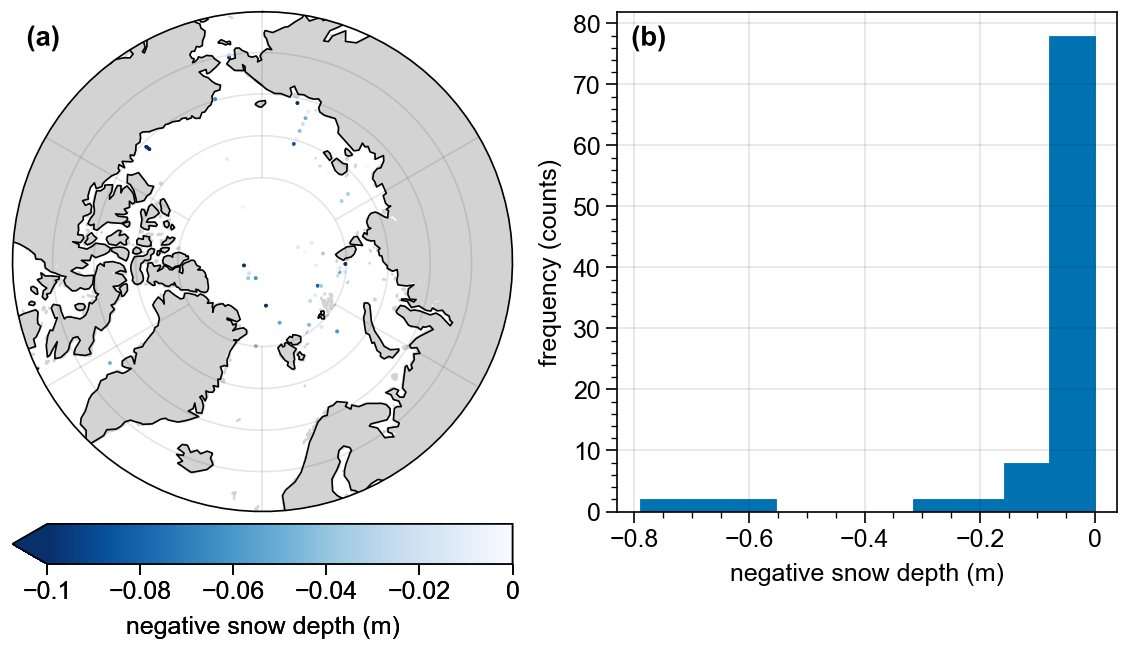

In [409]:
df_negative_snow = CRYO2ICE_comb_all[CRYO2ICE_comb_all['C2I_smooth_snow']<0]
df_no_negative_snow = CRYO2ICE_comb_all[CRYO2ICE_comb_all['C2I_smooth_snow']>0]
print(np.nanmean(df_no_negative_snow['C2I_smooth_snow'])*100)
print(np.nanmean(CRYO2ICE_comb_all['C2I_smooth_snow'])*100)
print((np.nanmean(df_no_negative_snow['C2I_smooth_snow'])-np.nanmean(CRYO2ICE_comb_all['C2I_smooth_snow']))*100)

df_CA = df_no_negative_snow[(df_no_negative_snow['lon']<-30) & (df_no_negative_snow['lon']>-150)]
df_PA = df_no_negative_snow[~((df_no_negative_snow['lon']<90) & (df_no_negative_snow['lon']>-150))]
df_AT = df_no_negative_snow[(df_no_negative_snow['lon']<90) & (df_no_negative_snow['lon']>-30)]

df_CA_v2 = CRYO2ICE_comb_all[(CRYO2ICE_comb_all['lon']<-30) & (CRYO2ICE_comb_all['lon']>-150)]
df_PA_v2 = CRYO2ICE_comb_all[~((CRYO2ICE_comb_all['lon']<90) & (CRYO2ICE_comb_all['lon']>-150))]
df_AT_v2 = CRYO2ICE_comb_all[(CRYO2ICE_comb_all['lon']<90) & (CRYO2ICE_comb_all['lon']>-30)]


print((len(df_CA)/len(df_no_negative_snow))*100)
print((len(df_PA)/len(df_no_negative_snow))*100)
print((len(df_AT)/len(df_no_negative_snow))*100)

print((np.nanmean(df_CA['C2I_smooth_snow'])-np.nanmean(df_CA_v2['C2I_smooth_snow']))*100)
print((np.nanmean(df_PA['C2I_smooth_snow'])-np.nanmean(df_PA_v2['C2I_smooth_snow']))*100)
print((np.nanmean(df_AT['C2I_smooth_snow'])-np.nanmean(df_AT_v2['C2I_smooth_snow']))*100)

resol='110m'
fig,ax = pplt.subplots(refwidth=2.5, ncols=2, nrows=1, sharex=False, proj={1:'nplaea'})
fig.patch.set_facecolor('white')

axs = ax[0]
cmap_qual3 =  plt.cm.get_cmap('blues_r', 8)  
im = axs.scatter(np.array(df_negative_snow['lon']), np.array(df_negative_snow['lat']), c=np.array(df_negative_snow['C2I_smooth_snow']), cmap=cmap_qual3, s=0.5, vmin=-0.1, vmax=0, extend='min')
cb = axs.colorbar(im, label='negative snow depth (m)', loc='b')
axs.add_feature(cfeature.LAND, facecolor='lightgrey')
axs.coastlines(resolution=resol, color='k')
axs.format(boundinglat=60)

ax[1].hist(df_negative_snow['C2I_smooth_snow'])
ax[1].set_xlabel('negative snow depth (m)')
ax[1].set_ylabel('frequency (counts)')
fig.format(abc='(a)', abcloc='ul')

In [79]:
def plot_panArctic10(lon, lat, sit, min_set, max_set, cmap_set, label, extend_info, ax, fig):
    #fig = plt.figure(figsize=(6,5))
    fig.patch.set_facecolor('white')
    #ax = plt.gca()
    #m = Basemap(projection='ortho',lat_0=90,lon_0=0,resolution='l', ax=ax);
    x1 = -180
    x2 = 180
    y1 = 0
    y2 = 90
    cmap1 = plt.get_cmap('greys', 4)

    m = Basemap(projection='npstere', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,boundinglat=75,lon_0=0, resolution='h',ax=ax, round=True)
    m.drawmeridians(np.arange(0,360,30),labels=[0,0,0,0],linewidth=0.5, fontsize=10, dashes=[1,5])
    m.drawparallels(np.arange(-90,90,15),linewidth=0.5, fontsize=10, dashes=[1,5],labels=[0,0,0,0])
    m.drawcoastlines(linewidth=0.5)
    m.fillcontinents(color='lightgray')
    #m.fillcontinents(color='darkgray')
    m.drawmapboundary(fill_color='white')
    #cbar = m.etopo()
    x=m.scatter(lon, lat, latlon=True, c=sit, s=1,vmin = min_set, vmax=max_set, cmap=cmap_set, zorder=1)
     #cbar = plt.colorbar(x, extend =extend_info, orientation="horizontal",ax=ax)
    #cbar.set_label(label)

    ax.set_title(title, y=1.08,fontsize=18)
    return x





## Bi-monthly plots

First row plotted.
Second row plotted.
Third row plotted.
Formatted figure.
Added month-text.
Saving figure.
Figure saved.


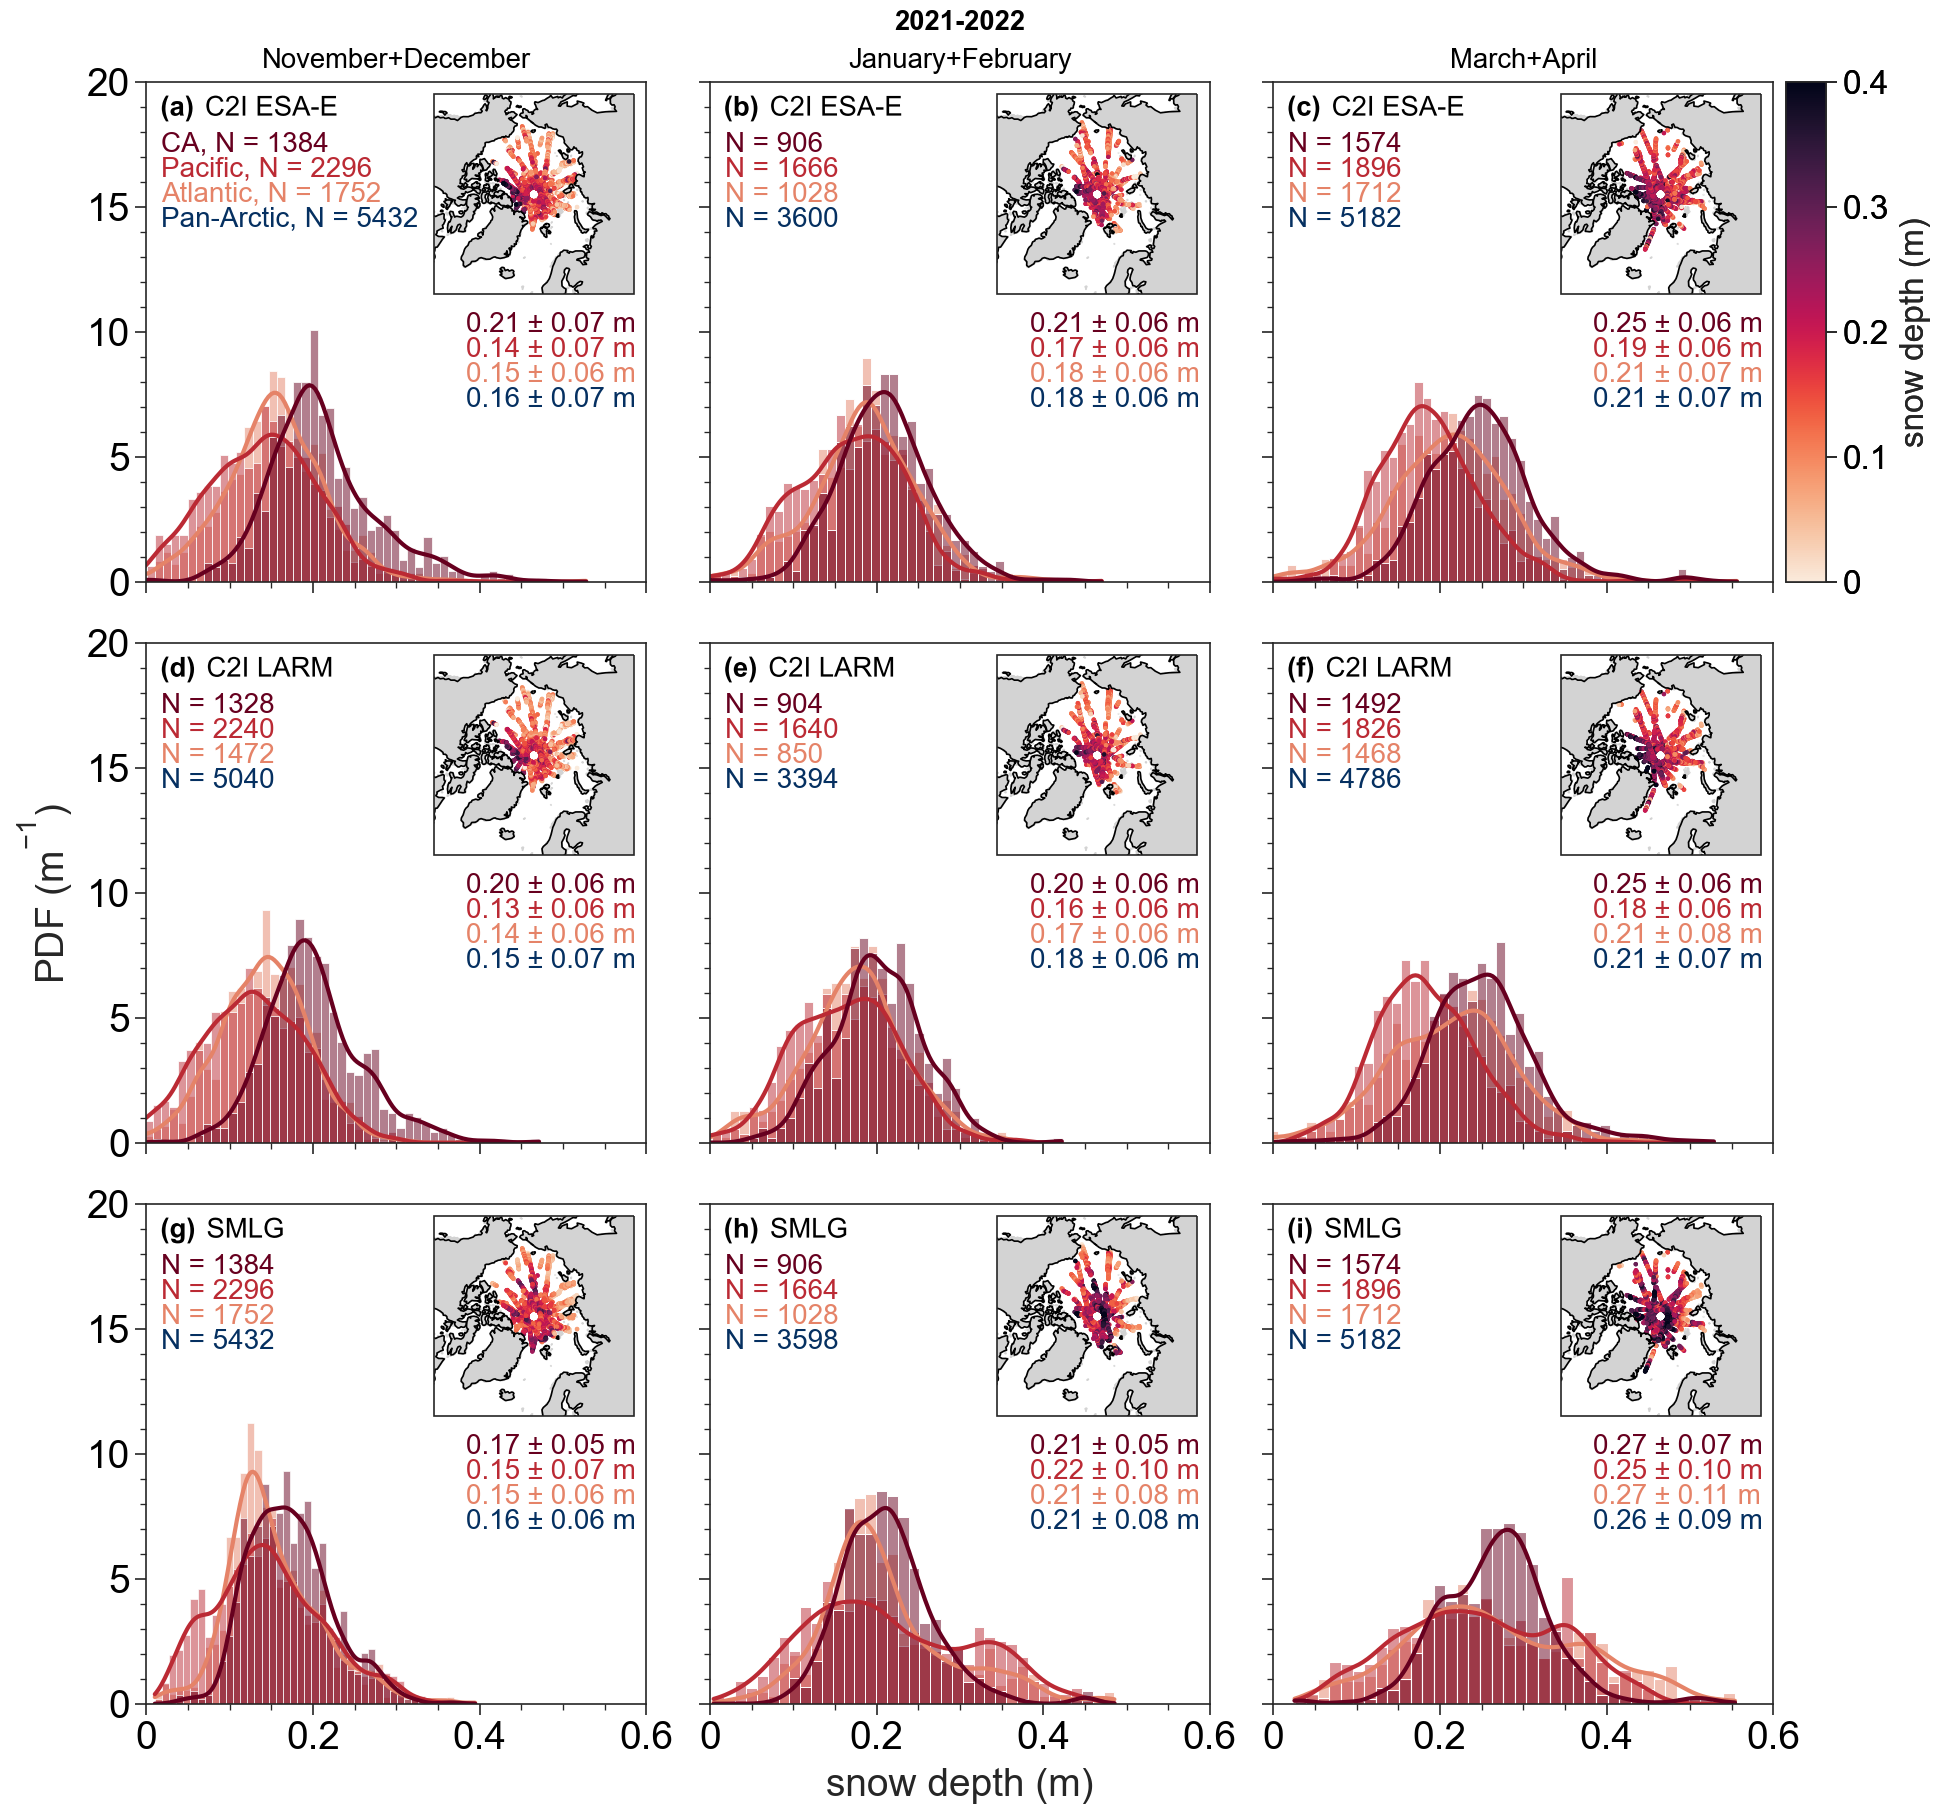

In [666]:
def plot_distributions_init(df, var, label, axes_def):
    df_CA = df[(df['lon']<-30) & (df['lon']>-150)]
    df_PA = df[~((df['lon']<90) & (df['lon']>-150))]
    df_AT = df[(df['lon']<90) & (df['lon']>-30)]
    df_check = pd.DataFrame({'snow_CA':df_CA[var],'snow_PA':df_PA[var],'snow_AT':df_AT[var]})
    palette_custom = {'snow_CA':cmap_qual(0),
                     'snow_PA':cmap_qual(1),
                     'snow_AT':cmap_qual(2)}
    _plot = sns.histplot(data = df_check,common_norm=False,kde=True,palette=palette_custom, stat='density',ax=axes_def)
    axes_def.legend().set_visible(False)
    axes_def.format(ultitle=label)
    axins = inset_axes(axes_def, width=1, height=1,axes_class=cartopy.mpl.geoaxes.GeoAxes, 
                   axes_kwargs=dict(map_projection=cartopy.crs.LambertAzimuthalEqualArea(central_latitude=90)))

    #axins = axes_def.inset([0.59, 0.59, 0.4, 0.4], transform='axes', proj='nplaea')
    axins.tick_params(labelleft=False, labelbottom=False)
    #plot_panArctic10(df['lon'], df['lat'], df[var], 0, 0.4, cmap, 'radar freeboard (m)','max', axins,fig)
    resol='110m'
    cmap_qual3 =  plt.cm.get_cmap('RdBu_r')
    im = axins.scatter(df['lon'], df['lat'], c=df[var],cmap=cmap, s=1, vmin=0, vmax=0.4,  transform=ccrs.PlateCarree())
    axins.add_feature(cfeature.LAND, facecolor='lightgrey')
    axins.coastlines(resolution=resol, color='k')
    axins.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
    
    
    #axins.set_extent([-180, 180, 60, 90], mode='all', proj='geo')
    #axins.projection.set_extent([-180, 180, 60, 90])
    #axins.format(boundinglat=75)
    
    text_CA = '{:.2f} \u00B1 {:.2f} m'.format(np.nanmean(df_CA[var]), np.nanstd(df_CA[var]))
    text_PA = '{:.2f} \u00B1 {:.2f} m'.format(np.nanmean(df_PA[var]), np.nanstd(df_PA[var]))
    text_AT = '{:.2f} \u00B1 {:.2f} m'.format(np.nanmean(df_AT[var]), np.nanstd(df_AT[var]))
    text_panArctic = '{:.2f} \u00B1 {:.2f} m'.format(np.nanmean(df[var]), np.nanstd(df[var]))
    axes_def.text(0.64, 0.5, text_CA, transform=axes_def.transAxes,c=cmap_qual(0),fontsize=10)
    axes_def.text(0.64, 0.45, text_PA, transform=axes_def.transAxes,c=cmap_qual(1),fontsize=10)
    axes_def.text(0.64, 0.4, text_AT, transform=axes_def.transAxes,c=cmap_qual(2),fontsize=10)
    axes_def.text(0.64, 0.35, text_panArctic, transform=axes_def.transAxes,c=cmap_qual(7),fontsize=10)
    axes_def.text(0.03, 0.86, 'CA, N = {}'.format(len(df_CA[df_CA[var].notna()])), transform=axes_def.transAxes,c=cmap_qual(0),fontsize=10)
    axes_def.text(0.03, 0.81, 'Pacific, N = {}'.format(len(df_PA[df_PA[var].notna()])), transform=axes_def.transAxes,c=cmap_qual(1),fontsize=10)
    axes_def.text(0.03, 0.76, 'Atlantic, N = {}'.format(len(df_AT[df_AT[var].notna()])), transform=axes_def.transAxes,c=cmap_qual(2),fontsize=10)
    axes_def.text(0.03, 0.71, 'Pan-Arctic, N = {}'.format(len(df[df[var].notna()])), transform=axs[0].transAxes,c=cmap_qual(7),fontsize=10)
    return im 

def plot_distributions(df, var, label, axes_def):
    df_CA = df[(df['lon']<-30) & (df['lon']>-150)]
    df_PA = df[~((df['lon']<90) & (df['lon']>-150))]
    df_AT = df[(df['lon']<90) & (df['lon']>-30)]
    df_check = pd.DataFrame({'snow_CA':df_CA[var],'snow_PA':df_PA[var],'snow_AT':df_AT[var]})
    palette_custom = {'snow_CA':cmap_qual(0),
                     'snow_PA':cmap_qual(1),
                     'snow_AT':cmap_qual(2)}
    _plot = sns.histplot(data = df_check,common_norm=False,kde=True,palette=palette_custom, stat='density',ax=axes_def)
    axes_def.legend().set_visible(False)
    axes_def.format(ultitle=label)

    
    axins = inset_axes(axes_def, width=1, height=1,axes_class=cartopy.mpl.geoaxes.GeoAxes, 
                   axes_kwargs=dict(map_projection=cartopy.crs.LambertAzimuthalEqualArea(central_latitude=90)))

    #axins = axes_def.inset([0.59, 0.59, 0.4, 0.4], transform='axes', proj='nplaea')
    axins.tick_params(labelleft=False, labelbottom=False)
    #plot_panArctic10(df['lon'], df['lat'], df[var], 0, 0.4, cmap, 'radar freeboard (m)','max', axins,fig)
    resol='110m'
    cmap_qual3 =  plt.cm.get_cmap('RdBu_r')
    im = axins.scatter(df['lon'], df['lat'], c=df[var],cmap=cmap, s=1, vmin=0, vmax=0.4,  transform=ccrs.PlateCarree())
    axins.add_feature(cfeature.LAND, facecolor='lightgrey')
    axins.coastlines(resolution=resol, color='k')
    axins.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
    
    text_CA = '{:.2f} \u00B1 {:.2f} m'.format(np.nanmean(df_CA[var]), np.nanstd(df_CA[var]))
    text_PA = '{:.2f} \u00B1 {:.2f} m'.format(np.nanmean(df_PA[var]), np.nanstd(df_PA[var]))
    text_AT = '{:.2f} \u00B1 {:.2f} m'.format(np.nanmean(df_AT[var]), np.nanstd(df_AT[var]))
    text_panArctic = '{:.2f} \u00B1 {:.2f} m'.format(np.nanmean(df[var]), np.nanstd(df[var]))
    axes_def.text(0.64, 0.5, text_CA, transform=axes_def.transAxes,c=cmap_qual(0),fontsize=10)
    axes_def.text(0.64, 0.45, text_PA, transform=axes_def.transAxes,c=cmap_qual(1),fontsize=10)
    axes_def.text(0.64, 0.4, text_AT, transform=axes_def.transAxes,c=cmap_qual(2),fontsize=10)
    axes_def.text(0.64, 0.35, text_panArctic, transform=axes_def.transAxes,c=cmap_qual(7),fontsize=10)
    axes_def.text(0.03, 0.86, 'N = {}'.format(len(df_CA[df_CA[var].notna()])), transform=axes_def.transAxes,c=cmap_qual(0),fontsize=10)
    axes_def.text(0.03, 0.81, 'N = {}'.format(len(df_PA[df_PA[var].notna()])), transform=axes_def.transAxes,c=cmap_qual(1),fontsize=10)
    axes_def.text(0.03, 0.76, 'N = {}'.format(len(df_AT[df_AT[var].notna()])), transform=axes_def.transAxes,c=cmap_qual(2),fontsize=10)
    axes_def.text(0.03, 0.71, 'N = {}'.format(len(df[df[var].notna()])), transform=axes_def.transAxes,c=cmap_qual(7),fontsize=10)


if season_folder == '2020-2021':
    import seaborn as sns
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    fig, axs = pplt.subplots(ncols=3, nrows=4, refwidth=2.5, refheight=2.5)
    cmap = 'Rocket_r'
    
    frames = [CRYO2ICE_nov, CRYO2ICE_dec]
    df = pd.concat(frames, ignore_index=True)
    df, var, label,axes_def = df,'C2I_smooth_snow', 'C2I ESA-E', axs[0]
    im = plot_distributions_init(df, var, label, axes_def)
    cb = axs[2].colorbar(im, label='snow depth (m)')
    cb.ax.tick_params(labelsize=12)
    cb.set_label('snow depth (m)', size=12)
    frames = [CRYO2ICE_jan, CRYO2ICE_feb]
    df = pd.concat(frames, ignore_index=True)
    df, var, label,axes_def = df,'C2I_smooth_snow', 'C2I ESA-E', axs[1]
    plot_distributions(df, var, label, axes_def)
    frames = [CRYO2ICE_mar, CRYO2ICE_apr]
    df = pd.concat(frames, ignore_index=True)
    df, var, label,axes_def = df,'C2I_smooth_snow', 'C2I ESA-E', axs[2]
    plot_distributions(df, var, label, axes_def)
    
    print('First row plotted.')
    
    frames = [CRYO2ICE_nov, CRYO2ICE_dec]
    df = pd.concat(frames, ignore_index=True)
    df, var, label,axes_def = df,'C2I_LARM_smooth_snow', 'C2I LARM', axs[3]
    plot_distributions(df, var, label, axes_def)
    frames = [CRYO2ICE_jan, CRYO2ICE_feb]
    df = pd.concat(frames, ignore_index=True)
    df, var, label,axes_def = df,'C2I_LARM_smooth_snow', 'C2I LARM', axs[4]
    plot_distributions(df, var, label, axes_def)
    frames = [CRYO2ICE_mar, CRYO2ICE_apr]
    df = pd.concat(frames, ignore_index=True)
    df, var, label,axes_def = df,'C2I_LARM_smooth_snow', 'C2I LARM', axs[5]
    plot_distributions(df, var, label, axes_def)
    
    print('Second row plotted.')
    
    frames = [CRYO2ICE_nov, CRYO2ICE_dec]
    df = pd.concat(frames, ignore_index=True)
    df, var, label,axes_def = df,'C2I_CCI_smooth_snow', 'C2I CCI+', axs[6]
    plot_distributions(df, var, label, axes_def)
    frames = [CRYO2ICE_jan, CRYO2ICE_feb]
    df = pd.concat(frames, ignore_index=True)
    df, var, label,axes_def = df,'C2I_CCI_smooth_snow', 'C2I CCI+', axs[7]
    plot_distributions(df, var, label, axes_def)
    frames = [CRYO2ICE_mar, CRYO2ICE_apr]
    df = pd.concat(frames, ignore_index=True)
    df, var, label,axes_def = df,'C2I_CCI_smooth_snow', 'C2I CCI+', axs[8]
    plot_distributions(df, var, label, axes_def)
    
    print('Third row plotted.')
    
    frames = [CRYO2ICE_nov, CRYO2ICE_dec]
    df = pd.concat(frames, ignore_index=True)
    df, var, label,axes_def = df,'SMLG_snow_depth', 'SMLG', axs[9]
    plot_distributions(df, var, label, axes_def)
    frames = [CRYO2ICE_jan, CRYO2ICE_feb]
    df = pd.concat(frames, ignore_index=True)
    df, var, label,axes_def = df,'SMLG_snow_depth', 'SMLG', axs[10]
    plot_distributions(df, var, label, axes_def)
    frames = [CRYO2ICE_mar, CRYO2ICE_apr]
    df = pd.concat(frames, ignore_index=True)
    df, var, label,axes_def = df,'SMLG_snow_depth', 'SMLG', axs[11]
    plot_distributions(df, var, label, axes_def)
    
    print('Fourth row plotted.')
    
    
    
    fig.format(abc='(a)', abcloc='ul',ticklabelsize =14,labelsize =14, xlabel='snow depth (m)', ylabel='PDF (m$^{-1}$)', xlim=[0, 0.6], ylim=[0, 30], suptitle=season_folder)
    print('Formatted figure.')
    axs[0].format(title='November+December')
    axs[1].format(title='January+February')
    axs[2].format(title='March+April')
    print('Added month-text.')
    
    print('Saving figure.')
    o_dir = directory = r'D:\DTU\CRYO2ICE'
    fig.format(abc='(a)', abcloc='ul', suptitle=season_folder)
    plt.savefig(o_dir+'/distributions_plots_bimonthly_{}.png'.format(season_folder), dpi=300, transparent=True)
    print('Figure saved.')
elif season_folder == '2021-2022':
    import seaborn as sns
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    fig, axs = pplt.subplots(ncols=3, nrows=3, refwidth=2.5, refheight=2.5)
    cmap = 'Rocket_r'
    
    frames = [CRYO2ICE_nov, CRYO2ICE_dec]
    df = pd.concat(frames, ignore_index=True)
    df, var, label,axes_def = df,'C2I_smooth_snow', 'C2I ESA-E', axs[0]
    im = plot_distributions_init(df, var, label, axes_def)
    cb = axs[2].colorbar(im, label='snow depth (m)')
    cb.ax.tick_params(labelsize=12)
    cb.set_label('snow depth (m)', size=12)
    frames = [CRYO2ICE_jan, CRYO2ICE_feb]
    df = pd.concat(frames, ignore_index=True)
    df, var, label,axes_def = df,'C2I_smooth_snow', 'C2I ESA-E', axs[1]
    plot_distributions(df, var, label, axes_def)
    frames = [CRYO2ICE_mar, CRYO2ICE_apr]
    df = pd.concat(frames, ignore_index=True)
    df, var, label,axes_def = df,'C2I_smooth_snow', 'C2I ESA-E', axs[2]
    plot_distributions(df, var, label, axes_def)
    
    print('First row plotted.')
    
    frames = [CRYO2ICE_nov, CRYO2ICE_dec]
    df = pd.concat(frames, ignore_index=True)
    df, var, label,axes_def = df,'C2I_LARM_smooth_snow', 'C2I LARM', axs[3]
    plot_distributions(df, var, label, axes_def)
    frames = [CRYO2ICE_jan, CRYO2ICE_feb]
    df = pd.concat(frames, ignore_index=True)
    df, var, label,axes_def = df,'C2I_LARM_smooth_snow', 'C2I LARM', axs[4]
    plot_distributions(df, var, label, axes_def)
    frames = [CRYO2ICE_mar, CRYO2ICE_apr]
    df = pd.concat(frames, ignore_index=True)
    df, var, label,axes_def = df,'C2I_LARM_smooth_snow', 'C2I LARM', axs[5]
    plot_distributions(df, var, label, axes_def)
    
    print('Second row plotted.')

    
    
    
    frames = [CRYO2ICE_nov, CRYO2ICE_dec]
    df = pd.concat(frames, ignore_index=True)
    df, var, label,axes_def = df,'SMLG_snow_depth', 'SMLG', axs[6]
    plot_distributions(df, var, label, axes_def)
    frames = [CRYO2ICE_jan, CRYO2ICE_feb]
    df = pd.concat(frames, ignore_index=True)
    df, var, label,axes_def = df,'SMLG_snow_depth', 'SMLG', axs[7]
    plot_distributions(df, var, label, axes_def)
    frames = [CRYO2ICE_mar, CRYO2ICE_apr]
    df = pd.concat(frames, ignore_index=True)
    df, var, label,axes_def = df,'SMLG_snow_depth', 'SMLG', axs[8]
    plot_distributions(df, var, label, axes_def)
    
    print('Third row plotted.')
    
    
    
    fig.format(abc='(a)', abcloc='ul',ticklabelsize =14,labelsize =14, xlabel='snow depth (m)', ylabel='PDF (m$^{-1}$)', xlim=[0, 0.6], ylim=[0, 20], suptitle=season_folder)
    print('Formatted figure.')
    axs[0].format(title='November+December')
    axs[1].format(title='January+February')
    axs[2].format(title='March+April')
    print('Added month-text.')
    
    print('Saving figure.')
    o_dir = directory = r'D:\DTU\CRYO2ICE'
    fig.format(abc='(a)', abcloc='ul', suptitle=season_folder)
    plt.savefig(o_dir+'/distributions_plots_bimonthly_{}.png'.format(season_folder), dpi=300, transparent=True)
    print('Figure saved.')

## Accumulation rates plot

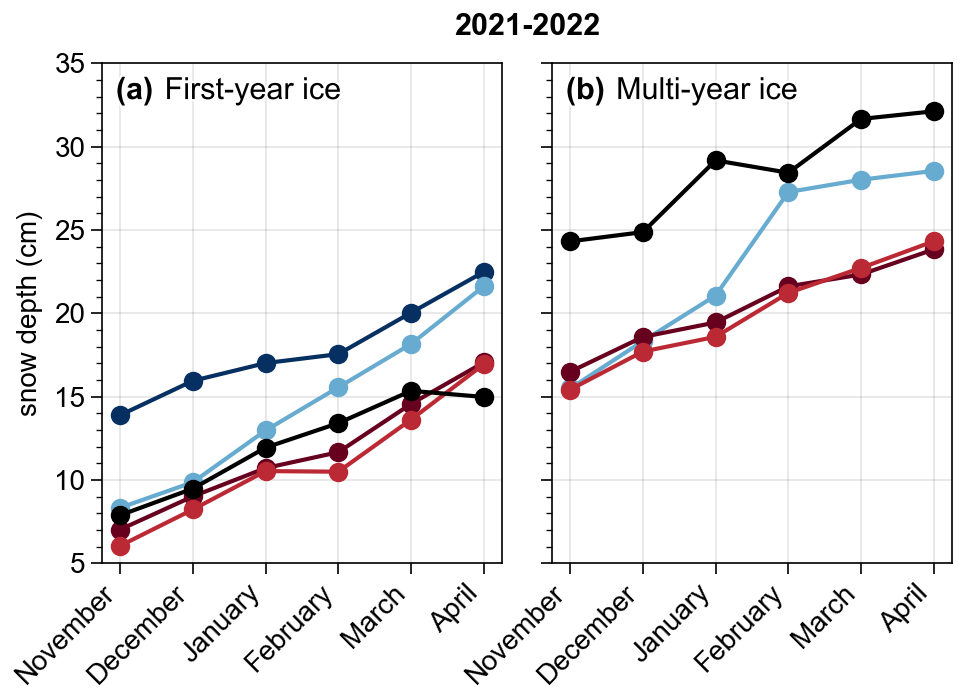

In [58]:
import proplot as pplt
if season_folder == '2020-2021':
    fig = pplt.figure(space=2, refwidth=2, refheight=2.5, span=False, sharex=False, sharey=True)
    ax = fig.subplots(nrows=1, ncols=2)
    #fig, ax = plt.subplots(2, 3, figsize=(6,4), constrained_layout=True, sharey=True)
    colours = cmap_qual
    colours = [cmap_qual(0)[0:3],cmap_qual(1)[0:3],cmap_qual(2)[0:3],cmap_qual(5)[0:3],cmap_qual(6)[0:3],cmap_qual(7)[0:3]]
    months = ['','November', 'December', 'January', 'February', 'March', 'April','']
    
    def compute_monthly_growth(df_AMSR2, var):
        monthly_growth = [np.nan,np.nanmean(df_AMSR2[df_AMSR2['month']=='November'][var]),
                                np.nanmean(df_AMSR2[df_AMSR2['month']=='December'][var]),
                                np.nanmean(df_AMSR2[df_AMSR2['month']=='January'][var]),
                                np.nanmean(df_AMSR2[df_AMSR2['month']=='February'][var]),
                                np.nanmean(df_AMSR2[df_AMSR2['month']=='March'][var]),
                                np.nanmean(df_AMSR2[df_AMSR2['month']=='April'][var]),np.nan]
        return monthly_growth
    
    
    
    df = CRYO2ICE_comb_all[(CRYO2ICE_comb_all['SMLG_snow_depth'].notna())&(CRYO2ICE_comb_all['C2I_snow'].notna()) & (CRYO2ICE_comb_all['C2I_LARM_snow'].notna()) & CRYO2ICE_comb_all['C2I_CCI_snow'].notna()]
    df['mW99_cm']=df['W99']*100
    df['C2I_smooth_snow_unit_cm']=df['C2I_smooth_snow']*100
    df['C2I_LARM_smooth_snow_unit_cm']=df['C2I_LARM_smooth_snow']*100
    df['C2I_CCI_smooth_snow_unit_cm']=df['C2I_CCI_smooth_snow']*100
    df['SMLG_snow_depth_unit_cm']=df['SMLG_snow_depth']*100
    df['SMLG_snow_depth_v2_unit_cm']=df['SMLG_snow_depth_v2']*100
    df_AMSR2 = df[(df['AMSR2_snow_depth']>=0)]
    df_MYI = df[df['AMSR2_snow_depth']<0]
    df.loc[df['AMSR2_snow_depth']<0, 'AMSR2_snow_depth'] = np.nan
    df_AMSR2[df_AMSR2['AMSR2_snow_depth']<0]=np.nan
    
    monthly_growth_AMSR2 = compute_monthly_growth(df_AMSR2, 'AMSR2_snow_depth')
    monthly_growth_SMLG = compute_monthly_growth(df_AMSR2, 'SMLG_snow_depth_unit_cm')
    #monthly_growth_SMLG_v2  = compute_monthly_growth(df_AMSR2, 'SMLG_snow_depth_v2_unit_cm')
    monthly_growth_C2I = compute_monthly_growth(df_AMSR2, 'C2I_smooth_snow_unit_cm')
    monthly_growth_C2I_LARM  = compute_monthly_growth(df_AMSR2, 'C2I_LARM_smooth_snow_unit_cm')
    monthly_growth_C2I_CCI  = compute_monthly_growth(df_AMSR2, 'C2I_CCI_smooth_snow_unit_cm')
    monthly_growth_W99  = compute_monthly_growth(df_AMSR2, 'mW99_cm')
    
    
    ax[0].plot(months, monthly_growth_AMSR2, linestyle='-',marker='o', c=colours[5], label='AMSR2')
    ax[0].plot(months, monthly_growth_SMLG, linestyle='-',marker='o', c=colours[3], label="SMLG")
    #ax[0].plot(months, monthly_growth_SMLG_v2, linestyle='-',marker='o', c=colours[3], label="SMLG-HS")
    ax[0].plot(months, monthly_growth_C2I, linestyle='-',marker='o', c=colours[0], label="C2I ESA-E")
    ax[0].plot(months, monthly_growth_C2I_LARM, linestyle='-',marker='o', c=colours[1], label="C2I LARM")
    ax[0].plot(months, monthly_growth_C2I_CCI, linestyle='-',marker='o', c=colours[2], label="C2I CCI+")
    ax[0].plot(months, monthly_growth_W99, linestyle='-',marker='o', c='k', label="mW99")
    
    ax[0].format(xrotation=45, ylabel='snow depth (cm)', fontsize=10, ultitle='First-year ice')
    
    monthly_growth_AMSR2_exp2 = compute_monthly_growth(df, 'AMSR2_snow_depth')
    monthly_growth_SMLG_exp2 = compute_monthly_growth(df, 'SMLG_snow_depth_unit_cm')
    #monthly_growth_SMLG_v2_exp2  = compute_monthly_growth(df, 'SMLG_snow_depth_v2_unit_cm')
    monthly_growth_C2I_exp2  = compute_monthly_growth(df, 'C2I_smooth_snow_unit_cm')
    monthly_growth_C2I_LARM_exp2  = compute_monthly_growth(df, 'C2I_LARM_smooth_snow_unit_cm')
    monthly_growth_C2I_CCI_exp2  = compute_monthly_growth(df, 'C2I_CCI_smooth_snow_unit_cm')
    monthly_growth_W99_exp2  = compute_monthly_growth(df, 'mW99_cm')
    
    #ax[1].plot(months, monthly_growth_AMSR2_exp2, linestyle='-',marker='o', c=colours[5])
    #ax[1].plot(months, monthly_growth_SMLG_exp2, linestyle='-',marker='o', c=colours[3])
    #ax[1].plot(months, monthly_growth_SMLG_v2_exp2, linestyle='-',marker='o', c=colours[3])
    #ax[1].plot(months, monthly_growth_C2I_exp2, linestyle='-',marker='o', c=colours[0])
    #ax[1].plot(months, monthly_growth_C2I_LARM_exp2, linestyle='-',marker='o', c=colours[1])
    #ax[1].plot(months, monthly_growth_C2I_CCI_exp2, linestyle='-',marker='o', c=colours[2])
    #ax[1].plot(months, monthly_growth_W99_exp2, linestyle='-',marker='o', c='k')
    #ax[1].format(xrotation=45, ylabel='snow depth (cm)', fontsize=10)
    
    #ax[1].format(xrotation=45, ylabel='snow depth (cm)', fontsize=10, ultitle='Mixed ice types')
    
    monthly_growth_SMLG_exp3 = compute_monthly_growth(df_MYI, 'SMLG_snow_depth_unit_cm')
    #monthly_growth_SMLG_v2_exp3  = compute_monthly_growth(df_MYI, 'SMLG_snow_depth_v2_unit_cm')
    monthly_growth_C2I_exp3  = compute_monthly_growth(df_MYI, 'C2I_smooth_snow_unit_cm')
    monthly_growth_C2I_LARM_exp3  = compute_monthly_growth(df_MYI, 'C2I_LARM_smooth_snow_unit_cm')
    monthly_growth_C2I_CCI_exp3  = compute_monthly_growth(df_MYI, 'C2I_CCI_smooth_snow_unit_cm')
    monthly_growth_W99_exp3  = compute_monthly_growth(df_MYI, 'mW99_cm')
    
    axs = ax[1]
    axs.plot(months, monthly_growth_SMLG_exp3, linestyle='-',marker='o', c=colours[3])
    #ax[2].plot(months, monthly_growth_SMLG_v2_exp3, linestyle='-',marker='o', c=colours[3])
    axs.plot(months, monthly_growth_C2I_exp3, linestyle='-',marker='o', c=colours[0])
    axs.plot(months, monthly_growth_C2I_LARM_exp3, linestyle='-',marker='o', c=colours[1])
    #ax[2].plot(months, monthly_growth_C2I_CCI_exp3, linestyle='-',marker='o', c=colours[2])
    axs.plot(months, monthly_growth_W99_exp3, linestyle='-',marker='o', c='k')
    axs.format(xrotation=45, ylabel='snow depth (cm)', fontsize=10)
    
    axs.format(xrotation=45, ylabel='snow depth (cm)', fontsize=10, ultitle='Multi-year ice')
    
    ax[0].legend(ncol=1, handlelength=0, markersize=0,labelcolor='linecolor', loc='ur', frame=False)
    
    
    
    o_dir = directory = r'D:\DTU\CRYO2ICE'
    fig.format(abc='(a)', abcloc='ul', suptitle=season_folder, ylim=(5,35))
    plt.savefig(o_dir+'/snow_depthh_seasonal_evolution_{}.png'.format(season_folder), dpi=300, transparent=True)
elif season_folder == '2021-2022':
    fig = pplt.figure(space=2, refwidth=2, refheight=2.5, span=False, sharex=False, sharey=True)
    ax = fig.subplots(nrows=1, ncols=2)
    #fig, ax = plt.subplots(2, 3, figsize=(6,4), constrained_layout=True, sharey=True)
    colours = cmap_qual
    colours = [cmap_qual(0)[0:3],cmap_qual(1)[0:3],cmap_qual(2)[0:3],cmap_qual(5)[0:3],cmap_qual(6)[0:3],cmap_qual(7)[0:3]]
    months = ['','November', 'December', 'January', 'February', 'March', 'April','']
    
    def compute_monthly_growth(df_AMSR2, var):
        monthly_growth = [np.nan,np.nanmean(df_AMSR2[df_AMSR2['month']=='November'][var]),
                                np.nanmean(df_AMSR2[df_AMSR2['month']=='December'][var]),
                                np.nanmean(df_AMSR2[df_AMSR2['month']=='January'][var]),
                                np.nanmean(df_AMSR2[df_AMSR2['month']=='February'][var]),
                                np.nanmean(df_AMSR2[df_AMSR2['month']=='March'][var]),
                                np.nanmean(df_AMSR2[df_AMSR2['month']=='April'][var]),np.nan]
        return monthly_growth
    
    
    
    #df = CRYO2ICE_comb_all[(CRYO2ICE_comb_all['SMLG_snow_depth'].notna())&(CRYO2ICE_comb_all['C2I_snow'].notna()) & (CRYO2ICE_comb_all['C2I_LARM_snow'].notna()) & CRYO2ICE_comb_all['C2I_CCI_snow'].notna()]
    df = CRYO2ICE_comb_all[(CRYO2ICE_comb_all['SMLG_snow_depth'].notna())&(CRYO2ICE_comb_all['C2I_snow'].notna()) & (CRYO2ICE_comb_all['C2I_LARM_snow'].notna())]
    df['mW99_cm']=df['W99']*100
    df['C2I_smooth_snow_unit_cm']=df['C2I_smooth_snow']*100
    df['C2I_LARM_smooth_snow_unit_cm']=df['C2I_LARM_smooth_snow']*100
    df['C2I_CCI_smooth_snow_unit_cm']=df['C2I_CCI_smooth_snow']*100
    df['SMLG_snow_depth_unit_cm']=df['SMLG_snow_depth']*100
    df['SMLG_snow_depth_v2_unit_cm']=df['SMLG_snow_depth_v2']*100
    #df_AMSR2 = df[(df['AMSR2_snow_depth'].notna()) & (df['AMSR2_snow_depth']!=-9999)]
    df_AMSR2 = df[(df['AMSR2_snow_depth']>=0)]
    df_MYI = df[df['AMSR2_snow_depth']<0]
    df.loc[df['AMSR2_snow_depth']<0, 'AMSR2_snow_depth'] = np.nan
    df_AMSR2[df_AMSR2['AMSR2_snow_depth']<0]=np.nan
    
    monthly_growth_AMSR2 = compute_monthly_growth(df_AMSR2, 'AMSR2_snow_depth')
    monthly_growth_SMLG = compute_monthly_growth(df_AMSR2, 'SMLG_snow_depth_unit_cm')
    #monthly_growth_SMLG_v2  = compute_monthly_growth(df_AMSR2, 'SMLG_snow_depth_v2_unit_cm')
    monthly_growth_C2I = compute_monthly_growth(df_AMSR2, 'C2I_smooth_snow_unit_cm')
    monthly_growth_C2I_LARM  = compute_monthly_growth(df_AMSR2, 'C2I_LARM_smooth_snow_unit_cm')
    #monthly_growth_C2I_CCI  = compute_monthly_growth(df_AMSR2, 'C2I_CCI_smooth_snow_unit_cm')
    monthly_growth_W99  = compute_monthly_growth(df_AMSR2, 'mW99_cm')
    
    
    ax[0].plot(months, monthly_growth_AMSR2, linestyle='-',marker='o', c=colours[5], label='AMSR2')
    ax[0].plot(months, monthly_growth_SMLG, linestyle='-',marker='o', c=colours[3], label="SMLG")
    #ax[0].plot(months, monthly_growth_SMLG_v2, linestyle='-',marker='o', c=colours[3], label="SMLG-HS")
    ax[0].plot(months, monthly_growth_C2I, linestyle='-',marker='o', c=colours[0], label="C2I ESA-E")
    ax[0].plot(months, monthly_growth_C2I_LARM, linestyle='-',marker='o', c=colours[1], label="C2I LARM")
    #ax[0].plot(months, monthly_growth_C2I_CCI, linestyle='-',marker='o', c=colours[2], label="C2I CCI+")
    ax[0].plot(months, monthly_growth_W99, linestyle='-',marker='o', c='k', label="mW99")
    
    ax[0].format(xrotation=45, ylabel='snow depth (cm)', fontsize=10, ultitle='First-year ice')
    
    monthly_growth_AMSR2_exp2 = compute_monthly_growth(df, 'AMSR2_snow_depth')
    monthly_growth_SMLG_exp2 = compute_monthly_growth(df, 'SMLG_snow_depth_unit_cm')
    #monthly_growth_SMLG_v2_exp2  = compute_monthly_growth(df, 'SMLG_snow_depth_v2_unit_cm')
    monthly_growth_C2I_exp2  = compute_monthly_growth(df, 'C2I_smooth_snow_unit_cm')
    monthly_growth_C2I_LARM_exp2  = compute_monthly_growth(df, 'C2I_LARM_smooth_snow_unit_cm')
    #monthly_growth_C2I_CCI_exp2  = compute_monthly_growth(df, 'C2I_CCI_smooth_snow_unit_cm')
    monthly_growth_W99_exp2  = compute_monthly_growth(df, 'mW99_cm')
    
    #ax[1].plot(months, monthly_growth_AMSR2_exp2, linestyle='-',marker='o', c=colours[5])
    #ax[1].plot(months, monthly_growth_SMLG_exp2, linestyle='-',marker='o', c=colours[3])
    #ax[1].plot(months, monthly_growth_SMLG_v2_exp2, linestyle='-',marker='o', c=colours[3])
    #ax[1].plot(months, monthly_growth_C2I_exp2, linestyle='-',marker='o', c=colours[0])
    #ax[1].plot(months, monthly_growth_C2I_LARM_exp2, linestyle='-',marker='o', c=colours[1])
    #ax[1].plot(months, monthly_growth_C2I_CCI_exp2, linestyle='-',marker='o', c=colours[2])
    #ax[1].plot(months, monthly_growth_W99_exp2, linestyle='-',marker='o', c='k')
    #ax[1].format(xrotation=45, ylabel='snow depth (cm)', fontsize=10)
    
    #ax[1].format(xrotation=45, ylabel='snow depth (cm)', fontsize=10, ultitle='Mixed ice types')
    
    monthly_growth_SMLG_exp3 = compute_monthly_growth(df_MYI, 'SMLG_snow_depth_unit_cm')
    #monthly_growth_SMLG_v2_exp3  = compute_monthly_growth(df_MYI, 'SMLG_snow_depth_v2_unit_cm')
    monthly_growth_C2I_exp3  = compute_monthly_growth(df_MYI, 'C2I_smooth_snow_unit_cm')
    monthly_growth_C2I_LARM_exp3  = compute_monthly_growth(df_MYI, 'C2I_LARM_smooth_snow_unit_cm')
    #monthly_growth_C2I_CCI_exp3  = compute_monthly_growth(df_MYI, 'C2I_CCI_smooth_snow_unit_cm')
    monthly_growth_W99_exp3  = compute_monthly_growth(df_MYI, 'mW99_cm')

    axs = ax[1]
    axs.plot(months, monthly_growth_SMLG_exp3, linestyle='-',marker='o', c=colours[3])
    #ax[2].plot(months, monthly_growth_SMLG_v2_exp3, linestyle='-',marker='o', c=colours[3])
    axs.plot(months, monthly_growth_C2I_exp3, linestyle='-',marker='o', c=colours[0])
    axs.plot(months, monthly_growth_C2I_LARM_exp3, linestyle='-',marker='o', c=colours[1])
    #ax[2].plot(months, monthly_growth_C2I_CCI_exp3, linestyle='-',marker='o', c=colours[2])
    axs.plot(months, monthly_growth_W99_exp3, linestyle='-',marker='o', c='k')
    axs.format(xrotation=45, ylabel='snow depth (cm)', fontsize=10)
    
    axs.format(xrotation=45, ylabel='snow depth (cm)', fontsize=10, ultitle='Multi-year ice')
    
    #ax[0].legend(ncol=1, handlelength=0, markersize=0,labelcolor='linecolor', loc='ur', frame=False)
    
    
    
    o_dir = directory = r'D:\DTU\CRYO2ICE'
    fig.format(abc='(a)', abcloc='ul', suptitle=season_folder, ylim=(5,35))
    plt.savefig(o_dir+'/snow_depthh_seasonal_evolution_{}.png'.format(season_folder), dpi=300, transparent=True)

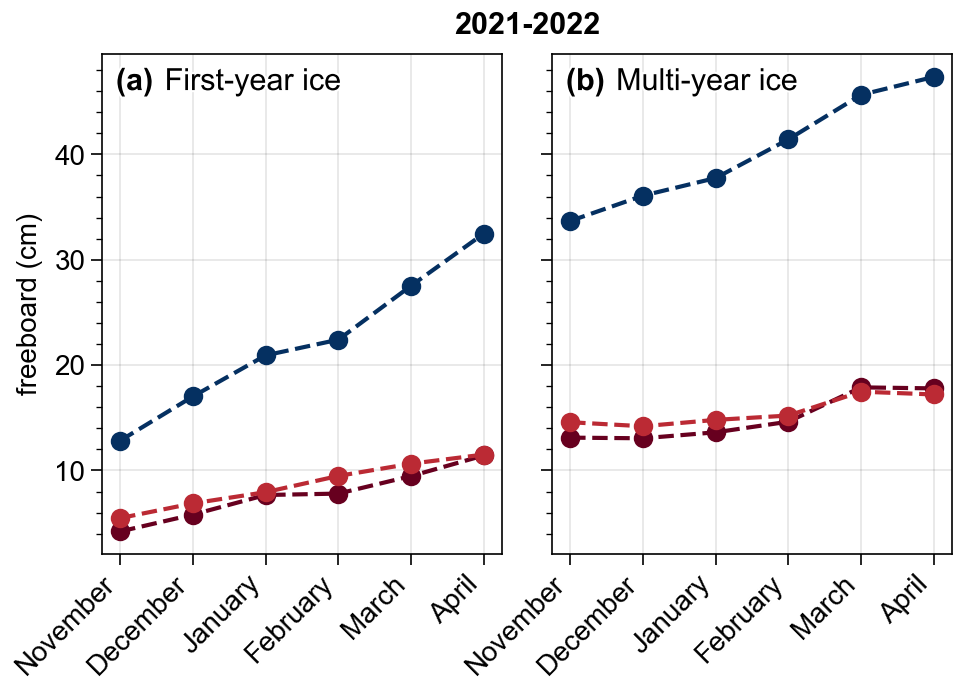

In [60]:
import proplot as pplt
if season_folder == '2020-2021':
    fig = pplt.figure(space=2, refwidth=2, refheight=2.5, span=False, sharex=False, sharey=True)
    ax = fig.subplots(nrows=1, ncols=2)
    #fig, ax = plt.subplots(2, 3, figsize=(6,4), constrained_layout=True, sharey=True)
    colours = cmap_qual
    colours = [cmap_qual(0)[0:3],cmap_qual(1)[0:3],cmap_qual(2)[0:3],cmap_qual(5)[0:3],cmap_qual(6)[0:3],cmap_qual(7)[0:3]]
    months = ['','November', 'December', 'January', 'February', 'March', 'April','']
    
    def compute_monthly_growth(df_AMSR2, var):
        monthly_growth = [np.nan,np.nanmean(df_AMSR2[df_AMSR2['month']=='November'][var])*100,
                                np.nanmean(df_AMSR2[df_AMSR2['month']=='December'][var])*100,
                                np.nanmean(df_AMSR2[df_AMSR2['month']=='January'][var])*100,
                                np.nanmean(df_AMSR2[df_AMSR2['month']=='February'][var])*100,
                                np.nanmean(df_AMSR2[df_AMSR2['month']=='March'][var])*100,
                                np.nanmean(df_AMSR2[df_AMSR2['month']=='April'][var])*100,np.nan]
        return monthly_growth
    
    
    
    df = CRYO2ICE_comb_all[(CRYO2ICE_comb_all['SMLG_snow_depth'].notna())&(CRYO2ICE_comb_all['C2I_snow'].notna()) & (CRYO2ICE_comb_all['C2I_LARM_snow'].notna()) & CRYO2ICE_comb_all['C2I_CCI_snow'].notna()]
    df_AMSR2 = df[(df['AMSR2_snow_depth'].notna()) & (df['AMSR2_snow_depth']!=-9999)]
    df_MYI = df[df['AMSR2_snow_depth']<0]
    df.loc[df['AMSR2_snow_depth']<0, 'AMSR2_snow_depth'] = np.nan
    df_AMSR2[df_AMSR2['AMSR2_snow_depth']<0]=np.nan
    
    
    
    monthly_growth_AMSR2 = compute_monthly_growth(df_AMSR2, 'IS2_fb')
    monthly_growth_C2I = compute_monthly_growth(df_AMSR2, 'fb')
    monthly_growth_C2I_LARM  = compute_monthly_growth(df_AMSR2, 'LARM_rfb')
    monthly_growth_C2I_CCI  = compute_monthly_growth(df_AMSR2, 'CCI_rfb')
    
    
    ax[0].plot(months, monthly_growth_AMSR2, linestyle='--',marker='o', c=colours[5])
    
    ax[0].plot(months, monthly_growth_C2I, linestyle='--',marker='o', c=colours[0])
    ax[0].plot(months, monthly_growth_C2I_LARM, linestyle='--',marker='o', c=colours[1])
    ax[0].plot(months, monthly_growth_C2I_CCI, linestyle='--',marker='o', c=colours[2])
    
    ax[0].format(xrotation=45, ylabel='freeboard (cm)', fontsize=10, ultitle='First-year ice')
    
    
    #monthly_growth_AMSR2_exp2 = compute_monthly_growth(df, 'IS2_fb')
    #monthly_growth_C2I_exp2  = compute_monthly_growth(df, 'fb')
    #monthly_growth_C2I_LARM_exp2  = compute_monthly_growth(df, 'LARM_rfb')
    #monthly_growth_C2I_CCI_exp2  = compute_monthly_growth(df, 'CCI_rfb')
    
    #ax[1].plot(months, monthly_growth_AMSR2_exp2, linestyle='-',marker='o', c=colours[5])
    #ax[1].plot(months, monthly_growth_C2I_exp2, linestyle='-',marker='o', c=colours[0])
    #ax[1].plot(months, monthly_growth_C2I_LARM_exp2, linestyle='-',marker='o', c=colours[1])
    #ax[1].plot(months, monthly_growth_C2I_CCI_exp2, linestyle='-',marker='o', c=colours[2])
    #ax[1].format(xrotation=45, ylabel='snow depth (cm)', fontsize=10)
    
    #ax[1].format(xrotation=45, ylabel='freeboard (cm)', fontsize=10, ultitle='Mixed ice types')
    
    monthly_growth_SMLG_exp3 = compute_monthly_growth(df_MYI, 'IS2_fb')
    monthly_growth_C2I_exp3  = compute_monthly_growth(df_MYI, 'fb')
    monthly_growth_C2I_LARM_exp3  = compute_monthly_growth(df_MYI, 'LARM_rfb')
    monthly_growth_C2I_CCI_exp3  = compute_monthly_growth(df_MYI, 'CCI_rfb')
    
    axs = ax[1]
    axs.plot(months, monthly_growth_SMLG_exp3, linestyle='--',marker='o', c=colours[5], label='IS2')
    axs.plot(months, monthly_growth_C2I_exp3, linestyle='--',marker='o', c=colours[0], label='CS2 ESA-E')
    axs.plot(months, monthly_growth_C2I_LARM_exp3, linestyle='--',marker='o', c=colours[1], label='CS2 LARM')
    axs.plot(months, monthly_growth_C2I_CCI_exp3, linestyle='--',marker='o', c=colours[2], label = 'CS2 CCI+')
    axs.format(xrotation=45, ylabel='freeboard (cm)', fontsize=10, ultitle='Multi-year ice')
    
    
    #axs.text(0.95, 0.20, 'IS2', c=colours[5], transform = axs.transAxes, ha='right', fontsize=12)
    #axs.text(0.95, 0.14, 'C2I ESA-E', c=colours[0], transform = axs.transAxes, ha='right', fontsize=12)
    #axs.text(0.95, 0.08, 'C2I LARM',  c=colours[1], transform = axs.transAxes, ha='right', fontsize=12)

    axs.legend(handlelength=1.2, markersize=0,labelcolor='linecolor', loc='lr', frame=False, ncols=2)
    
    o_dir = directory = r'D:\DTU\CRYO2ICE'
    fig.format(abc='(a)', abcloc='ul', suptitle=season_folder)
    plt.savefig(o_dir+'/freeboard_seasonal_evolution_{}.png'.format(season_folder), dpi=300, transparent=True)
elif season_folder == '2021-2022':
    fig, ax = pplt.subplots(nrows=1, ncols=2,space=2, refwidth=2, refheight=2.5, span=False, sharex=False, sharey=True)
    #ax = fig.subplots(nrows=1, ncols=2)
    #fig, ax = plt.subplots(2, 3, figsize=(6,4), constrained_layout=True, sharey=True)
    colours = cmap_qual
    colours = [cmap_qual(0)[0:3],cmap_qual(1)[0:3],cmap_qual(2)[0:3],cmap_qual(5)[0:3],cmap_qual(6)[0:3],cmap_qual(7)[0:3]]
    months = ['','November', 'December', 'January', 'February', 'March', 'April','']
    
    def compute_monthly_growth(df_AMSR2, var):
        monthly_growth = [np.nan,np.nanmean(df_AMSR2[df_AMSR2['month']=='November'][var])*100,
                                np.nanmean(df_AMSR2[df_AMSR2['month']=='December'][var])*100,
                                np.nanmean(df_AMSR2[df_AMSR2['month']=='January'][var])*100,
                                np.nanmean(df_AMSR2[df_AMSR2['month']=='February'][var])*100,
                                np.nanmean(df_AMSR2[df_AMSR2['month']=='March'][var])*100,
                                np.nanmean(df_AMSR2[df_AMSR2['month']=='April'][var])*100,np.nan]
        return monthly_growth
    
    
    
    #df = CRYO2ICE_comb_all[(CRYO2ICE_comb_all['SMLG_snow_depth'].notna())&(CRYO2ICE_comb_all['C2I_snow'].notna()) & (CRYO2ICE_comb_all['C2I_LARM_snow'].notna()) & CRYO2ICE_comb_all['C2I_CCI_snow'].notna()]
    df = CRYO2ICE_comb_all[(CRYO2ICE_comb_all['SMLG_snow_depth'].notna())&(CRYO2ICE_comb_all['C2I_snow'].notna()) & (CRYO2ICE_comb_all['C2I_LARM_snow'].notna())]
    df_AMSR2 = df[(df['AMSR2_snow_depth'].notna()) & (df['AMSR2_snow_depth']!=-9999)]
    df_MYI = df[df['AMSR2_snow_depth']<0]
    df.loc[df['AMSR2_snow_depth']<0, 'AMSR2_snow_depth'] = np.nan
    df_AMSR2[df_AMSR2['AMSR2_snow_depth']<0]=np.nan
    
    
    
    monthly_growth_AMSR2 = compute_monthly_growth(df_AMSR2, 'IS2_fb')
    monthly_growth_C2I = compute_monthly_growth(df_AMSR2, 'fb')
    monthly_growth_C2I_LARM  = compute_monthly_growth(df_AMSR2, 'LARM_rfb')
    #monthly_growth_C2I_CCI  = compute_monthly_growth(df_AMSR2, 'CCI_rfb')
    
    
    ax[0].plot(months, monthly_growth_AMSR2, linestyle='--',marker='o', c=colours[5])
    
    ax[0].plot(months, monthly_growth_C2I, linestyle='--',marker='o', c=colours[0])
    ax[0].plot(months, monthly_growth_C2I_LARM, linestyle='--',marker='o', c=colours[1])
    #ax[0].plot(months, monthly_growth_C2I_CCI, linestyle='-',marker='o', c=colours[2])
    
    ax[0].format(xrotation=45, ylabel='freeboard (cm)', fontsize=10, ultitle='First-year ice')
    
    
    #monthly_growth_AMSR2_exp2 = compute_monthly_growth(df, 'IS2_fb')
    #monthly_growth_C2I_exp2  = compute_monthly_growth(df, 'fb')
    #monthly_growth_C2I_LARM_exp2  = compute_monthly_growth(df, 'LARM_rfb')
    #monthly_growth_C2I_CCI_exp2  = compute_monthly_growth(df, 'CCI_rfb')
    
    #ax[1].plot(months, monthly_growth_AMSR2_exp2, linestyle='-',marker='o', c=colours[5])
    #ax[1].plot(months, monthly_growth_C2I_exp2, linestyle='-',marker='o', c=colours[0])
    #ax[1].plot(months, monthly_growth_C2I_LARM_exp2, linestyle='-',marker='o', c=colours[1])
    #ax[1].plot(months, monthly_growth_C2I_CCI_exp2, linestyle='-',marker='o', c=colours[2])
    #ax[1].format(xrotation=45, ylabel='snow depth (cm)', fontsize=10)
    
    #ax[1].format(xrotation=45, ylabel='freeboard (cm)', fontsize=10, ultitle='Mixed ice types')
    
    monthly_growth_SMLG_exp3 = compute_monthly_growth(df_MYI, 'IS2_fb')
    monthly_growth_C2I_exp3  = compute_monthly_growth(df_MYI, 'fb')
    monthly_growth_C2I_LARM_exp3  = compute_monthly_growth(df_MYI, 'LARM_rfb')
    #monthly_growth_C2I_CCI_exp3  = compute_monthly_growth(df_MYI, 'CCI_rfb')

    axs = ax[1]
    axs.plot(months, monthly_growth_SMLG_exp3, linestyle='--',marker='o', c=colours[5], label='IS2')
    axs.plot(months, monthly_growth_C2I_exp3, linestyle='--',marker='o', c=colours[0], label='CS2 ESA-E')
    axs.plot(months, monthly_growth_C2I_LARM_exp3, linestyle='--',marker='o', c=colours[1], label='CS2 LARM')
    #ax[2].plot(months, monthly_growth_C2I_CCI_exp3, linestyle='-',marker='o', c=colours[2])
    axs.format(xrotation=45, ylabel='freeboard (cm)', fontsize=10, ultitle='Multi-year ice')
    
    
    #axs.text(0.95, 0.20, 'IS2', c=colours[5], transform = axs.transAxes, ha='right', fontsize=12)
    #axs.text(0.95, 0.14, 'C2I ESA-E', c=colours[0], transform = axs.transAxes, ha='right', fontsize=12)
    #axs.text(0.95, 0.08, 'C2I LARM',  c=colours[1], transform = axs.transAxes, ha='right', fontsize=12)

    #axs.legend(ncol=1, handlelength=0, markersize=0,labelcolor='linecolor', loc='lr', frame=False)
    
    #axs.legend(handlelength=1.2, markersize=0,labelcolor='linecolor', loc='lr', frame=False, ncols=2)
    
    
    o_dir = directory = r'D:\DTU\CRYO2ICE'
    fig.format(abc='(a)', abcloc='ul', suptitle=season_folder)
    plt.savefig(o_dir+'/freeboard_seasonal_evolution_{}.png'.format(season_folder), dpi=300, transparent=True)

# Crossover analysis

In [22]:
season_folder = '2020-2021'
directory = r'D:\DTU\CRYO2ICE\Data\CRYO2ICE_original_MSS\BaselineE'
files_C2I =  glob.glob(directory + '/{}/'.format(season_folder)+'*')

files_nov, files_dec, files_jan, files_feb, files_mar, files_apr = [], [], [], [], [], []

if season_folder == '2020-2021':
    ID_split = 9
elif season_folder == '2021-2022':
    ID_split = 8
    
for i_fn in files_C2I:
    basename_without_ext = os.path.splitext(os.path.basename(i_fn))[0]
    date = basename_without_ext.split('_')[ID_split][4:6]
    if date == '11':
        files_nov.append(i_fn)
    elif date == '12': 
        files_dec.append(i_fn)
    elif date == '01':
        files_jan.append(i_fn)
    elif date == '02':
        files_feb.append(i_fn)
    elif date == '03':
        files_mar.append(i_fn)
    elif date == '04':
        files_apr.append(i_fn)

# E:/DTU/CRYO2ICE/Data/CRYO2ICE_original_MSS/*_v2_LARM_AMSR2_SMLG_ERA5_final_v2_W99.csv
CRYO2ICE_nov = load_CRYO2ICE_month(files_nov)
CRYO2ICE_dec = load_CRYO2ICE_month(files_dec)
CRYO2ICE_jan = load_CRYO2ICE_month(files_jan)
CRYO2ICE_feb = load_CRYO2ICE_month(files_feb)
CRYO2ICE_mar = load_CRYO2ICE_month(files_mar)
CRYO2ICE_apr = load_CRYO2ICE_month(files_apr)


CRYO2ICE_nov['month']='November'
CRYO2ICE_dec['month']='December'
CRYO2ICE_jan['month']='January'
CRYO2ICE_feb['month']='February'
CRYO2ICE_mar['month']='March'
CRYO2ICE_apr['month']='April'

frames = [CRYO2ICE_nov, CRYO2ICE_dec, CRYO2ICE_jan, CRYO2ICE_feb, CRYO2ICE_mar, CRYO2ICE_apr]

CRYO2ICE_comb_all = pd.concat(frames)
CRYO2ICE_comb_all['AMSR2_snow_depth_unit_m']=CRYO2ICE_comb_all['AMSR2_snow_depth']/100


In [319]:
def CRYO2ICE_identify_XO(df_CS2, df_IS2, dist_req):
    '''
    
    '''
    
    from sklearn.neighbors import BallTree
    import numpy as np
    import pandas as pd

    query_lats = df_CS2[['lat']].to_numpy()
    query_lons = df_CS2[['lon']].to_numpy()

    tree = BallTree(np.deg2rad(df_IS2[['lat', 'lon']].values),  metric='haversine')

    dist_in_metres = dist_req
    earth_radius_in_metres = 6371*1000
    radius = dist_in_metres/earth_radius_in_metres

    is_within, distances = tree.query_radius(np.deg2rad(np.c_[query_lats, query_lons]), r=radius, count_only=False, return_distance=True) 
    distances_in_metres = distances*earth_radius_in_metres
    
    
    RMSD_IS2_fb_A, RMSD_IS2_fb_B = np.empty(len(query_lats)),np.empty(len(query_lats))
    RMSD_CS2_fb_A, RMSD_CS2_fb_B = np.empty(len(query_lats)),np.empty(len(query_lats))
    RMSD_CS2_LARM_fb_A, RMSD_CS2_LARM_fb_B = np.empty(len(query_lats)),np.empty(len(query_lats))
    RMSD_CS2_CCI_fb_A, RMSD_CS2_CCI_fb_B = np.empty(len(query_lats)),np.empty(len(query_lats))
    RMSD_C2I_fb_A, RMSD_C2I_fb_B = np.empty(len(query_lats)),np.empty(len(query_lats))
    RMSD_C2I_LARM_fb_A, RMSD_C2I_LARM_fb_B = np.empty(len(query_lats)),np.empty(len(query_lats))
    RMSD_C2I_CCI_fb_A, RMSD_C2I_CCI_fb_B = np.empty(len(query_lats)),np.empty(len(query_lats))
    lat_A, lon_A, lat_B, lon_B = np.empty(len(query_lats)),np.empty(len(query_lats)),np.empty(len(query_lats)),np.empty(len(query_lats))
    ID_A, ID_B = [],[]
    
    k = 0
    
    for i in is_within:
        if len(i)>=2:
            data_fb_IS2 = df_IS2['IS2_w_mean_fb_MSS'].iloc[i]
            data_fb_CS2 = df_IS2['CS2_smooth'].iloc[i]
            data_fb_CS2_LARM = df_IS2['LARM_rfb_smooth'].iloc[i]
            data_fb_CS2_CCI = df_IS2['CCI_rfb_smooth'].iloc[i]
            data_fb_C2I = df_IS2['snow_depth_original_MSS_smoothed'].iloc[i]
            data_fb_C2I_LARM = df_IS2['snow_depth_original_MSS_LARM_smoothed'].iloc[i]
            data_fb_C2I_CCI = df_IS2['snow_depth_original_MSS_CCI_smoothed'].iloc[i]
            lat = df_IS2['lat'].iloc[i]
            lon = df_IS2['lon'].iloc[i]
            ID = df_IS2['ID'].iloc[i[0]]

            RMSD_IS2_fb_A_mean = np.nanmean(data_fb_IS2)
            RMSD_CS2_fb_A_mean  = np.nanmean(data_fb_CS2)
            RMSD_CS2_LARM_fb_A_mean  = np.nanmean(data_fb_CS2_LARM)
            RMSD_CS2_CCI_fb_A_mean  = np.nanmean(data_fb_CS2_CCI)
            RMSD_C2I_fb_A_mean  = np.nanmean(data_fb_C2I)
            RMSD_C2I_LARM_fb_A_mean  = np.nanmean(data_fb_C2I_LARM)
            RMSD_C2I_CCI_fb_A_mean  = np.nanmean(data_fb_C2I_CCI)
            lat_x = np.nanmean(lat)
            lon_x = np.nanmean(lon)
            
        else:
            RMSD_IS2_fb_A_mean  = np.nan
            RMSD_CS2_fb_A_mean  = np.nan
            RMSD_CS2_LARM_fb_A_mean  = np.nan
            RMSD_CS2_CCI_fb_A_mean  = np.nan
            RMSD_C2I_fb_A_mean  = np.nan
            RMSD_C2I_LARM_fb_A_mean  = np.nan
            RMSD_C2I_CCI_fb_A_mean  = np.nan
            lat_x = np.nan
            lon_x = np.nan
            ID = np.nan

        
        RMSD_IS2_fb_A[k] = RMSD_IS2_fb_A_mean
        RMSD_CS2_fb_A[k]  = RMSD_CS2_fb_A_mean
        RMSD_CS2_LARM_fb_A[k]  = RMSD_CS2_LARM_fb_A_mean
        RMSD_CS2_CCI_fb_A[k]  = RMSD_CS2_CCI_fb_A_mean
        RMSD_C2I_fb_A[k] = RMSD_C2I_fb_A_mean
        RMSD_C2I_LARM_fb_A[k]  = RMSD_C2I_LARM_fb_A_mean
        RMSD_C2I_CCI_fb_A[k]  = RMSD_C2I_CCI_fb_A_mean
        lat_A[k] = lat_x
        lon_A[k] = lon_x
        ID_A = np.append(ID_A, ID)
        
        
        k = k+1
    
    #print(k)
    query_lats = df_CS2[['lat']].to_numpy()       
    query_lons = df_CS2[['lon']].to_numpy()
    tree = BallTree(np.deg2rad(df_CS2[['lat', 'lon']].values),  metric='haversine')

    dist_in_metres = dist_req
    earth_radius_in_metres = 6371*1000
    radius = dist_in_metres/earth_radius_in_metres

    is_within, distances = tree.query_radius(np.deg2rad(np.c_[query_lats, query_lons]), r=radius, count_only=False, return_distance=True) 
    distances_in_metres = distances*earth_radius_in_metres


    k = 0
    
    for i in is_within:
        if len(i)>=2:
            data_fb_IS2 = df_CS2['IS2_w_mean_fb_MSS'].iloc[i]
            data_fb_CS2 = df_CS2['CS2_smooth'].iloc[i]
            data_fb_CS2_LARM = df_CS2['LARM_rfb_smooth'].iloc[i]
            data_fb_CS2_CCI = df_CS2['CCI_rfb_smooth'].iloc[i]
            data_fb_C2I = df_CS2['snow_depth_original_MSS_smoothed'].iloc[i]
            data_fb_C2I_LARM = df_CS2['snow_depth_original_MSS_LARM_smoothed'].iloc[i]
            data_fb_C2I_CCI = df_CS2['snow_depth_original_MSS_CCI_smoothed'].iloc[i]
            lat = df_CS2['lat'].iloc[i]
            lon = df_CS2['lon'].iloc[i]
            ID = df_CS2['ID'].iloc[i[0]]
            

            RMSD_IS2_fb_B_mean = np.nanmean(data_fb_IS2)
            RMSD_CS2_fb_B_mean  = np.nanmean(data_fb_CS2)
            RMSD_CS2_LARM_fb_B_mean  = np.nanmean(data_fb_CS2_LARM)
            RMSD_CS2_CCI_fb_B_mean  = np.nanmean(data_fb_CS2_CCI)
            RMSD_C2I_fb_B_mean  = np.nanmean(data_fb_C2I)
            RMSD_C2I_LARM_fb_B_mean  = np.nanmean(data_fb_C2I_LARM)
            RMSD_C2I_CCI_fb_B_mean  = np.nanmean(data_fb_C2I_CCI)
            lat_x = np.nanmean(lat)
            lon_x = np.nanmean(lon)
            
            
        else:
            RMSD_IS2_fb_B_mean  = np.nan
            RMSD_CS2_fb_B_mean  = np.nan
            RMSD_CS2_LARM_fb_B_mean  = np.nan
            RMSD_CS2_CCI_fb_B_mean  = np.nan
            RMSD_C2I_fb_B_mean  = np.nan
            RMSD_C2I_LARM_fb_B_mean  = np.nan
            RMSD_C2I_CCI_fb_B_mean  = np.nan
            ID = np.nan
        


        
        RMSD_IS2_fb_B[k] = RMSD_IS2_fb_B_mean
        RMSD_CS2_fb_B[k]  = RMSD_CS2_fb_B_mean
        RMSD_CS2_LARM_fb_B[k]  = RMSD_CS2_LARM_fb_B_mean
        RMSD_CS2_CCI_fb_B[k]  = RMSD_CS2_CCI_fb_B_mean
        RMSD_C2I_fb_B[k] = RMSD_C2I_fb_B_mean
        RMSD_C2I_LARM_fb_B[k]  = RMSD_C2I_LARM_fb_B_mean
        RMSD_C2I_CCI_fb_B[k]  = RMSD_C2I_CCI_fb_B_mean
        lat_B[k] = lat_x
        lon_B[k] = lon_x
        ID_B = np.append(ID_B, ID)
        
        k = k+1
    
    #print(k)
    df_IS2_new = pd.DataFrame({'IS2_fb_A':RMSD_IS2_fb_A,
                               'IS2_fb_B':RMSD_IS2_fb_B,
                               'CS2_fb_A':RMSD_CS2_fb_A,
                               'CS2_fb_B':RMSD_CS2_fb_B,
                               'CS2_LARM_fb_A':RMSD_CS2_LARM_fb_A,
                               'CS2_LARM_fb_B':RMSD_CS2_LARM_fb_B,
                               'CS2_CCI_fb_A':RMSD_CS2_CCI_fb_A,
                               'CS2_CCI_fb_B':RMSD_CS2_CCI_fb_B,
                               'C2I_A':RMSD_C2I_fb_A,
                               'C2I_B':RMSD_C2I_fb_B,
                               'C2I_LARM_A':RMSD_C2I_LARM_fb_A,
                               'C2I_LARM_B':RMSD_C2I_LARM_fb_B,
                               'C2I_CCI_A':RMSD_C2I_CCI_fb_A,
                               'C2I_CCI_B':RMSD_C2I_CCI_fb_B,
                               'lat_A':lat_A,
                               'lon_A':lon_A,
                               'lat_B':lat_B,
                               'lon_B':lon_B, 
                               'ID_A':ID_A,
                               'ID_B':ID_B
                               
        
        
        
    })

    
    return df_IS2_new

In [404]:
import warnings
warnings.filterwarnings("ignore")


import datetime
def load_CRYO2ICE_XO(files_check_CS2_data,idx_split):
    li = []
    k = 0
    for filename in files_check_CS2_data:
        df = pd.read_csv(filename, index_col=None, header=0)
        basename_without_ext = os.path.splitext(os.path.basename(filename))[0]
        txt1 = basename_without_ext.split('_')[idx_split]
        time_n1 = datetime.datetime.strptime(txt1,"%Y%m%dT%H%M%S")
        df['ID']=time_n1

        li.append(df)
        k = k+1
    frame2 = pd.concat(li, axis=0, ignore_index=True)
   
    return frame2

season_folder = '2021-2022'
directory = r'D:\DTU\CRYO2ICE\Data\CRYO2ICE_original_MSS\BaselineE'
files_C2I =  glob.glob(directory + '/{}/'.format(season_folder)+'*')
#directory = r'D:\DTU\CRYO2ICE\Data\CRYO2ICE_original_MSS'
#files_C2I =  glob.glob(directory +'\*_MERRA5_W99_smooth_test.csv')
if season_folder == '2020-2021':
    idx_split = 9
elif season_folder == '2021-2022':
    idx_split = 8
    
time_difference = [4, 6, 12, 24, 48]
#time_difference = [4]
distance = [3500]
for delta_t in time_difference: 
    for dist_req in distance: 
        di = '###### ... Analysis of Baseline-E data with delta_t = {} hrs and dist. req = {} for  {}.'.format(delta_t, dist_req,season_folder)
        print(di)
        
        li = []
        for i in np.arange(0,len(files_C2I)):
            cross_over_files = []
            fp1 = files_C2I[i]
            basename_without_ext = os.path.splitext(os.path.basename(fp1))[0]
            txt1 = basename_without_ext.split('_')[idx_split]
            time_n1 = datetime.datetime.strptime(txt1,"%Y%m%dT%H%M%S")
        #try:
            for j in np.arange(i+1,len(files_C2I)-1):
                fp2 = files_C2I[j]
                basename_without_ext = os.path.splitext(os.path.basename(fp2))[0]
                txt2 = basename_without_ext.split('_')[idx_split]
                time_n2 = datetime.datetime.strptime(txt2,"%Y%m%dT%H%M%S")
                diff_t = abs((time_n1 - time_n2)/datetime.timedelta(hours=1))
                if diff_t <= delta_t:
                    cross_over_files = np.append(cross_over_files, fp2)
                    #print(diff_t)
            #print(cross_over_files)
            if len(cross_over_files)>=1:
                df_original = pd.read_csv(fp1, index_col=None, header=0)
                df_original['ID']=time_n1
                df_XO = load_CRYO2ICE_XO(cross_over_files,idx_split)
                #dist_req=3500
                df_XO_new = CRYO2ICE_identify_XO(df_original, df_XO, dist_req)
                li.append(df_XO_new)
        
        df_XO_total = pd.concat(li, axis=0, ignore_index=True)
        #df_XO_total_nonna = df_XO_total.dropna()
        df_XO_total_nonna = df_XO_total[~df_XO_total['CS2_fb_A'].isna()]
        df_XO_total_nonna = df_XO_total_nonna[~df_XO_total_nonna['CS2_fb_B'].isna()]
        #df_XO_total_nonna = df_XO_total
        df_XO_total_nonna['time_delta']=abs((df_XO_total_nonna['ID_A']-df_XO_total_nonna['ID_B'])/datetime.timedelta(hours=1))
        df_XO_total_nonna.to_csv(directory+'/C2I_XO_differences_{}hrs_{}m_{}.csv'.format(delta_t, dist_req, season_folder))

        print('Number of XOs identified = {}\n'.format(len(df_XO_total_nonna)))
                
    
#except:
print('Analysis done.')

###### ... Analysis of Baseline-E data with delta_t = 4 hrs and dist. req = 3500 for March 2021.
Number of XOs identified = 2150

###### ... Analysis of Baseline-E data with delta_t = 6 hrs and dist. req = 3500 for March 2021.
Number of XOs identified = 2150

###### ... Analysis of Baseline-E data with delta_t = 12 hrs and dist. req = 3500 for March 2021.
Number of XOs identified = 2150

###### ... Analysis of Baseline-E data with delta_t = 24 hrs and dist. req = 3500 for March 2021.
Number of XOs identified = 2398

###### ... Analysis of Baseline-E data with delta_t = 48 hrs and dist. req = 3500 for March 2021.
Number of XOs identified = 4509

Analysis done.


In [23]:
#file_extension = '.csv'
#files = [os.path.join(directory, f) for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f)) and f.endswith(file_extension)]
#print(files)

season_folder = '2020-2021'
if season_folder == '2020-2021':
    fn = 'D:\\DTU\\CRYO2ICE\\Data\\CRYO2ICE_original_MSS\\BaselineE\\C2I_XO_differences_24hrs_3500m_2020-2021.csv'
elif season_folder == '2021-2022':
    fn = 'D:\\DTU\\CRYO2ICE\\Data\\CRYO2ICE_original_MSS\\BaselineE\\C2I_XO_differences_24hrs_3500m_2021-2022.csv'

print('\n\n{}'.format(fn))
df_XO_total_nonna = pd.read_csv(fn)



D:\DTU\CRYO2ICE\Data\CRYO2ICE_original_MSS\BaselineE\C2I_XO_differences_24hrs_3500m_2020-2021.csv


In [25]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse(df_XO_total_nonna['IS2_fb_A'],df_XO_total_nonna['IS2_fb_B'])

#rmsd_IS2_fb = (np.sqrt(((((df_XO_total_nonna['IS2_fb_A'] - df_XO_total_nonna['IS2_fb_B'])** 2))*3).mean()))*100
#rmsd_CS2_fb = (np.sqrt(((((df_XO_total_nonna['CS2_fb_A'] - df_XO_total_nonna['CS2_fb_B'])** 2))*3).mean()))*100
#rmsd_CS2_LARM_fb = (np.sqrt(((((df_XO_total_nonna['CS2_LARM_fb_A'] - df_XO_total_nonna['CS2_LARM_fb_B'])** 2))*3).mean()))*100
#rmsd_CS2_CCI_fb = (np.sqrt(((((df_XO_total_nonna['CS2_CCI_fb_A'] - df_XO_total_nonna['CS2_CCI_fb_B'])** 2))*3).mean()))*100
#rmsd_C2I = (np.sqrt(((((df_XO_total_nonna['C2I_A'] - df_XO_total_nonna['C2I_B'])** 2))*3).mean()))*100
#rmsd_C2I_LARM = (np.sqrt(((((df_XO_total_nonna['C2I_LARM_A'] - df_XO_total_nonna['C2I_LARM_B'])** 2))*3).mean()))*100
#rmsd_C2I_CCI = (np.sqrt(((((df_XO_total_nonna['C2I_CCI_A'] - df_XO_total_nonna['C2I_CCI_B'])** 2))*3).mean()))*100

rmsd_IS2_fb = rmse(df_XO_total_nonna['IS2_fb_A'],df_XO_total_nonna['IS2_fb_B'])*100
rmsd_CS2_fb = rmse(df_XO_total_nonna['CS2_fb_A'],df_XO_total_nonna['CS2_fb_B'])*100
rmsd_CS2_LARM_fb = rmse(df_XO_total_nonna['CS2_LARM_fb_A'],df_XO_total_nonna['CS2_LARM_fb_B'])*100
rmsd_CS2_CCI_fb = rmse(df_XO_total_nonna['CS2_CCI_fb_A'],df_XO_total_nonna['CS2_CCI_fb_B'])*100
#rmsd_C2I = rmse(df_XO_total_nonna['C2I_A'],df_XO_total_nonna['C2I_B'])*100
#rmsd_C2I_LARM = rmse(df_XO_total_nonna['C2I_LARM_A'],df_XO_total_nonna['C2I_LARM_B'])*100
#rmsd_C2I_CCI = rmse(df_XO_total_nonna['C2I_CCI_A'],df_XO_total_nonna['C2I_CCI_B'])*100

print("RMSD in cm:")
print(rmsd_IS2_fb)
print(rmsd_CS2_fb)
print(rmsd_CS2_LARM_fb)
print(rmsd_CS2_CCI_fb)
#print(rmsd_C2I)
#print(rmsd_C2I_LARM)
#print(rmsd_C2I_CCI)

uncertainty_C2I_ESAE = np.sqrt(rmsd_IS2_fb**2+rmsd_CS2_fb**2)
uncertainty_C2I_LARM = np.sqrt(rmsd_IS2_fb**2+rmsd_CS2_LARM_fb**2)
uncertainty_C2I_CCI = np.sqrt(rmsd_IS2_fb**2+rmsd_CS2_CCI_fb**2)

print(uncertainty_C2I_ESAE)
print(uncertainty_C2I_LARM)
print(uncertainty_C2I_CCI)

RMSD in cm:
4.488190683498696
4.721782416426372
5.361682707592351
7.462601914771779
6.514528747309184
6.992245495428442
8.708288175629002


# Systematic bias analysis 

In [26]:
CRYO2ICE_comb_all['bias_fb_ESA-E_LARM']=CRYO2ICE_comb_all['CS2_smooth']-CRYO2ICE_comb_all['LARM_rfb_smooth']
CRYO2ICE_comb_all['bias_fb_ESA-E_CCI']=CRYO2ICE_comb_all['CS2_smooth']-CRYO2ICE_comb_all['CCI_rfb_smooth']
CRYO2ICE_comb_all['bias_fb_LARM_CCI']=CRYO2ICE_comb_all['LARM_rfb_smooth']-CRYO2ICE_comb_all['CCI_rfb_smooth']

CRYO2ICE_comb_all['max_bias_fb_absolute_val_total']=np.nanmax(abs(np.array([CRYO2ICE_comb_all['bias_fb_ESA-E_LARM'], CRYO2ICE_comb_all['bias_fb_ESA-E_CCI'],CRYO2ICE_comb_all['bias_fb_LARM_CCI']])), axis=0)

C:\Users\rmfha\AppData\Local\Temp\ipykernel_10436\869331041.py:5: RuntimeWarning: All-NaN slice encountered
  CRYO2ICE_comb_all['max_bias_fb_absolute_val_total']=np.nanmax(abs(np.array([CRYO2ICE_comb_all['bias_fb_ESA-E_LARM'], CRYO2ICE_comb_all['bias_fb_ESA-E_CCI'],CRYO2ICE_comb_all['bias_fb_LARM_CCI']])), axis=0)


In [27]:
#uncertainity_C2I=max_bias_cm+C2I_precision
max_bias_cm=CRYO2ICE_comb_all['max_bias_fb_absolute_val_total']*100
C2I_precision_ESAE=uncertainty_C2I_ESAE
uncertainity_C2I_ESAE=np.sqrt(max_bias_cm**2+C2I_precision_ESAE**2)
C2I_precision_LARM=uncertainty_C2I_LARM
uncertainity_C2I_LARM=np.sqrt(max_bias_cm**2+C2I_precision_LARM**2)
C2I_precision_CCI=uncertainty_C2I_CCI
uncertainity_C2I_CCI=np.sqrt(max_bias_cm**2+C2I_precision_CCI**2)



In [28]:
max_bias_cm=CRYO2ICE_comb_all['max_bias_fb_absolute_val_total']*100
C2I_precision=np.nanmean([uncertainity_C2I_ESAE, uncertainity_C2I_LARM, uncertainity_C2I_CCI])
uncertainity_C2I=np.sqrt(max_bias_cm**2+C2I_precision**2)

In [29]:
print(np.min(uncertainity_C2I))
print(np.min(C2I_precision_ESAE))
print(np.min(uncertainity_C2I_LARM))
print(np.min(uncertainity_C2I_CCI))

print(np.nanquantile(uncertainity_C2I, q=0.95))
print(np.nanquantile(uncertainity_C2I_ESAE, q=0.95))
print(np.nanquantile(uncertainity_C2I_LARM, q=0.95))
print(np.nanquantile(uncertainity_C2I_CCI, q=0.95))


9.347522989300657
6.514528747309184
6.992245495429298
8.70828817562969
15.183592861807549
13.623670245464641
13.858456018834861
14.79863470416919


In [34]:
np.nanmean(uncertainity_C2I)

11.001638604112651

### Combined figure

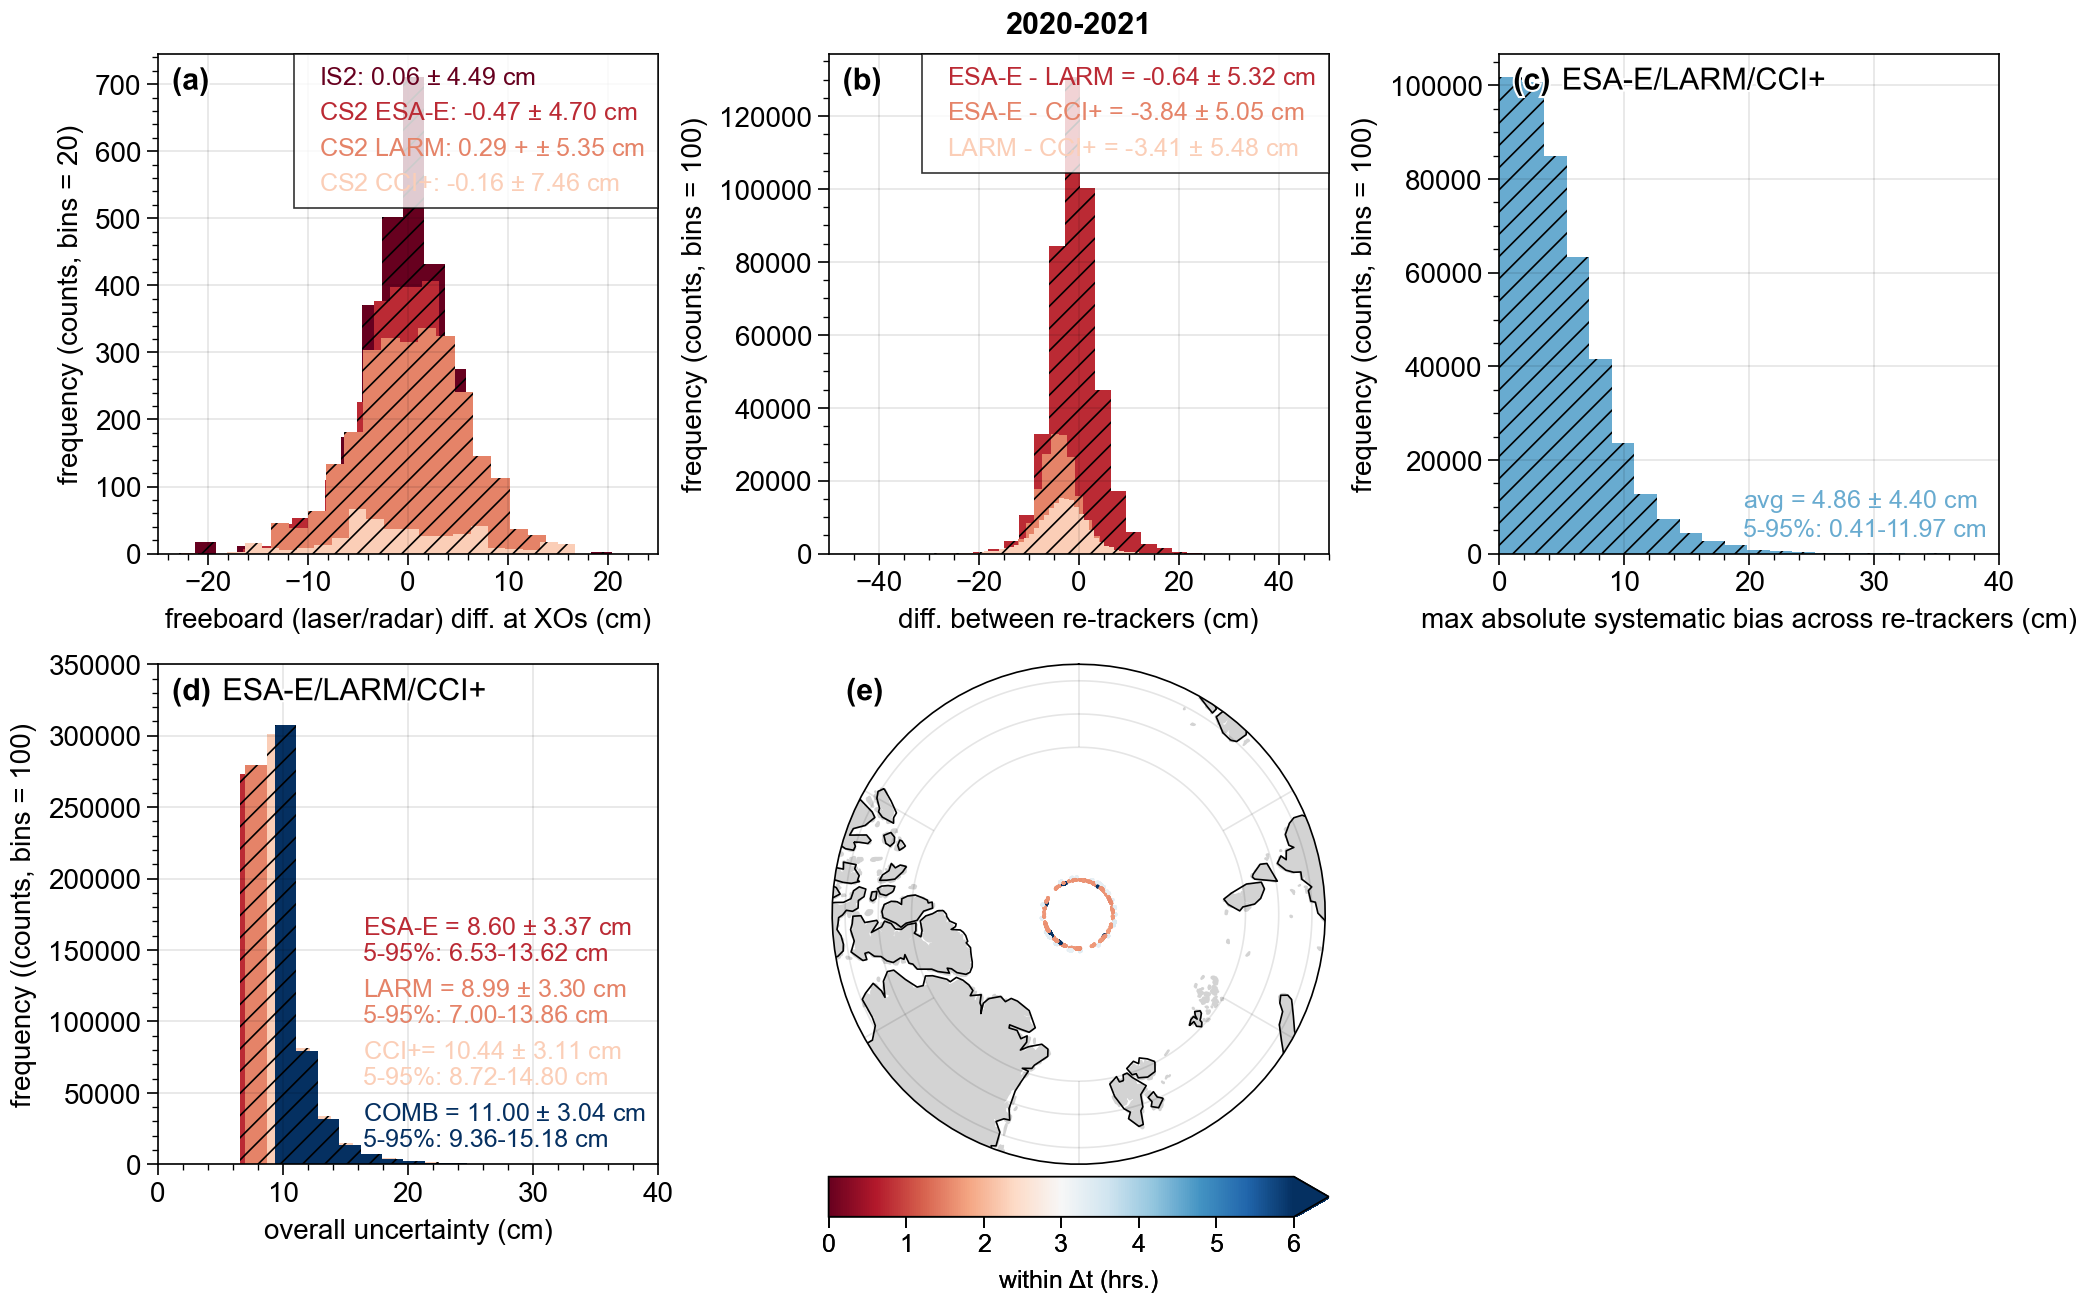

In [35]:
drive = 'D'

if season_folder == '2020-2021':
    fig, ax = pplt.subplots([[1,2,3], 
                            [4,5,6]],refwidth=2.5, refheight=2.5,sharey=False, sharex=False, proj={5:'nplaea'})
    title = ''
    
    resol='110m'
    fig.patch.set_facecolor('white')
    
    axs = ax[4]
    #cmap_qual3 =  plt.cm.get_cmap('blues_r', 8)  
    im = axs.scatter(np.array(df_XO_total_nonna['lon_B']), np.array(df_XO_total_nonna['lat_B']), c=np.array(df_XO_total_nonna['time_delta']), cmap='RdBu', s=0.5, vmin=0, vmax=6, extend='max')
    cb = axs.colorbar(im, label='within $\Delta$t (hrs.)', loc='b')
    axs.add_feature(cfeature.LAND, facecolor='lightgrey')
    axs.coastlines(resolution=resol, color='k')
    axs.format(boundinglat=75)
    
    
    n_bins = 20
    axs = ax[0]
    axs.hist((df_XO_total_nonna['IS2_fb_A']-df_XO_total_nonna['IS2_fb_B'])*100,bins=n_bins,histtype='stepfilled', hatch='///',c=cmap_qual(0),label='IS2: {:.2f} $\pm$ {:.2f} cm'.format(np.nanmean((df_XO_total_nonna['IS2_fb_A']-df_XO_total_nonna['IS2_fb_B'])*100), np.nanstd((df_XO_total_nonna['IS2_fb_A']-df_XO_total_nonna['IS2_fb_B'])*100)))
    axs.hist((df_XO_total_nonna['CS2_fb_A']-df_XO_total_nonna['CS2_fb_B'])*100,bins=n_bins, histtype='stepfilled', hatch='///',c=cmap_qual(1), label='CS2 ESA-E: {:.2f} $\pm$ {:.2f} cm'.format(np.nanmean((df_XO_total_nonna['CS2_fb_A']-df_XO_total_nonna['CS2_fb_B'])*100), np.nanstd((df_XO_total_nonna['CS2_fb_A']-df_XO_total_nonna['CS2_fb_B'])*100)))
    axs.hist((df_XO_total_nonna['CS2_LARM_fb_A']-df_XO_total_nonna['CS2_LARM_fb_B'])*100,bins=n_bins, histtype='stepfilled', hatch='///',c=cmap_qual(2), label='CS2 LARM: {:.2f} + $\pm$ {:.2f} cm'.format(np.nanmean((df_XO_total_nonna['CS2_LARM_fb_A']-df_XO_total_nonna['CS2_LARM_fb_B'])*100), np.nanstd((df_XO_total_nonna['CS2_LARM_fb_A']-df_XO_total_nonna['CS2_LARM_fb_B'])*100)))
    axs.hist((df_XO_total_nonna['CS2_CCI_fb_A']-df_XO_total_nonna['CS2_CCI_fb_B'])*100,bins=n_bins, histtype='stepfilled', hatch='///',c=cmap_qual(3), label='CS2 CCI+: {:.2f} $\pm$ {:.2f} cm'.format(np.nanmean((df_XO_total_nonna['CS2_CCI_fb_A']-df_XO_total_nonna['CS2_CCI_fb_B'])*100), np.nanstd((df_XO_total_nonna['CS2_CCI_fb_A']-df_XO_total_nonna['CS2_CCI_fb_B'])*100)))
    axs.format(xlabel='freeboard (laser/radar) diff. at XOs (cm)',ylabel='frequency (counts, bins = 20)', xlim=[-25, 25])
    axs.legend(loc='ur',handlelength=0, markersize=0,labelcolor='linecolor', ncol=1,fontsize=20)
    
    '''
    axs = ax[2]
    axs.hist((df_XO_total_nonna['C2I_A']-df_XO_total_nonna['C2I_B'])*100,bins=n_bins, histtype='step', hatch='///',c=cmap_qual(5), label='ESA-E: {:.2f} $\pm$ {:.2f} cm'.format(np.nanmean((df_XO_total_nonna['C2I_A']-df_XO_total_nonna['C2I_B'])*100), np.nanstd((df_XO_total_nonna['C2I_A']-df_XO_total_nonna['C2I_B'])*100)))
    axs.hist((df_XO_total_nonna['C2I_LARM_A']-df_XO_total_nonna['C2I_LARM_B'])*100,bins=n_bins, histtype='step', hatch='///',c=cmap_qual(6),label='LARM: {:.2f} $\pm$ {:.2f} cm'.format(np.nanmean((df_XO_total_nonna['C2I_LARM_A']-df_XO_total_nonna['C2I_LARM_B'])*100), np.nanstd((df_XO_total_nonna['C2I_LARM_A']-df_XO_total_nonna['C2I_LARM_B'])*100)))
    axs.hist((df_XO_total_nonna['C2I_CCI_A']-df_XO_total_nonna['C2I_CCI_B'])*100,bins=n_bins, histtype='step', hatch='///',c=cmap_qual(7),label='CCI+: {:.2f} $\pm$ {:.2f} cm'.format(np.nanmean((df_XO_total_nonna['C2I_CCI_A']-df_XO_total_nonna['C2I_CCI_B'])*100), np.nanstd((df_XO_total_nonna['C2I_CCI_A']-df_XO_total_nonna['C2I_CCI_B'])*100)))
    axs.legend(ncol=1,frame=False,loc='ur')
    axs.format(xlabel='C2I snow depth diff. at XOs (cm)',ylabel='', xlim=[-25, 25])
    '''
    
    axs = ax[1]
    n_bins = 100
    axs.hist(CRYO2ICE_comb_all['bias_fb_ESA-E_LARM']*100,bins=n_bins, label='ESA-E - LARM = {:.2f} $\pm$ {:.2f} cm'.format(np.nanmean(CRYO2ICE_comb_all['bias_fb_ESA-E_LARM']*100),np.nanstd(CRYO2ICE_comb_all['bias_fb_ESA-E_LARM']*100)), histtype='stepfilled', hatch='///',c=cmap_qual(1))
    axs.hist(CRYO2ICE_comb_all['bias_fb_ESA-E_CCI']*100,bins=n_bins, label='ESA-E - CCI+ = {:.2f} $\pm$ {:.2f} cm'.format(np.nanmean(CRYO2ICE_comb_all['bias_fb_ESA-E_CCI']*100),np.nanstd(CRYO2ICE_comb_all['bias_fb_ESA-E_CCI']*100)),histtype='stepfilled', hatch='///',c=cmap_qual(2))
    axs.hist(CRYO2ICE_comb_all['bias_fb_LARM_CCI']*100,bins=n_bins, label='LARM - CCI+ = {:.2f} $\pm$ {:.2f} cm'.format(np.nanmean(CRYO2ICE_comb_all['bias_fb_LARM_CCI']*100),np.nanstd(CRYO2ICE_comb_all['bias_fb_LARM_CCI']*100)), histtype='stepfilled', hatch='///',c=cmap_qual(3))
    axs.format(xlabel='diff. between re-trackers (cm)', ylabel='frequency (counts, bins = 100)', xlim=[-50,50])
    axs.legend(loc='ur',handlelength=0, markersize=0,labelcolor='linecolor', ncol=1,fontsize=20)
    
    axs = ax[2]
    n_bins = 100
    axs.hist(max_bias_cm,bins=n_bins,histtype='stepfilled', hatch='///',c=cmap_qual(5), label='avg = {:.2f} $\pm$ {:.2f} cm\n5-95%: {:.2f}-{:.2f} cm'.format(np.nanmean(max_bias_cm),np.nanstd(max_bias_cm),np.nanquantile(max_bias_cm, q=0.05),np.nanquantile(max_bias_cm, q=0.95)))
    axs.legend(loc='lr',handlelength=0, markersize=0,labelcolor='linecolor',frameon=False, ncol=1,fontsize=20)
    axs.format(xlabel='max absolute systematic bias across re-trackers (cm)',ultitle='ESA-E/LARM/CCI+', xlim=[0,40], ylabel='frequency (counts, bins = 100)')
    
    axs = ax[3]
    n_bins = 100
    axs.hist(uncertainity_C2I_ESAE,bins=n_bins,histtype='stepfilled', hatch='///',c=cmap_qual(1), label='ESA-E = {:.2f} $\pm$ {:.2f} cm\n5-95%: {:.2f}-{:.2f} cm'.format(np.nanmean(uncertainity_C2I_ESAE),np.nanstd(uncertainity_C2I_ESAE),np.nanquantile(uncertainity_C2I_ESAE, q=0.05),np.nanquantile(uncertainity_C2I_ESAE, q=0.95)))
    axs.hist(uncertainity_C2I_LARM,bins=n_bins,histtype='stepfilled', hatch='///',c=cmap_qual(2), label='LARM = {:.2f} $\pm$ {:.2f} cm\n5-95%: {:.2f}-{:.2f} cm'.format(np.nanmean(uncertainity_C2I_LARM),np.nanstd(uncertainity_C2I_LARM),np.nanquantile(uncertainity_C2I_LARM, q=0.05),np.nanquantile(uncertainity_C2I_LARM, q=0.95)))
    axs.hist(uncertainity_C2I_CCI,bins=n_bins,histtype='stepfilled', hatch='///',c=cmap_qual(3), label='CCI+= {:.2f} $\pm$ {:.2f} cm\n5-95%: {:.2f}-{:.2f} cm'.format(np.nanmean(uncertainity_C2I_CCI),np.nanstd(uncertainity_C2I_CCI),np.nanquantile(uncertainity_C2I_CCI, q=0.05),np.nanquantile(uncertainity_C2I_CCI, q=0.95)))
    axs.hist(uncertainity_C2I,bins=n_bins,histtype='stepfilled', hatch='///',c=cmap_qual(7), label='COMB = {:.2f} $\pm$ {:.2f} cm\n5-95%: {:.2f}-{:.2f} cm'.format(np.nanmean(uncertainity_C2I),np.nanstd(uncertainity_C2I),np.nanquantile(uncertainity_C2I, q=0.05),np.nanquantile(uncertainity_C2I, q=0.95)))
    axs.legend(loc='lr',handlelength=0, markersize=0,labelcolor='linecolor',frameon=False, ncol=1,fontsize=20)
    axs.format(xlabel='overall uncertainty (cm)',ultitle='ESA-E/LARM/CCI+',ylabel='frequency ((counts, bins = 100)',ylim=[0, 350000], xlim=[0,40])
    
    
    fig.format(abc="(a)", abcloc='ul',fontsize=10, suptitle=season_folder)
    fig.delaxes(ax[5])
    
    plt.savefig(r'{}:\uncertainty_XO_{}.png'.format(drive, season_folder), dpi=300)
elif season_folder == '2021-2022':
    fig, ax = pplt.subplots([[1,2,3], 
                            [4,5,6]],refwidth=2.5, refheight=2.5,sharey=False, sharex=False, proj={5:'nplaea'})
    title = ''
    
    resol='110m'
    fig.patch.set_facecolor('white')
    
    axs = ax[4]
    #cmap_qual3 =  plt.cm.get_cmap('blues_r', 8)  
    im = axs.scatter(np.array(df_XO_total_nonna['lon_B']), np.array(df_XO_total_nonna['lat_B']), c=np.array(df_XO_total_nonna['time_delta']), cmap='RdBu', s=0.5, vmin=0, vmax=6, extend='max')
    cb = axs.colorbar(im, label='within $\Delta$t (hrs.)', loc='b')
    axs.add_feature(cfeature.LAND, facecolor='lightgrey')
    axs.coastlines(resolution=resol, color='k')
    axs.format(boundinglat=75)
    
    
    n_bins = 20
    axs = ax[0]
    axs.hist((df_XO_total_nonna['CS2_LARM_fb_A']-df_XO_total_nonna['CS2_LARM_fb_B'])*100,bins=n_bins, histtype='stepfilled', hatch='///',c=cmap_qual(2), label='CS2 LARM: {:.2f} + $\pm$ {:.2f} cm'.format(np.nanmean((df_XO_total_nonna['CS2_LARM_fb_A']-df_XO_total_nonna['CS2_LARM_fb_B'])*100), np.nanstd((df_XO_total_nonna['CS2_LARM_fb_A']-df_XO_total_nonna['CS2_LARM_fb_B'])*100)))
    axs.hist((df_XO_total_nonna['IS2_fb_A']-df_XO_total_nonna['IS2_fb_B'])*100,bins=n_bins,histtype='stepfilled', hatch='///',c=cmap_qual(0),label='IS2: {:.2f} $\pm$ {:.2f} cm'.format(np.nanmean((df_XO_total_nonna['IS2_fb_A']-df_XO_total_nonna['IS2_fb_B'])*100), np.nanstd((df_XO_total_nonna['IS2_fb_A']-df_XO_total_nonna['IS2_fb_B'])*100)))
    axs.hist((df_XO_total_nonna['CS2_fb_A']-df_XO_total_nonna['CS2_fb_B'])*100,bins=n_bins, histtype='stepfilled', hatch='///',c=cmap_qual(1), label='CS2 ESA-E: {:.2f} $\pm$ {:.2f} cm'.format(np.nanmean((df_XO_total_nonna['CS2_fb_A']-df_XO_total_nonna['CS2_fb_B'])*100), np.nanstd((df_XO_total_nonna['CS2_fb_A']-df_XO_total_nonna['CS2_fb_B'])*100)))
    #axs.hist((df_XO_total_nonna['CS2_CCI_fb_A']-df_XO_total_nonna['CS2_CCI_fb_B'])*100,bins=n_bins, histtype='stepfilled', hatch='///',c=cmap_qual(3), label='CS2 CCI+: {:.2f} $\pm$ {:.2f} cm'.format(np.nanmean((df_XO_total_nonna['CS2_CCI_fb_A']-df_XO_total_nonna['CS2_CCI_fb_B'])*100), np.nanstd((df_XO_total_nonna['CS2_CCI_fb_A']-df_XO_total_nonna['CS2_CCI_fb_B'])*100)))
    axs.format(xlabel='freeboard (laser/radar) diff. at XOs (cm)',ylabel='frequency (counts, bins = 20)', xlim=[-25, 25])
    axs.legend(loc='ur',handlelength=0, markersize=0,labelcolor='linecolor', ncol=1,fontsize=20)
    
    '''
    axs = ax[2]
    axs.hist((df_XO_total_nonna['C2I_A']-df_XO_total_nonna['C2I_B'])*100,bins=n_bins, histtype='step', hatch='///',c=cmap_qual(5), label='ESA-E: {:.2f} $\pm$ {:.2f} cm'.format(np.nanmean((df_XO_total_nonna['C2I_A']-df_XO_total_nonna['C2I_B'])*100), np.nanstd((df_XO_total_nonna['C2I_A']-df_XO_total_nonna['C2I_B'])*100)))
    axs.hist((df_XO_total_nonna['C2I_LARM_A']-df_XO_total_nonna['C2I_LARM_B'])*100,bins=n_bins, histtype='step', hatch='///',c=cmap_qual(6),label='LARM: {:.2f} $\pm$ {:.2f} cm'.format(np.nanmean((df_XO_total_nonna['C2I_LARM_A']-df_XO_total_nonna['C2I_LARM_B'])*100), np.nanstd((df_XO_total_nonna['C2I_LARM_A']-df_XO_total_nonna['C2I_LARM_B'])*100)))
    axs.hist((df_XO_total_nonna['C2I_CCI_A']-df_XO_total_nonna['C2I_CCI_B'])*100,bins=n_bins, histtype='step', hatch='///',c=cmap_qual(7),label='CCI+: {:.2f} $\pm$ {:.2f} cm'.format(np.nanmean((df_XO_total_nonna['C2I_CCI_A']-df_XO_total_nonna['C2I_CCI_B'])*100), np.nanstd((df_XO_total_nonna['C2I_CCI_A']-df_XO_total_nonna['C2I_CCI_B'])*100)))
    axs.legend(ncol=1,frame=False,loc='ur')
    axs.format(xlabel='C2I snow depth diff. at XOs (cm)',ylabel='', xlim=[-25, 25])
    '''
    
    axs = ax[1]
    n_bins = 100
    axs.hist(CRYO2ICE_comb_all['bias_fb_ESA-E_LARM']*100,bins=n_bins, label='ESA-E - LARM = {:.2f} $\pm$ {:.2f} cm'.format(np.nanmean(CRYO2ICE_comb_all['bias_fb_ESA-E_LARM']*100),np.nanstd(CRYO2ICE_comb_all['bias_fb_ESA-E_LARM']*100)), histtype='stepfilled', hatch='///',c=cmap_qual(1))
    #axs.hist(CRYO2ICE_comb_all['bias_fb_ESA-E_CCI']*100,bins=n_bins, label='ESA-E - CCI+ = {:.2f} $\pm$ {:.2f} cm'.format(np.nanmean(CRYO2ICE_comb_all['bias_fb_ESA-E_CCI']*100),np.nanstd(CRYO2ICE_comb_all['bias_fb_ESA-E_CCI']*100)),histtype='stepfilled', hatch='///',c=cmap_qual(2))
    #axs.hist(CRYO2ICE_comb_all['bias_fb_LARM_CCI']*100,bins=n_bins, label='LARM - CCI+ = {:.2f} $\pm$ {:.2f} cm'.format(np.nanmean(CRYO2ICE_comb_all['bias_fb_LARM_CCI']*100),np.nanstd(CRYO2ICE_comb_all['bias_fb_LARM_CCI']*100)), histtype='stepfilled', hatch='///',c=cmap_qual(3))
    axs.format(xlabel='diff. between re-trackers (cm)', ylabel='frequency (counts, bins = 100)', xlim=[-50,50])
    axs.legend(loc='ur',handlelength=0, markersize=0,labelcolor='linecolor', ncol=1,fontsize=20)
    
    axs = ax[2]
    n_bins = 100
    axs.hist(max_bias_cm,bins=n_bins,histtype='stepfilled', hatch='///',c=cmap_qual(5), label='avg = {:.2f} $\pm$ {:.2f} cm\n5-95%: {:.2f}-{:.2f} cm'.format(np.nanmean(max_bias_cm),np.nanstd(max_bias_cm),np.nanquantile(max_bias_cm, q=0.05),np.nanquantile(max_bias_cm, q=0.95)))
    axs.legend(loc='lr',handlelength=0, markersize=0,labelcolor='linecolor',frameon=False, ncol=1,fontsize=20)
    axs.format(xlabel='max absolute systematic bias across re-trackers (cm)',ultitle='ESA-E/LARM', xlim=[0,40], ylabel='frequency (counts, bins = 100)')
    
    axs = ax[3]
    n_bins = 100
    axs.hist(uncertainity_C2I_ESAE,bins=n_bins,histtype='stepfilled', hatch='///',c=cmap_qual(1), label='ESA-E = {:.2f} $\pm$ {:.2f} cm\n5-95%: {:.2f}-{:.2f} cm'.format(np.nanmean(uncertainity_C2I_ESAE),np.nanstd(uncertainity_C2I_ESAE),np.nanquantile(uncertainity_C2I_ESAE, q=0.05),np.nanquantile(uncertainity_C2I_ESAE, q=0.95)))
    axs.hist(uncertainity_C2I_LARM,bins=n_bins,histtype='stepfilled', hatch='///',c=cmap_qual(2), label='LARM = {:.2f} $\pm$ {:.2f} cm\n5-95%: {:.2f}-{:.2f} cm'.format(np.nanmean(uncertainity_C2I_LARM),np.nanstd(uncertainity_C2I_LARM),np.nanquantile(uncertainity_C2I_LARM, q=0.05),np.nanquantile(uncertainity_C2I_LARM, q=0.95)))
    #axs.hist(uncertainity_C2I_CCI,bins=n_bins,histtype='stepfilled', hatch='///',c=cmap_qual(3), label='CCI+= {:.2f} $\pm$ {:.2f} cm\n5-95%: {:.2f}-{:.2f} cm'.format(np.nanmean(uncertainity_C2I_CCI),np.nanstd(uncertainity_C2I_CCI),np.nanquantile(uncertainity_C2I_CCI, q=0.05),np.nanquantile(uncertainity_C2I_CCI, q=0.95)))
    axs.hist(uncertainity_C2I,bins=n_bins,histtype='stepfilled', hatch='///',c=cmap_qual(7), label='COMB = {:.2f} $\pm$ {:.2f} cm\n5-95%: {:.2f}-{:.2f} cm'.format(np.nanmean(uncertainity_C2I),np.nanstd(uncertainity_C2I),np.nanquantile(uncertainity_C2I, q=0.05),np.nanquantile(uncertainity_C2I, q=0.95)))
    axs.legend(loc='lr',handlelength=0, markersize=0,labelcolor='linecolor',frameon=False, ncol=1,fontsize=20)
    axs.format(xlabel='overall uncertainty (cm)',ultitle='ESA-E/LARM',ylabel='frequency (counts, bins = 100)',ylim=[0, 350000], xlim=[0,40])
    
    
    fig.format(abc="(a)", abcloc='ul',fontsize=10, suptitle=season_folder)
    fig.delaxes(ax[5])
    
    plt.savefig(r'{}:\uncertainty_XO_{}.png'.format(drive, season_folder), dpi=300)

# CryoSat2, ICESat-2, SnowModel-LG monthly products

In [667]:
def grid_data(lat_ori, lon_ori, var_ori, ref_lat, ref_lon, method_name='nearest'):
    # Check array sizes
    if len(lat_ori) != len(lon_ori) != len(var_ori) or len(ref_lat) != len(ref_lon):
        raise ValueError("Input array sizes do not match.")
    
    # Rest of your code
    grid_var = griddata((lon_ori, lat_ori), var_ori, (ref_lon, ref_lat), method=method_name)
    
    return grid_var

drive = 'D'
if season_folder == '2020-2021':

    print('Season {} being anaylsed for 25-km gridded products and compared with 25-km C2I segments'.format(season_folder))
    
    import h5py

    print('IS2 data loading...')
    filename = r"{}:\DTU\CRYO2ICE\ATL20\ATL20-01_20201101002333_05780901_004_01.h5".format(drive)
    
    with h5py.File(filename, "r") as f:
        lat = f['grid_lat'][:]
        lon = f['grid_lon'][:]
        nov_fb = f['monthly/mean_fb'][:]
        nov_fb[nov_fb>100]=np.nan
        lat=lat.ravel()
        lon=lon.ravel()
        nov_fb=nov_fb.ravel()
        
    filename = r"{}:\DTU\CRYO2ICE\ATL20\ATL20-01_20201201000814_10360901_004_01.h5".format(drive)
    with h5py.File(filename, "r") as f:
        dec_fb = f['monthly/mean_fb'][:]
        dec_fb[dec_fb>100]=np.nan
        dec_fb=dec_fb.ravel()
        
    filename = r"{}:\DTU\CRYO2ICE\ATL20\ATL20-01_20210101010136_01231001_004_01.h5".format(drive)
    with h5py.File(filename, "r") as f:
        jan_fb = f['monthly/mean_fb'][:]
        jan_fb[jan_fb>100]=np.nan
        jan_fb=jan_fb.ravel()
        
    filename = r"{}:\DTU\CRYO2ICE\ATL20\ATL20-01_20210201002039_05961001_004_01.h5".format(drive)
    with h5py.File(filename, "r") as f:
        feb_fb = f['monthly/mean_fb'][:]
        feb_fb[feb_fb>100]=np.nan
        feb_fb=feb_fb.ravel()
        
    filename = r"{}:\DTU\CRYO2ICE\ATL20\ATL20-01_20210301005637_10241001_004_01.h5".format(drive)
    with h5py.File(filename, "r") as f:
        mar_fb = f['monthly/mean_fb'][:]
        mar_fb[mar_fb>100]=np.nan
        mar_fb=mar_fb.ravel()
        
    filename = r"{}:\DTU\CRYO2ICE\ATL20\ATL20-01_20210401001541_01101101_004_01.h5".format(drive)
    with h5py.File(filename, "r") as f:
        apr_fb = f['monthly/mean_fb'][:]
        apr_fb[apr_fb>100]=np.nan
        apr_fb=apr_fb.ravel()
        
        
    df_ATL20 = pd.DataFrame({'lat':lat, 'lon':lon, 'IS2_fb_nov':nov_fb,'IS2_fb_dec':dec_fb,'IS2_fb_jan':jan_fb,'IS2_fb_feb':feb_fb,
                            'IS2_fb_mar':mar_fb,'IS2_fb_apr':apr_fb})

    print('CS2 CCI+ data loading...')
    def load_data(path, fp):
        nc_file = netCDF4.Dataset(path + '/' + fp, 'r')
        sea_ice_freeboard = nc_file.variables['radar_freeboard'][:][0]
        lat = nc_file.variables['lat'][:]
        lon = nc_file.variables['lon'][:]
        nc_file.close()
        return sea_ice_freeboard, lat, lon

    path = r"{}:\DTU\CRYO2ICE\CCI\Gridded_CCI".format(drive)
    filename = "ESACCI-SEAICE-l3C-SITHICK-SIRAL_CRYOSAT2-NH_25KM_EASE2-202011-fv3p0-rc1.nc"
    CCI_fb_nov, lat, lon = load_data(path, filename)
    filename = "ESACCI-SEAICE-l3C-SITHICK-SIRAL_CRYOSAT2-NH_25KM_EASE2-202012-fv3p0-rc1.nc"
    CCI_fb_dec, lat, lon = load_data(path, filename)
    filename = "ESACCI-SEAICE-l3C-SITHICK-SIRAL_CRYOSAT2-NH_25KM_EASE2-202101-fv3p0-rc1.nc"
    CCI_fb_jan, lat, lon = load_data(path, filename)
    filename = "ESACCI-SEAICE-l3C-SITHICK-SIRAL_CRYOSAT2-NH_25KM_EASE2-202102-fv3p0-rc1.nc"
    CCI_fb_feb, lat, lon = load_data(path, filename)
    filename = "ESACCI-SEAICE-l3C-SITHICK-SIRAL_CRYOSAT2-NH_25KM_EASE2-202103-fv3p0-rc1.nc"
    CCI_fb_mar, lat, lon = load_data(path, filename)
    filename = "ESACCI-SEAICE-l3C-SITHICK-SIRAL_CRYOSAT2-NH_25KM_EASE2-202104-fv3p0-rc1.nc"
    CCI_fb_apr, lat, lon = load_data(path, filename)
    
    df_CCI_month = pd.DataFrame({'lat':lat.flatten(), 'lon':lon.flatten(), 'CCI_fb_nov':CCI_fb_nov.flatten(),'CCI_fb_dec':CCI_fb_dec.flatten(), 'CCI_fb_jan':CCI_fb_jan.flatten(),
                                 'CCI_fb_feb':CCI_fb_feb.flatten(), 'CCI_fb_mar':CCI_fb_mar.flatten(), 'CCI_fb_apr':CCI_fb_apr.flatten()})

    print('CS2 LARM data loading...')
    
    def load_data(path, fp):
        nc_file = netCDF4.Dataset(path + '/' + fp, 'r')
        sea_ice_freeboard = nc_file.variables['radar_freeboard'][:]
        lat = nc_file.variables['latitude'][:]
        lon = nc_file.variables['longitude'][:]

        nc_file.close()
        return sea_ice_freeboard, lat, lon 
    
    path = r"{}:\DTU\CRYO2ICE\LARM\BaselineE_gridded".format(drive)
    filename = "uit_cryosat2_L3_EASE2_nh25km_2020_11_v3.nc"
    LARM_nov, lat, lon = load_data(path, filename)
    filename = "uit_cryosat2_L3_EASE2_nh25km_2020_12_v3.nc"
    LARM_dec, lat, lon = load_data(path, filename)
    filename = "uit_cryosat2_L3_EASE2_nh25km_2021_01_v3.nc"
    LARM_jan, lat, lon= load_data(path, filename)
    filename = "uit_cryosat2_L3_EASE2_nh25km_2021_02_v3.nc"
    LARM_feb, lat, lon = load_data(path, filename)
    filename = "uit_cryosat2_L3_EASE2_nh25km_2021_03_v3.nc"
    LARM_mar, lat, lon = load_data(path, filename)
    filename = "uit_cryosat2_L3_EASE2_nh25km_2021_04_v3.nc"
    LARM_apr, lat, lon = load_data(path, filename)
      
    df_LARM_month = pd.DataFrame({'lat':lat.flatten(), 'lon':lon.flatten(), 'LARM_fb_nov':LARM_nov.flatten(), 'LARM_fb_dec':LARM_dec.flatten(), 'LARM_fb_jan':LARM_jan.flatten(),
                                 'LARM_fb_feb':LARM_feb.flatten(), 'LARM_fb_mar':LARM_mar.flatten(), 'LARM_fb_apr':LARM_apr.flatten()})
    
    
    def load_data(path, fp):
        nc_file = netCDF4.Dataset(path + '/' + fp, 'r')
        sea_ice_freeboard = nc_file.variables['Radar_Freeboard_CS2'][:]
        ice_freeboard = nc_file.variables['Laser_Freeboard_IS2'][:]
        lat = nc_file.variables['Latitude'][:]
        lon = nc_file.variables['Longitude'][:]
        yr = nc_file.variables['Year'][:]
        month = nc_file.variables['Month'][:]
        nc_file.close()
        return sea_ice_freeboard, lat, lon, yr, month, ice_freeboard

    path = r"D:\DTU\CRYO2ICE\LARM"
    filename = "uit_snow_depth_50km_v2.nc"
    LARM, lat, lon, yr, month, IS2 = load_data(path, filename)
    
    
    df_LARM = pd.DataFrame({'lat':lat.flatten(), 'lon':lon.flatten()})
    
    
    print('mW99 data loading...')
    def load_data(path, fp):
        nc_file = netCDF4.Dataset(path + '/' + fp, 'r')
        snow_depth = nc_file.variables['snow_depth_W99'][:]
        lat = nc_file.variables['latitude'][:]
        lon = nc_file.variables['longitude'][:]
        nc_file.close()
        return snow_depth, lat, lon 

    path = r"{}:\DTU\CRYO2ICE\LARM\BaselineE_gridded".format(drive)
    filename = "uit_cryosat2_L3_EASE2_nh25km_2020_11_v3.nc"
    mW99_nov, lat, lon = load_data(path, filename)
    filename = "uit_cryosat2_L3_EASE2_nh25km_2020_12_v3.nc"
    mW99_dec, lat, lon = load_data(path, filename)
    filename = "uit_cryosat2_L3_EASE2_nh25km_2021_01_v3.nc"
    mW99_jan, lat, lon= load_data(path, filename)
    filename = "uit_cryosat2_L3_EASE2_nh25km_2021_02_v3.nc"
    mW99_feb, lat, lon = load_data(path, filename)
    filename = "uit_cryosat2_L3_EASE2_nh25km_2021_03_v3.nc"
    mW99_mar, lat, lon = load_data(path, filename)
    filename = "uit_cryosat2_L3_EASE2_nh25km_2021_04_v3.nc"
    mW99_apr, lat, lon = load_data(path, filename)
    
    
    df_mW99_month = pd.DataFrame({'lat':lat.flatten(), 'lon':lon.flatten(), 'mW99_nov':mW99_nov.flatten(),'mW99_dec':mW99_dec.flatten(),
                                  'mW99_jan':mW99_jan.flatten(),'mW99_feb':mW99_feb.flatten(),'mW99_mar':mW99_mar.flatten(),'mW99_apr':mW99_apr.flatten()})
    '''
    df = df_mW99_month
    var = 'mW99_nov'
    df_LARM_month[var]=df[var]
    var = 'mW99_dec'
    df_LARM_month[var]=df[var]
    var = 'mW99_jan'
    df_LARM_month[var]=df[var]
    var = 'mW99_feb'
    df_LARM_month[var]=df[var]
    var = 'mW99_mar'
    df_LARM_month[var]=df[var]
    var = 'mW99_apr'
    df_LARM_month[var]=df[var]
    '''

    print('Regridding of data...')
    df = df_ATL20
    var = 'IS2_fb_nov'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid
    var = 'IS2_fb_dec'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid
    var = 'IS2_fb_jan'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid
    var = 'IS2_fb_feb'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid
    var = 'IS2_fb_mar'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid
    var = 'IS2_fb_apr'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid

    print('IS2 regridded...')

    df = df_CCI_month
    var = 'CCI_fb_nov'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid
    var = 'CCI_fb_dec'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid
    var = 'CCI_fb_jan'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid
    var = 'CCI_fb_feb'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid
    var = 'CCI_fb_mar'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid
    var = 'CCI_fb_apr'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid

    print('CCI regridded...')

    df_LARM_month = df_LARM_month[df_LARM_month['lat']>60]
    #'''
    df = df_LARM_month
    var = 'LARM_fb_nov'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid
    var = 'LARM_fb_dec'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid
    var = 'LARM_fb_jan'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid
    var = 'LARM_fb_feb'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid
    var = 'LARM_fb_mar'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid
    var = 'LARM_fb_apr'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid

    print('LARM regridded...')

    df_mW99_month = df_mW99_month[df_mW99_month['lat']>60]
    
    df = df_mW99_month
    var = 'mW99_nov'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid
    var = 'mW99_dec'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid
    var = 'mW99_jan'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid
    var = 'mW99_feb'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid
    var = 'mW99_mar'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid
    var = 'mW99_apr'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid

    print('mW99 regridded...')
    #'''

    def add_CRYO2ICE_snow_depth(df, var1, var2, var3, df2):
        
        ds = 0.30
        ns = (1+0.51*ds)**(1.5)
        df2[var3] = (df[var1]-df[var2])/ns
        return df2

    print('Computation of LaKu snow depths...')

    df_LARM[df_LARM['lat']>88]=np.nan
    
    df_CRYO2ICE_month = pd.DataFrame({'lat':df_LARM['lat'], 'lon':df_LARM['lon']})
    
    df = df_LARM
    var1, var2, var3 = 'IS2_fb_nov', 'LARM_fb_nov', 'C2I_LARM_nov'
    df_CRYO2ICE_month = add_CRYO2ICE_snow_depth(df, var1, var2, var3, df_CRYO2ICE_month)
    var1, var2, var3 = 'IS2_fb_jan', 'LARM_fb_jan', 'C2I_LARM_jan'
    df_CRYO2ICE_month = add_CRYO2ICE_snow_depth(df, var1, var2, var3, df_CRYO2ICE_month)
    var1, var2, var3 = 'IS2_fb_dec', 'LARM_fb_dec', 'C2I_LARM_dec'
    df_CRYO2ICE_month = add_CRYO2ICE_snow_depth(df, var1, var2, var3, df_CRYO2ICE_month)
    var1, var2, var3 = 'IS2_fb_feb', 'LARM_fb_feb', 'C2I_LARM_feb'
    df_CRYO2ICE_month = add_CRYO2ICE_snow_depth(df, var1, var2, var3, df_CRYO2ICE_month)
    var1, var2, var3 = 'IS2_fb_mar', 'LARM_fb_mar', 'C2I_LARM_mar'
    df_CRYO2ICE_month = add_CRYO2ICE_snow_depth(df, var1, var2, var3, df_CRYO2ICE_month)
    var1, var2, var3 = 'IS2_fb_apr', 'LARM_fb_apr', 'C2I_LARM_apr'
    df_CRYO2ICE_month = add_CRYO2ICE_snow_depth(df, var1, var2, var3, df_CRYO2ICE_month)
    
    var1, var2, var3 = 'IS2_fb_nov', 'CCI_fb_nov', 'C2I_CCI_nov'
    df_CRYO2ICE_month = add_CRYO2ICE_snow_depth(df, var1, var2, var3, df_CRYO2ICE_month)
    var1, var2, var3 = 'IS2_fb_nov', 'CCI_fb_nov', 'C2I_CCI_dec'
    df_CRYO2ICE_month = add_CRYO2ICE_snow_depth(df, var1, var2, var3, df_CRYO2ICE_month)
    var1, var2, var3 = 'IS2_fb_jan', 'CCI_fb_jan', 'C2I_CCI_jan'
    df_CRYO2ICE_month = add_CRYO2ICE_snow_depth(df, var1, var2, var3, df_CRYO2ICE_month)
    var1, var2, var3 = 'IS2_fb_feb', 'CCI_fb_feb', 'C2I_CCI_feb'
    df_CRYO2ICE_month = add_CRYO2ICE_snow_depth(df, var1, var2, var3, df_CRYO2ICE_month)
    var1, var2, var3 = 'IS2_fb_mar', 'CCI_fb_mar', 'C2I_CCI_mar'
    df_CRYO2ICE_month = add_CRYO2ICE_snow_depth(df, var1, var2, var3, df_CRYO2ICE_month)
    var1, var2, var3 = 'IS2_fb_apr', 'CCI_fb_apr', 'C2I_CCI_apr'
    df_CRYO2ICE_month = add_CRYO2ICE_snow_depth(df, var1, var2, var3, df_CRYO2ICE_month)

    df_CRYO2ICE_month['C2I_LARM_nov_dec']=(df_CRYO2ICE_month['C2I_LARM_nov']+df_CRYO2ICE_month['C2I_LARM_dec'])/2
    df_CRYO2ICE_month['C2I_LARM_jan_feb']=(df_CRYO2ICE_month['C2I_LARM_jan']+df_CRYO2ICE_month['C2I_LARM_feb'])/2
    df_CRYO2ICE_month['C2I_LARM_mar_apr']=(df_CRYO2ICE_month['C2I_LARM_mar']+df_CRYO2ICE_month['C2I_LARM_apr'])/2
    df_CRYO2ICE_month['C2I_CCI_nov_dec']=(df_CRYO2ICE_month['C2I_CCI_nov']+df_CRYO2ICE_month['C2I_CCI_dec'])/2
    df_CRYO2ICE_month['C2I_CCI_jan_feb']=(df_CRYO2ICE_month['C2I_CCI_jan']+df_CRYO2ICE_month['C2I_CCI_feb'])/2
    df_CRYO2ICE_month['C2I_CCI_mar_apr']=(df_CRYO2ICE_month['C2I_CCI_mar']+df_CRYO2ICE_month['C2I_CCI_apr'])/2

    print('Analysis finished.')
elif season_folder == '2021-2022':
    print('Currently not avaiable to process season {}'.format(season_folder))


    print('Season {} being anaylsed for 25-km gridded products and compared with 25-km C2I segments'.format(season_folder))
    
    import h5py

    print('IS2 data loading...')
    filename = r"{}:\DTU\CRYO2ICE\ATL20\ATL20-01_20211101012857_06051301_004_01.h5".format(drive)
    
    with h5py.File(filename, "r") as f:
        lat = f['grid_lat'][:]
        lon = f['grid_lon'][:]
        nov_fb = f['monthly/mean_fb'][:]
        nov_fb[nov_fb>100]=np.nan
        lat=lat.ravel()
        lon=lon.ravel()
        nov_fb=nov_fb.ravel()
        
    filename = r"{}:\DTU\CRYO2ICE\ATL20\ATL20-01_20211201011339_10631301_004_01.h5".format(drive)
    with h5py.File(filename, "r") as f:
        dec_fb = f['monthly/mean_fb'][:]
        dec_fb[dec_fb>100]=np.nan
        dec_fb=dec_fb.ravel()
        
    filename = r"{}:\DTU\CRYO2ICE\ATL20\ATL20-01_20220101003240_01491401_004_01.h5".format(drive)
    with h5py.File(filename, "r") as f:
        jan_fb = f['monthly/mean_fb'][:]
        jan_fb[jan_fb>100]=np.nan
        jan_fb=jan_fb.ravel()
        
    filename = r"{}:\DTU\CRYO2ICE\ATL20\ATL20-01_20220201012600_06231401_004_01.h5".format(drive)
    with h5py.File(filename, "r") as f:
        feb_fb = f['monthly/mean_fb'][:]
        feb_fb[feb_fb>100]=np.nan
        feb_fb=feb_fb.ravel()
        
    filename = r"{}:\DTU\CRYO2ICE\ATL20\ATL20-01_20220301002744_10501401_004_01.h5".format(drive)
    with h5py.File(filename, "r") as f:
        mar_fb = f['monthly/mean_fb'][:]
        mar_fb[mar_fb>100]=np.nan
        mar_fb=mar_fb.ravel()
        
    filename = r"{}:\DTU\CRYO2ICE\ATL20\ATL20-01_20220401012104_01371501_004_01.h5".format(drive)
    with h5py.File(filename, "r") as f:
        apr_fb = f['monthly/mean_fb'][:]
        apr_fb[apr_fb>100]=np.nan
        apr_fb=apr_fb.ravel()
        
        
    df_ATL20 = pd.DataFrame({'lat':lat, 'lon':lon, 'IS2_fb_nov':nov_fb,'IS2_fb_dec':dec_fb,'IS2_fb_jan':jan_fb,'IS2_fb_feb':feb_fb,
                            'IS2_fb_mar':mar_fb,'IS2_fb_apr':apr_fb})

    print('CS2 LARM data loading...')
    
    def load_data(path, fp):
        nc_file = netCDF4.Dataset(path + '/' + fp, 'r')
        sea_ice_freeboard = nc_file.variables['radar_freeboard'][:]
        lat = nc_file.variables['latitude'][:]
        lon = nc_file.variables['longitude'][:]

        nc_file.close()
        return sea_ice_freeboard, lat, lon 
    
    path = r"{}:\DTU\CRYO2ICE\LARM\BaselineE_gridded".format(drive)
    filename = "uit_cryosat2_L3_EASE2_nh25km_2020_11_v3.nc"
    LARM_nov, lat, lon = load_data(path, filename)
    filename = "uit_cryosat2_L3_EASE2_nh25km_2020_12_v3.nc"
    LARM_dec, lat, lon = load_data(path, filename)
    filename = "uit_cryosat2_L3_EASE2_nh25km_2021_01_v3.nc"
    LARM_jan, lat, lon= load_data(path, filename)
    filename = "uit_cryosat2_L3_EASE2_nh25km_2021_02_v3.nc"
    LARM_feb, lat, lon = load_data(path, filename)
    filename = "uit_cryosat2_L3_EASE2_nh25km_2021_03_v3.nc"
    LARM_mar, lat, lon = load_data(path, filename)
    filename = "uit_cryosat2_L3_EASE2_nh25km_2021_04_v3.nc"
    LARM_apr, lat, lon = load_data(path, filename)
      
    df_LARM_month = pd.DataFrame({'lat':lat.flatten(), 'lon':lon.flatten(), 'LARM_fb_nov':LARM_nov.flatten(), 'LARM_fb_dec':LARM_dec.flatten(), 'LARM_fb_jan':LARM_jan.flatten(),
                                 'LARM_fb_feb':LARM_feb.flatten(), 'LARM_fb_mar':LARM_mar.flatten(), 'LARM_fb_apr':LARM_apr.flatten()})
    
    
    def load_data(path, fp):
        nc_file = netCDF4.Dataset(path + '/' + fp, 'r')
        sea_ice_freeboard = nc_file.variables['Radar_Freeboard_CS2'][:]
        ice_freeboard = nc_file.variables['Laser_Freeboard_IS2'][:]
        lat = nc_file.variables['Latitude'][:]
        lon = nc_file.variables['Longitude'][:]
        yr = nc_file.variables['Year'][:]
        month = nc_file.variables['Month'][:]
        nc_file.close()
        return sea_ice_freeboard, lat, lon, yr, month, ice_freeboard

    path = r"D:\DTU\CRYO2ICE\LARM"
    filename = "uit_snow_depth_50km_v2.nc"
    LARM, lat, lon, yr, month, IS2 = load_data(path, filename)
    
    
    df_LARM = pd.DataFrame({'lat':lat.flatten(), 'lon':lon.flatten()})
    
    
    print('mW99 data loading...')
    def load_data(path, fp):
        nc_file = netCDF4.Dataset(path + '/' + fp, 'r')
        snow_depth = nc_file.variables['snow_depth_W99'][:]
        lat = nc_file.variables['latitude'][:]
        lon = nc_file.variables['longitude'][:]
        nc_file.close()
        return snow_depth, lat, lon 

    path = r"{}:\DTU\CRYO2ICE\LARM\BaselineE_gridded".format(drive)
    filename = "uit_cryosat2_L3_EASE2_nh25km_2020_11_v3.nc"
    mW99_nov, lat, lon = load_data(path, filename)
    filename = "uit_cryosat2_L3_EASE2_nh25km_2020_12_v3.nc"
    mW99_dec, lat, lon = load_data(path, filename)
    filename = "uit_cryosat2_L3_EASE2_nh25km_2021_01_v3.nc"
    mW99_jan, lat, lon= load_data(path, filename)
    filename = "uit_cryosat2_L3_EASE2_nh25km_2021_02_v3.nc"
    mW99_feb, lat, lon = load_data(path, filename)
    filename = "uit_cryosat2_L3_EASE2_nh25km_2021_03_v3.nc"
    mW99_mar, lat, lon = load_data(path, filename)
    filename = "uit_cryosat2_L3_EASE2_nh25km_2021_04_v3.nc"
    mW99_apr, lat, lon = load_data(path, filename)
    
    
    df_mW99_month = pd.DataFrame({'lat':lat.flatten(), 'lon':lon.flatten(), 'mW99_nov':mW99_nov.flatten(),'mW99_dec':mW99_dec.flatten(),
                                  'mW99_jan':mW99_jan.flatten(),'mW99_feb':mW99_feb.flatten(),'mW99_mar':mW99_mar.flatten(),'mW99_apr':mW99_apr.flatten()})
    '''
    df = df_mW99_month
    var = 'mW99_nov'
    df_LARM_month[var]=df[var]
    var = 'mW99_dec'
    df_LARM_month[var]=df[var]
    var = 'mW99_jan'
    df_LARM_month[var]=df[var]
    var = 'mW99_feb'
    df_LARM_month[var]=df[var]
    var = 'mW99_mar'
    df_LARM_month[var]=df[var]
    var = 'mW99_apr'
    df_LARM_month[var]=df[var]
    '''

    print('Regridding of data...')
    df = df_ATL20
    var = 'IS2_fb_nov'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid
    var = 'IS2_fb_dec'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid
    var = 'IS2_fb_jan'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid
    var = 'IS2_fb_feb'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid
    var = 'IS2_fb_mar'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid
    var = 'IS2_fb_apr'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid

    print('IS2 regridded...')

    df_LARM_month = df_LARM_month[df_LARM_month['lat']>60]
    #'''
    df = df_LARM_month
    var = 'LARM_fb_nov'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid
    var = 'LARM_fb_dec'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid
    var = 'LARM_fb_jan'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid
    var = 'LARM_fb_feb'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid
    var = 'LARM_fb_mar'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid
    var = 'LARM_fb_apr'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid

    print('LARM regridded...')

    df_mW99_month = df_mW99_month[df_mW99_month['lat']>60]
    
    df = df_mW99_month
    var = 'mW99_nov'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid
    var = 'mW99_dec'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid
    var = 'mW99_jan'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid
    var = 'mW99_feb'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid
    var = 'mW99_mar'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid
    var = 'mW99_apr'
    regrid = grid_data(df['lat'], df['lon'], df[var], df_LARM['lat'], df_LARM['lon'])
    df_LARM[var]=regrid

    print('mW99 regridded...')
    #'''

    def add_CRYO2ICE_snow_depth(df, var1, var2, var3, df2):
        
        ds = 0.30
        ns = (1+0.51*ds)**(1.5)
        df2[var3] = (df[var1]-df[var2])/ns
        return df2

    print('Computation of LaKu snow depths...')

    df_LARM[df_LARM['lat']>88]=np.nan
    
    df_CRYO2ICE_month = pd.DataFrame({'lat':df_LARM['lat'], 'lon':df_LARM['lon']})
    
    df = df_LARM
    var1, var2, var3 = 'IS2_fb_nov', 'LARM_fb_nov', 'C2I_LARM_nov'
    df_CRYO2ICE_month = add_CRYO2ICE_snow_depth(df, var1, var2, var3, df_CRYO2ICE_month)
    var1, var2, var3 = 'IS2_fb_jan', 'LARM_fb_jan', 'C2I_LARM_jan'
    df_CRYO2ICE_month = add_CRYO2ICE_snow_depth(df, var1, var2, var3, df_CRYO2ICE_month)
    var1, var2, var3 = 'IS2_fb_dec', 'LARM_fb_dec', 'C2I_LARM_dec'
    df_CRYO2ICE_month = add_CRYO2ICE_snow_depth(df, var1, var2, var3, df_CRYO2ICE_month)
    var1, var2, var3 = 'IS2_fb_feb', 'LARM_fb_feb', 'C2I_LARM_feb'
    df_CRYO2ICE_month = add_CRYO2ICE_snow_depth(df, var1, var2, var3, df_CRYO2ICE_month)
    var1, var2, var3 = 'IS2_fb_mar', 'LARM_fb_mar', 'C2I_LARM_mar'
    df_CRYO2ICE_month = add_CRYO2ICE_snow_depth(df, var1, var2, var3, df_CRYO2ICE_month)
    var1, var2, var3 = 'IS2_fb_apr', 'LARM_fb_apr', 'C2I_LARM_apr'
    df_CRYO2ICE_month = add_CRYO2ICE_snow_depth(df, var1, var2, var3, df_CRYO2ICE_month)
    

    df_CRYO2ICE_month['C2I_LARM_nov_dec']=(df_CRYO2ICE_month['C2I_LARM_nov']+df_CRYO2ICE_month['C2I_LARM_dec'])/2
    df_CRYO2ICE_month['C2I_LARM_jan_feb']=(df_CRYO2ICE_month['C2I_LARM_jan']+df_CRYO2ICE_month['C2I_LARM_feb'])/2
    df_CRYO2ICE_month['C2I_LARM_mar_apr']=(df_CRYO2ICE_month['C2I_LARM_mar']+df_CRYO2ICE_month['C2I_LARM_apr'])/2

    print('Analysis finished.')

Currently not avaiable to process season 2021-2022
Season 2021-2022 being anaylsed for 25-km gridded products and compared with 25-km C2I segments
IS2 data loading...
CS2 LARM data loading...
mW99 data loading...
Regridding of data...
IS2 regridded...
LARM regridded...
mW99 regridded...
Computation of LaKu snow depths...
Analysis finished.


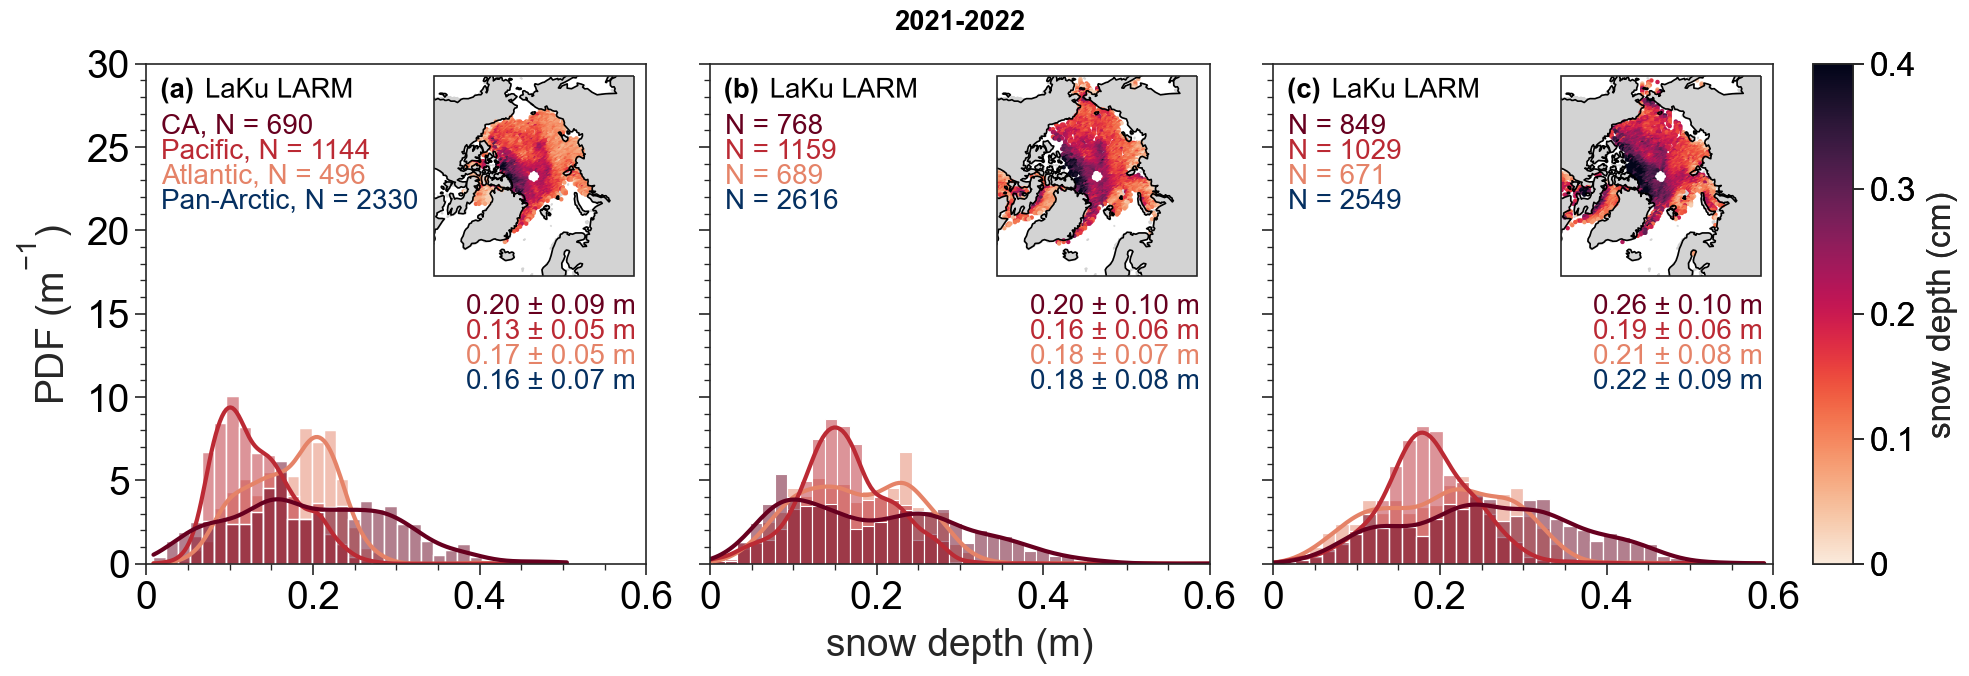

In [668]:
def plot_distributions_init(df, var, label, axes_def):
    df_CA = df[(df['lon']<-30) & (df['lon']>-150)]
    df_PA = df[~((df['lon']<90) & (df['lon']>-150))]
    df_AT = df[(df['lon']<90) & (df['lon']>-30)]
    df_check = pd.DataFrame({'snow_CA':df_CA[var],'snow_PA':df_PA[var],'snow_AT':df_AT[var]})
    palette_custom = {'snow_CA':cmap_qual(0),
                     'snow_PA':cmap_qual(1),
                     'snow_AT':cmap_qual(2)}
    _plot = sns.histplot(data = df_check,common_norm=False,kde=True,palette=palette_custom, stat='density',ax=axes_def)
    axes_def.legend().set_visible(False)
    axes_def.format(ultitle=label)

    axins = inset_axes(axes_def, width=1, height=1,axes_class=cartopy.mpl.geoaxes.GeoAxes, 
                   axes_kwargs=dict(map_projection=cartopy.crs.LambertAzimuthalEqualArea(central_latitude=90)))

    #axins = axes_def.inset([0.59, 0.59, 0.4, 0.4], transform='axes', proj='nplaea')
    axins.tick_params(labelleft=False, labelbottom=False)
    #plot_panArctic10(df['lon'], df['lat'], df[var], 0, 0.4, cmap, 'radar freeboard (m)','max', axins,fig)
    resol='110m'
    cmap_qual3 =  plt.cm.get_cmap('RdBu_r')
    im = axins.scatter(df['lon'], df['lat'], c=df[var],cmap=cmap, s=1, vmin=0, vmax=0.4,  transform=ccrs.PlateCarree())
    axins.add_feature(cfeature.LAND, facecolor='lightgrey')
    axins.coastlines(resolution=resol, color='k')
    axins.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
    
    #im = plot_panArctic10(df['lon'], df['lat'], df[var], 0, 0.4, cmap, 'radar freeboard (m)','max', axins,fig)
    text_CA = '{:.2f} \u00B1 {:.2f} m'.format(np.nanmean(df_CA[var]), np.nanstd(df_CA[var]))
    text_PA = '{:.2f} \u00B1 {:.2f} m'.format(np.nanmean(df_PA[var]), np.nanstd(df_PA[var]))
    text_AT = '{:.2f} \u00B1 {:.2f} m'.format(np.nanmean(df_AT[var]), np.nanstd(df_AT[var]))
    text_panArctic = '{:.2f} \u00B1 {:.2f} m'.format(np.nanmean(df[var]), np.nanstd(df[var]))
    axes_def.text(0.64, 0.5, text_CA, transform=axes_def.transAxes,c=cmap_qual(0),fontsize=10)
    axes_def.text(0.64, 0.45, text_PA, transform=axes_def.transAxes,c=cmap_qual(1),fontsize=10)
    axes_def.text(0.64, 0.4, text_AT, transform=axes_def.transAxes,c=cmap_qual(2),fontsize=10)
    axes_def.text(0.64, 0.35, text_panArctic, transform=axes_def.transAxes,c=cmap_qual(7),fontsize=10)
    axes_def.text(0.03, 0.86, 'CA, N = {}'.format(len(df_CA[df_CA[var].notna()])), transform=axes_def.transAxes,c=cmap_qual(0),fontsize=10)
    axes_def.text(0.03, 0.81, 'Pacific, N = {}'.format(len(df_PA[df_PA[var].notna()])), transform=axes_def.transAxes,c=cmap_qual(1),fontsize=10)
    axes_def.text(0.03, 0.76, 'Atlantic, N = {}'.format(len(df_AT[df_AT[var].notna()])), transform=axes_def.transAxes,c=cmap_qual(2),fontsize=10)
    axes_def.text(0.03, 0.71, 'Pan-Arctic, N = {}'.format(len(df[df[var].notna()])), transform=axs[0].transAxes,c=cmap_qual(7),fontsize=10)
    return im 

def plot_distributions(df, var, label, axes_def):
    df_CA = df[(df['lon']<-30) & (df['lon']>-150)]
    df_PA = df[~((df['lon']<90) & (df['lon']>-150))]
    df_AT = df[(df['lon']<90) & (df['lon']>-30)]
    df_check = pd.DataFrame({'snow_CA':df_CA[var],'snow_PA':df_PA[var],'snow_AT':df_AT[var]})
    palette_custom = {'snow_CA':cmap_qual(0),
                     'snow_PA':cmap_qual(1),
                     'snow_AT':cmap_qual(2)}
    _plot = sns.histplot(data = df_check,common_norm=False,kde=True,palette=palette_custom, stat='density',ax=axes_def)
    axes_def.legend().set_visible(False)
    axes_def.format(ultitle=label)

    axins = inset_axes(axes_def, width=1, height=1,axes_class=cartopy.mpl.geoaxes.GeoAxes, 
                   axes_kwargs=dict(map_projection=cartopy.crs.LambertAzimuthalEqualArea(central_latitude=90)))

    #axins = axes_def.inset([0.59, 0.59, 0.4, 0.4], transform='axes', proj='nplaea')
    axins.tick_params(labelleft=False, labelbottom=False)
    #plot_panArctic10(df['lon'], df['lat'], df[var], 0, 0.4, cmap, 'radar freeboard (m)','max', axins,fig)
    resol='110m'
    cmap_qual3 =  plt.cm.get_cmap('RdBu_r')
    im = axins.scatter(df['lon'], df['lat'], c=df[var],cmap=cmap, s=1, vmin=0, vmax=0.4,  transform=ccrs.PlateCarree())
    axins.add_feature(cfeature.LAND, facecolor='lightgrey')
    axins.coastlines(resolution=resol, color='k')
    axins.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
    
    
    text_CA = '{:.2f} \u00B1 {:.2f} m'.format(np.nanmean(df_CA[var]), np.nanstd(df_CA[var]))
    text_PA = '{:.2f} \u00B1 {:.2f} m'.format(np.nanmean(df_PA[var]), np.nanstd(df_PA[var]))
    text_AT = '{:.2f} \u00B1 {:.2f} m'.format(np.nanmean(df_AT[var]), np.nanstd(df_AT[var]))
    text_panArctic = '{:.2f} \u00B1 {:.2f} m'.format(np.nanmean(df[var]), np.nanstd(df[var]))
    axes_def.text(0.64, 0.5, text_CA, transform=axes_def.transAxes,c=cmap_qual(0),fontsize=10)
    axes_def.text(0.64, 0.45, text_PA, transform=axes_def.transAxes,c=cmap_qual(1),fontsize=10)
    axes_def.text(0.64, 0.4, text_AT, transform=axes_def.transAxes,c=cmap_qual(2),fontsize=10)
    axes_def.text(0.64, 0.35, text_panArctic, transform=axes_def.transAxes,c=cmap_qual(7),fontsize=10)
    axes_def.text(0.03, 0.86, 'N = {}'.format(len(df_CA[df_CA[var].notna()])), transform=axes_def.transAxes,c=cmap_qual(0),fontsize=10)
    axes_def.text(0.03, 0.81, 'N = {}'.format(len(df_PA[df_PA[var].notna()])), transform=axes_def.transAxes,c=cmap_qual(1),fontsize=10)
    axes_def.text(0.03, 0.76, 'N = {}'.format(len(df_AT[df_AT[var].notna()])), transform=axes_def.transAxes,c=cmap_qual(2),fontsize=10)
    axes_def.text(0.03, 0.71, 'N = {}'.format(len(df[df[var].notna()])), transform=axes_def.transAxes,c=cmap_qual(7),fontsize=10)

if season_folder == '2020-2021':
    
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    import seaborn as sns
    #fig, axs = pplt.subplots(ncols=2, nrows=3)
    fig, axs = pplt.subplots([[1,2, 3],
                             [4, 5, 6]],sharey=True, sharex=True, refwidth=2.5, refheight=2.5)
    cmap = 'Rocket_r'
    
    df = df_CRYO2ICE_month
    df, var, label,axes_def = df,'C2I_LARM_nov_dec', 'LaKu LARM', axs[0]
    im = plot_distributions_init(df, var, label, axes_def)
    cb = axs[2].colorbar(im, label='snow depth (cm)')
    cb.ax.tick_params(labelsize=12)
    cb.set_label('snow depth (cm)', size=12)
    
    df, var, label,axes_def = df,'C2I_CCI_nov_dec', 'LaKu CCI+', axs[3]
    plot_distributions(df, var, label, axes_def)
    
    df, var, label,axes_def = df,'C2I_LARM_jan_feb', 'LaKu LARM', axs[1]
    plot_distributions(df, var, label, axes_def)
    df, var, label,axes_def = df,'C2I_CCI_jan_feb', 'LaKu CCI+', axs[4]
    plot_distributions(df, var, label, axes_def)
    
    df, var, label,axes_def = df,'C2I_LARM_mar_apr', 'LaKu LARM', axs[2]
    plot_distributions(df, var, label, axes_def)
    df, var, label,axes_def = df,'C2I_CCI_mar_apr', 'LaKu CCI+', axs[5]
    plot_distributions(df, var, label, axes_def)
    
    
    #axs[0].format(title='November')
    #axs[1].format(title='LaKu CCI+')
    #axs[2].format(title='LaKu CCI+')
    
    fig.format(suptitle=season_folder,abc='(a)', abcloc='ul',ticklabelsize =14,labelsize =14, xlabel='snow depth (m)', ylabel='PDF (m$^{-1}$)', xlim=[0, 0.6], ylim=[0, 30])
    plt.savefig('{}:\DTU\CRYO2ICE\distributions_plots_bimonthly_gridded_{}.png'.format(drive, season_folder), dpi=300)
elif season_folder == '2021-2022':
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    import seaborn as sns
    #fig, axs = pplt.subplots(ncols=2, nrows=3)
    fig, axs = pplt.subplots([[1,2, 3]],sharey=True, sharex=True, refwidth=2.5, refheight=2.5)
    cmap = 'Rocket_r'
    
    df = df_CRYO2ICE_month
    df, var, label,axes_def = df,'C2I_LARM_nov_dec', 'LaKu LARM', axs[0]
    im = plot_distributions_init(df, var, label, axes_def)
    cb = axs[2].colorbar(im, label='snow depth (cm)')
    cb.ax.tick_params(labelsize=12)
    cb.set_label('snow depth (cm)', size=12)
    
    
    df, var, label,axes_def = df,'C2I_LARM_jan_feb', 'LaKu LARM', axs[1]
    plot_distributions(df, var, label, axes_def)

    
    df, var, label,axes_def = df,'C2I_LARM_mar_apr', 'LaKu LARM', axs[2]
    plot_distributions(df, var, label, axes_def)

    
    
    #axs[0].format(title='November')
    #axs[1].format(title='LaKu CCI+')
    #axs[2].format(title='LaKu CCI+')
    
    fig.format(suptitle=season_folder,abc='(a)', abcloc='ul',ticklabelsize =14,labelsize =14, xlabel='snow depth (m)', ylabel='PDF (m$^{-1}$)', xlim=[0, 0.6], ylim=[0, 30])
    plt.savefig('{}:\DTU\CRYO2ICE\distributions_plots_bimonthly_gridded_{}.png'.format(drive, season_folder), dpi=300)

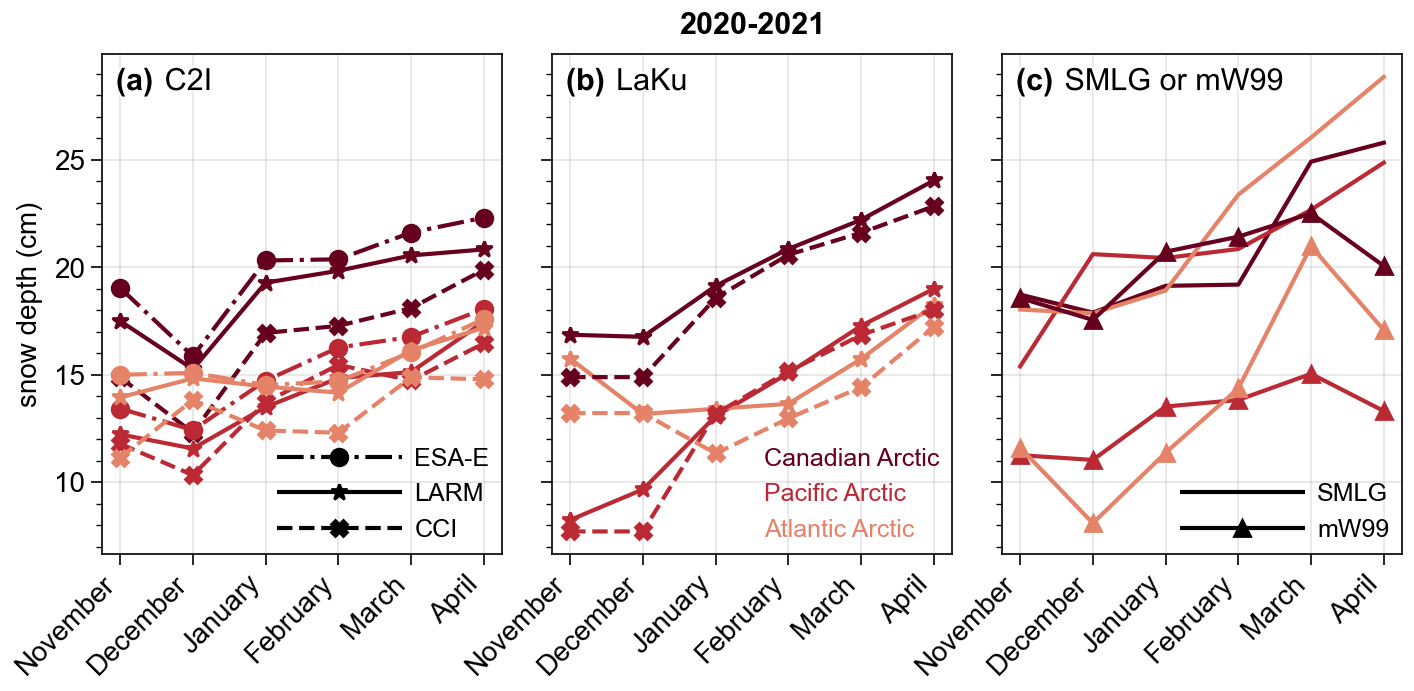

In [52]:
if season_folder == '2020-2021':
    df = df_CRYO2ICE_month
    df_CA_LaKu = df[(df['lon']<-30) & (df['lon']>-150)]
    df_PA_LaKu  = df[~((df['lon']<90) & (df['lon']>-150))]
    df_AT_LaKu  = df[(df['lon']<90) & (df['lon']>-30)]
    LaKu_monthly_LARM_CA = [np.nan,np.nanmean(df_CA_LaKu['C2I_LARM_nov'])*100,np.nanmean(df_CA_LaKu ['C2I_LARM_dec'])*100,np.nanmean(df_CA_LaKu['C2I_LARM_jan'])*100,
                           np.nanmean(df_CA_LaKu ['C2I_LARM_feb'])*100,np.nanmean(df_CA_LaKu ['C2I_LARM_mar'])*100,np.nanmean(df_CA_LaKu['C2I_LARM_apr'])*100,np.nan]
    LaKu_monthly_LARM_PA = [np.nan,np.nanmean(df_PA_LaKu ['C2I_LARM_nov'])*100,np.nanmean(df_PA_LaKu['C2I_LARM_dec'])*100,np.nanmean(df_PA_LaKu['C2I_LARM_jan'])*100,
                           np.nanmean(df_PA_LaKu ['C2I_LARM_feb'])*100,np.nanmean(df_PA_LaKu['C2I_LARM_mar'])*100,np.nanmean(df_PA_LaKu['C2I_LARM_apr'])*100,np.nan]
    LaKu_monthly_LARM_AT = [np.nan,np.nanmean(df_AT_LaKu ['C2I_LARM_nov'])*100,np.nanmean(df_AT_LaKu['C2I_LARM_dec'])*100,np.nanmean(df_AT_LaKu['C2I_LARM_jan'])*100,
                           np.nanmean(df_AT_LaKu ['C2I_LARM_feb'])*100,np.nanmean(df_AT_LaKu['C2I_LARM_mar'])*100,np.nanmean(df_AT_LaKu['C2I_LARM_apr'])*100,np.nan]
    
    LaKu_monthly_CCI_CA = [np.nan,np.nanmean(df_CA_LaKu ['C2I_CCI_nov'])*100,np.nanmean(df_CA_LaKu['C2I_CCI_dec'])*100,np.nanmean(df_CA_LaKu['C2I_CCI_jan'])*100,
                           np.nanmean(df_CA_LaKu ['C2I_CCI_feb'])*100,np.nanmean(df_CA_LaKu['C2I_CCI_mar'])*100,np.nanmean(df_CA_LaKu['C2I_CCI_apr'])*100,np.nan]
    LaKu_monthly_CCI_PA = [np.nan,np.nanmean(df_PA_LaKu ['C2I_CCI_nov'])*100,np.nanmean(df_PA_LaKu['C2I_CCI_dec'])*100,np.nanmean(df_PA_LaKu['C2I_CCI_jan'])*100,
                           np.nanmean(df_PA_LaKu ['C2I_CCI_feb'])*100,np.nanmean(df_PA_LaKu['C2I_CCI_mar'])*100,np.nanmean(df_PA_LaKu['C2I_CCI_apr'])*100,np.nan]
    LaKu_monthly_CCI_AT = [np.nan,np.nanmean(df_AT_LaKu ['C2I_CCI_nov'])*100,np.nanmean(df_AT_LaKu['C2I_CCI_dec'])*100,np.nanmean(df_AT_LaKu['C2I_CCI_jan'])*100,
                           np.nanmean(df_AT_LaKu ['C2I_CCI_feb'])*100,np.nanmean(df_AT_LaKu['C2I_CCI_mar'])*100,np.nanmean(df_AT_LaKu['C2I_CCI_apr'])*100,np.nan]
    
    df = df_LARM
    df_CA_LaKu = df[(df['lon']<-30) & (df['lon']>-150)]
    df_PA_LaKu  = df[~((df['lon']<90) & (df['lon']>-150))]
    df_AT_LaKu  = df[(df['lon']<90) & (df['lon']>-30)]
    mW99_monthly_CA = [np.nan,np.nanmean(df_CA_LaKu ['mW99_nov'])*100,np.nanmean(df_CA_LaKu['mW99_dec'])*100,np.nanmean(df_CA_LaKu['mW99_jan'])*100,
                           np.nanmean(df_CA_LaKu ['mW99_feb'])*100,np.nanmean(df_CA_LaKu['mW99_mar'])*100,np.nanmean(df_CA_LaKu['mW99_apr'])*100,np.nan]
    mW99_monthly_PA = [np.nan,np.nanmean(df_PA_LaKu ['mW99_nov'])*100,np.nanmean(df_PA_LaKu['mW99_dec'])*100,np.nanmean(df_PA_LaKu['mW99_jan'])*100,
                           np.nanmean(df_PA_LaKu ['mW99_feb'])*100,np.nanmean(df_PA_LaKu['mW99_mar'])*100,np.nanmean(df_PA_LaKu['mW99_apr'])*100,np.nan]
    mW99_monthly_AT = [np.nan,np.nanmean(df_AT_LaKu ['mW99_nov'])*100,np.nanmean(df_AT_LaKu['mW99_dec'])*100,np.nanmean(df_AT_LaKu['mW99_jan'])*100,
                           np.nanmean(df_AT_LaKu ['mW99_feb'])*100,np.nanmean(df_AT_LaKu['mW99_mar'])*100,np.nanmean(df_AT_LaKu['mW99_apr'])*100,np.nan]

    
    fig = pplt.figure(space=2, refwidth=2, refheight=2.5, span=False, sharex=False, sharey=True)
    ax = fig.subplots(nrows=1, ncols=3)
    #fig, ax = plt.subplots(2, 3, figsize=(6,4), constrained_layout=True, sharey=True)
    colours = cmap_qual
    colours = [cmap_qual(0)[0:3],cmap_qual(1)[0:3],cmap_qual(2)[0:3],cmap_qual(5)[0:3],cmap_qual(6)[0:3],cmap_qual(7)[0:3]]
    months = ['','November', 'December', 'January', 'February', 'March', 'April','']
    
    def compute_monthly_growth(df_AMSR2, var):
        monthly_growth = [np.nan,np.nanmean(df_AMSR2[df_AMSR2['month']=='November'][var])*100,
                                np.nanmean(df_AMSR2[df_AMSR2['month']=='December'][var])*100,
                                np.nanmean(df_AMSR2[df_AMSR2['month']=='January'][var])*100,
                                np.nanmean(df_AMSR2[df_AMSR2['month']=='February'][var])*100,
                                np.nanmean(df_AMSR2[df_AMSR2['month']=='March'][var])*100,
                                np.nanmean(df_AMSR2[df_AMSR2['month']=='April'][var])*100,np.nan]
        return monthly_growth
    df = CRYO2ICE_comb_all
    df_CA = df[(df['lon']<-30) & (df['lon']>-150)]
    df_PA = df[~((df['lon']<90) & (df['lon']>-150))]
    df_AT = df[(df['lon']<90) & (df['lon']>-30)]
    
    C2I_monthly_ESAD_CA = compute_monthly_growth(df_CA, 'C2I_smooth_snow')
    C2I_monthly_LARM_CA = compute_monthly_growth(df_CA, 'C2I_LARM_smooth_snow')
    C2I_monthly_CCI_CA = compute_monthly_growth(df_CA, 'C2I_CCI_smooth_snow')
    
    C2I_monthly_ESAD_PA = compute_monthly_growth(df_PA, 'C2I_smooth_snow')
    C2I_monthly_LARM_PA = compute_monthly_growth(df_PA, 'C2I_LARM_smooth_snow')
    C2I_monthly_CCI_PA = compute_monthly_growth(df_PA, 'C2I_CCI_smooth_snow')
    
    C2I_monthly_ESAD_AT = compute_monthly_growth(df_AT, 'C2I_smooth_snow')
    C2I_monthly_LARM_AT = compute_monthly_growth(df_AT, 'C2I_LARM_smooth_snow')
    C2I_monthly_CCI_AT = compute_monthly_growth(df_AT, 'C2I_CCI_smooth_snow')
    
    C2I_monthly_SMLG_CA = compute_monthly_growth(df_CA, 'SMLG_snow_depth')
    C2I_monthly_SMLG_PA= compute_monthly_growth(df_PA, 'SMLG_snow_depth')
    C2I_monthly_SMLG_AT = compute_monthly_growth(df_AT, 'SMLG_snow_depth')
    
    #C2I_monthly_SMLG_v2_CA = compute_monthly_growth(df_CA, 'SMLG_snow_depth_v2')
    #C2I_monthly_SMLG_v2_PA= compute_monthly_growth(df_PA, 'SMLG_snow_depth_v2')
    #C2I_monthly_SMLG_v2_AT = compute_monthly_growth(df_AT, 'SMLG_snow_depth_v2')
    
    ax[0].plot(months, C2I_monthly_ESAD_CA, linestyle='-.',marker='o', c=colours[0], label='ESA-E')
    ax[0].plot(months, C2I_monthly_LARM_CA, linestyle='-',marker='*', c=colours[0], label='LARM')
    ax[0].plot(months, C2I_monthly_CCI_CA , linestyle='--',marker='X', c=colours[0], label='CCI')
    
    ax[0].plot(months, C2I_monthly_ESAD_PA, linestyle='-.',marker='o', c=colours[1])
    ax[0].plot(months, C2I_monthly_LARM_PA, linestyle='-',marker='*', c=colours[1])
    ax[0].plot(months, C2I_monthly_CCI_PA , linestyle='--',marker='X', c=colours[1])
    
    ax[0].plot(months, C2I_monthly_ESAD_AT, linestyle='-.',marker='o', c=colours[2])
    ax[0].plot(months, C2I_monthly_LARM_AT, linestyle='-',marker='*', c=colours[2])
    ax[0].plot(months, C2I_monthly_CCI_AT , linestyle='--',marker='X', c=colours[2])
    
    
    ax[1].plot(months, LaKu_monthly_LARM_CA, linestyle='-',marker='*', c=colours[0], label='Canadian Arctic')
    ax[1].plot(months, LaKu_monthly_LARM_PA, linestyle='-',marker='*', c=colours[1], label='Pacific Arctic')
    ax[1].plot(months, LaKu_monthly_LARM_AT, linestyle='-',marker='*', c=colours[2], label='Atlantic Arctic')
    
    ax[1].plot(months, LaKu_monthly_CCI_CA, linestyle='--',marker='X', c=colours[0])
    ax[1].plot(months, LaKu_monthly_CCI_PA, linestyle='--',marker='X', c=colours[1])
    ax[1].plot(months, LaKu_monthly_CCI_AT, linestyle='--',marker='X', c=colours[2])
    
    
    ax[2].plot(months, C2I_monthly_SMLG_CA , linestyle='-', c=colours[0], label='SMLG')
    ax[2].plot(months, C2I_monthly_SMLG_PA , linestyle='-', c=colours[1])
    ax[2].plot(months, C2I_monthly_SMLG_AT, linestyle='-', c=colours[2])
    #ax[2].plot(months, C2I_monthly_SMLG_v2_CA , linestyle='--', c=colours[0], label='SMLG-HS')
    #ax[2].plot(months, C2I_monthly_SMLG_v2_PA, linestyle='--', c=colours[1])
    #ax[2].plot(months, C2I_monthly_SMLG_v2_AT, linestyle='--', c=colours[2])
    ax[2].plot(months, mW99_monthly_CA, linestyle='-',marker='^', c=colours[0], label= 'mW99')
    ax[2].plot(months, mW99_monthly_PA, linestyle='-',marker='^', c=colours[1])
    ax[2].plot(months, mW99_monthly_AT, linestyle='-',marker='^', c=colours[2])
    
    
    
    ax[0].format(xrotation=45, ylabel='snow depth (cm)', fontsize=10)
    ax[1].format(xrotation=45, ylabel='snow depth (cm)', fontsize=10)
    ax[2].format(xrotation=45, ylabel='snow depth (cm)', fontsize=10)
    ax[2].format(ultitle='SMLG or mW99')
    ax[1].format(ultitle='LaKu')
    ax[0].format(ultitle='C2I')
    
    ax[1].legend(loc='lr',handlelength=0, markersize=0,labelcolor='linecolor',frameon=False, ncol=1,fontsize=20)
    ax[0].legend(loc='lr',fontsize=20, frameon=False, c='k',handlelength=5, ncol=1,)
    ax[2].legend(loc='lr',fontsize=20, frameon=False, c='k',handlelength=5, ncol=1,)
    fig.format(abc='(a)', abcloc='ul', suptitle=season_folder)
    
    
    
    #plt.savefig('E:\demo_CRYO2ICE_overall_comp_monthly_growth_gridded_orbit_wise_new_func_orbit_seg_25km_no_smooth.png', dpi=300)
    plt.savefig(r'{}:\DTU\CRYO2ICE\accumulation_rates_gridded_{}.png'.format(drive, season_folder), dpi=300)

elif season_folder == '2021-2022':
    
    df = df_CRYO2ICE_month
    df_CA_LaKu = df[(df['lon']<-30) & (df['lon']>-150)]
    df_PA_LaKu  = df[~((df['lon']<90) & (df['lon']>-150))]
    df_AT_LaKu  = df[(df['lon']<90) & (df['lon']>-30)]
    LaKu_monthly_LARM_CA = [np.nan,np.nanmean(df_CA_LaKu['C2I_LARM_nov'])*100,np.nanmean(df_CA_LaKu ['C2I_LARM_dec'])*100,np.nanmean(df_CA_LaKu['C2I_LARM_jan'])*100,
                           np.nanmean(df_CA_LaKu ['C2I_LARM_feb'])*100,np.nanmean(df_CA_LaKu ['C2I_LARM_mar'])*100,np.nanmean(df_CA_LaKu['C2I_LARM_apr'])*100,np.nan]
    LaKu_monthly_LARM_PA = [np.nan,np.nanmean(df_PA_LaKu ['C2I_LARM_nov'])*100,np.nanmean(df_PA_LaKu['C2I_LARM_dec'])*100,np.nanmean(df_PA_LaKu['C2I_LARM_jan'])*100,
                           np.nanmean(df_PA_LaKu ['C2I_LARM_feb'])*100,np.nanmean(df_PA_LaKu['C2I_LARM_mar'])*100,np.nanmean(df_PA_LaKu['C2I_LARM_apr'])*100,np.nan]
    LaKu_monthly_LARM_AT = [np.nan,np.nanmean(df_AT_LaKu ['C2I_LARM_nov'])*100,np.nanmean(df_AT_LaKu['C2I_LARM_dec'])*100,np.nanmean(df_AT_LaKu['C2I_LARM_jan'])*100,
                           np.nanmean(df_AT_LaKu ['C2I_LARM_feb'])*100,np.nanmean(df_AT_LaKu['C2I_LARM_mar'])*100,np.nanmean(df_AT_LaKu['C2I_LARM_apr'])*100,np.nan]
    
    
    df = df_LARM
    df_CA_LaKu = df[(df['lon']<-30) & (df['lon']>-150)]
    df_PA_LaKu  = df[~((df['lon']<90) & (df['lon']>-150))]
    df_AT_LaKu  = df[(df['lon']<90) & (df['lon']>-30)]
    mW99_monthly_CA = [np.nan,np.nanmean(df_CA_LaKu ['mW99_nov'])*100,np.nanmean(df_CA_LaKu['mW99_dec'])*100,np.nanmean(df_CA_LaKu['mW99_jan'])*100,
                           np.nanmean(df_CA_LaKu ['mW99_feb'])*100,np.nanmean(df_CA_LaKu['mW99_mar'])*100,np.nanmean(df_CA_LaKu['mW99_apr'])*100,np.nan]
    mW99_monthly_PA = [np.nan,np.nanmean(df_PA_LaKu ['mW99_nov'])*100,np.nanmean(df_PA_LaKu['mW99_dec'])*100,np.nanmean(df_PA_LaKu['mW99_jan'])*100,
                           np.nanmean(df_PA_LaKu ['mW99_feb'])*100,np.nanmean(df_PA_LaKu['mW99_mar'])*100,np.nanmean(df_PA_LaKu['mW99_apr'])*100,np.nan]
    mW99_monthly_AT = [np.nan,np.nanmean(df_AT_LaKu ['mW99_nov'])*100,np.nanmean(df_AT_LaKu['mW99_dec'])*100,np.nanmean(df_AT_LaKu['mW99_jan'])*100,
                           np.nanmean(df_AT_LaKu ['mW99_feb'])*100,np.nanmean(df_AT_LaKu['mW99_mar'])*100,np.nanmean(df_AT_LaKu['mW99_apr'])*100,np.nan]
    
    
    fig = pplt.figure(space=2, refwidth=2, refheight=2.5, span=False, sharex=False, sharey=True)
    ax = fig.subplots(nrows=1, ncols=3)
    #fig, ax = plt.subplots(2, 3, figsize=(6,4), constrained_layout=True, sharey=True)
    colours = cmap_qual
    colours = [cmap_qual(0)[0:3],cmap_qual(1)[0:3],cmap_qual(2)[0:3],cmap_qual(5)[0:3],cmap_qual(6)[0:3],cmap_qual(7)[0:3]]
    months = ['','November', 'December', 'January', 'February', 'March', 'April','']
    
    def compute_monthly_growth(df_AMSR2, var):
        monthly_growth = [np.nan,np.nanmean(df_AMSR2[df_AMSR2['month']=='November'][var])*100,
                                np.nanmean(df_AMSR2[df_AMSR2['month']=='December'][var])*100,
                                np.nanmean(df_AMSR2[df_AMSR2['month']=='January'][var])*100,
                                np.nanmean(df_AMSR2[df_AMSR2['month']=='February'][var])*100,
                                np.nanmean(df_AMSR2[df_AMSR2['month']=='March'][var])*100,
                                np.nanmean(df_AMSR2[df_AMSR2['month']=='April'][var])*100,np.nan]
        return monthly_growth
    df = CRYO2ICE_comb_all
    df_CA = df[(df['lon']<-30) & (df['lon']>-150)]
    df_PA = df[~((df['lon']<90) & (df['lon']>-150))]
    df_AT = df[(df['lon']<90) & (df['lon']>-30)]
    
    C2I_monthly_ESAD_CA = compute_monthly_growth(df_CA, 'C2I_smooth_snow')
    C2I_monthly_LARM_CA = compute_monthly_growth(df_CA, 'C2I_LARM_smooth_snow')
    #C2I_monthly_CCI_CA = compute_monthly_growth(df_CA, 'C2I_CCI_smooth_snow')
    
    C2I_monthly_ESAD_PA = compute_monthly_growth(df_PA, 'C2I_smooth_snow')
    C2I_monthly_LARM_PA = compute_monthly_growth(df_PA, 'C2I_LARM_smooth_snow')
    #C2I_monthly_CCI_PA = compute_monthly_growth(df_PA, 'C2I_CCI_smooth_snow')
    
    C2I_monthly_ESAD_AT = compute_monthly_growth(df_AT, 'C2I_smooth_snow')
    C2I_monthly_LARM_AT = compute_monthly_growth(df_AT, 'C2I_LARM_smooth_snow')
    #C2I_monthly_CCI_AT = compute_monthly_growth(df_AT, 'C2I_CCI_smooth_snow')
    
    C2I_monthly_SMLG_CA = compute_monthly_growth(df_CA, 'SMLG_snow_depth')
    C2I_monthly_SMLG_PA= compute_monthly_growth(df_PA, 'SMLG_snow_depth')
    C2I_monthly_SMLG_AT = compute_monthly_growth(df_AT, 'SMLG_snow_depth')
    
    #C2I_monthly_SMLG_v2_CA = compute_monthly_growth(df_CA, 'SMLG_snow_depth_v2')
    #C2I_monthly_SMLG_v2_PA= compute_monthly_growth(df_PA, 'SMLG_snow_depth_v2')
    #C2I_monthly_SMLG_v2_AT = compute_monthly_growth(df_AT, 'SMLG_snow_depth_v2')
    
    ax[0].plot(months, C2I_monthly_ESAD_CA, linestyle='-.',marker='o', c=colours[0], label='ESA-E')
    ax[0].plot(months, C2I_monthly_LARM_CA, linestyle='-',marker='*', c=colours[0], label='LARM')
    #ax[0].plot(months, C2I_monthly_CCI_CA , linestyle='--',marker='X', c=colours[0], label='CCI')
    
    ax[0].plot(months, C2I_monthly_ESAD_PA, linestyle='-.',marker='o', c=colours[1])
    ax[0].plot(months, C2I_monthly_LARM_PA, linestyle='-',marker='*', c=colours[1])
    #ax[0].plot(months, C2I_monthly_CCI_PA , linestyle='--',marker='X', c=colours[1])
    
    ax[0].plot(months, C2I_monthly_ESAD_AT, linestyle='-.',marker='o', c=colours[2])
    ax[0].plot(months, C2I_monthly_LARM_AT, linestyle='-',marker='*', c=colours[2])
    #ax[0].plot(months, C2I_monthly_CCI_AT , linestyle='--',marker='X', c=colours[2])
    
    
    ax[1].plot(months, LaKu_monthly_LARM_CA, linestyle='-',marker='*', c=colours[0], label='Canadian Arctic')
    ax[1].plot(months, LaKu_monthly_LARM_PA, linestyle='-',marker='*', c=colours[1], label='Pacific Arctic')
    ax[1].plot(months, LaKu_monthly_LARM_AT, linestyle='-',marker='*', c=colours[2], label='Atlantic Arctic')
    
    #ax[1].plot(months, LaKu_monthly_CCI_CA, linestyle='--',marker='X', c=colours[0])
    #ax[1].plot(months, LaKu_monthly_CCI_PA, linestyle='--',marker='X', c=colours[1])
    #ax[1].plot(months, LaKu_monthly_CCI_AT, linestyle='--',marker='X', c=colours[2])
    
    
    ax[2].plot(months, C2I_monthly_SMLG_CA , linestyle='-', c=colours[0], label='SMLG')
    ax[2].plot(months, C2I_monthly_SMLG_PA , linestyle='-', c=colours[1])
    ax[2].plot(months, C2I_monthly_SMLG_AT, linestyle='-', c=colours[2])
    #ax[2].plot(months, C2I_monthly_SMLG_v2_CA , linestyle='--', c=colours[0], label='SMLG-HS')
    #ax[2].plot(months, C2I_monthly_SMLG_v2_PA, linestyle='--', c=colours[1])
    #ax[2].plot(months, C2I_monthly_SMLG_v2_AT, linestyle='--', c=colours[2])
    ax[2].plot(months, mW99_monthly_CA, linestyle='-',marker='^', c=colours[0], label= 'mW99')
    ax[2].plot(months, mW99_monthly_PA, linestyle='-',marker='^', c=colours[1])
    ax[2].plot(months, mW99_monthly_AT, linestyle='-',marker='^', c=colours[2])
    
    
    
    ax[0].format(xrotation=45, ylabel='snow depth (cm)', fontsize=10)
    ax[1].format(xrotation=45, ylabel='snow depth (cm)', fontsize=10)
    ax[2].format(xrotation=45, ylabel='snow depth (cm)', fontsize=10)
    ax[2].format(ultitle='SMLG or mW99')
    ax[1].format(ultitle='LaKu')
    ax[0].format(ultitle='C2I')
    
    ax[1].legend(loc='lr',handlelength=0, markersize=0,labelcolor='linecolor',frameon=False, ncol=1,fontsize=20)
    ax[0].legend(loc='lr',fontsize=20, frameon=False, c='k',handlelength=5, ncol=1,)
    ax[2].legend(loc='lr',fontsize=20, frameon=False, c='k',handlelength=5, ncol=1,)
    fig.format(abc='(a)', abcloc='ul', suptitle=season_folder)
    
    
    
    plt.savefig(r'{}:\DTU\CRYO2ICE\accumulation_rates_gridded_{}.png'.format(drive, season_folder), dpi=300)